In [1]:
############################
# IMPORTACION DE LIBRERIAS #
############################

import numpy as np
import pandas as pd
import warnings
import collections
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from Utilidades import *
from Utilidades_eda import *
%matplotlib inline


In [2]:
##################
# CARGA DE DATOS #
##################

#traindata=pd.read_csv('Dataset_Salesforce_Predictive_Modelling_TRAIN.txt')#reading the data
#testdata=pd.read_csv('Dataset_Salesforce_Predictive_Modelling_TEST.txt')
traindata=pd.read_csv('Total_Visualizacion/traindata.csv')#reading the data
testdata=pd.read_csv('Total_Visualizacion/TEST.csv')

traindata=traindata.drop('ID_Customer',axis=1) #Eliminamos el ID_Customer (no lo necesitamos)

print('Number of rows and columns of the training set: ',traindata.shape)
print('Number of rows and columns of the test set: ',testdata.shape)



Number of rows and columns of the training set:  (363834, 104)
Number of rows and columns of the test set:  (156315, 104)


In [3]:
#####################################
# SEPARACION DE VARIABLES POR TIPOS #
#####################################

categorical_cols=['Ind_Prod_01', 'Ind_Prod_02', 'Ind_Prod_03',
       'Ind_Prod_04', 'Ind_Prod_05', 'Ind_Prod_06', 'Ind_Prod_07',
       'Ind_Prod_08', 'Ind_Prod_09', 'Ind_Prod_10', 'Ind_Prod_11',
       'Ind_Prod_12', 'Ind_Prod_13', 'Ind_Prod_14', 'Ind_Prod_15',
       'Ind_Prod_16', 'Ind_Prod_17', 'Ind_Prod_18', 'Ind_Prod_19',
       'Ind_Prod_20', 'Ind_Prod_21', 'Ind_Prod_22', 'Ind_Prod_23',
       'Ind_Prod_24', 'Socio_Demo_01', 'Socio_Demo_02', 'cluster']
numeric_cols=['Imp_Cons_01', 'Imp_Cons_02', 'Imp_Cons_03', 'Imp_Cons_04',
       'Imp_Cons_05', 'Imp_Cons_06', 'Imp_Cons_07', 'Imp_Cons_08',
       'Imp_Cons_09', 'Imp_Cons_10', 'Imp_Cons_11', 'Imp_Cons_12',
       'Imp_Cons_13', 'Imp_Cons_14', 'Imp_Cons_15', 'Imp_Cons_16',
       'Imp_Cons_17', 'Imp_Sal_01', 'Imp_Sal_02', 'Imp_Sal_03', 'Imp_Sal_04',
       'Imp_Sal_05', 'Imp_Sal_06', 'Imp_Sal_07', 'Imp_Sal_08', 'Imp_Sal_09',
       'Imp_Sal_10', 'Imp_Sal_11', 'Imp_Sal_12', 'Imp_Sal_13', 'Imp_Sal_14',
       'Imp_Sal_15', 'Imp_Sal_16', 'Imp_Sal_17', 'Imp_Sal_18', 'Imp_Sal_19',
       'Imp_Sal_20', 'Imp_Sal_21', 'Num_Oper_01', 'Num_Oper_02', 'Num_Oper_03',
       'Num_Oper_04', 'Num_Oper_05', 'Num_Oper_06', 'Num_Oper_07',
       'Num_Oper_08', 'Num_Oper_09', 'Num_Oper_10', 'Num_Oper_11',
       'Num_Oper_12', 'Num_Oper_13', 'Num_Oper_14', 'Num_Oper_15',
       'Num_Oper_16', 'Num_Oper_17', 'Num_Oper_18', 'Num_Oper_19',
       'Num_Oper_20','Socio_Demo_03', 'Socio_Demo_04', 'Socio_Demo_05', 
       'Imp_Cons_total', 'Imp_Cons_total_2', 'Imp_Cons_total_3', 
       'Imp_Sal_total', 'Imp_Sal_total_2', 'Imp_Sal_total_3',
       'Ind_Prod_total', 'Ind_Prod_total_2', 'Ind_Prod_total_3',
       'Num_Oper_total', 'Num_Oper_total_2', 'Num_Oper_total_3', 
       'Relacion', 'Relacion_2', 'Relacion_3', 'Poder_Adquisitivo']


print(len(categorical_cols), 'Categorical variables')
print(len(numeric_cols), 'numeric variables')

27 Categorical variables
77 numeric variables


In [4]:
#########################
# GENERACION DE SUBSETS #
#########################

traindata_without_outliers,_ = delete_outliers(traindata, traindata['Poder_Adquisitivo'],extreme=False)
traindata_without_extreme_outliers,_ = delete_outliers(traindata, traindata['Poder_Adquisitivo'])

print('Traindata original: ', traindata.shape[0], 'filas')
print('Traindata sin outliers extremos: ', traindata_without_extreme_outliers.shape[0], 'filas')
print('Traindata sin outliers: ', traindata_without_outliers.shape[0], 'filas')


Traindata original:  363834 filas
Traindata sin outliers extremos:  356422 filas
Traindata sin outliers:  342994 filas


Histograma Dataset original :


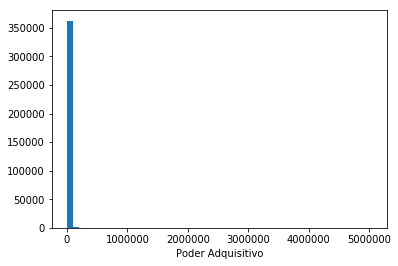

Histograma Dataset sin extreme outliers :


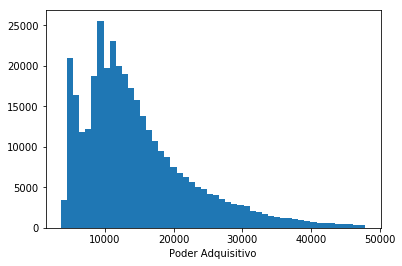

Histograma Dataset sin outliers :


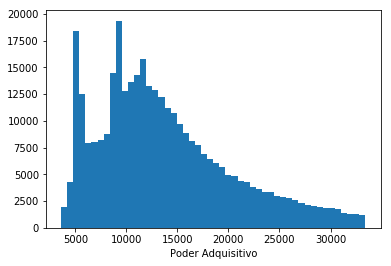

Histograma normalizando con funcion logaritmica :


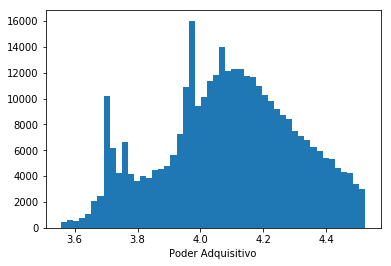

In [5]:
###################################
# ESTUDIO DE LA VARIABLE OBJETIVO #
###################################
var_objetivo = traindata['Poder_Adquisitivo']
var_objetivo_sin_outliers = traindata_without_outliers['Poder_Adquisitivo']
var_objetivo_sin_extreme_outliers = traindata_without_extreme_outliers['Poder_Adquisitivo']


#HISTOGRAMA ORIGINAL DEL PODER ADQUISITO
#Se aprecian outliers
mostrar_histograma(var_objetivo, titulo='Dataset original', etiqueta='Poder Adquisitivo')

#HISTOGRAMA DEL PODER ADQUISITIVO ELIMINANDO SOLO EXTREME OUTLIERS
mostrar_histograma(var_objetivo_sin_extreme_outliers, titulo='Dataset sin extreme outliers', etiqueta='Poder Adquisitivo')

#HISTOGRAMA DEL PODER ADQUISITIVO ELIMINANDO OUTLIERS
mostrar_histograma(var_objetivo_sin_outliers, titulo='Dataset sin outliers', etiqueta='Poder Adquisitivo')

#Normalizacion de la variable objetivo
var_objetivo_normalizada = np.log10(var_objetivo_sin_outliers)
mostrar_histograma(var_objetivo_normalizada, titulo='normalizando con funcion logaritmica', etiqueta='Poder Adquisitivo')

#Desnormalizacion de la variable objetivo
#var_objetivo_desnormalizada = transformacion_exponencial(var_objetivo_normalizada)
#mostrar_histograma(var_objetivo_desnormalizada)

In [6]:
#############################################
# VALORES DEL PODER ADQUISITO MAS REPETIDOS #
#############################################

a = np.array(var_objetivo)
x = collections.Counter(a)

d = dict((k, v) for k, v in x.items() if v >= 1000)

print ('Valores mas repetidos:')
print (d)


Valores mas repetidos:
{8865.2000000000007: 3038, 5112.0: 3231, 9343.3299999999999: 7203, 5123.3900000000003: 1584, 5650.4700000000003: 2551, 11529.200000000001: 1864, 5163.2399999999998: 2924}


Histograma Socio_Demo_01 :


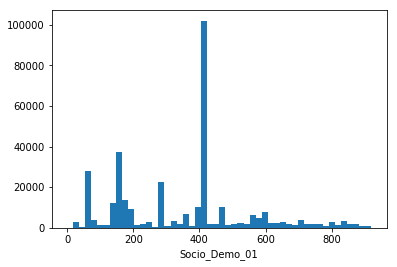

Histograma Socio_Demo_02 :


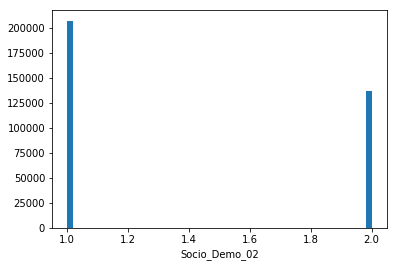

Histograma Socio_Demo_03 :


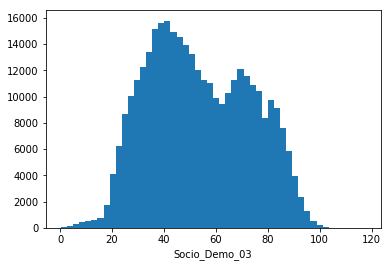

Histograma Socio_Demo_04 :


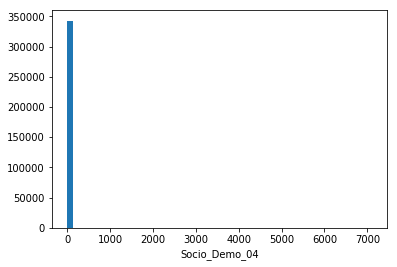

Histograma Socio_Demo_05 :


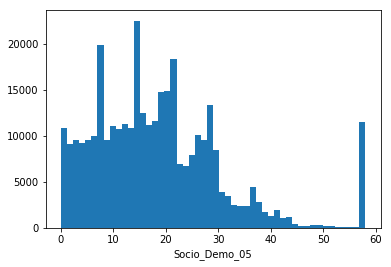

In [7]:
########################################
# HISTOGRAMAS POR BLOQUES DE VARIABLES #
########################################

histogramas_a_visualizar = [0, 0, 0 ,0, 1, 0]

if (histogramas_a_visualizar[0]):
    mostrar_histograma_bloque(traindata_without_outliers,'Imp_Cons')
    
if (histogramas_a_visualizar[1]):
    mostrar_histograma_bloque(traindata_without_outliers,'Imp_Sal')
    
if (histogramas_a_visualizar[2]):   
    mostrar_histograma_bloque(traindata_without_outliers,'Ind_Prod')
    
if (histogramas_a_visualizar[3]):   
    mostrar_histograma_bloque(traindata_without_outliers,'Num_Oper')
                              
if (histogramas_a_visualizar[4]):                              
    mostrar_histograma_bloque(traindata_without_outliers,'Socio_Demo')
    
if (histogramas_a_visualizar[5]):                              
    mostrar_histograma_bloque(traindata_without_outliers,'Relacion')

Diagrama de cajas Dataset original :


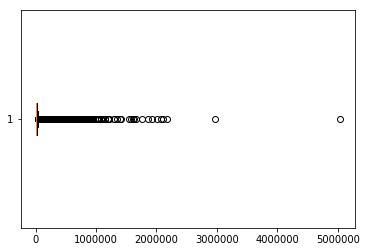

Diagrama de cajas Sin extreme outliers :


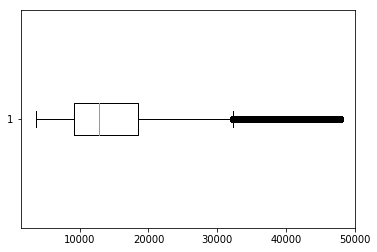

Diagrama de cajas Sin outliers :


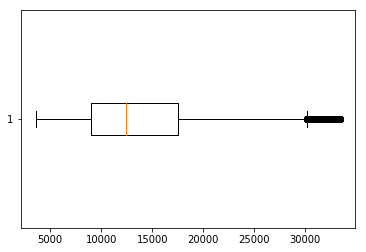

Matriz de correlaciones de variables con correlacion superior a  0.9 :


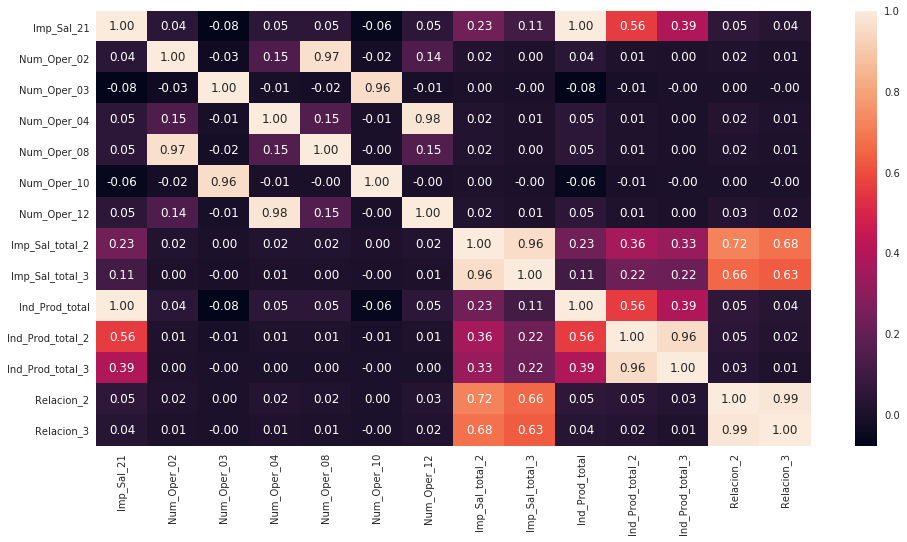

Matriz de correlaciones de las  10  variables mas fuertes:


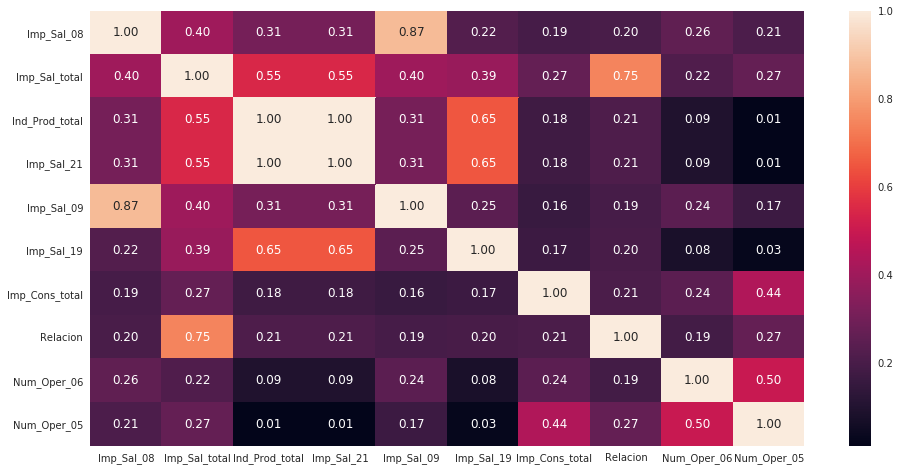

In [8]:
#################################################
# ANALISIS Y VISUALIZACION DE VARIABLE OBJETIVO #
#################################################

# CONFIGURACION DE DATOS A VISUALIZAR
visualizar_rangos = 0
visualizar_histogramas = 0
visualizar_diagramas_cajas = 1
visualizar_matrices_correlacion = 1
visualizar_matrices_dispersion = 0

    
if (visualizar_rangos == 1):
    ###################
    # RANGOS OUTLIERS #
    ###################

    print ('Rango intercuartilico de variable objetivo:', iqr_calculate(traindata['Poder_Adquisitivo']))
    print ('Limites (inferior y superior) de los valores atipicos:', outliers_limits(traindata['Poder_Adquisitivo']))
    print ('Limites (inferior y superior) de los valores extremadamente atipicos:', extreme_outliers_limits(traindata['Poder_Adquisitivo']))

if (visualizar_histogramas == 1):
    ###############
    # HISTOGRAMAS #
    ###############

    mostrar_histograma(var_objetivo, 100, titulo='Original', etiqueta='Poder Adquisitivo')
    mostrar_histograma(var_objetivo_sin_extreme_outliers, 100, titulo='Sin extreme outliers', etiqueta='Poder_Adquisitivo')
    mostrar_histograma(var_objetivo_sin_outliers, 100, titulo='Sin outliers', etiqueta='Poder_Adquisitivo')

if (visualizar_diagramas_cajas == 1):
    ######################
    # DIAGRAMAS DE CAJAS #
    ######################

    mostrar_diagrama_cajas(var_objetivo, 'Dataset original')
    mostrar_diagrama_cajas(var_objetivo_sin_extreme_outliers, 'Sin extreme outliers')
    mostrar_diagrama_cajas(var_objetivo_sin_outliers, 'Sin outliers')

if (visualizar_matrices_correlacion == 1):
    #############################
    # MATRICES DE CORRELACIONES #
    #############################

    #mostrar_matriz_correlacion(traindata[numeric_cols])
    mostrar_matriz_correlacion_fuerte(traindata[numeric_cols], 0.9)    
    mostrar_matriz_correlacion_variables_fuertes(traindata[numeric_cols], 10)

    
if (visualizar_matrices_dispersion == 1):
    ##########################
    # MATRICES DE DISPERSION #
    ##########################
    
    #mostrar_matriz_dispersion(traindata[numeric_cols])
    #mostrar_matriz_dispersion_fuerte(traindata[numeric_cols], 0.8)
    mostrar_matriz_dispersion_variables_fuertes(traindata[numeric_cols], 5)

In [9]:
############################################
# MOSTRAR TODAS LAS MATRICES DE DISPERSION #
############################################

mostrar_todas_matrices_dispersion = 0 #Cuidado con activarlo: La ejecucion puede tardar un par de minutos

if (mostrar_todas_matrices_dispersion == 1):

    fig, axes = plt.subplots(nrows=31,ncols=2,figsize=(16,32),sharey=True)
    axes=axes.flatten()

    for i in range(len(axes)):
        axes[i].scatter(traindata_without_outliers[numeric_cols[i]],var_objetivo_sin_outliers)
        axes[i].set_xlabel('Poder_Adquisitivo')
        axes[i].set_ylabel(numeric_cols[i])
    plt.show()

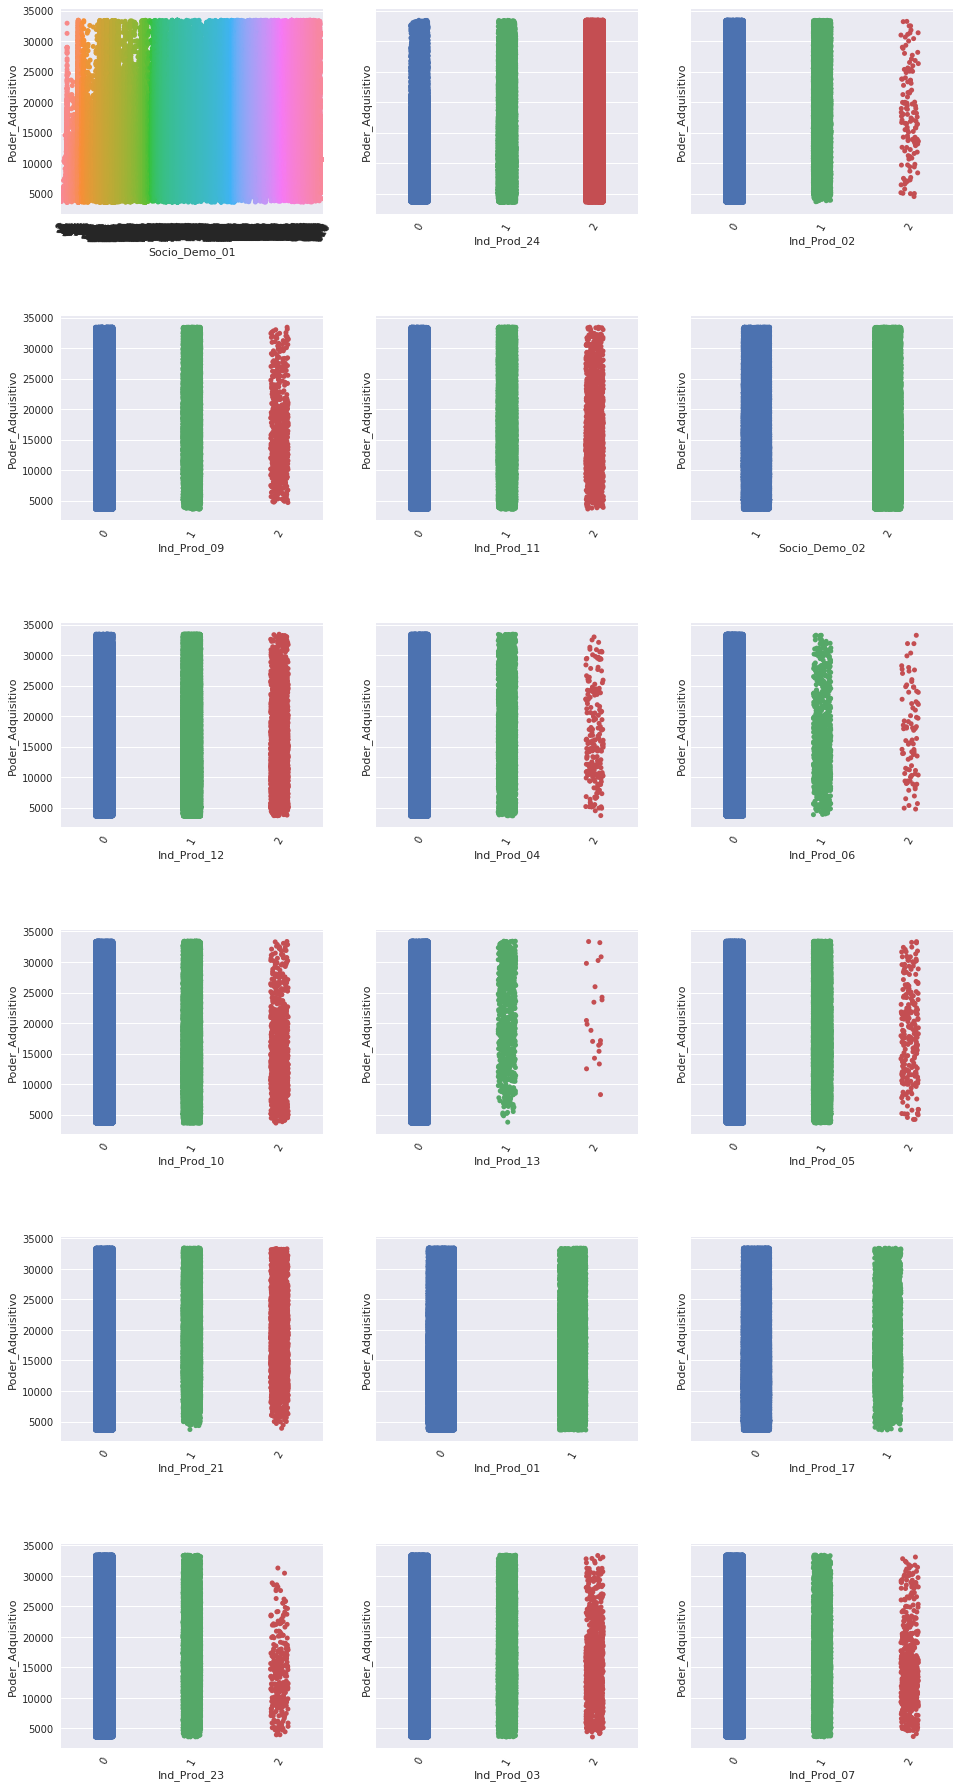

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


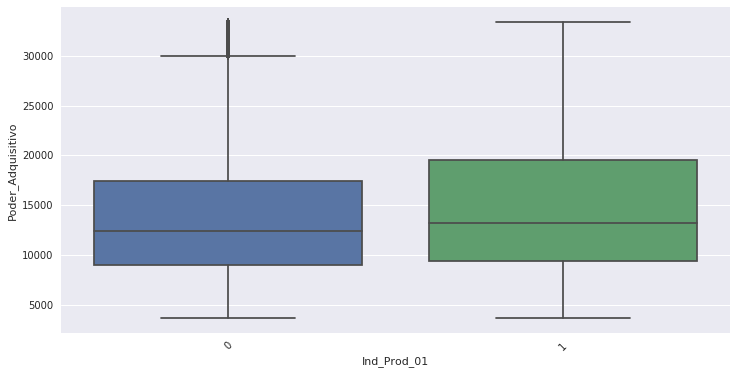

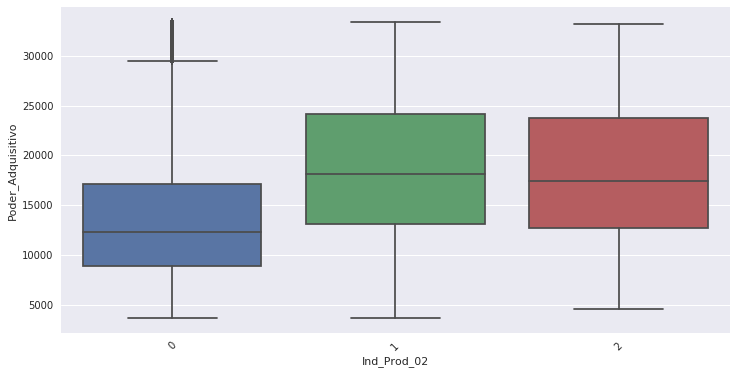

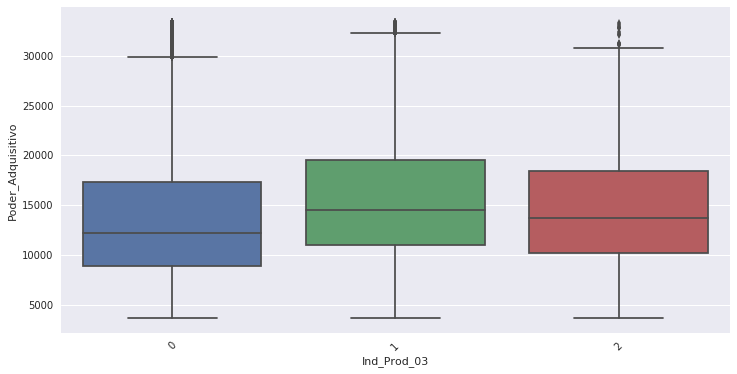

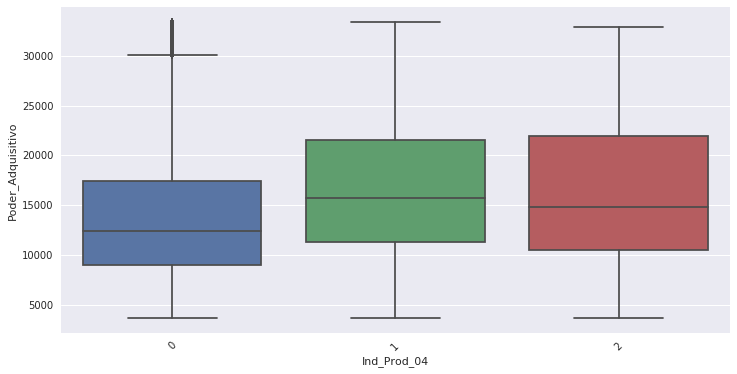

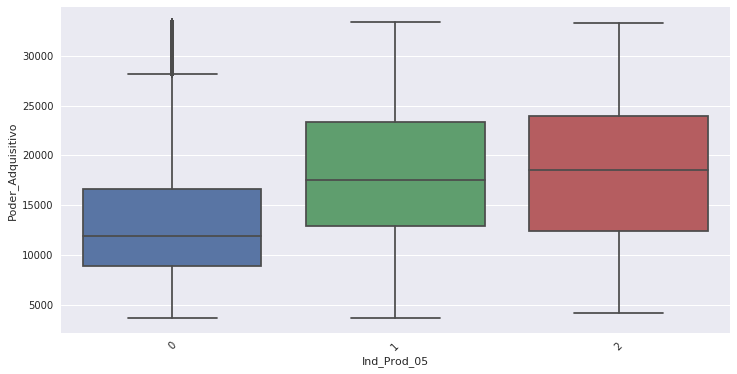

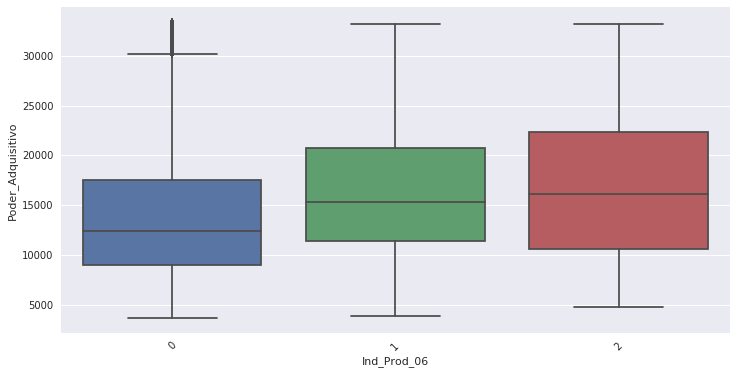

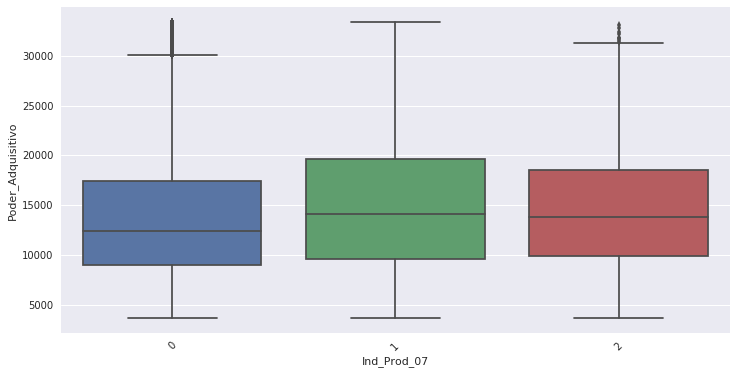

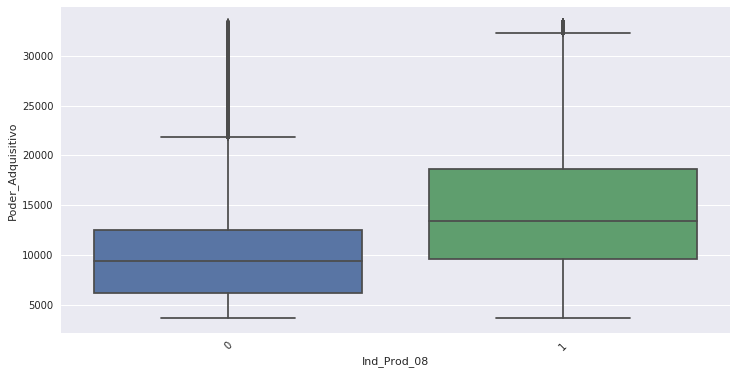

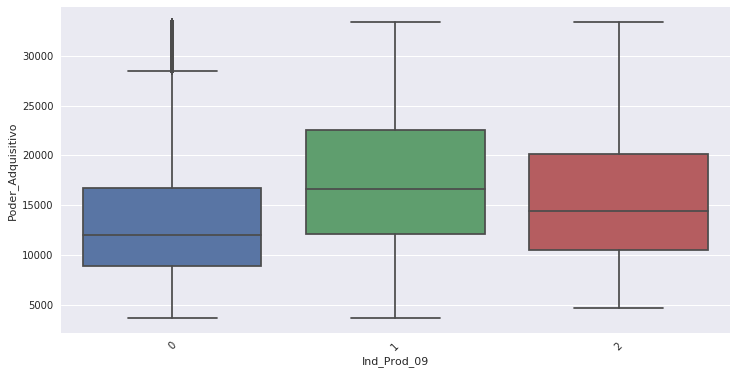

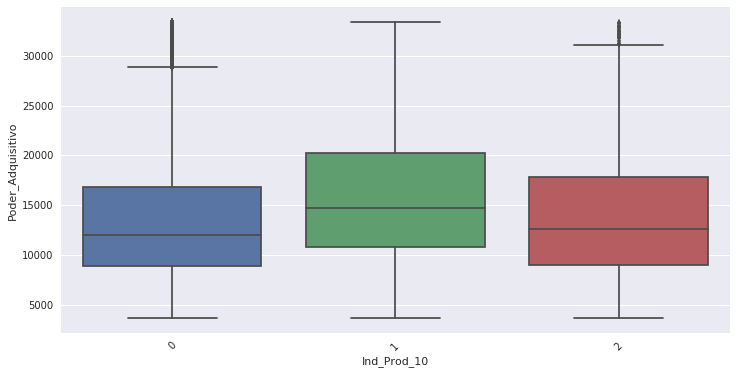

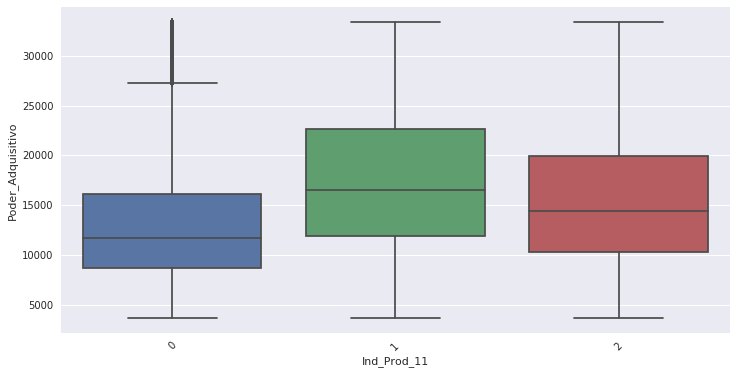

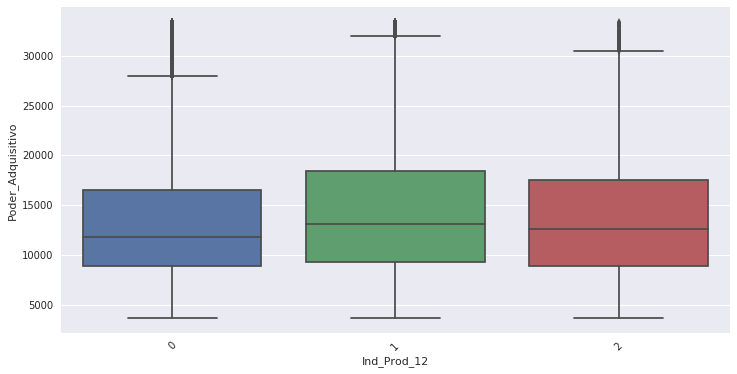

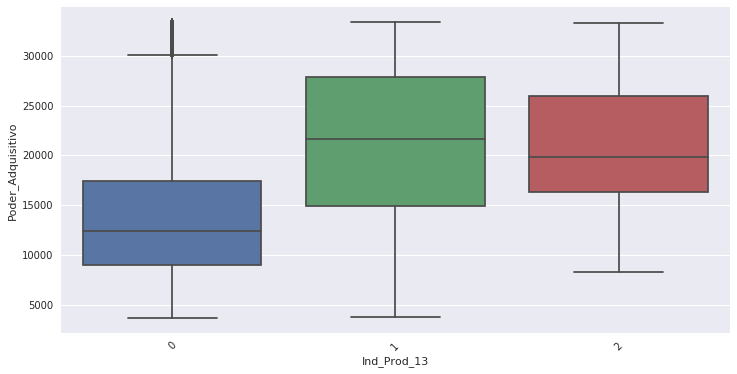

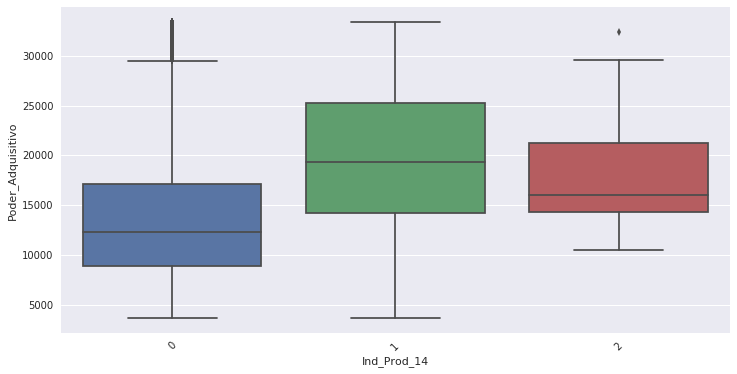

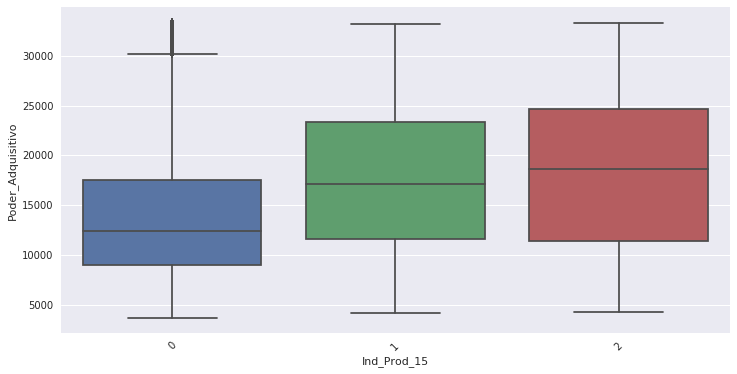

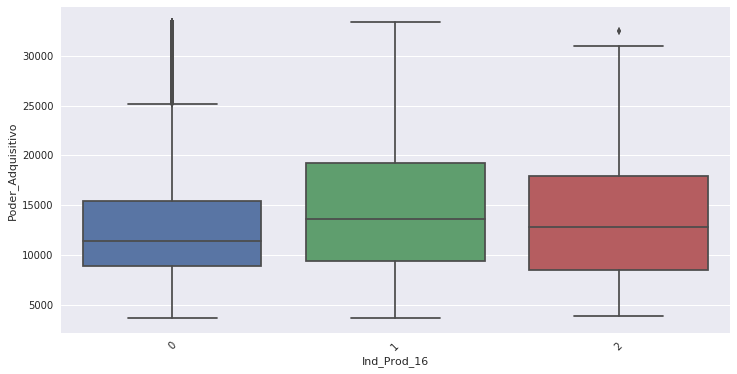

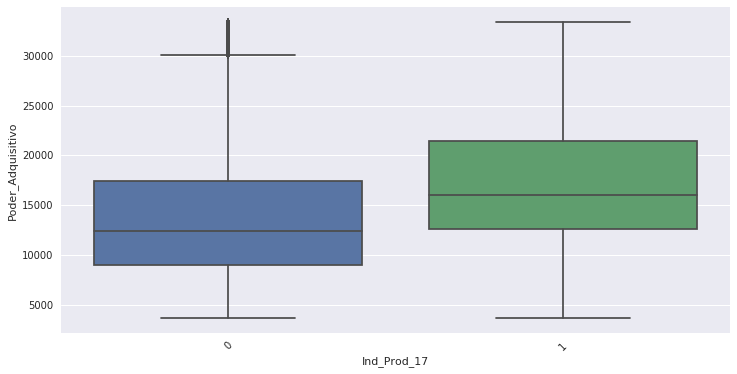

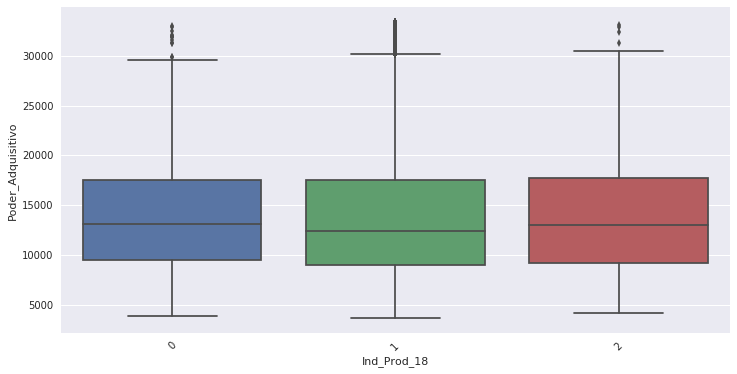

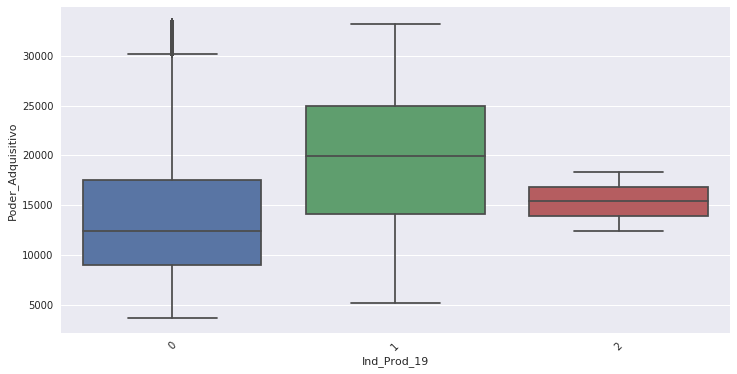

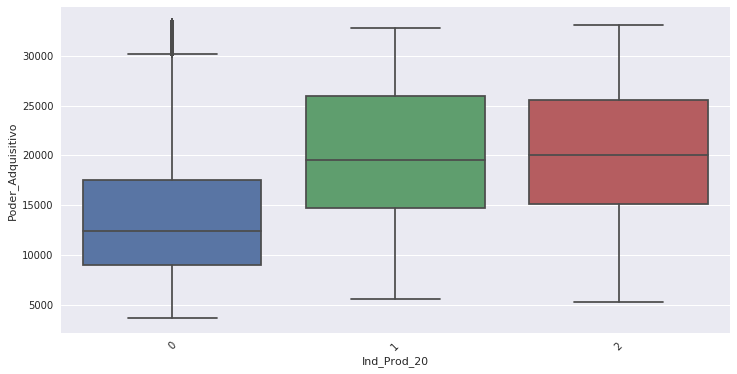

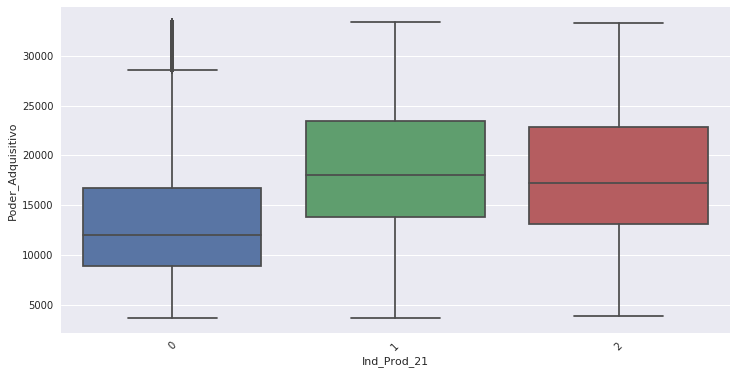

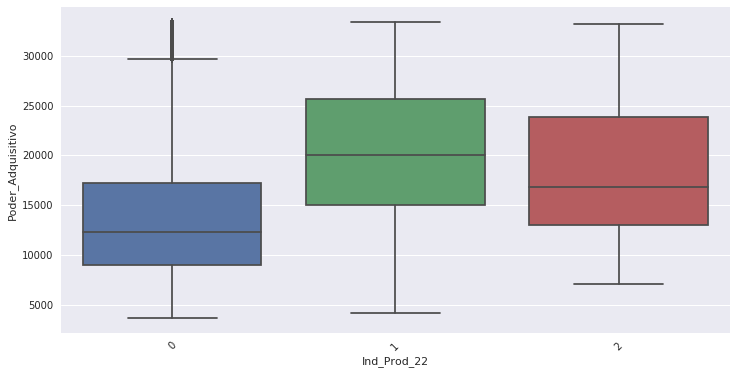

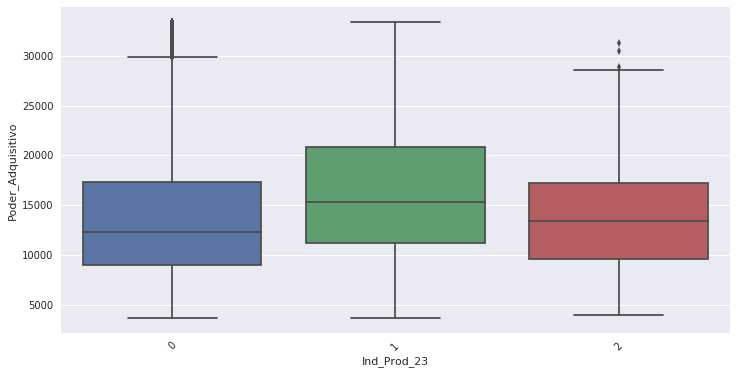

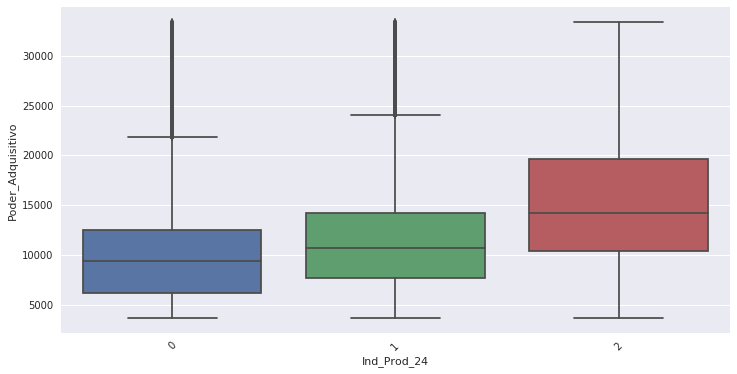

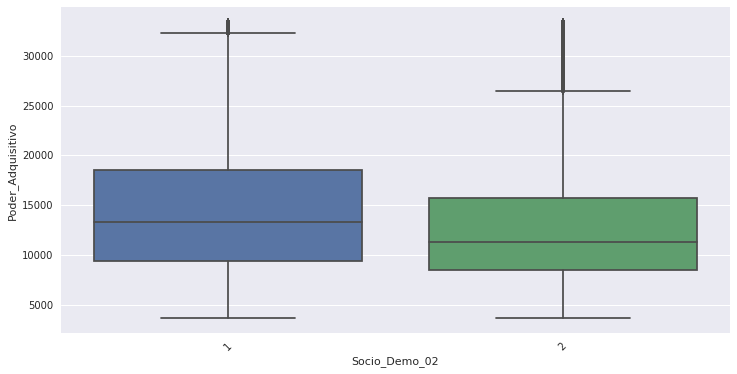

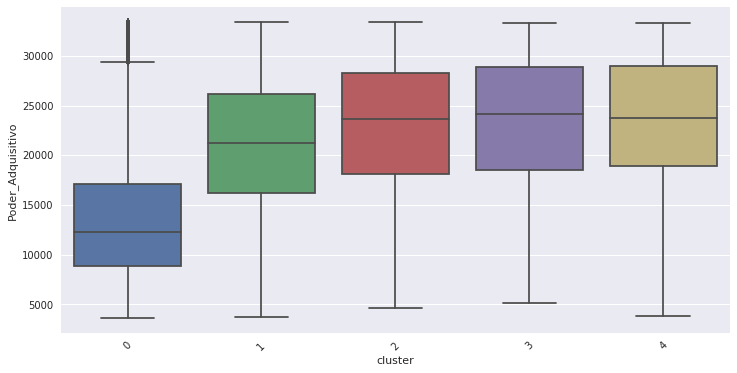

In [10]:
#####################################
# ANALISIS DE VARIABLES CATEGORICAS #
#####################################

analisis_variables_categoricas = 1

if (analisis_variables_categoricas == 1):
    
    visualizar_stripplots = 1
    visualizar_boxplots = 1
    
    ##############
    # STRIPPLOTS #
    ##############
    if (visualizar_stripplots == 1):
        selected_nominal_feats = np.random.choice(categorical_cols,18,replace=False)
        fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(16,32),sharey=True)
        axes=axes.flatten()
        for i in range(len(axes)):
            sns.set()
            sns.stripplot(x=selected_nominal_feats[i], y='Poder_Adquisitivo', data=traindata_without_outliers,ax=axes[i],jitter=True)
            axes[i].set_xlabel(selected_nominal_feats[i])
            axes[i].xaxis.set_tick_params(rotation=60)
        plt.subplots_adjust(hspace = 0.5)
        plt.show()
    
    ############
    # BOXPLOTS #
    ############
    if (visualizar_boxplots == 1):
        
        for col in categorical_cols:

            if (col != 'Socio_Demo_01'): #Excluimos Socio_Demo_01 debido a su gran cantidad de categorias
                plt.figure(figsize = (12, 6))
                sns.boxplot(x = col, y = 'Poder_Adquisitivo',  data = traindata_without_outliers)
                xt = plt.xticks(rotation=45)

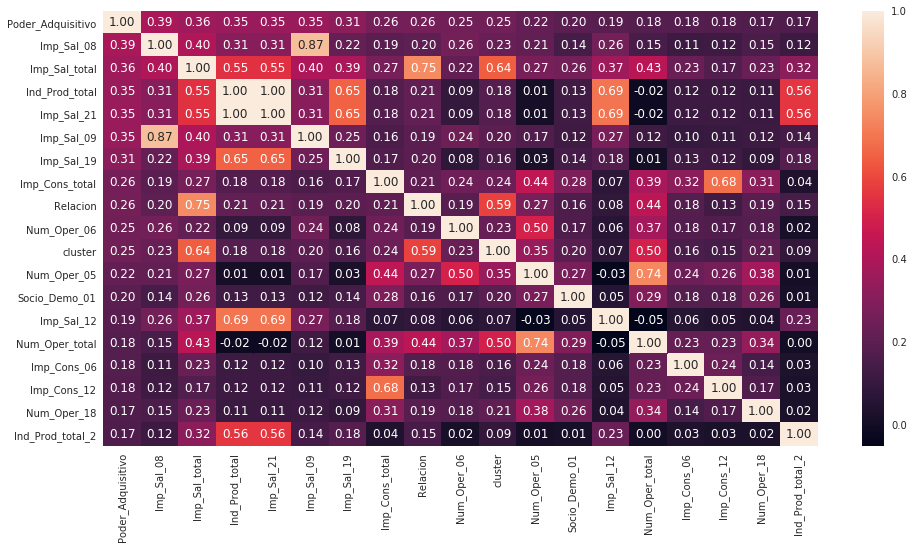

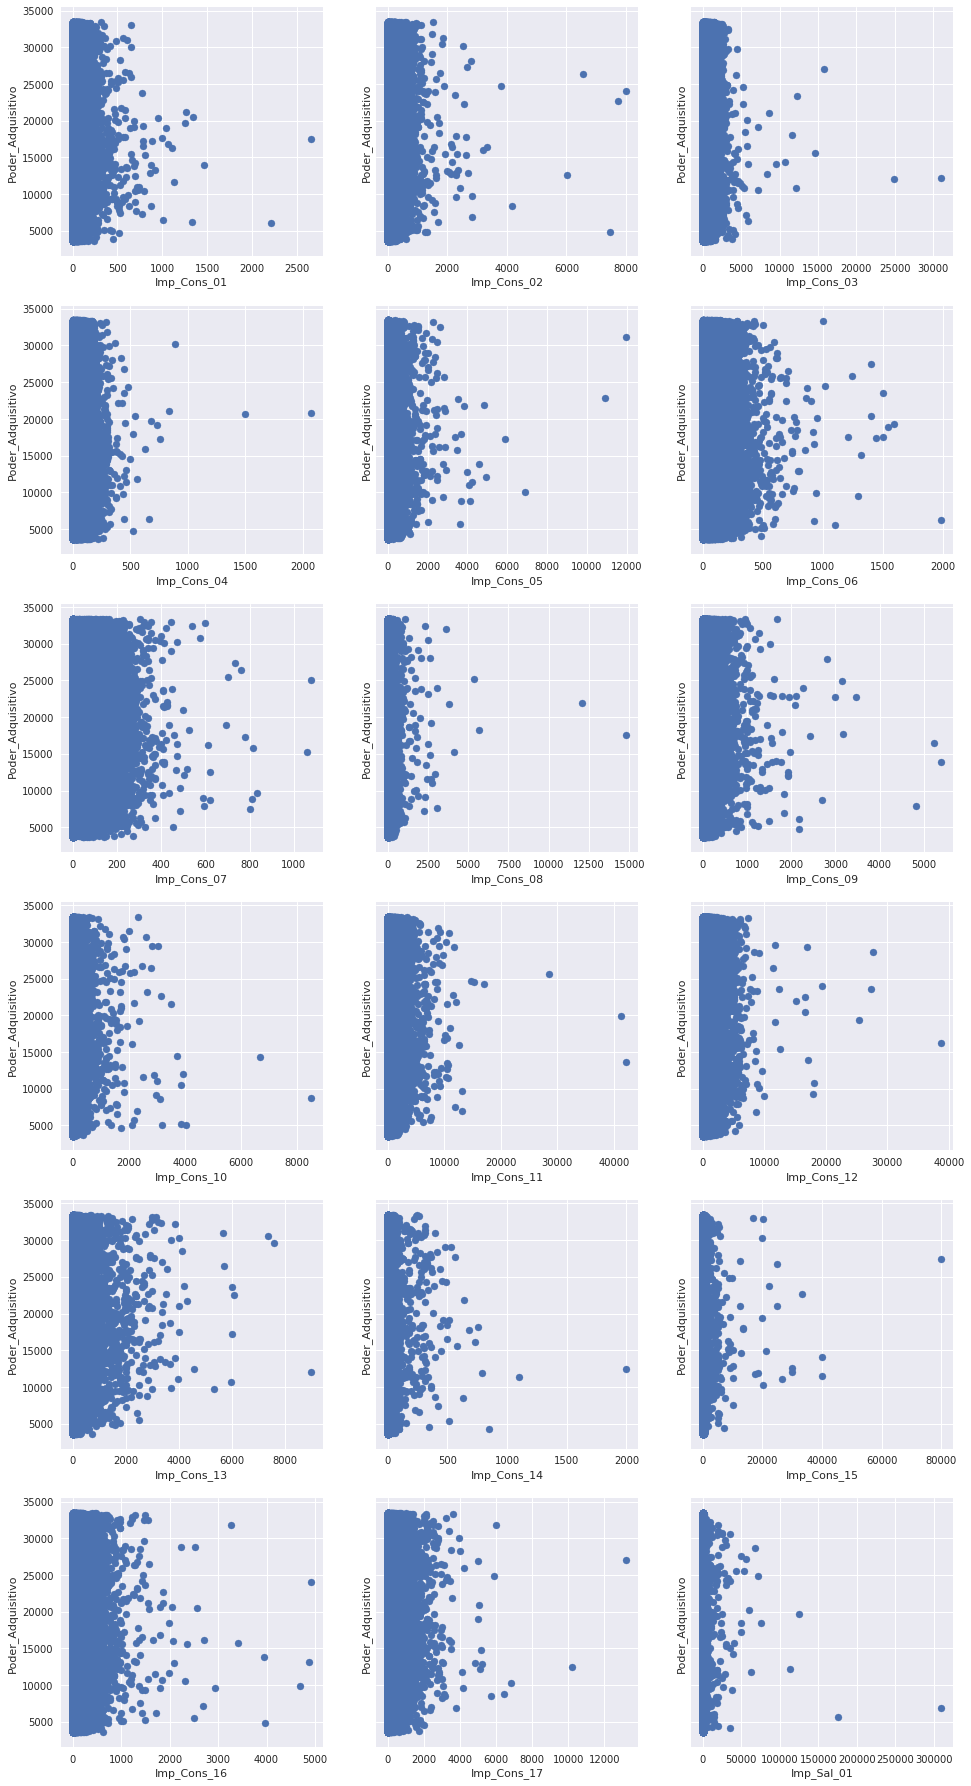

In [11]:
########################################################
# ANALISIS DE VARIABLES CONTINUAS DE MAYOR CORRELACION #
########################################################

analisis_variables_continuas = 1

if (analisis_variables_continuas == 1):

    #OBTENEMOS MATRIZ DE CORRELACION
    correlation=traindata.corr() #Obtenemos la matriz de correlacion de las variables discretas
    aux=abs(correlation['Poder_Adquisitivo']).sort_values(ascending=False) #Ordenamos variables por su correlacion con PA
    selected_feats=aux[0:19].index #Seleccionamos las 19 de mayor correlacion (18 + PA)

    sns.set()
    fig, ax = plt.subplots(figsize=(16,8))
    sns.heatmap(correlation.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax)
    plt.show()

    #MOSTRAMOS DIAGRAMAS DE DISPERSION
    selected_feats=selected_feats[1:] #Excluimos Poder Adquisitivo

    fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(16,32),sharey=True)
    axes=axes.flatten()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA5IAAAIlCAYAAACnycdrAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzsnXdUVMfDQO/SlqUIVhALRUQpxgL2%0AigYRGwpYo4ndqDHGEoO9xwRLiokGe+8NNZaosYsCdgVF6QiiAtJ3qd8fi7RdRFb9SfzePcfj7s68%0A2cvMvLdv3jRRXl5eHgICAgICAgICAgICAgICb4naxxYQEBAQEBAQEBAQEBAQ+G8hNCQFBAQEBAQE%0ABAQEBAQEyoXQkBQQEBAQEBAQEBAQEBAoF0JDUkBAQEBAQEBAQEBAQKBcCA1JAQEBAQEBAQEBAQEB%0AgXIhNCQFBAQEBAQEBAQEBAQEyoXQkBQQEBAQEBAQEBAQEPhEmTFjBq1bt6Znz55Kw/Py8li8eDFO%0ATk706tWLBw8evFW6QkNSQEBAQEBAQEBAQEDgE8XNzY3169eXGn7x4kXCw8P5559/WLRoEfPnz3+r%0AdIWGpICAgICAgICAgICAwCdK8+bNMTAwKDX87Nmz9OnTB5FIRJMmTUhOTub58+dlpis0JAUEBAQE%0ABAQEBAQEBP6fEhcXh7GxccF7Y2Nj4uLiyjxO40NKCbwbWS9DP7aCUg43mvOxFRRIUxN9bAWlZFVM%0ALYFykFQBH7c9V8v52Ar/GbLJ+9gKSqmIVilkf2wFpUjzcj+2glJyK2ApZlEx86oiklcByw8gJ69i%0AelXE+g7gE3nsYyuUiw91b69ZzeKdjs9TUu9EorJvYivgLZKAgICAgICAgICAgIDA/wJjY2OePXtW%0A8P7Zs2fUqFGjzOOEhqSAgICAgICAgICAgMCHJjfnw/x7Rzp37szhw4fJy8vj9u3b6Ovrv1VDUhja%0AKiAgICAgICAgICAg8IkyZcoU/Pz8SExMpEOHDkycOJHsbPl0hkGDBtGxY0cuXLiAk5MTEomEH3/8%0A8a3SFRqSAgICAgICAgICAgICH5qPNOd75cqVbwwXiUTMmzev3OkKDUkBAQEBAQEBAQEBAYEPTe6n%0AtSCW0JD8j7Jz/xEOHz/D49Awun/eiSWzp5Yad+vuQ2zYsQ+ZTMbnndoyd9o3aGlpAfA0No7ZS1Zy%0AL/ARNY2qM3PKeFo3b6qyl6ahLs1XjsaoYyNkCanc+3EPUYeuKsSrP7obliOdEVfRJztNStSRa9xd%0AuJO8HPkJVtWhPk0WDkW/vglpkS+4OWMT8X7BKntpGerSdvloTDraIUtI5cbSPYQd9lWIZzPKGesR%0AhV5hR68RsGhXgReA9UhnbEY5o12tEmlP4/l3xC8khz5TSOttEBvq0mH5aGp1sEOakIr/T3sIUeJl%0AN9IZ2xHOaFfRJytNSujRa1xfXOg10PcXJNUNCt7HBTzmxBc/fzJOFdVL20AX52WjMetgR0ZCKhd/%0A3sNDH0WnZiOdaTbcGUllfbLSpTw8eo0LSwqd2k71wNLZnqqWJlxb5cPVXw6q5PMaiYEu/bzGYtW+%0AEWkJKZzw2s3tI4rnYccxPbF370DlWtVIS0zBd9tpLqwtvgJe2+HdaD/CBb2qlUiMiWfL6OW8DCt/%0Afa+ITgA6BroM8BqLVfvPSEtI4bjXbm4euaIQz3FMTxzcOxZ4Xd32D+eKeM2+vAr9agbk5pdp+I1g%0AvL98u6FBb/JqkO/19xu8mhfxulLCa87lVehVK6zv4TeC+UtFL10DPb7yGodt+8akJqRwwGsHfkcu%0AK8RzHtObNu6dqFqrOimJyZzfdopTa48AoF+1EgPnjaBBSxu0JGJigqPYs3gLYbcfq+T02mu01wTs%0AOsi99nhtx9fnkkK8HmNdaefuSLV8r7PbTvK3t09BeLXa1Rmz/BvqNbEi/ukLtsxdz4Mrd1V2GuM1%0AgUYdmpCSkMwer+1cVeJk09qOvpP6Y25rQVpSGpPajS0WXt++AV/OHYmJZW1eRMWxafZaHgUEqeQE%0AoGegxziviXyW77XTaxuXfS4qxLNt3QiPSQOwsLUgNSmVCe3GFAs3szFnxILRmDY0IyMtgzM7/2H/%0A73s+Ka/XTo07NCUlIZkdXltLdeo3aQDmtvVIS0plfLvRCk4jF4yhbkMzpGkZnN556p3zasKyb2nS%0AoSnJCcls/3krl3wuKMSza92I/pMGYmEn9xrbdlRBWDWT6vx+9s9i8SW6EjYt2sCRdYdVcpq4bFKB%0A07aft3BRiVOj1o0YMGkQFnb1SE1KZUzbkcWc/ji7WsFp46IN+Kw7VG4ngf8NQkPyP0r1alUZO2wg%0AV67fQCbLLDXeles3WL99Lxt//4nq1aowaeYi/tywncnjRgAwfd5PNLazZs2KhVy66s+U2Uv4e/d6%0AqlQ2VMmr2Y/DyM3M4Uij8RjamdJ+2/ckPYggOfhpsXgx/9wkfM9FspLT0TTUpc26SViOcuax9wk0%0ADXVpu2UqN3/YSPRxf+r2bUO7LdM43uo7spLSVfJqtWQYuVnZ7Gk8gSq2pny+dRqJgZG8KuEVdfoW%0AT/ZeIjM5HS1DXRzXfov1SGcC154AoP6gTtQf2JEzXy4n6XEM+qY1kCWlqeQE0GbxMHIys9neZAJV%0AbU3ptmUaCYGRJJbwijhzi+B9ci+xoS6fe3+L3Qhn7q07URDn1LAVxFx+oLJLRXaqqF5dFg8jJyub%0A1c0mUMPWFLdN03gRFEl8CaeQM7d4sO8SsuR0tA106f3XtzQb7syN9XKnVxFxXPxxF42HdHlnJ4C+%0Ai0aQk5XNQoevMbExY/jG6cQGRRL3OLp4RJGIPVNWE/swkqqmRozaOoNXsfHcOSpvDLcY4EiL/o5s%0AHO7F8ydPqVK3Bhkq1veK6ATgtmgE2Vk5zHMYSy0bM0Zt/IGnQRFKvXZO+bPAa+zWmSTGxnP7aOGD%0Ag/UjvXh85b7KLkVxXzSCnKwc5uZ7jd74AzFBETwr4SXK94rJ9/p660xexcZzq4jXhpFeBL8Hr8GL%0ARpGTlc0Uh1HUsTHj240ziA4KJ0aJ04Ypq4h+GEF1U2OmbJ1DQmw8/kevINbRJvzOE/Yu2kxyfDLt%0AB3Tm240z8Gw3Hlm6VCWvYYtGk52VzQT7EZjamDFt0ywiA8N5+jiqREwR3lN+JzIoHCNTY37YNo/4%0AmJdcOypvoE9YNYUnNx+x7KslNOncjG/XfM+0ThNISUgut9PwRWPIzspmnP1wzGzM+X7TLCKUOMnS%0AZVzYcxZf7Uu4TvAoFqZroMe09TPZOMsbv5PXaOPanmkbZ/Jdu69JS1atzo9cNJbsrGxG23+FmY05%0AMzbNITwwjGgFLynn9pzhirYWfUt4AUz6fSp+p64xf8BsqteuwaIDSwkPDCPgjN8n4zVq0ddkZ2Uz%0Ayv7LfKe5pTr9u+cMWtqXcHuD07wBs6heuwaLD/z0Tnk1ZrHca3izoZjbWjBr01zCg8KICo5U8Dq7%0A9wyXjlzEY0K/YmEvY14w2Lp/wfsadYxYfdEb3xOKD/fehrGLx5GdlcVXzYZgbmvBnE3zCFPiJE2X%0AcWbvabSOXMBjQv9iYS9jXjDQutCzRh0j/rq4Ft8Tig/Q/svkVdDtjFRFWLX1P4pTp7Z06dAGQ4NK%0Ab4znc+IMbj2dsbQwxaCSPl8PG8Th42cACI+MJjD4CRNGDkFbLMbJsR31Lcw4fV61k1ZdIqZ2jxbc%0A99pHTrqMeL9gYv65ialHO4W4aRHPyUqWNwpFIhF5uXnomRkBUM3BCumLJKKP+UFuHpEHriCLT6ZW%0A9+YqeWlIxJh2b86tZfvJTpfx3D+YqNM3qeeu6JUS8ZzMEl6V8r0QiWgypS/+C3aQ9DimMP4r1X7Q%0ANSRizLs350a+V5x/MBGnb2JZhheU8HqPVESniuqlKRFj5dKcK8v3k5Uu46l/ME/O3MTGTdEpKeI5%0AstdOIhF5eXlULuL0YP8lws7fJTNVtRvpkl523VpwasVeMtNlhAc8IvDMDZop8brgfZSnD8LJzcnl%0ARWgsD07fwMy+Qb6miM8nuXN00VaeP5E3jBMin6vUaKuITgBaEjGfdWvJyXyvsIBHPDhzAwe39gpx%0Azyl4BWCe7/W+ee114i28/vU+SnQRr/sfyEtLIsa+W0sOr9iNLF3Kk4CH3DkTQGu3jgpxT3r7EPkg%0AjNycXOJCY7h92h/LfKeXUc85veEYSS9ekZeby8VdZ9DQ1MDYwkQlL7FETHOXVuxfsRNZupTggIfc%0APONPOyVef3sfJvx+KLk5ucSGxnDjtB9WDtYAGJvXxMzWggMrd5Mly8T/xDWiH0XQ3KWVSk4tXFqx%0Ab8UuZOlSHgUEceOMP+3dOinEDbnzmMuHLvA8UnHjbyv7hiS9fMX141fJy83lyqELJMcnq+T02quV%0AS2t2r9iBNF3Kw4AgAs740dHNUSHukzuPuXjoPHFKvACq167BpcMXyM3NJS7yGQ/9g6htVeeT8RJL%0AxLQst5PyURE1ahspONWxqltup9derVzasGv5dqTpUoL8A/E/40cnJV6P7zzmwsFzpXoVpZO7I4HX%0AH/Ai+rlKTq1d2rCjiJPfmes4KnUK5vxbOjm6dybw+gOeq+Ak8L+jzIaktbU1rq6u9OzZk2+//ZaM%0AjIy3TnzVqlVs2LDhnQSLMm7cOAYMGPDGOE2bqj4s8+zZs6xdu7bU8Hv37rF48WIArl+/zs2bNwvC%0Adu3axeHD5R8O8KF5EhZBA0vzgvcNLC2IT0jkVVIyT8IiqG1SE11dnWLhIWERKn2Xfj1j8nJySS0y%0AzPPVgwgqNaitNH6dvm3oE7we10BvDG3rErrtX3mASMkmqCIRBg1V+5GqZCH3Kjr8NOFBJIYNaimN%0Ab96nNYMfrmPQ/b+oYlOXR9vlXro1q6BrUhXDBrXp5/8b7r4raTLVDd5iw1ZlGFgYk5ebS1KRIXnx%0AgZFUtlLuVa9Pa74KWseX+V5B+V6vcVw1niF3VuOy4weqWKv2I1URnSqqV2ULY3Jzc0ks4vQiMJJq%0ApTg1dG3NxAfr+ObuX1S3rsudHf8qjfeuVLeoSV5ubrGhnrFBERjVV34eFsW8RcOCnjiDmlUwNKmK%0AUYM6zLz6B56XfsNpssdbbVD8X3Aq6vUiLLbgs5igCIzf0qtk7+CQX79h4Y21jN06E5N3qO/VLWqS%0AW8Lr6Vt6WZTitejGWr5+By8jCxP5jXARp6igCEzql31drt/CWqHX8jV1bMzQ0NLgeYRqQ5ON872e%0AFfGKDIqg1ls0Hhq0sCY6v8ektlVdnkfFIU0rfJgTERRObRVu+AudYoo4hZe7QSMSofD7IhKhkhNA%0AzXyv2CJe4Sp4Afy94Qgd3RxR11DHxKIWVs0acO/ynU/Gy8SiloJTRFCYSg1AZU53L98udzpFvWKK%0A5lWgal5FcXTvzLn9qv0mle5k+s5O/+4/+05pVEhycz/Mv49EmUNbtbW18fGRzyGYOnUqu3fvZvjw%0A4R9EJjs7Gw0N5UrJyckEBgaio6NDVFQUdeqo1qh4E126dKFLl9KHljVq1IhGjRoB4Ofnh46ODs2a%0ANQPkS+dWRNLTM9DX0y14r5f/Oi09g/QMKfpFGpHycB2ev4hX6bs0dLXJSik+9DQrJQMNPW2l8aMO%0AXSXq0FX0zI0w7dce6YskAOIDHqNtZEidPq2JPuZH3b5t0DOrgbpE6715Zaako6krURo/7LAvYYd9%0A0Tc3wtKj0EvHpAoAJh0b4dNlBlqVdHDa9QNpsQk83nm+3F6autpFes6KeOkp9wo57EvIYV8qmRtR%0A3709GS+TCsLOTVzNy/vhgAi7kc647JjOvk7TFdL/LzpVVC9lTrKUdLRKqVcPfXx56OOLoZkRtu7t%0ASSvi9D7R0hEjLVHfpSkZiEvJq9c4TfZApCbCf995AAyM5fXdqv1nrOw2HUklHUZtnUlSbAJ+u8t3%0Aw1ERneRe2mQoeKWX6eU82QM1NTX88r0Atk9axdP7YSAS0WGEC2O2zuSnLlOQqlDfxTraSvKrbK9u%0Akz0QqalxvYRXdBGvsVtnslQFL20leZWRko52GU69J/dHpCbiyj7F8tHWkzBy5USO/LZPIe3yeKWX%0A+FvSk9OQlHIevsZt8gBEIjUu5nuJdbTJSFb8+yobVXlPTulol+FUkuAbj6hcowqte7fD77gvbVw7%0AUMPUGLFEXG4nuZdEpbxSxo1/A5i48jt6jemDuoY6+37dTcjdJ5+MV2llqJqTP9+snEzvMX1R11Bn%0A76+7VM8rXSVeKarl1WusW9hgUM0Q3+OqjUaT6CqWX1qKann1GpsWthhWM+Sqik4Vmv/PQ1sdHByI%0AiJD3Vm3atImePXvSs2dPNm/eXBBnzZo1ODs7M2zYMMLCwgo+j4yMZOTIkbi5uTF48GBCQkIA8PT0%0AZOnSpQwdOpTly5eX+t2nTp3C0dGRHj16cPz48YLPo6KiGDBgAO7u7vz6668Fn+fl5bFw4UK6d+/O%0AmDFjGD16NCdPngTkm24mJCQA8l7GoUOHAnDw4EEWLlwIwIkTJ+jZsye9e/fmiy++AOS9kGPHjiU6%0AOprdu3ezefNmXF1dCQgIKOh9DQkJwcOjcIx8dHQ0vXr1AsDX15c+ffrQq1cvZsyYQWZm6XMb3xc6%0AOhJS0wpP8LT817o6EnQk2qSmlzj509LR1VHt5M9Ok6KhX/xYTT0J2WUM10sNiyP5UTTNfpI/oMhM%0ATOXK8JVYjXWh993VGDt+RtylB2TEJqjspVnCS0tfQlbam3vXU8LiePUomlY/DgMgJ0NeXvdXHyMz%0AOZ3U6JcEb/+X2p2bqOSVlSZFq6SXnoSs1Dd7JYfFkRgcTdt8L5AvGJMjzSJHmsmdP4+SmZyOcYvy%0AD2+riE4V1UuZk1hPQmYZ9epVeBwvg6P5fPGwN8ZTlcx0mUKDQ1tPguwNedXmy67Yu7Vn03AvcjLl%0A+0plybIA+VBTaXI6idEvub7zLA0dy1/fK6KT3Euq0BASl+HV7ktnHNw6sG74zwVeIF/EJkuWRZY0%0Ak7OrfchITsOieUOVvGRKvMrKr9K8wpR41VPBS5ouRVuv+INHiZ4E6RucHL/sRmu3jvw+/EeyizgB%0AaIq1mLjBk9BbjzmxWvWFNKTpUiT6Jbz0dch4w3no9JUL7dw7sWL4kgIvWboUSYnzWaKnU6yH8t2c%0AJEjLuDaUJPVVCitGL6X7qN6subGJxh2bcv/yXRKeqfawV5qeUe68UoaegR6ztsxj3297GGzlwdiW%0AI2jcoSldh7p8Ml7SdCk6781pPvt/280gK3fGtBxOkw7NcFY1r9KUeOmV36soju5duHbiKlIV5yhn%0ApGWgU+Lc0XlHp87unfF9ByeB/x1v3ZDMzs7m4sWLWFlZcf/+fQ4ePMjevXvZs2cP+/btIzAwkPv3%0A73P8+HEOHz7MH3/8wb179wqOnzNnDnPmzOHgwYP88MMPLFiwoCAsPDyczZs34+npWer3//333/Ts%0A2ZMePXpw7FjhinRLlixh0KBBHDhwgOrVqxd8fvr0acLCwjh69CiLFi3i1q1bb50pAKtXr2bDhg0c%0AOXKENWvWFAurXbs2AwcOZNiwYfj4+ODg4FAQVq9ePbKysoiKkk/GPn78OC4uLshkMjw9Pfnll184%0AevQoOTk57Ny5s1xOqmBpbsqjJ6EF7x89CaVqlcoYGlTC0tyU6JhnBY1LeXgY9cxVG46QEvIMNXV1%0A9MwL534Z2NYl+ZHyIU1FEWmoo2dao+D9S9+HnHWZi4/NWPwmrkG/Xk0SboWo5JUc+gyRujr6Rbwq%0A29Tl1aOnbziq0EvfTO6VFBJLjiwL8vJU8ihJUr5XpSJeVW3qKiweoww1DXUqFcmvkuTl5ak05LYi%0AOlVUr8RQeX03LDLXsbpNXV6+pZPhG5zehRehsaipq1PNzLjgs5rWdRUXj8nHoV8nOo3rzdrBS0h6%0AVviw5kVIDNmyLHn+fIJOpXmZWJsqDA19TYt+neg8rjdrBi8u5qWUPCVD9D+gV5dyeKlS3+NCY1BX%0AV6NGEafa1mbEKCxoI6dtv864jOvLisELSCzhpKGlwYR103n1LIFtM73L7VKUZ/leRmY1Cz6ra23G%0A02DlXh36d6bXODeWDppfrEEWHRxJ9TpGaOsWjqCpa21aMPRVFSfjIk6m1mZEl+L0Jh5ef8Cc3tMZ%0A0/hLVk/+lZoWJoSouMJtrBIvM2vzcnvVqCsf1n/x4Dlyc3JJeBbPlaOXaOZo/8l4xYQ+RU3ByUxh%0A8ZiyMMp3uqDg5FD2wW/wqlnUy8a83F6v0RJr0aZHW5WHtRY6qVPTrHCes7mNOVHBqk2Tkju1+zSH%0AtQLk5nyYfx+JMhuSUqkUV1dX3N3dMTExwcPDgxs3bvD555+jo6ODrq4uTk5OBAQEEBAQwOeff45E%0AIkFPT4/OnTsDkJaWxq1bt5g0aRKurq7MnTuXFy9eFHxHt27dUFdXL9Xh5cuXREZGYm9vj7m5ORoa%0AGgQHy7eCuHXrFj169ADA1dW14Bh/f3969OiBuro6RkZGtGpVvsnpTZs2xdPTk71795KTU74CcnFx%0A4cQJ+WqMJ06coHv37oSFhVG7dm3MzeXzFfv27UtAQEC50i1KdnYOMlkmOTm55OTmIpNlkp2t6Nm7%0AWxcOHvuHkLAIkpJT8N68mz7dPwfArG5tGlpasHrTDmSyTM5cuEJwSBhOndqq5JSTISP6uD+233ug%0ALhFTtbkVtZztidivuDy8+eBOiKvKFwrSt6pFw4m9eV5kFU1DO1NEGupo6En4bN5gMmISiDt/TyGd%0AtyE7Q0bkCX+aTvNAQyKmhkN96na1J+SAolf9QZ3QzvcyqG9Co296EXs5UP73STMJO3oNu/E90dDV%0ARqdmFawGOxJ9pnwPKYp6hZ/wx36q3MvIoT6mXe15osSrQREvw/omNJnQi5h8L12Tqhg51EdNUx11%0AsSaffd0D7Sr6xPmXf7uUiuhUUb2yMmQ8PulP26keaErEmDjUx9LJnsCDik6NBnZCJ9+pan0TWk7o%0AReSVwIJwNQ25j0hNhEhdreC1KmRlyLh/yo+uU/qhKRFjam+FjZMDN5V4NXVti8v0Aawf8iMJUcUX%0ANMiSZnLnmC+dxvZCrKuNgXEVWgxyJOjsTYV0/otOAJkZMu6d8qPblH5oScSY2Vth5+RAwEHFbRqa%0Aubal+/SB/DVkiYKXoUlVzOytUNdUR0OsieOYnuhW1ics4JHKXndP+eGS72VehleP6QNZM2QJ8Uq8%0AzN+TV2aGjJun/HCdMhAtiRhL+wY0cXLA96DiEv8tXdvjNn0QvwxZyMsSTuoa6oxbPY0saSYbpqx6%0A54cCsgwZ/iev4zFlIGKJmPoODbF3as5lJV5t+nSg//df8NOQ+byIKr5Yy7OwWCIDw+n73QA0xZo4%0AOLekTkMz/E9cU9HpGh5TBiGWiLFyaIi9UwsuHTyvEFckEqEp1kRdUwNEFL7Ox9TWHHUNdSR6Er6Y%0ANYyEZ/Hcvaja/DpZhozrJ68xYMpgxBIxDRwa0typBRcOnnuDl3rBa418r9iwp4iAdq4dEIlEGFY3%0ApG2vdkQEhX8yXrIMGX4nfRk45Yt8J2scnFq+0UlDiVOMEqc2vdoRHhSmkM7bel076cugqXKvhg7W%0AtHBqyfk3eWloQAmv17Ts1pq05DTuXVVtm5uiToNLOJ17U/lpaCjk1WtavQcngf8d5Zoj+Zo3XfiV%0APYHNy8ujUqVKCum8RiJ581DK48ePk5SUVDB/MTU1lb///hsrK6tSv/NNn6urqxf8DTKZTGmchQsX%0AcufOHc6fP0+fPn3KtZBO9+7dmTRpEk5OTohEIszMzAgKUn3fJ2V4b9nFmo07Ct4fO/Uv40Z8gVuP%0ArvQeMpYj272paVyDdq0cGPGFB8MneiKTyXDq1I4JI4cUHLds4QxmLVlBm279qGlUnZWLZ6m89QfA%0AzRmbaP7LGHrfX01mYio3PDeRHPyUai0b0H7HdA5ZyvcMqtrcCjvP/mjoipHFpxB99Dr3vfYXpNNg%0AfE9qdpEPV3t27i5XR/yishOA78zNtFsxmgF3/0SWmIrvjE28Cn5KjRYNcNr+PTus5Psr1WhuRbMf%0A+hV4hR/z49ayQq/rs7bSxmsEA26uIjM5neAd53i8W/GG5W25MmszHZaPZsgdudflmZtIDH6KcYsG%0AdNv2PZsbyL2MHKxwmN4PTV0x0vgUQv/240a+l5aeNm2XDqeSaQ1yZFnEP4jk5NBlyF6lfjJOFdXr%0AzKzNOC8fzfhbf5KRmMrpWZuID35KrRYNcN/yPb9by51qOVjR7vt+aOmKSY9PIfhvPy6vKKxXXX8e%0AiV2/DgXvW3/bhxNTvHmwX7Hh8DYcmr2RfsvGMu/GX6QlpnJo9gbiHkdj1rwBIzd7MsdWPozceVp/%0AdAz1mHhkScGxtw5f5uAs+SJph+dtxn3pKGZfX01Gcjp+u//Ff+/5T8YJ4MDsDQxY9jULbniTnpjK%0AgXwv8+YNGbPZkxm2wwBwmTYAXUM9Jh8p3IPxxuFL7J+1AbGuBI/FI6lqakS2LIungRGsHfYT6e9Q%0A3w/M3sDAZV+zMN9r/+wNPHscjUW+l2e+V/d8ryklvPbN2oD2e/baMXsdw5aN55cbG0hNTGH77HXE%0API6mfnNrJm2eyTe28mkifaYNRNdQn1lHfio49trhS2yftZZ69g1o/LkDsgwZv9/dUhD+27Afeeyv%0A2u/k5tlrGb1sAn/e3ERqYgqbZq/l6eMoGjS35vstsxllI5+e4jFtEHqV9Vl4xKvg2CuHLrJplrxX%0A9I+JKxi7fCLed7cS//Qlv49bptLWHwAbZ69l7LJvWHNzM6mJKWyc7V3g9MOWOYywGQxAw5Y2zNmz%0AuOC4LcF7CfS9z+KBcwDoNbYvTRzlazHcuXCLX8aovhcvwPrZfzFu2UTW39xKamIK62b/RfTjKBo2%0At2HWlrkMtRkIgHVLWxbsKTwHdwbv54HvPeYPnE1GagbLv/6JLzy/YvTir8mUZhJw1p8Dq/Z+Ul7r%0AZv/F+GXfsuHmNlISU1g3ew3Rj6Owbm7DzC3zGGojX/zRpqUtC/YUnn+7gg/wwPce8wbOIiM1g2Vf%0A/8QQz68YvXgcmdJMbpz1e6e8WjtrDd8sn8TmW9tJSUzBe9YaooIjsW5hw5wt8wu29bBpacvivUsL%0Ajtv7+CD3fe8xZ8DMgs8cPTrzJNanAAAgAElEQVRz/sC7L/z216zVTFw+ia23dpCSmMxfs1YTFRyJ%0ATQtb5m6ZX7Cth21LO5YUcdr/+BD3fO8xe8CMgs86e3Th3HtwqrB8YnMkRXllPA5s2rSpwrDQBw8e%0AFPTW5eXl0b9/f7y8vMjLy8PT05N9+/aRnZ2Nm5sbAwYMYOTIkQwcOJCvvvoKFxcX8vLyePToEQ0b%0ANsTT05NOnTrRrVu3Uh0GDBiAp6dnwYqsUVFRjBgxgtOnT/P111/j4uKCq6srO3fuZNmyZdy6dYt/%0A/vmHPXv2sHbtWuLj4+nRoweLFi2iW7duDBs2jOHDh9OxY0d+/PFHgoKC2LZtGwcPHuT+/fvMnTuX%0AyMhI6taVr4LVp08fli5dSnJyMhs3bsTb25uNGzeSmprKt99+C8hXqNXR0WHkSHlDyd3dHQsLC6ys%0ArBg9ejQymQxnZ2e2bNmCqakpnp6eWFtb89VXX5X6d2e9DC017GNyuNGcj62gQJqKvTcfmqyKqSVQ%0ADpIq4CZJz9U+3jCW/xrZvJ9hsO+bimiVQnbZkT4C0gp645VbAUsxi4qZVxWRvApYfgA572no/vum%0AItZ3AJ/IY2VHqkBkhqq2f2hZaFm0+CDplkWZPZLKsLW1xc3NjX795E8YPDw8sLGxAeS9ca6urtSq%0AVQt7+8Jx6cuWLWP+/PmsWbOG7OxsunfvTsOGZU/4j46OJiYmhiZNChdTqFOnDnp6ety5c4dZs2Yx%0Abdo0tm7dirOzc0EcJycnrl27Rq9evTAzM6N588I9CL/55htmzZqFt7c3jRs3Vvq9Xl5eREREkJeX%0AR6tWrWjYsCF+foWF7+joyLfffsvZs2eZM0exYdW9e3e8vLw4e1Y+xlssFrN06VImTZpETk4OdnZ2%0AFXalVwEBAQEBAQEBAQEBgTdRZo/kp8Lb9HxWNIQeybdH6JEU+FAIPZL/bYQeybdH6JEsHxWxh0bo%0AkXx7hB7J8lER6zv893okZSHln3f9NojrlW8tmPdFBbxFEhAQEBAQEBAQEBAQEKjIqDS09UNx4MAB%0Atm7dWuyzZs2aMW/evHdO+6effio7koCAgICAgICAgICAwIcg99MaNVChGpLu7u64u7t/bA0BAQEB%0AAQEBAQEBAQGBN1ChGpICAgICAgICAgICAgKfJBV0zreqCA3JCkxFXNQGoM+9RR9bQYG/7WZ/bAWl%0APBQL05DflkmbO31sBaV8N/zUx1ZQIC2vYi62o17K3r0fk+pofWwFpaRR8cqwot7evMjN+NgKSmmk%0Arvqeyx+KwNykj62glJQc5Xt2f0wq4vUKQE9N/LEVlJKUI/3YCp8GuRXv2v8uCHe5AgICAgICAgIC%0AAgICAuVC6JEUEBAQEBAQEBAQEBD40HxiQ1uFHkkBAQEBAQEBAQEBAQGBciH0SAoICAgICAgICAgI%0ACHxohO0/BAQEBAQEBAQEBAQEBMqFMLRVQEBAQEBAQEBAQEBA4P8zQo/kfxhNQ12arxyNUcdGyBJS%0AuffjHqIOXVWIV390NyxHOiOuok92mpSoI9e4u3AneTnypyJVHerTZOFQ9OubkBb5gpszNhHvF6yS%0A0879Rzh8/AyPQ8Po/nknlsyeWmrcrbsPsWHHPmQyGZ93asvcad+gpSVfqv9pbByzl6zkXuAjahpV%0AZ+aU8bRu3lQlJ5DnVdOVY6jRqRGZCSkELtlDtJK8eo1IU53O//6Mhq6YU80mFnxuYGtK05Vj0Ktv%0AQurjGG5NWUvSgwiVvbQNdOnuNRqzDnZkJKRywWsPgT6+CvEcRjjjMNwZSWV9MtOlPDx6jX9/3FVQ%0Ahu2nelC/qz3VLE24usqHy78e/KScAJLSMpi/9SS+QRFU1pMwsU97urewUYiXmZWN195/+ff2Y7Jz%0AcmlSrxazBjthVFkfgNaTfi0WX5aZTf+OTfAc+Hm5nXQM9PjSaxw27T8jNSGFQ1478T9yWSFe1zG9%0AaeXekaq1qpOamMKFbaf4Z+0RAPSrVqL/vOFYtbRBLNHmaXAk+xZvIfz2k3L7vEbXQI/RXhOw69CY%0A1IQU9nhtx9fnkkI869Z29J3UDzNbC9KS0pjc7uti4fXtGzBk7ghMLGvzIiqOzbPXEhzw8J28RnqN%0Ax659Y1ISUtjntZ1rSvLLZYwr7dw75edXMme3neLEWp+C8Gq1qzNq2TdYNKlPfMxLts1dT+CVuyo5%0ASQx06e81lgbtG5GWkMJxr93cOqJ4beg0picO7h0wrFWN9MQUrm47zfm1x4rFaTe8Gx1GuKBXtRKJ%0AMfFsGr2cl2HPVPLSMdBlqNc4rPPrlo/XTvyPXFGI5zSmF63cO1Ilv25d3HaK02uPFoR/t2suJlZ1%0A0dDSID76OUdX7uXu6QCVnHQN9BjuNQ7b/PI74LWD60rKr9uY3rRx70S1WtVJSUzm3LZTnMyv7wB9%0Apwykadfm1LSszbE/DuDz616VfF6jb6jH5GWTse/QjKSEJDb9vJlzh88rxGvc+jO++G4wlnaWpCSl%0A8lWbYUrTa9SqEcv3ebHz911sWbZVJaeKWq/0DPT4btl3NOvQjOSEZDb/vJnzPucV4n3W+jMGTRqE%0ApZ0lqUmpDG87vFj4piubMKxuSG7+9T7oRhCzh6i+DZe+oT6ey6fRvKM9SQnJeC9dz5nD/yrEa9qm%0ACcMmD8Uqvwz7t/qiWPjI74fR3rktpvVN2frbdjatVK38XjtNXz4Vhw5yp3U/beCsEqcmbRrz1XdD%0AqW9Xn9SkFAa2HlIQZljVkIkLxtO41Wdo60gIexTG6oV/EXRL9euonoEek5ZNoml+GW75eTMXfC4o%0AxGuUX4b17OqRmpTKyLYjioVvuLJRoQznDlFt27n3UX6GVQ2ZtHACTVp9hraONmGPwvljwRoC3yGv%0AKiTC0FaBikKzH4eRm5nDkUbjMbQzpf2270l6EEFy8NNi8WL+uUn4notkJaejaahLm3WTsBzlzGPv%0AE2ga6tJ2y1Ru/rCR6OP+1O3bhnZbpnG81XdkJaWX26l6taqMHTaQK9dvIJNllhrvyvUbrN++l42/%0A/0T1alWYNHMRf27YzuRx8gvd9Hk/0djOmjUrFnLpqj9TZi/h793rqVJZtX27Gi8dTm5WNifsxmFg%0AZ0br7d+TFBhByqOnSuPXH98T2cskNHRrFHwm0lSn5ZYphKw9Sdjm05gN7ULLLVM43XoKeVmq7QvU%0AddEwcrKyWWU/ASMbUzw2TeN5YCQvHxf3enLmFvf2X0KWnI62gS59//oWh+HO+K8/AUBieBznl+6i%0A6RddVPKo6E4AS3edQVNDnX+9xvMo+jkT/ziAVe0aWJpUKxZvx783uBsaw745w9CTiFm4/RQ/7znL%0Ayq/7AOD723cFcTNkmXSevhon+wYqOQ1aNJKcrGy+dxhNbRszJm6cQXRQOLGPo4tHFMGmKX/w9GEE%0A1U2NmbR1NgmxLwk4ehWxjjYRd0LYt2gLKfHJtBvQmYkbZzCz3QRk6art2zVs0Wiys7KZYD8CUxsz%0Apm2aRWRgOE8fRxWLJ0uXcmHPv/hqX6b3BPdiYboGekxZP4NNs7zxP3mdNq7tmLpxJpPbjSM9OU0l%0Ary/zvSY6jKSujRlTNs4kKihCwUskgrVTfifqYQQ1TI35futcEmJfcv2ovCE17vfJPLkZzIphS2js%0A2Ixv1kzjh07fkJKQXG4nt0UjyMnKZr7D15jYmDFy43RigiKJUyhDEbumrCb2YSRVTY0Ys3UGr2Lj%0AuX1U/pClxQBHWvR3ZMNwL+KePKVq3RqkJ6mWTwADF40iOyubH/Lr1oSNM4gOilBSt0RsnvJnft0y%0AYuLW2STGxhNwVN5o2bdgM7GPo8nNycWsiSWTts9hnuMkkl+8KrfTkHyn7xxGUdfGjEkbZxAVFE6M%0AEqf1U1YRnV9+U7bOISE2Hr/88ouLiGXfT9vp9EVXlfKmJBMWTyA7K4sBTQdRz7YeizYvIDQwlIjg%0AyGLxpBlSTu35h3M+Fxj4zQClaalrqDNu/liCbr7bzWtFrVfjF48nOyubwc0GY2FrwYJNCwgNCiWy%0AZF6lSzm99zQXjlxgwATlebVgxAJuX76tsktRpiz5lqysLFwbe2Bpa4nX1iU8CQwhPLj4g1ppegbH%0Ad5/gjLaYoRMHK6TzNDyGNUvW4Tq05zs7fbd4IlmZ2bg16YelrSVLtywhRKmTlON7TiL2OceQbwYV%0AC5PoSnh45xF/LvyLVy9f0X2QCz9tWcLAVl+QoeL1fdzi8WRlZTOk2RdY2Fowb9N8woLCFMpQli7l%0A9N5/uHBETP8J/ZWmtXDEQu68hzJ8H+X3Oq/+WLCGxJev6DHIhZ+3/kj/loNVziuBD89/Ymhr06aq%0A90SVRUZGBlOnTqVXr1707NmTQYMGkZb25ot0586dSUhIKDX84sWLODs74+TkxNq1aws+9/X1pW/f%0Avri6ujJo0CAiIlTvyVKXiKndowX3vfaRky4j3i+YmH9uYurRTiFuWsRzspLljUKRSERebh56ZkYA%0AVHOwQvoiiehjfpCbR+SBK8jik6nVvblKXk6d2tKlQxsMDSq9MZ7PiTO49XTG0sIUg0r6fD1sEIeP%0AnwEgPDKawOAnTBg5BG2xGCfHdtS3MOP0ecWn8W+Duo4Ykx4tCPpZnlcJfo94duoGdTzaK42vU7c6%0AddzbEbzqSLHPq7WxQaSuTsjaE+RmZhO64RQgono7W5W8NCViGrg05+KK/WSly4gOCObJmZvYuimW%0A4avI58jyy5D8MqycX4YA9w9cIvT8XWRp73axrYhOIG/wnbkVzITe7dDR1qKpZW06Nrbk7+sPFOLG%0AxCfR2saMqpV0EWtq4OzQkJDYl0rTPX0zmCr6OjSzrF1uJy2JmGbdWuGzYjeydCkhAQ+5cyaAVm4d%0AFeL+432EqAdh5ObkEhcaw53T/ljaNwTgZdRzzmw4RvKLV+Tl5nJp1xnUNTUwsjAptxOAWCKmuUsr%0A9q/YiSxdSnDAQ26e8aedEq/QO0+4cugCzyPjFMLq2zcg6eUr/I77kpeby5VDF0mOT6a5SyuVvLQk%0AYhy6teTAil3I0qU8DnjIrTMBtFHiddzbh4j8/HoWGsPN037Uz88vI/OamNpacOiX3WTJMgk4eY3o%0AhxE4qOClJRHTqFsLTq7YS2a6jPCARwSeuYG9kvp+3vsoTx+Ek5uTy4vQWO6fvoFZ/gMIkUhE10nu%0AHFm0lbgn8gcu8ZHPyVDxhl9LIqZpt5YcXbEHWbqMkIBH3D0TQEu3DgpxTxerW7HcPR2ARZEHI08f%0ARhb0OOTl5aGuqU5lk6oqOdl3a8mh/Pr+OOAht0spv5PePkQWKb/bp/2xLOJ09cAF7p2/hTQ1o9we%0AJRFLxLRzacuWZduQpkt54P8A39PX6OKm+ADr0e1gzh78l2eRsaWm5z7GjRsXbxIVElVqnLKoqPVK%0ALBHT1qUt25bL8yrQP5DrZ67T2a2zQtzgO8H8e/BfnkWq1vNZHrQl2nTs3p4NyzaTkS7lnv99rpz2%0AxdndSSFu0O1HnDpwhphSyvDkvn+4fs6PjHesW9oSbTp0b8/GZZsKnK6evkpXJU4Pbz/i9IEzxEYo%0AOsVGxrJv3QESnieQm5vLsR1/o6GpQZ16dVTyEkvEtHFpw/YSZehYShmeO3jug5fh+yq/2MhY9qzd%0AT3x+Xh3d8Tea75BXFZW8vJwP8u9j8Z9oSH5Itm7dSrVq1Th69CjHjh1jyZIlaGpqqpxeTk4OCxcu%0AZP369fz9998cO3aMJ0/kQ9Tmz5/P8uXL8fHxoWfPnqxZs0bl79GvZ0xeTi6poYUXiFcPIqjUQPkN%0AcZ2+begTvB7XQG8MbesSui1/yIFI/mNVDJEIg4Yf9sR9EhZBA0vzgvcNLC2IT0jkVVIyT8IiqG1S%0AE11dnWLhIWGqNbz1LOR5lVYkr5ICI0vNq8+WfEXg0j3kSov3qFZqUJvkoOJP/JKDSk+nLKpYGJOb%0Am0tikSFKz4MiqW5VS2l8G9fWTL6/ju/u/EUN67rc3qE4bORdqYhOABFxiairqWFqVKXgM6ta1QmJ%0AiVeI26ftZ9wOecrzV6lkZGZx3C+ItrYWStM9eu0BPVvaKp4Db4GRRU1yc3N5Hlb4gxgdFI5J/bLr%0Ag2ULa2IeK79RrW1jhoaWBs8jVPvxN7YwITc3l2dFvCKDIqhlVb5zWiQSKeSLSAS1req+k1dcEa+o%0AoHBq1S/bq0EL64Jey9pWdXgRFYe0yAOKqKCIt0qnJNUsapKXm1tsmGBMUATGb1GGFi0aFvQuGdSs%0AgqFJVYwb1GH21T+Yeek3uk72UKleAdRQWrciqPkWf6Nli4YKvZbjN/zA74+24+mzlOBrgUTeDS23%0Ak/Lyi8DkLZzqt7BW7LV8T9S2qE1ubi5PwwpHTIQFhWFqZVrutGrUqoHzgK7s+HXnOzlV1HpVy6KW%0AQl6FBoaqlFcA3//2Pbtu7WLx9sWYW5uXfUAp1LGoTW5OLlGhhXXkyYMQzBuYqZzmu/K6XkUXyauQ%0AwFDMVMyr11ja1ENTU5On4TEqHf+6DGPCCo8PCwzDVMXr8rTfprHj1k4Wbl+kchl+qPKztK2Hxjvk%0AVYUlL/fD/PtI/KeGtl6/fp1Vq1ZRtWpVHj58iJOTE1ZWVmzduhWZTMaff/5J3bp18fT0REtLiydP%0AnhAfH4+npyeOjo5K03zx4gUmJoVP/i0sCm84x48fz7Nnz5DJZHz55ZcMGKB8eEdR7t69i6mpKXXq%0AyH9ce/TowdmzZ7G0tAQgNTW14P8aNWqUmk5ZaOhqk5VSfOhpVkoGGnraSuNHHbpK1KGr6JkbYdqv%0APdIXSQDEBzxG28iQOn1aE33Mj7p926BnVgN1iZbKbm9DenoG+nq6Be/18l+npWeQniFFv0gjUh6u%0Aw/MXio2Gt0FpXiWnK82rmi4OiNTViT0RQLU21orpJBd/ypmVnIGGnkQlL00d7cIevXxkyelo6SpP%0AL9DHl0AfXyqbGWHn3p60l0kqfe9/zQkgXZaFXok6qScRkyZVHD5tWqMyNatUoqvnGtTVRFjWqs6M%0AgYq9E7EJydwIjmL+UGeVnMQ62mSUqFcZKemIy6gPvSb3R6Qm4uq+cwph2noSRqycyLHf9iFNKf/Q%0AcgBtHW3SS5RhenIaklLKsDQe33iIYY0qtO7dDr/jvrRxbU8NU2PEErHqXiX+pvSUdLRLuWa9pu/k%0AAYjU1Li0T/6QQqwjUZpOZeMqyg5/I2IdsUIZSlMyyizDrpM9EKmJ8Nt3HgCD/O9u0P4zlnebjqSS%0ADmO2ziQpNoHru8v/cEW7lLpVVl71nNwPkZoI3xJ1a/XIn1HTUMe6XSOM6tUiLy+v3E6l1XftMvLK%0AdXJ/1NREXN73YR4ySXS1SSsx1DotOQ2JCtfl8Qu/Zmt+T8+7UFHrlURXophXKeW/NgAsm7SMJ/ee%0AIBKJcB3pyqJtixjbeaxC+m/rlZqi6KWjgtf7Qlm9Sk1JQ0dPp5QjykZHT4eZv3uy+ZdtpKWo1qss%0A0ZUoXt9VLMPlk5YRci8EkUhE75G9WbhtEV+rUIYfovx09HSY/Zsnm3/ZqnJeCfxv+M/1SD58+JBZ%0As2Zx9OhRfHx8CA8PZ//+/Xh4eLBt27aCeE+fPmX79u14e3szb948ZDKZ0vTc3d1Zt24dAwYM4Jdf%0AfiE8PLwg7Mcff+TgwYMcOHCAbdu2kZiYWKZfXFwcxsbGBe+NjIyIi5MPG1uyZAljxoyhQ4cO+Pj4%0AMGbMGBVzAbLTpGjoFz9JNfUkZKe++QcwNSyO5EfRNPtJPnE+MzGVK8NXYjXWhd53V2Ps+Blxlx6Q%0AEVv60N33gY6OhNS0wothWv5rXR0JOhJtUtOLXyjT0tLR1VHtopSdJlVo7GnqK+aVuo4Y2zmDuTtr%0AS+nplMxzfQnZKg6hyUqXIi6RnlhfQmbam9NLDI/jZXA0XRcPU+l7/2tOADpiTdIyijca06SZ6Gor%0APvBYsvM0sqxsLqz4Bt/fvqNLk/pMWHVAId6xaw9oalmLWtVUm3crS5cq3Kxq60mQvaE+dPqyG63c%0AOvLH8KVkZ2YXC9MUazFhgyeht4I5ufqwSk4gn68j0S9+syPR1yGjjDIsSeqrVH4ZvRSXUb3588ZG%0APuvYlAeX75LwTLUHOtJ0KZISN2ESPQnSN1yzPv/ShbZuHVk5fElBfsnSMxTyXZ5O+c9DWbpMoSFU%0AVhm2/bIrDm7t2TDci5x8pyxZFgDnvI8iTU4nMfol13aepaFjk3I7weu8UvR6U151/NKZlm4d+XP4%0ATwp1CyA3O4cH529j06Exn31uX24nWboUbaXlV3pedf6yG23cOvLr8B+VOr0PMtKk6JSo7zr6OuUe%0A2tjy85ZIdCVcOHrxnZ0qar3KSMtQzCu98l8bAAIDAsmUZSKTytj7517SktOwbaHaNI+MtAx0FcpQ%0Al3QVvN4XyuqVrp4O6amqPeDT0tbix82LCLwZxM4/d72DVwaSEr/RqpZhUEBQQRnu+3MfqcmpKpXh%0A+y4/LW0tft68mMCbQWz/Q/W8qrDk5n6Yfx+J/1xDslGjRtSoUQMtLS3q1q1L27ZtAbCysuLp08Ih%0ACC4uLqipqWFmZkadOnUIDVU+lMfa2pozZ84wcuRIkpKS8PDwICQkBIBt27bRu3dv+vfvT2xs7FvN%0AaVT2pPf1MJTNmzezdu1aLl68iJubG0uXLi333/+alJBnqKmro2deOCfNwLYuyY/KHj4k0lBHz7Sw%0AN/Sl70POuszFx2YsfhPXoF+vJgm3QlR2exsszU159KSwTB49CaVqlcoYGlTC0tyU6JhnBY1LeXgY%0A9cxVG1KSGvoMNQ11dM0LG/iVbE0V8krP3BidOtVo7zOXbndX02LDZLSNKtPt7mp06lQj+VE0BtbF%0Ah3FVsqnzVnmujIRQeRkWnVdYw7ouL4KVLwBUFDUNdSrXVb1H+7/kBGBqVJns3Fwi4gof5gRHP6ee%0AkrlewU9f0Lu1HQa6ErQ0NRjo2Iz74bEklrgBOHrtAb1a2ansFBcai5q6OjXMCutVbWuzUofwtenn%0ASLdxffhl8AJePSv+oEZDS4Nx677n1bMEdsxcq/T4t+VZaAzq6moYmdUs+KyutRlPg8s/5+vh9UDm%0A9p7O142/Ys3k36hpUYuQ24/fr1cpQ3zb9+tMj3F9+XnwAhKL5Fd0cBTV6xqhrVvYO/emdN7Ey/wy%0ArFakDGta1+VZKWXYvF8nHMf15q/BS0gq4vQiJIZsWRao0NOnjOf5XtWL1S1TYkv5G1v3c8R5XB9+%0AG7xQoW6VRF1djWqmxm+Mo4zX5Ve0vtexNit1iHa7fp3pPq4vy0uU3/smOjQadXV1TMyKjCyyNici%0AuHxTIZq2bUL9z6zYdWMHu27soGOvDvQd2Yf5G+aW26mi1qunoU8V88rGotx5pYy8vDyVh9xG5Zdh%0AbfPCKRSWNhaEPQp/Zy9VeV2vahVxqmdTT2HxmLdBU0uTxesX8vJZPCt++OWdvJSVobmNucLCUiqR%0Ah3z+Qjl5n+WnqaXJ0g0LefHsJcveMa8E/jf85xqSr7eHAFBTUyt4r6amRk5O4WRTxbk9pZ8curq6%0AdO3alfnz59O7d28uXLjA9evXuXr1Knv27OHIkSPY2NiU2qtZFGNjY549K5wXERcXR40aNUhISODh%0Aw4c0btwYgO7du3Pr1q23+6OVkJMhI/q4P7bfe6AuEVO1uRW1nO2J2K+4FLv54E6Iq8oXv9G3qkXD%0Aib15frlwkRJDO1NEGupo6En4bN5gMmISiDt/TyWv7OwcZLJMcnJyycnNRSbLJDtbcRJw725dOHjs%0AH0LCIkhKTsF78276dJdvv2BWtzYNLS1YvWkHMlkmZy5cITgkDKdObVVyykmXEXPcH+vpHqjriKnS%0A3IqazvZE7S++HULywyhONZvIuS4zONdlBremrkP6IolzXWaQ/jSel1cDycvNxWJUN9S0NDAfIV9x%0A8MVlxQVf3oasDBmPTvrTfooHmhIxtRzqY+lkz4ODimX42cBO6OSXYdX6JrQa34vwq4EF4Woa6qiL%0ANRGpiRBpqBW8/hScACRiLbo0tWLN0ctkyDK59SSa83ee0KOl4tNTW1Njjl1/QEqGjKycHPZeuE11%0AAz0qF+lNeT2HUtXVWgEyM2TcOnWdXlMGoCURU8++AU2cmnPtoOIy7C1c29Fn+mB+HbKIl1HPi4Wp%0AaagzdvVUsqSZbJqySqVhh0WRZcjwP3kdjykDEUvE1HdoiL1Tcy4r8RKJRGiKNVHXVC/yunDGg6mt%0AOeoa6kj0JAyeNYyEZ/Hcu6jaCn+ZGTICTl3HbcpAtCRi6ts3oKlTc64q8Wrt2h6P6YPxGrKAF1HF%0AFwKKC4slMjCcPpP6oynWxN65BbWtTQk4cU0lp3un/HCe0g8tiRgzeytsnRy4oaS+N3Vti8v0Aawd%0A8iMJJcowS5rJ7WO+dBrbC7GuNgbGVWg5yJGgszfL7fTa63aRumVh34DGTs25flCxt6y5aztcpw/i%0A9yGLFeqWUT0TbDs1QVOsiZqGOi36tMeyhQ2PrwUqpPM2TjdO+dE3v/ws7RvQxMlBafm1cm2P+/RB%0ArBiykBclnEC+MqpG/vVATV0t/7VqtyOyDBlXTl7ly2lDEUvE2DjY0Lpra84ePKsQt6COa2ggEoGm%0AWBON/Pq+ZflWRnYcxfhu3zC+2zdcO32NE7tOsmLqynI7VdR6JcuQcfXkVYZMHVKQV62cWvHvQcVh%0Asq/zSkNDo/B1fl5VN6mOjYMNGpoaaIo1cR/rjkEVAwL9y1+vQL6a7sUTlxk5bRjaEm0aOdjSrmsb%0ATh04rdRLq4iXVhEvkNctrfy69fq1mgp1S5oh5dKJy4yY+hXaEm3sHGxp27UN/7zBSV1THUo4qWuo%0As8B7LplSGUsn/fReru++J6/yRX4ZWjtY09KpFefeWIbqSsvQ2sG6oAzdxrpRqUolglQow/dVfuoa%0A6ixaOw+ZNJMl7yGvKiyf2BxJUd5/oKSaNm3KrVu3uH79Ohs3bsTb2xuAoUOHMn36dBo1alQszNPT%0Ak/j4eLy9vYmOjmbIkA/pL70AACAASURBVCGcPn0asVhxbs+NGzewtLTEwMCAzMxMRo0axeDBg9HQ%0A0GD//v389ddfhISE0KdPH9avX0/Lli3p3Lkz+/fvp0oVxTk52dnZODs7s3nzZoyMjPDw8GDFihWY%0Am5vTtm1bdu/ejbm5Ofv27ePixYusWrWq1L97X80vSg2D/H0kfxmDUQc7MhNTubtEvo9ktZYNaL9j%0AOocsRwLg8MsYanZpgoauGFl8CtFHr3Pfaz+5+cNmWq6eQM0u8qEyz87d5dasLcjiS19Gv8+9RaWG%0A/blhO2s27ij22bgRX+DWoyu9h4zlyHZvahrLe6227D7Ihu3yfSSdOrVj7vfF95GctWQF9x7I95Gc%0ANXXCG/eR/NvuzftXaRrq0uyXsVTvaEdmQiqBS3YTfegqVVs2oPXOHzhWb4TCMdXaWGP/x/ji+0ja%0AmdJ0xRj0rWqR8vipfB/J+6U/oXwofvMPmLaBLt2XjcasvR0Zialc+Fm+Z2Pt5g3ov+V7VtqMAqD7%0AsjHUc2yMpq6YjPgUHh734+KK/eTkl2GP5WNo1K/4io5/T/Xm3n7FvQPL4mM5Tdrc6Y1eSWkZzNt6%0AkmtBERjqavNt3w50b2HDzcfRTPhjf8G2Hq9SM/h5z1muPYwgKzsHS5NqTPVwpJF5YU/Yoh2nkGZm%0As2R4jzLz47vhp0oN0zHQ46tl47Bu9xlpiakc/HkH/kcuY9m8IRM3z2KS7VAAllz6k8rGVcgqMrzv%0A+uGL7Jy1jvotbZi2ZwGZGTJycwsvx6uGLeGJv/ItCNLKWKFN10CP0csmYNe+MamJKez5Wb6PZIPm%0A1ny/ZTajbOTXFutWtszaU/x8DvK9z5KB8l6YCb9PprFjMwDuXrjN1nnrSY4vfR6sehlPs3UN9Bi5%0AbAJ27T4jNTGFvT/L95G0am7N1M2zGGsr339t+aXVVDauSnZmVsGxVw9fZMsseW9ttdrVGbX8m/9j%0A77zDojq+P/wuC2wDARULIiAiiGhibxFLYk+isaeZqDEaW4zYS2KKXdGYRKOJvcReUKMxmtgSO1YE%0ApUoXG9KWXbb9/gCBZReRVb9gfvd9Hp4H7pyd/TBz5t459547Q+2GdXiQeJ8NT9hH0pknv+8tc1Aw%0AYOFwvNs0ICs1k4Pzt3B532lqNfNh6LopTPfLfQ1g2qmlOFSraJSieWnvP+yavhoAiZ2MvnOH4tuh%0AEap0Jee2/s2RH4rfOzWLJ/eh3EHBwIUj8c3TtXf+Zi7s+xevZnUZtW4a4/w+AuC7Uz+Z+Nb5vafY%0AMv1XqtWuwUeBI6nu5Zq/eM8fy/dw9fAFs9+p5smTEYWDHYMXjsQvr/92zs/dR7JOM1/GrZvGyDx/%0An39qmUn/ndl7io15/Tdk0Sja9DVet2D1hJ/4d+dxs9+bqHvyO1L2jnYELBpHY//GpKems2beWo7t%0APU795n7M2vAd79TtDcArLRuwcMcCo89ePXONSf0nm9Q5fnEA95PvP3EfyQbi4tPiy8qvQvVPfk/d%0AzsGOcYvG0ci/Eemp6aybl7uPpF9zP75d/y19fHO3AWrQsgHzt883+uy1M9eYMmAKbt5uTP5xMtXd%0Aq5OjziE6NJq1c9cSca34bIUM3ZNvxNs72jM1cCJN2+b24Yo5ufsQvtK8AQs3zaWLd+52Hg1bvcqP%0AO42D+8unr/B5v9w9q6ctmUS3/sbvvc8Zt4BD203P4yWdr+wd7Zm8aAJN2jYmPTWDX+au4q+9f9Og%0AeX0WbJxLN5+38zV9vyPQ6LNXzlzli37jebXlKyzduRhVtgpDofP7pIFTuX4+xOz32lk9+T10Owc7%0Axi76Ir8P18/L3UfSr7kfX6//hn6+fYHcPpy7fZ7RZ6+fucbUAVNx83Zj4o+T8vswJq8PI68Vv39x%0Amq741Prn0X8NW77Cj7uWoMpWGV0LJ344lWvni3+4cSrR9KZReUYVbPmrK09C2uSdF1JvSfxnA8kK%0AFSoQEhJS4mI7e/fuZfXq3BO2Xq+nXbt2TJw4EY1Gw8iRI0lJSaFWrVqkpqYyevToEgNJgBMnTjBn%0Azhx0Oh19+vRhxIgRABw5coQffvgBkUiEg4MDc+bMyV+UxxwlBZJlxZMCybKipECyrCgpkBQooKRA%0Asqx4UiBZVpQUSJYVJU3MyoKSAsmyoqRAsiwoKZAsK0oKJMuKJwWSZUVJgWRZUVIgWRaUx/MVlBxI%0AlhVPCiTLkpcukLxgumbD80DarE/JRi+AlyKQLC1Tpkyhffv2dO3ataylPBNCIPn0CIHky48QSD49%0AQiD59AiB5NMjBJKlQwgknx4hkHx6hECydLx0geT5HS+kXmnzfi+k3pIQZrkCAgICAgICAgICAgIC%0ApeKl2kfyaZk3b57JsVOnTrFo0SKjY66urixbtsyi70hNTWXQoEEmx9etW4eTk5NFdQoICAgICAgI%0ACAgI/Ecpw606XgT/yUDSHP7+/vj7+z+3+pycnAgKCnpu9QkICAgICAgICAgICLws/L8JJAUEBAQE%0ABAQEBAQEBMqMMtyq40UgBJICAgICAgICAgICAgIvGiG1VeB/RZaFm7e/aMrjCqlvhswqawlmadR5%0AWFlLeGk49J7phsrlgY6i8rfq50VJ+bwQzRytKGsJJnz+06OylmCWwHapZS3BhHknqpa1BLNUFNuU%0AtQSz1NeIy1qCCV209mUtwSx7ZHZlLcGEO4byuQppNZG0rCWYxRNh/Q8BU4RAUkBAQEBAQEBAQEBA%0A4EXzH3siKWz/ISAgICAgICAgICAgIFAqhCeSAgICAgICAgICAgICLxiDQVfWEp4rQiApICAgICAg%0AICAgICDwohFSWwUEBAQEBAQEBAQEBAT+PyM8kRQQEBAQEBAQEBAQEHjRCPtICpQXbB0VvLboU1za%0A1Uf9MJPguduI2XvGxK7e0C74DumCpKI92iwVMfvPcvG7LRh0Bc7s+0kX6g3tgrRyBbISH/D3kCWk%0AR98ptSYbRwWNFg+jSvsG5DzMIHT2NhL2nC7WXmQj5vW/52OtkHC48Zj84w5+7jRaPAy7Oi5kRiRx%0AOeAX0m7EllrPY37buY+9B48SER1D947tmT1jfLG2G7buYfXmHajVajq2f42vJozG1jZ3C4jE5BRm%0AzF7M9dBbVK/qzLSAkbRq1shiXVYV7Kn01XikrZqgf5RO6o+rUf5hug2Gw/CPcBjyPgaNJv9Y8oBh%0AaBOTAXC/dBR9djYYcsuyDh/j4XeL/zOaINe3mhTyrZCn8K2Oeb51qIhvNV48DPs6LmREJHHpGXzL%0AxlFBs8WfUrVdA9QPM7k+ZxvxZjTV+bQrXp8UjMH4fWe59u1v+WOwUtM6NPx2IPZ1XMiKu8elqWt5%0AcD7cIk0AMgcFfRcMx9u/AVkPM/hjwVau7DPV1XbYWzTp0xanGpXJSs3gzMYjnPzlAACOLpUIOLLI%0AyF6ikHJg1iZOrfrdMmFSBbZdPkbs4YchOxPNyV3obp43MZP0GYtVjToFB8TWGB7eQbX+69xqPp2H%0ASF4h/4KsT4pCvXOJRZIUDnZ8vGAEfv6vkvkwg10LNnN+3z8mdl2G9aB1n/ZUquFMRmo6xzce5vAv%0A+wCwr1SBd2cOwadFPWxlEpLC49k2az0xVyIs0gQgUtgj+2QC1vWbYMhIR7VjFZqz5rfIsXKvg+yD%0AkYjd62BQq1Dv/42cI7uNbMQ+r2A3bQmqfZtQ71prkSaZg4I+C4ZRJ8+vDi/YxlUzfuU/7C0a9/HP%0A96uzG49yKs+vHFwqMe7IQiN7iULK77M28c+qgxbr6r9gOD55ug4u2MplM7raD3uLpn3a4lijMsrU%0ADE5vPMLxPF2PaTO4K22HdMOuUgVSkx6w9tNF3I8p/bXweVyfFS6VeOf4fCN7G4WUC99u5sbKQ6XW%0ABGDtqMBvyWdUav8KOQ8yiJyzhTu7/y3WXmQjptWxhYgVUk41GpmroaI9DddPRO7lgkhsRVZEIuFf%0AbyLtwi2LNAHIHRR8uGAEvv6vkPkwg6AFv3Fxn6mujsPepmWfdlSs4UxmagYnNx7m6C/788u/2PIV%0A1b3dsLa15kHCXQ4s3s61Ixct0mTnYMeoBWN4tW0jMh6ms2nBBk4FnTSxq9+qAf3GDsDTrzZZaZl8%0A1ubT/LLKLpVZenSZkb1MIWPdrDXs+3WvRbrKY1tJHRR0WfgpHm3rk/0wk5Pzt3EzyNTfG3/ShcaD%0AuyBzskejVHFz/1lOzM71d3mlCnT4eiA1W9bFRibhfngCx77dzJ0rURZpEvjfIASSLzEtZw9Cr9Gy%0A7dVRVPRzp+OGCaSGxvEoPNHILv7IZSK3nyInXYmto4IOv3yO7yddCP0l90JU57321Hm3HUc/WkRa%0ARBL27lVQp2VZpOnVuYPRa7Qcqj8Ch/oetNo0kbTQWDJuJZq1rzPyLdT307BWVMk/JrIR02J9AFG/%0A/EHMuiN4DHyDFusDONIqAIPGspeUnStXYvigd/n3XDBqdU6xdv+eC2bVpu2s+WEezpUrMnbadyxb%0AvYlxI4YAMGnmPF6t78vPgd9y6vQFAmbM5vetq6jo5GiRropTxmDQakno2A9bHy+qLJ2NJjwKTbRp%0AYJN15DgPZswrtq7kd4ejjU+ySEd51wTQMM+3fq8/Asf6HrQuwbe8i/GtVusDiPzlD6LXHaHWwDdo%0AtT6Awxb6VuM5g9Dn6NjXYCSO9d3x3ziRtBuxpBcZg0l/XuL2tpNo0pXYOCpo/etYvIZ2IWLlIWwc%0AFby2fjyXJq8h4eAF3Hq1ps36CRxs+QWaNGWpNQG8890QdBot3zX9DJd6HgxeM4nksDhSIhKM7EQi%0AEdsClnPnZhwV3asydMNU0pIfcHX/GR4lPeArv8H5tk6uzkw68T0hf5yzSBOA7Rvvg05H9vIArKrU%0ARNL7c1T3EjA8MPYR9a6lRn9LBkxEFxdmbLPnR/RFjlnC+98NRafREtB0KDXrefD5mqkkhN0myUxb%0ArQ74kYSbsTi7VyNgw5c8TH7Ahf3/IpFLuX01ku3frSP9QTr+A17n8zVTmdJmJGqlZXvVST/6HINW%0AQ/qYvojdvFAEzEYXH4U+0XgciuwqoJgwF9VvP6O5cBKsrbFycjauTCxG9sEotJGhFml5TM/vBqPT%0AaJnddATV63kwaM1EksNiuRth7O8iEewI+Dnfr4ZsmEJa8gOu7T9DWtIDvvYbkm/r5OrMhBNLCPnD%0A9IbC09I7z9+/zvP3T9ZMIsmMvyMSsSVgOck346jkXpVhG6byKPkBV/bnTnibD+hA8/4dWD14ASmR%0AiVRyq4LSwmvh87g+ZyU9YLP30Hxbu5rO9P43kNjfL1ikCcB33ifoNVpO+A3Dvr4HDTdPIeNGLFm3%0AEszae4zqQc79dGSKgr0NdVkqbnzxM8roO2Aw4NytKY02TuKE36dGN6hLw4C8cTil6ae41vNg5Jqp%0AJIbFkmxmHK4PWEbizVgqu1dlzIYZpCY/IHh/7o2DHd+sIzkiAb1Oj0dDLz7f9CVfdxhL+r3S7yf7%0A6XefodVoGdLkIzzq1WL62q+4HRpDfES8kZ1KqeLvbUf5R3qKPqP6GpXdT7rPB/UG5P9dpWZVlp1Y%0AwZlDxd8ELYny2FZvzBqETqNleeNRVPFzp/faCdwLi+NBEX+POnqZGztOoU5XInVQ0GPF5zQe3IXg%0AVYewUUi4czWa499tRnk/jQbvtqf3ugn82voLNEq1xe1V7hDekXx+NGpk+ZOcksjOzmb8+PG8/fbb%0AvPXWW7z33ntkZT35gvD666/z8OFDs2Xp6els3ry5xO9NSEhg//79T2X31ltvlWhXHNYyCe7dm3F5%0A4U60SjV3L4QTf+QStfu0MbHNiL1LTnruhFQkEmHQG6jgkbfxtEhEw4BeXPhmM2kRSQX2j0p/8RTL%0AJbi82Zyw+TvQKdU8PH+LO4eDqdnX36y93M2Zmn3aEP7jPqPjlVvXQyQWE/XLIfQ5WqJXHwZEOLfx%0AK7Wmx3Rq/xpvtG2No0OFJ9oFHTpK77e64OXpjkMFez4b9B57Dx4F4HZcAqHhkYz65EOkEgmdOrSh%0AjqcHR44Xfzf3SYikUuRv+PNo+VoM2SrUV0JQnjyN4s1OFtX3PCiPmiDXt2q82ZzQPN96cP4WyYeD%0AcSvBt24V8S3nPN+KzPOtqDzfqmKBb4llElzfbE7Igseawkn68xLufU3HYFbsXTRFxqBd3his3NQb%0A1b00Eg6cB72BuF3/on6QTo3uzUqtCcBGJqF+1+b8GbidHKWa2xdvEXo0mEa9TXWdWLmfpBu30ev0%0A3I9OJvRIMO5NfMzW26RPW2LOh5GacN8iXdjYIvZugubfvaBRo0+MRBd5Fet6rZ74MVGFSljVqIMu%0A9Kxl3/sEbGUSmnRtwd7AraiVKiIv3uTq0Yu06t3OxPaPlUHE3YhBr9OTEp3ElSMX8Mprq/vxdzmy%0A+gBp9x5h0Os5ueUo1jbWVPN0sVCYFJum/qh3rQO1Cl1ECJrLZ7BpbToObbv2Q3v9Ipozf4FWA6ps%0A9MlxRjaSrv3QhgSjT443+fzTYiOT4Ne1OUcCd5CjVBN78RZhR4Np1Nt0DJ5cecDIr8KOBOPexNts%0AvY37+BNzPoxHFvqVrUxCg67N+aOIvzcx4+/HV+4nMU/XvehkQo4E45HXhyKRiM5j+7Dvuw2kROZO%0Afh/E3SXbgkDyuV2fi1C7bxtSzt0k08K2spJLqPJmC6LmbUenVPPo/C3uHb5I9X7mz6NSN2eq9fEn%0A5gfjJ2d6tQZlVDIYDCASYdDpsXGyw9rJziJdtjIJjbq2YH/gNtRKNVEXb3Ht6EWa925rYntk5T7i%0A88bh3ehkrh25SO1C56zEm3Ho84JZg8GA2EaMk0ulUmuSyCS07NaK3wI3o1KquHkxjAtHz9OudwcT%0A28irEZzYc5yUuJKfXLfv3YHQ8ze4l3C31JqgfLaVjUyCd7dm/LtoJxqlmsQL4UQevUQ9M2MwLfYu%0A6jx/RyTCYDDglOfvaXH3CF51iKy7jzDoDVz77RhiG2sq1q5eak0C/zv+s4vtbNiwgcqVK7N//34O%0AHDjA7NmzsbGxsbi+9PR0tmzZUqJdYmIiBw4cKNHuWangWQ2DTm+UfvrwRhyOPjXM2td6pxXv3/yV%0A90JWULGeG7c25aZIKapXROFSCUcfV/pdWEqfM4tpOL537i3lUmKXpymrkKa00Dgq+LiatX9l9seE%0Azt2GXmX8hLCCjyvpYcYTofSw4ut5nkTGxOLjVSv/bx8vTx48TOVRWjqRMbG4ulRHoZAblUfFWJYW%0Aae3uikGnRxtXcMdOEx6NTW13s/Zy/1a4HttN9R2rsOv7tkl51VWLcf1zO86LZiKubn4i8jJqggLf%0AynxK33o1z7d0ZnwrrYhvpYXFYW+Bb9nXNtX06EZssZpq9mrNO+Gr6Bm6Ekc/N6I35qUpinInkEaI%0ARDjUrVlqTQDOntUx6PVG6XjJYbFUrVPy/+jRvK7pU5w8Gvf2J3iXaVrX0yJyqgp6PYbUlPxj+nvx%0AWFV+crAl9muFPjECQ5rx5Fny5qfIRi5B0nccImfLzg1VPV3Q6/WkxCTnH4sPi8WlTsltX6e5r8lT%0Ay8fUrOeBta01d2NLnxIJYFXNFfR69CkF9evioxDX8DCxta7tiyErA8WMH7D/cSfyL2YhqljoKXyl%0AKti07YYqaINFWh5T2bOaGb+Ke2a/atTbn0u7Tj2DLlN/TwqLpdpT6PIspMuhekUcXSpRzacmM07/%0AxLRTS+k8rq/p2HwKntf1uSi1+7YhaoflbaXwrI5Bp0cZXeDvmTdisfMx7+915wwmcs4Wk2v0Y1oe%0AW8AbcZtotHEyCZv+QnM/3SJdVTyro9fruVtoHCY+5Tj0al7X5EnciNWTWXprE5OD5hJ+NpS4a9Gl%0A1uTiWQO9Xk9yTEG2RGxYDDW93UpdV2Ha9+nA8Z3m+/dpKI9t5eRZDb1eT2qhMXgvNI7K3ub9vW7P%0AVoy58Sujr63A2deNq5vNt4dzPTfENmJSb6eYLX9pMehfzE8ZUS5SW8+dO8ePP/5IpUqVuHnzJp06%0AdcLb25sNGzagVqtZtmwZbm5uTJkyBVtbWyIjI3nw4AFTpkyhQwfTu0MA9+7dw8WlYILi6emZ//vI%0AkSO5c+cOarWajz76iAEDBpirwojAwEDi4uLo2bMnrVu3ZtKkSSxYsIBTp04hEokYMWIE3bt3JzAw%0AkKioKHr27EmvXr3o2LEjkyZNIjs7G4Avv/ySxo0bP2OLgbVCiibDOO0tJ0OJjUJm1j5m7xli9p7B%0AvlZVvPr6o7qXBoDcpSIALu0aEPTGVGwryOm0ZTJZyQ+J+O34M2vSpCuxtpOa2Fbv1hSRWEzyoYtU%0Abu1rWk96dpF6srG2M/+/PU+Uymzs7RT5f9vl/Z6lzEaZrcK+UBCZWy7n7r0HFn2XlVyKIdP4brc+%0AMwsrudzEVvnncTJ3/Y7uYSqS+nWpvHAm+oxMlIePAXBn6DjU18IQSSU4jhpMlaWzSH5vOJQyzag8%0AaoLS+ZZLt6ZYicUklcK3bCzwLbOaMrLNagKI33Oa+D2nsatVFfd+BWPwwcUIpFUdqflOKxIOnMet%0AV2vsPKogltmWWhOArVyCqoguVUY2khL+x07j+iKyEnFxx3GTMo9mPthVduD6QcvTWkU2UsgxbnuD%0AOhtszbfXY6zrtUZz1vjmXM7vq9DfjQVEWDd+A2nfcWSvmQHqbPOVFINULiW7SFtlZyiRltBWPcb1%0AR2Ql4t8dphMgqZ2MTxaPYd/SHSZ1Py0iqQyD0ngcGpRZiKSmukQVnbF1r0PWwknoEqKR9h+GfOR0%0AsmaNBUD24ejcdyLVlqXYPkYil5rxKyWSYvz9MR3H9UFkJSJ4xwmTssd+FfIMfiWRS0za+Wn8vXOe%0Av5/P83eHarnXQh//V1jUdRKyCnKGbZhGWvJDzm0t3cT/eV2fC1OluQ8yZwduH7A8BViskKItokub%0AoUSsMO1D527NEInF3Dt0AafW9czWd7bDJKwkNlTp3gyRjeXTSUkx47Ak33pzXD9EViLO7DhmdPzn%0AT+ZjZS2mbpsGVKtdA4PBUGpNUrkUZbqxpqx0JbJi+vBp8G1WD4fKjpw5aHlaa3lsKxuFNP+p+mPU%0AGUpsi2mrm0FnuBl0BkePqvj18Sfrvqm/29rJ6P79CE4v3UNORunO6+UeIbX1xXDz5k2mT5/O/v37%0ACQoK4vbt2+zcuZO+ffuycePGfLvExEQ2bdrEypUrmTlzJmq1+bzpPn368OuvvzJgwACWLFnC7du3%0A88vmzJnD7t272bVrFxs3biQ1NbVEfePHj8fNzY2goCAmT57Mn3/+yc2bNwkKCmLt2rUsWLCAu3fv%0AMn78eJo2bUpQUBCDBg2iUqVKrF27lj179rBkyRJmzZr1zG0FoM1SYWNvPEht7WVosp484DJiUnh0%0AK4GWcwYBoMvOvdMYsvwAOelKMhPuE77pb1xfb2iRpqLBno29DG2m8QRGLJfg9+X7XJu+vvh67M3V%0A8+JPJnK5jMysghNiVt7vCrkMuUxKprLIhSVLiUJu2YVFr1QhKhKYihRy9ErTyacmJg7d/Qeg16O+%0AFkrGlj3IOxaksqgvXQetFkNmFqkLl2Ndoxo2tcw/RXzZNIF537Iuxrfqf/k+V57gW0XHjY29DI0F%0AvmXWT+1MNRUlMyaF9FsJNJ6X+/5hTmom/w5ejPfwbvS4tpxqHV4h5dQNspPNp9mXRI5SbTKJltjJ%0AUD/hf2z1UWca9/Zn3eAF6HK0JuVN+rQl5I/z5DzDeyoGjcokaBRJZJBTfHtZ1fBCpKiALjzY6Lg+%0AKTI3jVObg/b8IQwqJeIa5lMnn4RKqUJqZ+zvMjsZqie0VYePutKqdzt+GDwHbZG2spHYMmb1FKIv%0AR3Bo+Z5S63mMQZWNSFZkHMoUGFRmdOWo0Vz6B13MLdBoUO/diHWd+iBTYN2wFSKpHM354xZreYxa%0AqSrGr4rvv1YfdaZRb3/WDV5o1q8a92nLjWf0K7VSbRL4S0vw99c+6kzT3v6sLuTvGnXuomHHVu5H%0Ala4kNeE+Z3/7i7odLLsWPo/rc2G8+vkTe/AC2mdoK52586idHF2WcR9aySV4f/UBt6aVvCiTXq3h%0Azp7TeIx5B7t6lp3f1UoVMrN9WLxvtfuoCy16t2P54Hkm4xBAr9URevwKvm1fpUHHJqXWpFKqkNsb%0Aj0G5vZzsEvrwSXTo+zpnD51BZeF701A+20qTpcLW3vTckFNCWz26ncL98AQ6zhpkdNxaYkOvNQEk%0AX47k/LKSXxUTKFvKTSDZoEEDqlSpgq2tLW5ubrz22msAeHt7k5hYkGbXrVs3rKys8PDwoGbNmkRH%0Am38M7+vry9GjR/nkk09IS0ujb9++REXlrvy0ceNGevToQf/+/UlOTiY2tvSpicHBwbz55puIxWIq%0AV65Ms2bNuH79uomdVqtlxowZvP3224wdOzZfw7OSHn0HkViMfa2CdEGnem48KmbhkcKIrMXYe+Sm%0APqVFJaNTa3LfdXhGMqPvYGUtRlGrWv6xCn7upBd5id+uVjXkNSvjH/QVXa8tp/nqcUirOtH12nLk%0ANSuTfisBB1/jNI0K9Wqa1PMi8Krlzq3IAp+6FRlNpYpOODpUwKuWOwlJd/KDy9zyGGpbGhzFJiCy%0AFmNdsyD9w9a7Npqop/BHg+HJ2ccGoPQZWeVSE5j3LYcn+Fa7oK/ofm05LfN8q/sTfMuhXk0yLPCt%0AjKg7WInF2BUagw5+bk/lpyJrMXbuBemH98/c5K9uXxFUbzjnx/yMfe3qPLxs2bniXnQyVmIxlTwK%0A2qq6r1uxqYVN+7Wnw4ge/Pr+bNLumAav1hIbXunekuCdlqe1ArkprVZiRI4F/7eVsyv6+8UvxmTt%0A1xpdxCXQPMXk2QLfSolOQiy2okqhtnL19SApwvy7hK/1e51uI3oR+P43pBZpK2tba0b9OolHdx6y%0AcdrK0osphP5OAojFWFUtGIdiN090ibdNbHXx0UXO33m/i8C6XiPEtbyxX7oD+6U7sGnRHknnPsjH%0AfltqTfej75jx2ndsvAAAIABJREFUK/di/apJv3a0G/E2q96fQ3oxftWge4tn9qv7ef5euYi/3ylG%0AV7M8f19RxN/vRSWhfU7Xwud1fX6MWGqDx1vNiXyGtFaArOhkRNZi5IXOo3Z+7mTeMvZ3ea1qSGs6%0A03TfN7S9vpJX14xHUtWJttdXIq3pXLRaAKxsxMjcq5gtK4m7eX3obDQO3Ysdh636daDziHdY+v63%0APDLjW4URi61wdq/2RBtzJEUnYiW2orpHwft5Hr4exIfHPeFTxWMrsaVV99c4tsvytFYon22Vmndu%0AcCz0bq9zPTfuh5fs71bWYhwL+Y3Y1pqeq8aReSeVP6esKbWWl4L/WGpruQkkH2+vAGBlZZX/t5WV%0AFTpdwWqKRd9XeNL7CwqFgs6dO/P111/To0cPTpw4wblz5zh9+jTbtm1j37591KtXr9inmk/iaR//%0Ar1u3jsqVKxMUFMSuXbvQFNoq4VnQZquJO3SBRhP6Yi2TUKVpHdw6NyFql+my9XXea4+0Uu4iMw51%0AXGgw+m2S/8ldvU+nyiFm/1nqj3wLa4UUefWKeL/fgYSjl0utSadUk3TwAr6T+iKWS6jYzJvqXZoQ%0Av9P44pd+M57Djcdw7I2pHHtjKpfH/4rqXhrH3piKMvEB90+HYtDr8RzaFStba2oN6QzAvX9ulFrT%0AY7RaHWp1DjqdHp1ej1qdg1Zrukpnj65vsPvAn0TFxJKWnsHKdVt5p3tHADzcXKnr5cnytZtRq3M4%0AeuJfwqNi6NT+NYs0GVQqlH//g+OIjxFJpUhe9UPerjVZvx8xsZW1a42Vfe5CBrZ+Pti/1wvl8dz0%0AGBtPd2y8a4OVFSKZFKeA4eju3kcTU/oLXnnUBLm+lXjwAvUK+ZZLlybEmfGtQ43H8NcbU/nrjalc%0AyvOtv/J8616eb9XO8y3PPN+6a4Fv6bLVJBy8gN/EvohlEio186ZGlybE7jQdg7Xeb48kbwzae9eg%0A7pgeRt/pWN89N4C3k/HKzPfJTnpIynHTG1NPgyZbzY3D5+kc0A8bmQT3Jt74dWrK5d2muhr2fI2u%0Akwaw6sM5PIw3v/hD/S7NyE7PIuqM5eMvV1gOuohL2LzWE2xssXLxQuzVEG2o6RLxAFjbIPZuijbE%0AOA1MZF8RKxcvsBKD2BrrZl0QyezQJUaWWlJOtppLh8/TM+BdbGUSvJr40LBTU87sNk3DbNHTn96T%0A3mPJh99yv0hbia3FjFg+AY0qh9UBP1qUHmYsTIXm4j9Ieg8CWyniOn7YNGqN5rTpOMw59Qc2Tdpg%0A5VYbxGIkPT9Ee+s6KLNQ7V5LxuSPyfxqGJlfDUNz+TQ5J34ne9VC0+8sgVy/ukCngL75flWvUxMu%0A7zYNbhr2fI0ukwaw+sO5pBbjV355fhV95tlWks3JVnP98Hm6BPTDVibBI8/fg834e6Oer9Ft0gB+%0AMePvGlUOVw6cof3wt5EopDhUq0iL9zoQ9telUmt6Xtfnx7h1bUpOupI7/z5bW+mVau4ePE/tyf2x%0AkktwaOaDc9emJBcJULNuxnOq0UjOvj6Js69PIjRgJTn3HnH29UmoEu/j0KQOjs19ENmIsZLa4DG6%0AB7bODqRfKv0YhNw+vHL4HG8FDMBWJsGziQ+vdGrG+d2mNxma9WxDj0nv8eOHs3hQpA+r1nahXvuG%0A2EhssLIW0/wdf7ya1yPibOnbTZ2t5twfZ3g34AMkMgl1m/rSrFMLTuw+ZmIrEomwkdggthHn/25d%0AJNW3RdeWKNOzCDl9rdRaClMe20qTrSbijwu8Nj733ODStA5enZoQamYMNni3PfI8f69Ux4UWo94m%0ALs+vrazF9FjxOVpVDgfHrXguN3UEXjzl4h3J0vDHH3/Qq1cvEhISiI+Pp1atWmbtgoOD8fLywsHB%0AgZycHCIjI2nevDkZGRk4ODggk8mIioriypUrT/W9CoXCaNXXZs2asW3bNnr16kVaWhoXL15k0qRJ%0ApKSkGNllZGRQrVo1rKys2LNnj1FQ/KycmbaONoGfMuDaMtSpmZyZupZH4YlUae5Dp00T85cNr9LM%0Am8aT+2GtkKB+kMHtA+e5vHBnfj3npm+g9YIhDLj0IznpSsI3HyNiq+lE6mm4OmUNjZcMp1vIz+Q8%0AzOTq5DVk3EqkUgsfWv02mQO1h2DQ6VEXegdE8ygzNz0y75hBr+PcoMU0ChyG3/R3yYhI5NygxRZv%0A/QGwcv0Wfl5TsOrugcN/M2LIB/R+szM9PhzOvk0rqV6tCm1aNmXIB30ZPGYKarWaTu3bMOqTD/M/%0At/DbqUyfHUjrrv2oXtWZxbOmW7z1B8DDuT9QaeYEXP/agf5RBg/mLkUTHYukUX2q/DiX+Da5C9go%0AurSn0swJiGxt0KXcI33dVrIO5E4qxZWcqDh1LOKqlXNXWr0ayt2xM8BMoPyyagK4MmUNTZYM5808%0A37pcyLde+20y+8z4Vo4Z3zozaDGNA4dRP8+3zjyDb12aupZmS4bRI2Q5OamZBE9ZS3p4IpVb+OC/%0AeRJ7vD4BoFIzb+pP6Z8/BhP2nyNkQcEY9Bn5FtXfyE2hu3PsGqeHWLYn4mP2zFhDv4XD+Sp4BcrU%0ATPbMWE1KRAIezXwYsm5K/rYeXSb0R+5ox+h9s/M/e3nvP+yZvjr/7yZ923LJTLBgCTlHN2PbZRCy%0AkUswZGeSc2QThgdJWNWog6TPWLJ/GJ1vK/ZqhCEnG338TeNKbKXYdvoQkaMzaDXo78aj3vU9qCzb%0ApmHzjF8ZtHAkS4JXk5mawaYZv5IUkUCdZr6MXTeN0X4DAXhnwrsoHO2Zvq9gu5uze0+xafov1G7i%0Aw6sdm6LOVvPDtYK06qWD5hBxwbItSlQbliL7ZCIVftqJITOd7PVL0SfGIvZugGL8XNKH5676rQu7%0AgmrnahQBcxDZStCGh6BckdefqmzjdNicHAxqFYasDIs0Bc1YQ5+Fw5kR/DPK1Ez2zljD3YhEPJr5%0AMGjd5PxtPTpN6Ifc0Y5R+wpe5biy9x/2Ti94wtC4b1uzNzcsYfeMNQxYOJyvg1eQlZrJ7jx/r9XM%0Ah6HrpjA9z9+7TeiPwtGOsYX8/dLef9iV5+97Zq6j79yhfHluOap0Jee2/s357cct0vS8rs+Qm9Ya%0AZeYGlSWETV6F3/cjaH/jF3IeZnJz8iqybiXg2KIujbZM5Zjnxxh0enKKXKMNekP+MStba3xmD0bm%0AXgWDRkdmWByXP5iPOqXk14SKY+uMVQxcOJL5wb+SlZrJlhm/khyRQO1mdRm1bhoBfh8B8PaEd7Fz%0AtGPSvrn5n72w9xRbpv+KCBFvftGP6j+NQ6/Xcy8mmdVjlhB/I8YiTb/MWMGohZ+z9tJGMlIz+GXG%0Az8RHxOPbrB4z1s/M39ajXgs/vts2J/9z28J3EXLmOl+9Oz3/WPs+r3PcTBBqCeWxrY5OX0eXRZ8y%0A8vIyslMzOTJ9LQ/CE6nR3Ic+6yfyg2+uv9do6k2bif2wVUhQPsgg/Pfz/BOY6+8uTepQu2NjNNlq%0AxoT8kl/3ro8Xknje8j1Kyx3/sXckRYZnvnVqOY0aNeLy5cucO3eONWvWsHJlbjrQwIEDmTRpEg0a%0ANDAqmzJlChUqVCAkJKTExXb27t3L6tW5Fwe9Xk+7du2YOHEiGo2GkSNHkpKSQq1atUhNTWX06NG0%0AaNGC119/nZ07d1KxYkWzdY4fP55bt27h7+9f7GI7Go2GoUOHkpqaSu/evWnfvj1jxoxBJpPRokUL%0ANm3axOXLl0lISOCzzz574gqv62p8WGxZWeJo4T5RL5I3Q57Pu6fPm6TOw8pawktDcJJlaVEvGp0F%0Aqza+aC5Kyt8YBJg5WlGy0f+Yz38q/Z5o/wsC21k+6X5RzDth+crKLxIN5fPJRH2NuKwlmFBD+3yy%0Anp43e2Tlrw/vGJ5tAaoXRTXRkxfOKSs89ZYtAPeimRC3qawllIrs379/IfXK3vzihdRbEmUaSJaW%0AKVOm0L59e7p27VrWUv4nCIHk0yMEki8/QiD59AiB5NMjBJJPjxBIlg4hkHx6hEDy6RECydIhBJK5%0AlFUg+dKltgoICAgICAgICAgICLx0lOHCOC+ClyqQnDdvnsmxU6dOsWjRIqNjrq6uLFu2zKLvSE1N%0AZdCgQSbH161bh5OTk0V1CggICAgICAgICAgI/Jd4qQJJc/j7++Pv7//c6nNyciIoKOi51ScgICAg%0AICAgICAgIPBfW2znpQ8kBQQEBAQEBAQEBAQEyj3/sdTWcrOPpICAgICAgICAgICAgMDLgfBEshyj%0AKX+LRQJwU1L+7j80Kqero7r8+UvJRgIAbGnyVVlLMMvIjillLcGEbUdlZS3BLKN/Kn8rRl7PuVuy%0AURkw9Hj5e+f+VNrlspZgFl8717KWYJav37crawkmuCy/WtYSzPKqtfk9v8uScjrFIoXMspZglmnl%0Acxi+fPzHUlvLX0QgICAgICAgICAgICAgUK4RnkgKCAgICAgICAgICAi8aIR3JAUEBAQEBAQEBAQE%0ABAT+PyM8kRQQEBAQEBAQEBAQEHjR/MfekRQCSQEBAQEBAQEBAQEBgRfNfyyQFFJbBQQEBAQEBAQE%0ABAQEBEqF8ETyJUbiqKDtok+p0bY+qoeZXJi3jai9Z0zs6n/SBb8hXZBWtEeTpSJ6/1nOzdqCQZd7%0AV+TdM0uQOTvk/51yMYJDH8y3SJPUQUH3BZ/i0bY+2Q8zObFgG6FBppqaDulC08FdkDnZk6NUcXP/%0AWf6eU6DJf3xf6nRuQmUvF07/GMQ/3++2SM9jrCrYU+mr8UhbNUH/KJ3UH1ej/ONvEzuH4R/hMOR9%0ADJqCbQySBwxDm5gMgPulo+izs8GQW5Z1+BgPv1tskabfdu5j78GjRETH0L1je2bPGF+s7Yate1i9%0AeQdqtZqO7V/jqwmjsbW1BSAxOYUZsxdzPfQW1as6My1gJK2aNbJIU3nWVS59S2GPbFAA1n5NMGSm%0Ao9q1Gu25Y2ZNrdy8kL43ArFbHQxqFTkHt5BzdA8AdvM3IqrglH+nUhcVinLxFItl2TnYMWLBGF5t%0A24iMh+lsXrCBf4JOmtj5tWpAv7EDqOVXm6y0TEa2+dSo3KNeLT75ZhhudT1QZWVz5LfD7Pxhm0Wa%0AFA52DF4wAj//V8l4mMGuBZs5t+8fE7uuw3rQuk97KtdwJiM1nWMbD/PHL/vyy3sFvEujzs2o7uXK%0AgZ92EfT9dov0PKaCoz0zAifTsl0zHj1MY9ncXzi856hZ29HTP6Pne28CsG/r7/w4a0V+mX+n1oya%0AOozqNasRGRbNrPHziYmItVjX4z58pW1DMh6m89uCjcX2Yd+xA/D08yQzLZNRbYy3QvKoV4sh33yK%0Ae10PsrOyOfrbnxb3oaOjA4t/mkX7Dq15+PARs79ZzJ6dv5u1nfH1eN7/qC8AWzbu4ruZi/LLFn7/%0ADa1ea4ZnbXfGjZ7Ott/2WqTnMfaO9kxcFEDTtk1Ie5jOqnmr+Wuv6Ths2PpVPvriQ+rUr0NmWgbv%0AtRpoVL54+0Jq+XhgY2vDnfg7rF20nn//ND3HPBUyO6T9RyH2boghK52cg5vQXjll1tSqhieSHkOw%0AquGJIUeN5u9daP45kFvm7oOkxydYVXFFn5qCevcv6G+HWaapEKNGD+GLgOFIpVL2Bf3BuLFfkpOT%0AY9a2XfvWBC7+BteaLly8cIURwycSH58EwKw5U3nzzU5UqVqZ5KQUAhctZ8tve0qtx97RnimLJtCs%0AXW4frpy7iqN7Ta/RjVo3ZNC4gXjX9yIjLZP+LT/IL3Os5MjYb0fRsOUrSOVSYm7d5qdvfib08s1S%0A63msaXIhTb88QdPHhTQNKKLpczOawizU9FjX1EUTaZ6na8XcXzliRlfj1g0ZPG4g3vXrkJGWSd+W%0A7xuVfzpxMP5dXsO9jjvrl25izeL1FmsSVbCn4vSJSFrkzrHSlv9K9p+mmioM/Rj7wR9gyCmYY6V8%0AMBRdUu4cCysrKnw6CMXbXRHJ5WgTErk3MgBDZpbF2sodBkNZK3iuCIHkS0zrWYPQ5WjZ1HAUlfzc%0A6bp+Ag9D40gNTzSyiz16mfAdp8hJVyJxVNBx5efUH9KF678eyrc5PCiQpH9uPLOmzt8NQqfR8mOT%0AUVSt507ftRO4GxrH/QhjTZFHL3N95ynU6UqkDgp6rficpoO7cGFVrqbU2ykcn7uFRh+88cyaACpO%0AGYNBqyWhYz9sfbyosnQ2mvAoNNGmE72sI8d5MGNesXUlvzscbd5F9FlwrlyJ4YPe5d9zwajV5i/g%0AAP+eC2bVpu2s+WEezpUrMnbadyxbvYlxI4YAMGnmPF6t78vPgd9y6vQFAmbM5vetq6jo5Pif0lUe%0AfUv2wRjQaskY1x9xzdrIx84mKz4afZKxX4nsKiAfNwfV1hVog0+BtTVWTs5GNsofvkQX9nz28Rv6%0A3WdoNVqGNvkIj3q1mLr2K26HxpAQEW9kp1aq+HvbUWylp+g9qq9JPWN/GM/5w2eZOWA6zq5VmLVr%0AHrdDY7h49HypNX343VC0Gi1fNB2KWz0Pxq6ZSnzYbZIiEowNRSJWBfxIws1YqrhXI2DDlzxMfsD5%0A/f8CkBKbzI55m2j/QedSazDHpDnj0Gq0dHnlHbzre/H9hvlE3IgkOvy2kV2vD3vQvmsbPug0BIPB%0AwE9bF5MYm8TujfuoWcuVb3/6ki8GTiIkOJSBI94lcN1c+rUdiE6ns0jXJ98NR6vR8mmTj/P68Mti%0A+/DYtqP8K7Wl1xP68OsBM3B2rcJ3u+Za3IdzF32JJkdDfW9/6jeoy6ZtKwgNucWtm5FGdgMH9afr%0Am2/wRpt3MBgMbN+zmtjb8WxYmxvAhobcImj3Ib78pvibVKVh7KwxaHO09G7YHy+/2sxdP5uo0Ghu%0AhxuPQ5VSxaFth/k76BgfjH7PpJ6fZi7ndngsep0e30Z1WbRlPgPbDubh3Yel1iTpNQyDVkvWN4Ox%0AcqmFbMh09Mm30acY9x9ye6RDvyJn3xq0106DtTUih8q5ZTI7ZIOnodq9Et31s1g38kc2eBpZ8z6D%0AbMsn1m909Gfc+M94q/sH3ElOYfOWFUyb8QVff7XAxLZiJSc2/fYzY0ZN4dDBv5jxVQDrNvzIGx36%0AAKDMyqZ/v6FERsTQpMkr7Nq7jqioWM6fu1QqTQGzP0ej0dDz1b54+XmxYMNsIkOjzPRhNge3HuKo%0AVMLAMcaBkUwh4+bVW/z0zc+k3n/Em+91Y/6GOfRv8T7ZSlUpWwnGzf4crUbDO3ma5peg6S+phA+L%0A0bSsiKYBFmoCGD97LFqNhrdf7UMdPy8WbphDZGg0MUXOWdlKFQe2/oFE+jcfjfnApJ6E24ksn/0L%0A7wx82yIdhXGaOBaDRkNytz7YeHtRefEcNBHRaGNum9gqjxwj9eu5Zuup8OkgbF/x4+7QMejupGDt%0A6YGhmBscAuWD/2lqa6NGpXsace7cOYYPH15s+e7du2nZsiU9e/ake/fubN/+bHemBw4cyPXr14st%0AX7FiRbFlj0lPT2fz5s1P9X2lbY/CWMsk1OrejOCFO9Eq1aRcCCf2yCW8+rQxsc2IvUtOujLvLxEG%0AvYEKHlUt/u7isJFJ8OnWjJOBO9Eo1SRcDCfy6CX8eptqehR3F/VjTaJcTU6FNIXsOkX08Wuosyw7%0A0RZGJJUif8OfR8vXYshWob4SgvLkaRRvdnrmup+FTu1f4422rXF0qPBEu6BDR+n9Vhe8PN1xqGDP%0AZ4PeY+/B3Ccmt+MSCA2PZNQnHyKVSOjUoQ11PD04cvzf/5SuculbtlKsm7RBvXcdqFXoIm+guXoG%0Am1YdTU0790V7Ixjtub9BqwFVNvrkuGf7/mKQyCS06NaKrYGbUSlV3LwYxsWj52nXu4OJbeTVCE7u%0AOU5K3B2zdVVxrcqpvSfQ6/WkxN3h5oUwanq7lVqTrUxCk64t2BO4FbVSRcTFm1w5epHWvduZ2P6x%0AMoi4GzHodXruRCdx5cgFvJr45Jef3nWC68cvo8rMLrWOokhlUl7v3o4VC1aRrczm6vnrnPzzX7r3%0A7WJi+1b/rmxesY27yfe4d+c+m1du463+3QBo2b45V85d4+r56+h0OtYv+w3nas40bvWqRbokMgkt%0AS92HKWbrcnatYtKHrt41S61JLpfxZo9OzJ/9A8osJefPXuLwH8foO6CHiW3/995hxU9rSU5K4U7y%0AXX5eto4B7/fKL1+76jf+OXkWlUpdah1FkcqktO3ehjUL16FSqgi5cIPTR87QqY/pOLx55RZHdh0l%0AKTbZbF3RYbl+B2AwGLC2tqaKi7NZ2ydiI8G6QUtyDm+BHBX622FoQy9g3bi9ialt2x7obl1Ge/kk%0A6LSgVmG4m3tzRexRF33GI3TXToNBj/bSCQxZ6VjXb1l6TYV4/4M+bFi/nZthETx6lM6C+T/xwYd9%0AzNr26NGFm2Hh7N1zCLU6h7mzl1K/gS91vD0BmDP7eyLCozEYDFy8eJUzpy/QvEXp5jZSmZR23f1Z%0AvXAd2UoV1y+E8O+RM3TpY3qNDrtyi8O7jpIUZ9qHyXHJbPtlJw/uPkSv17N/8+/Y2FhTs3bp/f2x%0AplVPqenPJ2ja/pw0PdbVvrs/vy5cS7ZSxbULIfxTrK6bHN51xKwugEM7/uTssfMoM5Vmy58WkVSK%0ArIM/6Stz51g5V0PIPnUGebfSzbFE9nbYvduH1DmB6O7kns+00beh0NPL/wR6/Yv5KSNe+ncku3fv%0ATlBQEBs3bmTx4sXcv3/fqFyr1T6371q5cmWJNunp6WzZsuW5fWdxOHhWw6DXkxZTMAF8EBqHk3cN%0As/a132nFx2G/8lHICirWcyNsk3HKQYcfR/Lh1eV02zyZir6lnygCVPSshl6vJ7WQprthcTgXo6le%0Az1aMC/mVL66uoIqvG1c2m6ZBPA+s3V0x6PRo4wqeXGnCo7Gp7W7WXu7fCtdju6m+YxV2fU3v1FVd%0AtRjXP7fjvGgm4urPPyAvSmRMLD5etfL/9vHy5MHDVB6lpRMZE4urS3UUCrlReVSM5Sl15VFXefQt%0Aq2o1QK9Hn1LgV/r4KKxcTP1K7FkXQ1YG8qnfY7dkO7Ix3yKqaDxBlX06FbvvdyAPmIeVq6fFulw8%0Aa6DX60mOKXhqHhsWY1EA+PvqfbTr3QGxtRgXzxp4N/bh2j9XSl1PNU+X3EAmpmBCEx8Wi0udkidT%0AdZr7mj61fE641a6JTqcnLrqg/ojQKDx9PExsPb09CA8tePIWcSMST59c/xeJQCQS5ZeJRCJEIqjt%0AY1k/Vs9rr8J9eDvstkUBoLk+vP7P1VLX4+nlgU6nJzrqdv6x0Os38fH1MrH1qevFjZBbxnZ1Te2e%0AB655/p4QUzAOo0Kj8PA2f34viTnrvuNw5O/8fOAnrpy9yq2r4aWuw8rZBQx6DPcL+k+ffBuraqb9%0AZ+Xug0GZiWzUXOQz1yEdPA2RY+X88sJ+lf+ZapZdox9T17cOIdcL0mOvXw+jalVnKlY0zRbxrVeH%0A69cL0jCVymxiYmLx9fU2sZVKJTRu8go3wyJKpaempyt6nZ74QuMw8kYUtcyMw9Lg5VcbaxsbEm+X%0APoPosaaEQpqibkThUYaaCut63m31LFi7uYJOjza+QJMmIgobT/OaZP6tcPlzL1W3rEHRu+BGlE1t%0AT9DpkL/eluoHd1J1x3oUfXu+aPn/e/5jgWSZpLaeO3eOn376CScnJ8LDw/Hz82PRokWIRCJOnjzJ%0AnDlzcHJyws/P76nrrFSpEm5ubiQlJbFlyxbu3r1LYmIiTk5OzJkzh6+//pqQkBDEYjFTpkyhZcuW%0AqFQqpk6dSmRkJLVr10alKv4JxaJFi1CpVPTs2RMvLy8CAwNZu3Ytu3btAqBv374MGjSIwMBA4uLi%0A6NmzJ61bt2b06NGMHDmS9PR0tFotY8eOpWNH0zulpcVGIS30lDGXnAwlNnYys/ZRe88QtfcMFWpV%0ApU4ff7Lvp+WXHRuznPshtwER9T/pQrfNk9jRfpJJ/SVqkksLngTloU5XYqswryk06AyhQWdw8qhK%0A/T7+ZBXS9DyxkktN8uv1mVlYyeUmtso/j5O563d0D1OR1K9L5YUz0Wdkojyc+77NnaHjUF8LQySV%0A4DhqMFWWziL5veGge3GDWKnMxt5Okf+3Xd7vWcpslNkq7BXG/4ednZy79x68MD1loas8+pZIIsNQ%0AJL3MkJ2FSGrqVyInZ2zd65AVOBl9QgySfp8iGzYd5bwvAMj+dR662AgQibDt2At5wFwypw+xKH1N%0AKpeiLNJWynQlsmLa6kkE/32B0YvH0WNYL8TWYrZ/v4Woa5Elf7AIErmU7AxjTdkZSqTFnK8e03Nc%0Af6ysRPyz48XcZJLLZWRlZBody0zPRK4w7UOZQkZmRkF/ZGZkobDLtTt38iKjpw2ncauGXLsYwsej%0A3sfG1gapTGKRLqlcZqYPsyzsw4uMWfwFbw97B7G1mB3fb7WoDxUKORnpGUbH0tMz88e9ka2dsW16%0AeiZ29qZ2zwOZQkZWuvE4ycrIQm5n2odPw7RBXyK2FtPEvzFutWtisOR9JokUg8q4/wzZSkQS0/6z%0AcqiEuIYn2b98jf5OLLZvfoT0gwCyl01DF3sLUYWKWDdsg/baGawbtUVUqRoiW8v86jF2Cjnphfsn%0ALfd3OzsFDx8+MrJVKBTcv2+c2puelmG2P7//YRYh18M4esT0Xd4nUXRsQV4fWuDvj5HbyZmxdArr%0AlmwgK6P051FzmjLLWBOA/AXoelZEchn6rCLXwswsrOSmmpR/HSdz7wH0D1Ox9fOl0ryv0Wdmkv3n%0A34irVMbK3g5rN1eSe72PTU1XKv+0CG1cAurzwf+rf+c/zcmTJ5k9ezZ6vZ5+/foxbJjxO/VJSUlM%0AnjyZjIwMdDodEyZMoF0708yhwpTZE8nQ0FCmTZvGwYMHSUhIIDg4GLVazZdffsmKFSv47bffuHfv%0A3lPXFx8fT3x8PG5uuXfqbty4wfLlywkMDMxPNd2/fz+BgYFMmTIFtVrNli1bkEql7N+/n88++4wb%0AN4p/R3APhathAAAgAElEQVTChAlIpVKCgoIIDAwkJCSE3bt3s337drZt28aOHTsIDQ1l/PjxuLm5%0AERQUxOTJk5FIJCxbtow9e/awfv165s+fb9mFqQiaLBW29saD1NZOhqaEdK/0mBRSwxN4bc6g/GMp%0AFyPQqTToVDlcXbafnHQl1Zr7FF9JcZqUKiRFNEnsZeRkPVlT6u0U7ocn0HnWoCfaWYpeqUJUZGIo%0AUsjRK00DZU1MHLr7D0CvR30tlIwte5B3bJtfrr50HbRaDJlZpC5cjnWNatjUsuzO99Mil8vIzCrQ%0AmpX3u0IuQy6Tklnk/8jKUqIwcwJ/mXWVR98yqLNNgkaRVGEygQRAo0Zz6V/0t8NBqyFn30as6/iB%0ALPfzusgboMmBHDU5B7diUGZi7d3AIl0qpQq5vbEumb2c7BLaqih2DnZMX/81O5du5T3vPgxrMZiG%0AbRvTZWC3UmtSK1VIi0zsZXayJ6anvv5RV1r3bsf3g+egzXl+mSWFUSqzURSZECvsFSizTPswOysb%0ARaGgSWEnJysvJSw2Mo6vx85h0uwvOHR5D44VHYkJv01K8tNfwwqjUmYje259OJMdS7fxvndfhrcY%0AwqttG9HZgj7MylJiZ29ndMy+goJMM4tgZGUqsS9ka2+vMJn8Pi+ys7JN/F1up3imdD2dVsf5Yxdo%0A1r4prTu1Kn0FahUiSdFzgwyD2rT/DBo12pCz6BMic88NR7Yj9vAFqRyUGWSvm4tN2x4oZq5F7NMI%0AXeQ19GmluyHXf0BPklKuk5RynV171pCZZdw/FSrk/m62L7OyqGDS7/Ym/fnd7Cn41vPm44FjSqUN%0A8sZW0T60V6Aspb8/xlZqy/x1swi9FMamnyzLEDOnSfGMmuatm8WNS2FstlAT5L6TaqpLbrGu54FB%0AmV3MHMtUkzYmFn3eHCvn+g0yt+1G9nruHMuQtyZD+uqNoM5BExlN9pFjSFu3ePH/xP8Sg/7F/JSA%0ATqfj22+/ZdWqVfz+++8cOHCAyEjjm4o///wz3bp1Y+/evSxZsoRvvvmmxHrLLJB85ZVXqFatGlZW%0AVtStW5fExESio6NxdXXFw8MDkUhEjx6m714U5eDBg/Ts2ZOAgAC+/fZbHB1zUzNef/11pFIpAMHB%0Awfl11a5dGxcXF2JiYrhw4UL+8bp16+Lj8/TBU3BwMB07dkQul6NQKOjUqRMXL140sTMYDCxevJi3%0A336bwYMHk5KSYpJ+awlp0XcQicVUqFWQWlmpnpvJQjvmsLIWU8G9SrHlBoMhN1erlDyMvoOVWGz0%0APloVXzfuPaUmJ7fiNT0L2tgERNZirGsWpEHaetdGE/UUaZYGw5ObwgCUvqlKhVctd25FRuf/fSsy%0AmkoVnXB0qIBXLXcSku7kB3G55THUfsHB7f9aV3n0Lf2dRBCLsapS4FdWNT1NFtoB0CXEkL/Ur9Fv%0AxTiP4QllJZAUnYiV2IpqHtXzj3n4ehAfXrp3Mqu65aYTn9h9DL1Oz8M7D/h3/ykad2haak13opMQ%0Ai62o4lEt/1hNXw+Siiwc85g2/V6n+4heLHr/G1LvlH6hk6clLioesVhMzVqu+cfq1KtN9K3bJrbR%0A4bfxrle7wM7Pi+hbMfl///37Cd59fRCd6r/NykVrqOZajdCrlq3MmJzXXsZ9WIuEcPPtVRxV8vrw%0ApEkfNim1pujI21hbi6nlWTCG/erX5VaY6dPNWzcjqVe/boFdg7omC/I8LxKiExGLxdSoVTAOvep5%0AmiyIYglisRgX9+olGxZBfy8JrKwQVS74rJWLB/o7pv2nT44tfEIwWdFRH32D7B8mkTXzI9Rbv8fK%0A2QV9XOlSR7dvC8KlagNcqjagT68h3AyLoH4D3/zy+g18SUm5Z/I0EiAsNIL6DQr6Ui6XUauWG2Fh%0ABSm/06Z/QafO7ejV4+P/Y++8w5q6/j/+CiEkYShuRRREQBlOnLht3XvvbbXVqhVHrdpq3bu2Vuve%0Ae9U9UeveW0GQLYo4QFYGCeH3R5BhgkisRb+/+3oenie555Nz35zPufeezz2LhHd6+D+EJyGRiMVi%0A7N/xYaiR6zAnJBYSZq+Zxsvnr5j/42+5/v37NJV1dyLMRE2z0jQt+AhN2elydi9rUln9W2gjIhGJ%0As7axJC5l0YR8gKbUVERpzzrN2/bE/9iqpp8L9+7dw8HBgVKlSmFhYUGrVq04depUFhuRSERiov4a%0ATkhIoGjRnNtOeRZIvt0iAPQ367cr2xmbD/A+3s6R3LVrF02aZEzslcszei/e1wOY2/N9SJ6ZOXjw%0AIDExMezdu5f9+/dTuHBh1OqPX2BAq1QTdvQ6XmM6Yy6XUqyaCw5NvQjaY7icfrkeDZEV0i+cYuti%0AR+XhbXh2wQ8AK7tCFKvmgplEjFgqoeK3rZAVtCH6eu7nhWiUagKOXaeeT2ckciklq7ng3MSLh3sN%0ANVXs3hDLNE2FXOyoNawNYZf80tPNzPV6RGYiROZm6Z9NIVWlQnH6Arbf9UMkkyGt5IFlA2+SDp80%0AsJU38MYs7e2rhUc5bHp0QPHPJQAkTg5IXMvqGwhyGQV8hpLy4hWaUNMWTdFqU1Crk0lJ0ZGi06FW%0AJ6PVGq7w2Lb5V+w9dILg0HDi4hNYsX477Vvqh0c7lranvLMTy9ZtQa1OxvfsRQKDQ2nSsI5Jmj5X%0AXZ9l3UpWob11AWn7fmAhQ+zsgaSyN5rLhltHaC4cR1KlDmalyoJYjLR1L7SB90GZhKhgEcTOHiA2%0AB3MJFs26ILLJR0rQg9xrAtRKNdeOXaa7Ty+kcinlqrlRrUlNzu413A5BJBIhkUowl4gzfdbPeHgW%0A+hQRULddfUQiEbZFbPFuU5cw/1CDfHIiWanm5vFrdPDpjoVcirNXOSo3qcalvWcNbGu1q0en8T1Y%0A2HsaL5+8MEgXm4sxT/OZmdgs7bNpjzKVUsWZo+cYOm4gMrmMitU9adCsLkd2HzewPbzrGD2HdqNI%0A8cIULlaI3kO7cWhnxsrX5Su4YmZmhm3B/EycN5bzJy8SHmTavUGtVHP12BW6+fRM82F5qjep8V4f%0Aio34MMqID+u0qUu4f1iuNSkUSo4c9GX8xBFYWsqpXrMKzVo0ZveOAwa2u7bvZ+jwfhQvUZRixYvw%0A7fAB7Mi0JYREIkEqtUAkEmFunvHZFFRKFeePXmDAmH7I5DI8q3ng3dSbk3sMr8Ms5fNOWZUqW4oa%0AjapjIbNAbC7m645fUbFmBe5euZd7UWm9jBZNe4BEipljeczda6C99Y+Bqfb6acw9a2Jm5whmYiy+%0A7kJKiB+kjWwwsysDZmKQyrFo3Z/UuNekBOZ+nnJmtm3dS99+XSlX3hlb23yM+3E4WzbvMWp78OAJ%0A3NzL0bZdc6RSC378aSQPHzzicaC+0e8z9ju6dG1LuzZ9jQaiH4JKqeLc0QsMGtsfmVxGhWoe1G3q%0AzfE9hs9okUiEhVSCubl5xuc0H4rNxUxfOQW1KpmZo+Z81Oivt5oGpmny/AhN09I0zfpITW91nT16%0AnsFjB6SXVT0TdL3VZpF2/3z72cyEe2mqSoXyn/PkGzIAkUyGRUUP5PW9URw11CSr740orY0lcS+P%0AddeOKM/pF+FLefoM9e172AzoBRIJ5o6lkX/dENUFE7fg+VzJozmS0dHRFC+e8TK3WLFiREdnXaTt%0A+++/5+DBg9SvX58hQ4YwefLkHPP9rBbbcXJyIjIykogI/cP38GHj+1PllurVq3Pw4EEAQkNDiYqK%0AwsnJKcvxwMBAAgIC3pcN5ubmaNL2F6xevTq+vr4olUoUCgW+vr5Uq1YNKysrkjKNFU9ISKBQoUJI%0AJBKuXLnC06c596B8KBcnrcdcJqH33aU0XjqcCxPXERv4lOI1ytE/YHW6XbFqrnTynU3/wNU03ziO%0AiDN3uT5Xv8KthbWMOrMH0PfhCnre+AP7hhU51mc+6je5f6sIcGKyXtOIW0tp+8dwTkxex6vHT7Gv%0AXg4fvwxN9l6uDDo+Gx//1XRdN46QM3c5Oy9j1d0WcwYxLnAdHu28qTOiPeMC1+FpZIXODyVm9h+I%0ApFLsT+2i8KxJvJ79O5qQcKRVPCl14WC6nVWzhtjt30ipCwcpPO1H4tdvJ+mQ/mYoLlSAInMmU+r8%0Afkoe3IR5ieK8GDUZjARZH8KKDdvwatyONZt3cuj4abwat2PFhm1EPX9B9a87EPVc34iuW6saA3t1%0AZsCICTTt1A+74kUZPqh3ej7zp/3Ew0eP8W7ehcV/rWPRjEkmb7HxOev6HOuWcvMSsLDAZvFO5EMm%0Aotz8O7pn4YhdPLFZmtHATnl0B9XetViOmoHNb7swK2qHcqV++XORzBJZ75HYLNmL9cLtmFeojuK3%0ASaQmJWR32hxZNXk5FjIL1tzaxA9/jGXV5L+IfPwEt+rubPLL2EPQvaYH2wL3MGnDVIrYF2Vb4B5+%0A3qQfyqJMVDL/2zm0HtSO9fe2Mv/I7zwJCGfPEtNWx948eRUSmQW/31zD0D9+YNPkVTx7HIlLdTeW%0APdyUbtdhbHesbG34+cAclj3cxLKHm+gzM2MeR78537IyYBu12tWjzYjOrAzYhnfH+sZO+UHM/WkR%0AUpmUE/f3M3PZFOb8tIiQwDAq16jI2cfH0u32bjrA+ZMX2XZqPdtPb+DCqcvs3ZTh4zHTR3L60RF2%0An99CQlwiM8fON1kTwOo0H66+tTHNh8uJfPyE8tXd2eS3Pd3OraYHWwN3M2nDFIrYF2Vr4G4mb5oK%0A6H244Ns5tBrUlvX3tjD/yGIiAiJM9uGEMdOQyaU8eHyBv1Yv4McxvxLwKIiatb0IjswYkbNx3Q5O%0AHvuHM5f288/lA/ieOJu+9QfAjr9XEx59lxq1qrLwj2mER9+ldp3c93S/ZfGkJUhlFuy9u5PJSyey%0AeOLvhAWGU6GGJ0cCMnxUsVYFTgQfYe6mWRS3L8aJ4CPM36rf6kkkEtHfpw9/39nFvru76TSwA9OG%0AzeTxA9N6UtV7VyKSWGA1dT2ynj6o965AF/0EszJuWM3Ymm6XEnwf9bHNyAZOxmrKeswKl0C1NWNv%0AYknDDlhN3YDVpFWIbAqgWm/aHs+Z8T15jsW/reTw0a088D/Pk4hnzJqxOD396vVjdO2mX+Tk9asY%0A+vQaxi9TxhDx9A7VqlViQL+R6bZTfx2HfakS3L57On347Jixw3KtaeHE35HKpBy4t5spyyax8Ce9%0ADyvWqMDxwEPpdpVqVeRUyDEWbJ5NcftinAo5xqKt+jKpUM2DOk1qU72BF0f8D3A88BDHAw9RsYZp%0A0wQWpWnan6ZpUSZNx97R5BtyjPlpmnxDjrEwTZNnJk2H/Q9wLPAQxz5CE8CCib8jlVlw6N4epi6b%0AzIKfFhMaGEalGhU4GZjRbq5cqyJnQo6zcPMcitsX40zIcX7bmrHFy4T5YzgTcpymHb6i/6jenAk5%0ATvPOpq1mHzvvd0RSC0oc20PB6ZOJnbsYbWgYFpUrYHcmQ5Nlk8YU37MJuzOHKThlAgmbtqE4ciI9%0A/fXPMzAvXgy7E/sovGgW8SvXob7x72yL9dmQmvpp/nI8raHNuy/wDh8+TIcOHTh37hwrV65k/Pjx%0A6HIIUkWp/8aEvQ+kSpUq3L59m6tXr7J27dr0VVCnTZuGp6cnHTt2zLLYjpeXF48fP852tdS9e/fy%0A4MEDfvnllyzHlyxZgqWlJYMGDQJArVYzZcoUHj58mO1iO25ubkRERDBp0iQqVDB+gc+fP5/Tp0/j%0A7u6e7WI7AGPGjCEgIIB69erxzTff8N1336HRaHBzc+PWrVusWrUKe3v79PLIjlX2vbNNy0tei/Na%0AgSE9ChnfviCvsTuxMq8lfDEs9PolZ6M8YNjXxrdVyEsG+ubdwgrvI5/IImej/5j7yYa9mp8DjpIC%0AeS3BgPNxuR+J8l/gZm2fs1EecLCHdc5G/zF2y3K/Iu9/QSXbMjkb/cd84lkpJpPCf9YszxU7Ps/L%0AEPurn2Yxtk+FcsOET5KvvF/2+58D3L59mz///JM1a9YAGTtRZN5msVWrVqxevZoSJfTD8r/66it2%0A7txJoUKFss33Pw0kBXKHEEh+OEIg+eUjBJIfjhBIfjhCIPnhCIFk7hACyQ9HCCQ/HCGQzB1fXCC5%0AbvwnyVc+YN5707VaLc2aNWP9+vUUK1aMzp07s3DhQlxcXNJtBg8eTMuWLenYsSPBwcH069eP8+fP%0Av3fqQZ5s/yEgICAgICAgICAgICDw6TE3N+eXX35h8ODBpKSk0KlTJ1xcXPj999/x9PTkq6++YsKE%0ACUyePJn169cjEomYM2dOjvPXv4hAcs+ePWzcuDHLsapVqzJlypRPcr4uXbqQnJyc5di8efNytaqr%0AgICAgICAgICAgIBAOh+wMM6nokGDBgb7Qo4aNSr9s7OzM9u3b3/3Z+/liwgkO3XqRKdOnf6z8+3a%0Ates/O5eAgICAgICAgICAgMCXxhcRSAoICAgICAgICAgICHzRpOZdj+SnQAgkBQQEBAQEBAQEBAQE%0APjGpus9zMSVT+az2kRQQEBAQEBAQEBAQEBD4/BF6JAUEBAQEBAQEBAQEBD41ebjYzqdA6JEUEBAQ%0AEBAQEBAQEBAQyBVCj6SAgICAgICAgICAgMCnRlhsR0BAQEBAQEBAQEBAQCBXCIvtCAgICAgICAgI%0ACAgICPx/RuiRFBAQEBAQEBAQEBAQ+NT8jy22IwSSXzBSWyvqL/iGkvU9UcUkcn3ODoL3XTaw8xzU%0ADI+BzZAVtEGTpCLk4BWuzthGaoq+Mne//BvyIvnTv0ffeMzRXnNN0iTLb0XLed/gWN8TZUwiZ+ft%0AwG+/oaZqA5tRbUAz5AVsSFaoeHTwCqdnZWiqN6YzLk29KOxsx6Ul+7mweK9Jet5ils+GQr+MQVbb%0AC92beGKXrEFx7LSBXf6hfck/sCepGk36sahuQ9A+jQLA4ZYvOqUS0kYmJB0/Q8z0RSZp2rr7APuO%0A+PI4JJSWXzdk5uQx2dpu3P43a7bsQq1W83XDOvwy9nssLCwAeBoVzeSZi7jvF0CJYkWY6DOM2tWr%0AmKTpc9b1WdYtKxvk/X0w9/AiNTEe1Z41aK+eMWpqVtoZWY/vEJd2IVWtIvnINpJ9/wbAeu4mRPkK%0ApD9gUoL9UCyaYLIs6/zWfDdvBJXqVyEhJp4t8zZyYf85AzuP2hXoMqobZTzKkhSXyLC632RJd3Qv%0Aw6Bfh1C6vCOqJCUntx5n9x87TNJkld+aAfO+w6NeJRJiEtgzbwtXD1wwsGs+pC3enRpSuGQREmLj%0AObPpOMdWHkhP7+DTnSpNq1PC2Z5Df+5h/+KdJul5Sz5bGyYv/JFaDarzJiaOpbNXcvxvX6O230/6%0AlnY9WgFwYPthlsxYnp5Wr4k3w38aQolSxQnyD2HGmLmEPg43WddbH1asX5mEmHi2ztuUrQ87j+qG%0Ak4cTiXGJDK87JEu6o3sZBv76DQ7lHVEmKfHdesJkH9ra5mfRnzNo2MibmJg3zPx1EX/vPmzUdvLU%0AMfTs2xmAbZv2MH3KgvS0+Yt/pXad6jiVdWD095PYsXWfSXreYmNrw7gFPlSr70VcTDyr56zh1D7D%0A67CydyX6/tAbF08XEuMS6FG7T5b0RTvnU6acIxILCc+fPGfdgg1cPGF4j/kg5NbIug5H7FqZ1KR4%0Ako9sRnvnvFFTs5JOSNsOxKykE6nJajSn96C5cEif5lAOadtBmBW1RxcbjXrvSnRh/qZpysTw7wfy%0Ag89QZDIZB/YfY/Son0lOTjZq26ChNwsX/Yp9KTtuXL/Dd0PH8eTJMwBmzPqJVq2aULRYYaKeRbNw%0AwTK2bf0713psbG2YsGAs1Rvofbhi9mp89xk+o6t4V6b/6D64ejqTEJdI11q90tNsC9kyatpwKteq%0AiMxSRmhAGH/++hd+tx/lWs9bTT9m0rTyPZr6ZdLU7R1NI41o8jdR01tdPy0YR400Xctnr+KkEV1V%0AvSszYHQfXD1dSIhLpHOtnlnSvxk3gHrN6uDg4sCG3zezdtEGkzWJ8tlQcNI4pDX1bay4ZatQnjDU%0AlG9wP2wG9CI1OaONFd1rMCnP9G0szMzI901/rNo0R2RpiTbyKS+H+ZCamGSyNoFPixBIfsF4z+hP%0ASrKWzZWHU8jDgeYbxhLjF0Fs4NMsduG+twncdZ7keAVSWyu+XjESz4HNuL/qaLrN8f4LeXbh4Udr%0Aajq9PykaLUu8hlPM3YHO68bywi+CV4+zagryvc393edRxyuQ5beiw/KRVBvQjOur9Zpiw6L5Z/Y2%0AqvT66qM1ARScMIJUrZbIr7tgUc6Zor/PRBMYjCbEsKGXdPIfXk+ek21eUd2Hok17iH4MRQoXYmj/%0A7ly8ehO12vgDHODi1Zus3ryTtX/MoUjhgoyaOJ2lazYz+ruBAIyfModKnm78tXAa5y9dx2fyTA5v%0AX03BArb/U7o+x7ol7zUCtFoSRndFXKoslqNmkvQkBN2zrPVKZJ0Py9GzUG1fjvbmeTA3x6xAkSw2%0Aij9+JsX/9kdrAhg8/Vu0Gi2Dvfri6F6Gn9b9QphfKJGPn2SxUytUnN7hi4XsPB2HdzbIZ9QfY7h2%0A/ApTuk2iiH1RZuyZQ5hfKDd8r+VaU+/pg9FqtPxQbTCl3R0ZtfYnnviH8exxZFZDkYjVPkuIfBRO%0AUYfi+Gz8mZio11w7eBGA6PAods3ZTMNeTXOtwRjjZ41Gq9HSrGJ7XD2dWbxxLo8fBhESGJbFrkPv%0AtjRsXpdeTQaSmprKn9sX8TT8GXs3HaBUGXum/fkzP/QZz4ObfvT5rjsL18+mS/0+pKSkmKRr0PSh%0AaDVavvHql+bDn7P14ZkdvlyUWdDhPT6c2m0yReyLMn3PbJN9OHvBz2iSNXi61sOzQnk271iO34MA%0AAh4FZbHr078rzVt9xVd125OamsrOv9cQHvaEjev0AazfgwD27z3Kz79m/5IqN4yaMQJtspaOlbvi%0A7FGW2RtmEuwXQlhg1utQpVBxdMdxTu8/Q6/vexjk8+eUZYQFhqNL0eFWpTwLts2lT/0BxLyIybUm%0AaYchpGq1JP06ADO7MsgHTkIXFYYuOqv/sLRBNvgXkg+sRXvvEpibI8pfWJ8mt0Y+YCKqvStIuX8F%0A8yr1kA+YSNKcb0FpesP6q6/rMXrMt7Ru2YvnUdFs2baciZN/YOov8wxsCxYqwOatfzFi+ASOHjnF%0A5F98WL9xCV816gSAIklJ1y6DCXocipdXRfbsW09wcDjXrt7KlSafmSPRaDS0q9QZZw9n5m2cSZBf%0AsBEfKjmy/Si+Mil9RmQNjORWch7dDeDPX/8i9tUbWvVowdyNs+hasydKhSqXpQSjZ45Eq9HQPk3T%0A3Bw0nZJJ6Z2NpqXvaOpmoiaAMTNHodVoaFOpEy4ezszfOIsgvxBC37lnKRUqDm0/hlR2mr4jehnk%0AExn2lGUzV9K+TxuTdGSmwLhRpGo0RLXohMTVmcKLZqF5HII2NMzAVnHyDLFTZxvNJ983/bGo6MGL%0AwSNIeR6NuZMjqdm84Phi+R/rkfwi5khWqWJ6L0ZOKJVKxowZQ5s2bWjdujU9evQgKen9N+jGjRsT%0AE2P8wRIVFUWfPn1o0aIFrVq1YsOGjDc8R48epVWrVpQvX5779+9/lG5zuZQyLatzc/5utAo10dcD%0ACT95C+dOdQ1sE8JfkByvSPsmIlWXSj7HYh91fmNI5FLKtajOuYW70SjURN4IJMj3Fh4dDTW9iXiB%0A+q0mkV5TgUyaHuw5T8g/91AnmXajzYxIJsPyq3q8WbaOVKUK9Z0HKM5dwqpVk4/O+2No0rAOX9X3%0AxjZ/vvfa7T/qS8fWzXB2ciB/Phu+7d+DfUf0PSZhEZH4BQYxfFBvZFIpTRrVxcXJkZP/XPyf0vVZ%0A1i0LGeZedVHvWw9qFSlBD9HcvYyk9teGpk07o314E+3V06DVgEqJLiri486fDVK5lJotarN94RZU%0AChWPbvhzw/caDTo2MrANuvuYc3//Q3TEc6N5FbUvxvl9Z9HpdERHPOfRdX9KuZbOtSYLuRSv5jX5%0Ae+F21AoVj2884o7vDbw7NjCwPbZiPxEPQ9Gl6Hge8ow7J6/j7FUuPf3SnrPc/+c2qkRlrnW8i0wu%0Ao3HLBiyftxqlQsnda/c5d+IiLTs3M7Bt3bU5W5bv4EXUS14+f8WWFTto3bUFALUa1uDO1XvcvXaf%0AlJQUNizdSpHiRahau5JJuqRyKbVy7cNoo3kVsS9q4EN711K51mRpKadV2ybMnfkHiiQF167c4vix%0AM3Tu1tbAtmuP9iz/cx1Rz6J5HvWCv5aup1vPDunp61Zv5cK5K6hU6lzreBeZXEb9lnVZO389KoWK%0AB9cfcunkZZp0MrwOH90J4OQeX56FRxnNK8RfX+8AUlNTMTc3p6hdEaO270UixbxCLZKPb4NkFbow%0Af7R+1zGv2tDA1KJ+W1ICbqO9fQ5StKBWkfpC/3JF7FgeXcIbUu5dglQd2ltnSU2Kx9yzVu41ZaJn%0Ar05s3LCTR/6PefMmnnlz/6RX705Gbdu2bcYj/0D2/X0UtTqZ2TN/x7OCGy6uTgDMmrmYx4EhpKam%0AcuPGXS5fuk6Nmrlrs8nkMhq0rMea+etRKlTcv/6Aiycv06yT4TPa/04Ax/f48izC0IdREVHsWLmb%0A1y9i0Ol0HNxyGInEnFJlc1/f32pa/YGaTrxH085/SdNbXQ1b1mPV/HUoFSruXX/AhWx1PeL4npNG%0AdQEc3XWCK2euoUhUGE3/UEQyGfJG9YhfoW9jJd99gPL8ZSxb5K6NJbKxxrp7J2JnLSTluf5+pg0J%0Ag0y9l/8TpKZ+mr884osIJD8lGzdupHDhwhw8eJBDhw4xc+ZMJBKJyfmJxWImTJjA0aNH2bFjB1u3%0AbiUoSP+21tXVlSVLllC9evWP1p3fqTipOh1xoRkNwNd+ERRwLWnUvmz72vTzX0XfB8sp6F4a/81Z%0Ahxw0WjKM3neX0WLLjxR0y31DEaCgU3F0Oh2xmTS98I+gSDaa3NvVZvSDVfxwdzlF3UpzZ4vhMIh/%0AA3WUtgAAACAASURBVHMHe1JTdGgjMnquNIEhSMo6GLW3rFcb+zN7KbFrNdadDd/UFVu9CPsTOymy%0AYAriEv9+QP4uQaHhlHMuk/69nLMTr2NieRMXT1BoOPZ2JbCyssySHhxq+pC6z1HX51i3zIqXBJ0O%0AXXRGvdI9CcbMzrBeiZ3Kk5qUgOVPi7H+bSfyEdMQFczaQJV/8xPWi3dh6TMHM3snk3XZOZVEp9MR%0AFZrRax7uH2pSAHh4zQEadGyE2FyMnVNJXKuW496FO7nOp7iTnT6QCc1o0DzxD8fOJefGlEsNN8Ne%0Ay3+J0mVLkZKiIyIkI//HfsE4lXM0sHVydSTQL6Pn7fHDIJzK6eu/SAQikSg9TSQSIRJB2XKm+bFE%0AWnll9mGYf5hJAaAxH96/cDfX+Tg5O5KSoiMkOCz9mN/9R5RzczawLVfemYcPArLalTe0+zewT6vv%0AkaEZ12GwXzCOrsbv7zkxa/10jgcd5q9Df3Lnyl0C7gbmOg+zInaQqiP1VYb/dFFhmBU39J+ZQzlS%0AFYnIh8/Gcsp6ZAMmIrItnJ6euV6l/6a4ac/ot5R3c+HB/Yzhsffv+1OsWBEKFjQcLeLm7sL9+xnD%0AMBUKJaGh4bi5uRrYymRSqnpV5JH/41zpKeVkjy5Fx5NM12HQw2DKGLkOc4OzR1nMJRKehuV+BNFb%0ATZGZNAU/DMYxDzVl1vVvl9XHYF7aHlJ0aJ9kaNI8DkbiZFyTvF5t7E7so9i2tVh1zHgRJSnrBCkp%0AWDauT4kjuym2awNWndt9avkCH8kXNbT16tWrLFmyhEKFCvHo0SOaNGmCq6srGzduRK1Ws3TpUkqX%0ALs2ECROwsLAgKCiI169fM2HCBBo1MnyTC/Dy5Uvs7OzSvzs5ZTz4hw0bxvPnz1Gr1fTt25du3brl%0AqLFo0aIULVoUAGtra5ycnIiOjsbZ2ZmyZct+ZAlkILGSZepl1JOcoEBiLTdqH7zvMsH7LpOvTDFc%0AOtVD+SouPe3MiGW8ehAGiPAc1IwWW8azq+F4g/xz1GQpy+gJSkMdr8DCyrgmv/2X8dt/mQKOxfDs%0AVI+kTJr+TcwsZQbj63WJSZhZWhrYKk78Q+Kew6TExCL1LE/h+VPQJSSiOK6fb/N88GjU9/wRyaTY%0ADh9A0d9nENVjKKR8uqEKCoUSG2ur9O/WaZ+TFEoUShU2Vln/D2trS168fP3J9OSFrs+xbomkclLf%0AGV6WqkxCJDOsV6ICRbBwcCFp4Y/oIkORdvkG+ZBJKOb8AIBy1RxSwh+DSITF1x2w9JlN4qSBJg1f%0Ak1nKULxTVop4BfJsyup93Dx9ne8XjabtkA6IzcXsXLyN4HtBOf/wHaSWMpQJWTUpExTIsrlfvaXd%0A6K6YmYm4sOvTvGSytJSTlJCY5VhifCKWVoY+lFvJSUzI8EdiQhJW1nq7q+du8P3EoVStXZl7Nx7Q%0Ab3hPJBYSZHKpSbpklnIjPkwy0Yc3GLHoB9oMaY/YXMyuxdtN8qGVlSUJ8QlZjsXHJ6Zf91lsrbPa%0AxscnYm1jaPdvILeSkxSf9TpJSkjC0trQhx/CxP4/IzYX41WvKqXLliLVlDf9Uhmpqqz+S1UqEEkN%0A/WeWvxDikk4oV05F9zwci1Z9kfXyQbl0IinhAYjyFcS8cl209y5jXqU+okLFEVmYVq/eYm1lSXxm%0A/8TpP1tbWxET8yaLrZWVFa9eZR2BFR+XYNSfi/+YwYP7/vieNJzL+z7evbYgzYcm1Pe3WFpbMvn3%0ACaz/bSNJCbm/jxrTlJjHmgAsP4Guj0VkKUf3zki+1MQkzCwNNSlO/UPivkPoYmKx8HCj0Jyp6BIT%0AUZ44jbhoYcxsrDEvbU9Uh55IStlT+M8FaCMiUV+7+V/9O58eYWhr3vLo0SMmTZrEwYMH2b9/P2Fh%0AYezevZvOnTuzadOmdLunT5+yefNmVqxYwZQpU1CrjQ+h6dSpE6tWraJbt2789ttvhIWFpafNmjWL%0AvXv3smfPHjZt2kRsbGyutEZGRuLv70+lSqYNb3ofmiQVFjZZL1ILazmaHIZ7xYdGExsYSZ1Z/dOP%0ARd94TIpKQ4oqmbtLD5Icr6B4jXLZZ5KdJoUK6TuapDZykpPeryk2LJpXgZE0ndH/vXamolOoEL3T%0AMBRZWaJTGAbKmtAIUl69Bp0O9T0/Erb9jeXX9dPT1bfug1ZLamISsfOXYV6yOJIypr35/lAsLeUk%0AJmVoTUr7bGUpx1IuI/Gd/yMpSYGVkRv4l6zrc6xbqWqlQdAoklkZNCAB0KjR3LqILiwQtBqSD2zC%0A3MUD5PrfpwQ9BE0yJKtJPrKdVEUi5q4VTNKlUqiwtMmqS25jiTKHsnoX6/zWTNowld2/b6eHayeG%0A1BxA5fpVadanRa41qRUqZO807OXW8vcOT23ctzneHRuweMAstMnaXJ/zQ1AolFi90yC2srFCkWTo%0AQ2WSEqtMQZOVtSVJaUPCwoMimDpqFuNn/sDR239jW9CW0MAwoqNemqRLpVAi/9d8OIVdv++gp2tn%0AhtYcSKX6VWhqgg+TkhRY21hnOWaTz4pEI4tgJCUqsMlka2NjZdD4/bdQJikN6rultdVHDddL0aZw%0A7cx1qjeshneT2rnPQK1CJH333iAnVW3ov1SNGu2DK+gig/T3hpM7ETu6gcwSFAko189GUr8tVlPW%0AIS5XhZSge+jicvdCrmu3djyLvs+z6Pvs+XstiUlZ/ZMvn/6zUV8mJZHPwO82Bv6cPnMCbu6u9Osz%0AIlfaIO3aeteHNlYoclnf32Ihs2Du+hn43fJn85/bTMrDmCarj9Q0Z/0MHt7yZ4uJmkA/J9VQl6XJ%0Auv4NUhXKbNpYhpq0oeHo0tpYyfcfkrhjL/LG+jZWatqaDPFrNoE6GU1QCMqTZ5B51/z0/4SAyXxx%0AgWSFChUoWrQoFhYWlC5dmjp16gD6YaNPn2YMbWnRogVmZmY4OjpSqlQpQkJCjObn5uaGr68vgwYN%0AIi4ujs6dOxMcHAzApk2baNu2LV27diUqKorw8A8flpeUlMTIkSOZOHEi1tbWOf8gl8SFPEckFpOv%0ATMbQykLupQ0W2jGGmbmYfA5Fs01PTU3Vj9XKJTEhzzETi7PMRyvqVpqXH6ipQOnsNX0M2vBIROZi%0AzEtlDIO0cC2LJvgD/Jma+v6iSAVyX1S5wrmMAwFBGfU3ICiEQgULYJs/H85lHIh89jw9iNOnh1L2%0AEwe3/7Wuz7Fu6Z4/BbEYs6IZ9cqslJPBQjsAKZGhpC/1m+VTNpUn9T1pOfAs5ClmYjOKO5ZIP+bo%0A5siTwNzNySxWWj+c+OzeM+hSdMQ8f83Fg+ep2qharjU9D3mGWGxGUcfi6cdKuTny7J2FY95St0tj%0AWn7XgQU9fyX2ee4XOvlQIoKfIBaLKVXGPv2Yi3tZQgLCDGxDAsNwdc8YVeLi4UxIQGj699OHz9K9%0AcX+aeLZhxYK1FLcvjt9d01ZmjEorr6w+LENkoPHyyo6iaT48Z+BDr1xrCgkKw9xcTBmnjGvYw7M8%0AAf6GvZsBj4Jw9yyfYVehvMGCPP8WkSFPEYvFlCyTcR06uzsZLIhiCmKxGDuHEjkbvoPu5TMwM0NU%0AOOO3ZnaO6J4b+k8XFZ75hmAw10kX8hDlH+NJmtIX9fbFmBWxQxeRu6GjO3fsx65YBeyKVaBTh4E8%0A8n+MZwW39HTPCm5ER7806I0E8Pd7jGeFDF9aWsopU6Y0/v4ZQ34nTvqBJk0b0KFtPxLe6eH/EJ6E%0ARCIWi7F/x4ehRq7DnJBYSJi9Zhovn79i/o+/5fr379NU1t2JMBM1zUrTtOAjNGWny9m9rEll9W+h%0AjYhEJM7axpK4lEUT8gGaUlMRpT3rNG/bE3k43+8/QZf6af7yiC8ukHy7tQCAmZlZ+nczM7Msq+O9%0AO6/A2DyDt1hZWdG0aVOmTp1K27ZtOXv2LFevXuXSpUvs2LGDAwcO4O7unm2v5rtoNBpGjhxJmzZt%0AaNr031lZ8F20SjVhR6/jNaYz5nIpxaq54NDUi6A9hsvpl+vREFkh/cIpti52VB7ehmcX/ACwsitE%0AsWoumEnEiKUSKn7bCllBG6Kv535eiEapJuDYder5dEYil1KymgvOTbx4uNdQU8XuDbFM01TIxY5a%0Aw9oQdskvPd3MXK9HZCZCZG6W/tkUUlUqFKcvYPtdP0QyGdJKHlg28Cbp8EkDW3kDb8zS3r5aeJTD%0ApkcHFP9cAkDi5IDEtay+gSCXUcBnKCkvXqEJNW3RFK02BbU6mZQUHSk6HWp1Mlqt4QqPbZt/xd5D%0AJwgODScuPoEV67fTvqV+IQnH0vaUd3Zi2botqNXJ+J69SGBwKE0a1jFJ0+eq67OsW8kqtLcuIG3f%0ADyxkiJ09kFT2RnPZcOsIzYXjSKrUwaxUWRCLkbbuhTbwPiiTEBUsgtjZA8TmYC7BolkXRDb5SAl6%0AkHtNgFqp5tqxy3T36YVULqVcNTeqNanJ2b2G2yGIRCIkUgnmEnGmz/oZD89CnyIC6rarj0gkwraI%0ALd5t6hLmH2qQT04kK9XcPH6NDj7dsZBLcfYqR+Um1bi096yBba129eg0vgcLe0/j5ZMXBuliczHm%0AaT4zE5ulfTbtUaZSqjhz9BxDxw1EJpdRsbonDZrV5cju4wa2h3cdo+fQbhQpXpjCxQrRe2g3Du3M%0AWPm6fAVXzMzMsC2Yn4nzxnL+5EXCg0y7N6iVaq4eu0I3n55pPixP9SY13utDsREfRhnxYZ02dQn3%0AD8u1JoVCyZGDvoyfOAJLSznVa1ahWYvG7N5xwMB21/b9DB3ej+IlilKseBG+HT6AHZm2hJBIJEil%0AFohEIszNMz6bgkqp4vzRCwwY0w+ZXIZnNQ+8m3pzco/hdZilfN4pq1JlS1GjUXUsZBaIzcV83fEr%0AKtaswN0r93IvKq2X0aJpD5BIMXMsj7l7DbS3/jEw1V4/jblnTczsHMFMjMXXXUgJ8YO0kQ1mdmXA%0ATAxSORat+5Ma95qUwNzPU87Mtq176duvK+XKO2Nrm49xPw5ny+Y9Rm0PHjyBm3s52rZrjlRqwY8/%0AjeThg0c8DtQ3+n3GfkeXrm1p16av0UD0Q1ApVZw7eoFBY/sjk8uoUM2Duk29Ob7H8BktEomwkEow%0ANzfP+JzmQ7G5mOkrp6BWJTNz1BzThiW/o2lgmibPj9A0LU3TrI/U9FbX2aPnGTx2QHpZ1TNB11tt%0AFmn3z7efzUy4l6aqVCj/OU++IQMQyWRYVPRAXt8bxVFDTbL63ojS2lgS9/JYd+2I8px+Eb6Up89Q%0A376HzYBeIJFg7lga+dcNUV0wcQuez5VU3af5yyNEqR9bq/8DqlSpwu3bt7l69Spr165lxYoVAPTp%0A04fx48dToUKFLGkTJkzg9evXrFixgsjISHr37s3JkyeRSg3nFdy8eRNnZ2fy589PcnIygwcPpmfP%0Anpibm7N7926WL19OcHAw7du3Z/Xq1dSsWZPGjRuze/duChYsaJBfamoqP/74I/nz52fSpElG/5/M%0Aut/HKvve703PvI+kOjaRa7P1+0gWr1GO5pvGsb7cYADqLxxCqcaVkFhJUb1OIOTwNW7O302KWkMB%0A15I0WjqcfA5FSVFreP0wgmuztvPqXvaNxdfi7DXJ8lvRcv43ONbzRBmbyNm5+r3+7KuXo+uGcSxy%0A12tqOX8IZRvpNSlfJ/DoyDXOLdRrAmi1YAgVutTPkvfhMSu4v9v4Plw9ChlfdfItZvlsKDRlLLJa%0AVdG9SSB2yWoUx04jreJJ0SWzeVJXv6hO4VkTkdWqhshCQkr0SxJ2HSBhu36PM1n1yhT8aRTiYoX1%0Aq7/e9SN28Uq0T7LvFbM7sTLbtKVrNvPX2i1Zjn03sBcdWzWlbe+hHNi8ghLF9T1pG7bvZc1m/X6N%0ATRrW5ZdxWfdrnDRzIfcf6vdrnDRm+Eft15hXuhZ6/fJeXXlVt4Z9bXw1TEC/j+SAMZi7VyU1MQHV%0AntVor55B7OKJ5Q+zSBieaSGBhq2Rtu6FyEKK9vEDVJuXkBr7EjM7B+RDJmJWtASpGg26J8Godq1G%0AF579y5yBvu8fImyd35ph80dSsV5lEmIT2DJ3Axf2n8OtujsTN0yhj7t+vrdHLU9+3TEry28fXr7P%0AlO76e5end0V6T+hHiTJ2JKuSuXnqGmunriJZZXw59nwiC6PHIW0fyfnD8KhbkcTYBHbP1e8j6VLd%0AjdHrJzLMQ7+n39zzSylQvBDaTCv1Xd53nk2T9NfSwAXDqds565z3NWP/5OLuf4ye936yYTCaRbOt%0ADT8vmkDN+tWIi43nz1krOP63L5VrVOT3LfNo4NI83XbE5G9p16M1APu3Hcqyj+SqfX/i4u6MVqPl%0A1KF/+G3qn6iU2a8M7Cgp8F5d1vmt+W7+CCrWq0xibAJb5ur3Ai1f3Z1JG36hj3t3ANxrefLrjplZ%0Afvvw8n2mdp8MgKd3BXpN6Iddmg9vnLrOumx8eD7u/S8QbW3z89vSGTRomHUfyZq1vdi6awVl7TN6%0Aq3/+dSw9++pXAt26Mes+knsPbcC7bo0seXds3ZdLF64bPa+btb3R42+xsbVh/IIxeNWvSnxsAqtm%0Ar+bUvjNUqOHJ3E2zaFlOfx1Wql2RxbsWZvntnct3Gd1lLKWdSzPht7E4uDjoF1kJfcqWP7dx4Vj2%0AK00f7PGe0UZya2Rdv0fsWonUpASSj2xCe+c8ZmXckA/6maTJGdtEmNduhsVXXRBJpKSE+aPeu4LU%0AtOGr0p4+mJevCoA24DbJ+1aTmpT9nG+7ZR+2kNLwEYMY7TMUmUzKgf3H+WHk5PR9JK9eP8bCBX+x%0Ac8d+ABo2qsOChVMpVbpk+j6SEWmL18UnhaBWq9FoMoafL5z/FwsXLMtyvkq2ZXgfNrY2/LRwHNXq%0AVyU+Np7ls/R7NlasUYH5m2fTzFV/3VWuXYklu7Pu3Xz70h1GdhlD5VoVWbLnN1RKFbpMPTTjev/E%0AvWuGK+Xn9OrCxtaGCZk0rcikad7m2TTPpOkPI5pGdRlDpWw0jc9GE0AK72+W29jaMHHhOKrX9yIu%0ANp7ls/T7SFaqUYEFm+fQxFW/122V2pX4c3fWHtBbl+4woosPAJN+G0/Lrs2zpM8cPZcjOw1fpAHs%0AeM9lKMpnQ8HJ45DW8EIXF0/cUv0+khaVK1D4tzk8a6TXVHD6ZKQ1vRBJLEh58ZKkPftJ3Jnxksms%0ASGEKThqLRaUK6GJjSdi0naS/D723POyvfpo59J8KxfyBnyRfy3FrP0m+OfE/G0jmy5ePBw8e5LjY%0Azr59+1izZg0AOp2OBg0aMG7cODQaDcOGDSM6OpoyZcoQGxvL999/n2MgeePGDXr16oWrq2v6mx0f%0AHx8aNGjAyZMnmT59OjExMeTLlw83N7f0cxsjp0Ayr3hfIJlX5BRI5hXvCyQFspJTIJlXvDeQzCNy%0ACiTzivcFknlFToFkXpFTIJkX5BRI5hU5BZJ5xXsDyTziQwPJ/5qcAsm84BPPSjGZnALJvOJ9gWRe%0A8sUFknMHfJJ8LX9c90nyzYkvYtXW27f1m3TXrFmTmjUzJt1mXlzn3bSqVasyceLEHPNu37497du3%0ANzhuYWHB6tWrjf7m9OnsK221atUICAgwmtakSROaNMnbvQsFBAQEBAQEBAQEBAQ+li8ikBQQEBAQ%0AEBAQEBAQEPiSSf0f2/7jfzKQnDNnjsGx8+fPs2DBgizH7O3tWbp0qUnniI2NpX///gbH169fT4EC%0An9+QJQEBAQEBAQEBAQEBgX+L/8lA0hj16tWjXr16/1p+BQoUYP/+/f9afgICAgICAgICAgIC/8Pk%0A4VYdn4L/N4GkgICAgICAgICAgIBAnpGHW3V8Cr64fSQFBAQEBAQEBAQEBAQE8hahR1Ig14xa3zCv%0AJRhwtMfnufzzts90S4vPkTE3p+W1BKOMrZbz6s//NerUxLyWYJRkPr83rbUtSuS1BKPEpmpyNvqP%0AqZ3POa8lGCVWp8xrCUaZuevz24anagGnvJZgFIXu86vvYtHn2Zci+Uz7eAY+k+S1BKOcyGsBueV/%0AbGjr51lbBQQEBAQEBAQEBAQEBD5bhB5JAQEBAQEBAQEBAQGBT42w/YeAgICAgICAgICAgIBArhCG%0AtgoICAgICAgICAgICAj8f0bokRQQEBAQEBAQEBAQEPjUCNt/CAgICAgICAgICAgICPx/RuiR/IKR%0A2lpRf8E3lKzviSomketzdhC877KBneegZngMbIasoA2aJBUhB69wdcY2UlP0b0W6X/4NeZH86d+j%0AbzzmaK+5JmmKS1IydeMxLvuHU8Bazoj29WhZw93ALlmjZd7O05y+8xhtio7KZUsyqWcTihWwAaD2%0AqMVZ7NXJWro2qMyE7l+bpEtia4XXoiEUbViB5JgEHszcQeTfl7K1F0nEfH16LuZWUo5WHZF+PL+H%0AA1UXDcHGxY6Ex8+45bOSuIfhJmkCkOW3ouW8b3Cs74kyJpGz83bgt9/Qh9UGNqPagGbIC9iQrFDx%0A6OAVTs/K8GG9MZ1xaepFYWc7Li3Zz4XFe/+nNG3dfYB9R3x5HBJKy68bMnPymGxtN27/mzVbdqFW%0Aq/m6YR1+Gfs9FhYWADyNimbyzEXc9wugRLEiTPQZRu3qVUzWZZnfih7zhlKuXkWSYhI4NG87Nw9c%0ANLBrPKQ1NTo1oEDJwiTFJnBh0wlOrzyUnv7LhSXYFM64BkNvBvJX31km67LOb83I+aOoUr8K8THx%0AbJy7gbP7zxrYVahdge6jelDWsyyJcYkMrjPIwKbNwLa0G9iW/IVtefn0JTMGT+dZ6LNca7LKb803%0A84bjWb8SiTEJ7Ji3mcv7zxvYudX2pMOoLjh6OJEUl8Tout9mSXfxKkfvXwZi52zPyyfRrJ+8ksAb%0Aj3Kt5y16H35L+TQfHpy3LRsftqFGpwYUTPPh+U0nOL3yoIGdc003Ru6YyvElezm8cIfJuqzyWzN4%0A3nAq1K9EQkwCO7Mpr5ZD21GvUyMKlSxCYmw8vpuOcWTF/vT0wvZF+GbB95St7Mrrpy/Z+MtqHl68%0AZ5Im6/zWDJ8/kspp9Wrz3I2cN1KvPGtXoOuo7jh5liUpLpGhdQZn6LErwh+nlmaxl1vJWTd9DQdW%0A7TNJl42tDeMXjKFafS/iYuJZNWcNp/YZbglV2bsS/X7og4unC4lxCXSv3Ts9zbaQLSN+HUalWhWR%0AWcoJDQhl2bTl+N82rW7J81vRad4QXOpVICkmgePzdnD3gOEzp96Q1lTtVC/93nBlky/n0+4N+e0K%0AMfrk/Cz2UisZh2ds5sLqIybp+hzLCiCfrQ2TF/5IzQbVeBMTx7LZqzj+t6+BnZd3FQaN7kf5Ci7E%0AxyXQvmb3LOkl7Ivz828T8KzqxvOn0cyf9DvXz980WdPEBeOokaZp+ezVnNh3ysCuqndlBo7uSzlP%0AFxLiEulYq0eW9CHjBlC/WV0cXBxY//sm1izaYJKet9jY2vDjgrFUb6D34crZq/E14sMq3pXpN7oP%0Arp7OJMQl0q1Wr/Q020K2jJw2nMq1KiKzlBEaEMafv/5lsg9tbK3xmT8ar/pexMXEsXbuOs7s+8fA%0ArlLtivT6oRcuaZr6evczml+FWhVYuGs+W//Yxvr5H1denx3/Y3MkhUDyC8Z7Rn9SkrVsrjycQh4O%0ANN8wlhi/CGIDn2axC/e9TeCu8yTHK5DaWvH1ipF4DmzG/VVH022O91/IswsPP1rT7G2+SMzFnJ43%0AjIDIF4z4cw+u9kVxtiucxW7L6ZvcC3nGrp/7Yy2XMm3zcebuOMWib9sDcPn3H9JtlepkGo9fRhOv%0Acibrqjx7ADqNlsOe32Hr6Yj35nHE+YWTEPDUqL3rsNaoX8VhblU0/ZhIIqb2Bh+CVh4jZP1JyvT5%0AitobfDhe24dUTYpJuppO70+KRssSr+EUc3eg87qxvPCL4NXjrLqCfG9zf/d51PEKZPmt6LB8JNUG%0ANOP6ar0PY8Oi+Wf2Nqr0+sokHZ+7piKFCzG0f3cuXr2JWp2crd3FqzdZvXkna/+YQ5HCBRk1cTpL%0A12xm9HcDARg/ZQ6VPN34a+E0zl+6js/kmRzevpqCBWxN0tV5+kC0mhQmVxuKvbsjQ9b+yFP/cJ4/%0AjsxqKBKx2Wcpzx5FUNihGN9tnEhs1GtuH8wI0FcNmkfgxQcm6XiXb2d8h1ajoU/V3jh5OPHLuimE%0A+ocSERiRxU6lUOO78yTnDpyly/CuBvk07d6UJt2a8OuAX3ny+AnFHYqT+Ma0PSz7T/8GrUbLcK+B%0AOLg7MnbdJCL8wnj6+EkWO7VCxdkdp7ksu0Db4Z2ypFnlt8Zn9U+sm7SC68eu4t2uLmPWTmR03e9Q%0AxCeZpKvL9EGkaLRMqjYEe3dHhq6dYNSHonQfhlPYoRjDNk7iTdRrbh3MCA7MzMV0nNKfsNuPTdKS%0AmX7vlNeYbMpLhIjlPn/wxD+Mog7F+XHTFGKeveLKQX0wPGyJD0G3AljQbyaVGldlxF/jGNdwOAkx%0A8bnWNGTGt2g1WgZU7UMZDycmrfuFMP9QnrxTr9QKFad2+nL+wDk6D++SJe3Vs5f0dMuoa0VLFWPZ%0AuRVcPpr9i72c+GHGCDTJWjpW7oKzhzOzN8wk2C+YsMCsL/lUChVHdhxDuv8Mvb/P2tiXW8l5dDeA%0ApdOW8+bVG1r2aMGcDTPpXqsXSoUq15raTR9AikbLzGrfUcLdkf5rxxHlH86Ld+6jIhHs8vmL548i%0AKOhQjIEbJxAX9Zp7By8T9+w1Uz0GptsWsC/C2LO/8eDYtVzrecvnWFYA42aNRqPR0LxiB1w9nflt%0A4xwePwwiJDAsi51SoeTg9iOc2Cel/8heBvnMWPYL928+ZHSf8Xg3rsWclb/SqU4v3sTE5VrTmJmj%0A0Gi0tKrUERcPZxZunM1jv2BC39GkUqg4tP0oJ2Wn6TfCUFNk2DP+nLmCDn3a5lqDMUbPHIlWo6F9%0Apc44ezgzd+NMgoz6UMmR7Uc5JZPSe0TPLGnpPvz1L2JfvaFVjxbM3TiLbjV7muTD72d8j0aj4kH2%0AGQAAIABJREFUpWuV7pT1KMuM9dMI8Qsl/F1NShXHd5zgn/3/0P377kbzEpuLGTb1W/xv+edax5dA%0A6v/Yqq1fxNDWKlVM7zHICaVSyZgxY2jTpg2tW7emR48eJCW9v0HSuHFjYmJisk0/d+4czZo1o0mT%0AJqxcuTL9+OXLl+nQoQOtW7fmxx9/RKvVmqzbXC6lTMvq3Jy/G61CTfT1QMJP3sK5U10D24TwFyTH%0AK9K+iUjVpZLPsZjJ584OpToZ39uBDG9bF0uZBVWc7WlQyZnDVw0D1Gev46jt7kihfFZIJeY0q1ae%0A4KhXRvM9eSuQgjaWVHW2N0mX2FJKyVY18Ju7ixSFmtfXAog6fpPSnesZtbcsXYRSneoSsORAluNF%0AvN0RicUErTyKLllL8JrjgIiidT1M0iWRSynXojrnFu5Go1ATeSOQIN9beHQ09OGbiBeo3/pQpPdh%0AgUw+fLDnPCH/3EOdZNpD/HPWBNCkYR2+qu+Nbf5877Xbf9SXjq2b4ezkQP58Nnzbvwf7jujfaodF%0AROIXGMTwQb2RSaU0aVQXFydHTv5j2Pv0IVjIpVRqXpMjC3eSrFATciOAB743qd7RsF6dXnGQyIdh%0A6FJ0vAiJ4v7JGzh9xIuR9yGVS/Fu4c3mBZtRKVT4Xffjmu9VGnVsZGD7+G4gZ/ae4XnEc4M0kUhE%0A9x96sHraap6kBS/Pw5+TGJf7QFIql1K9RS12L9yKWqEi8MYjbvlep27HBga2IXeDuPj3WV5ERBuk%0AuXiVI+7VG64duUyqTsfFv88R/zqe6i1q5VoTZPjwcBYf3jDqw1MrDhD5MDSLD8u848PG37Tm0bl7%0ARAcbf0H1obwtrz3vlFcdI+V1eMU+wh+EoEvR8TzkGbdOXsOlmhsAxcuUwNHDib2LtqNRJ3Pj6BUi%0AA8JNKi+pXEqtFt5sS6tX/tf9uO57jYZG69Vjzu49Q7SRevUuDTs1wu/qQ15Gvsi1JgCZXEb9lvVY%0AO38dSoWK+9cfcOnkJZp2amJg++hOACf3+BIVHmWQFhURxa5Ve4h5EYNOp+PQlsOYS8wpVbZUrjVJ%0A5FI8mtfg5MJdJCvUhN8IwN/3JlWM1KtzKw7xLO3e8CokCv+TN3HwcjWab9VO9Qi95s+bSOPPypz4%0AHMvqra7GLeuzYt4alAold6/d59yJS7To3NTA1u/OI47uOcHTCMNREaWd7ClXwYWVC9aiViVz5sg5%0Agh+F0riV4XXzIZoatazPyvlrUSpU3Lv+gPMnL9HcSFn53XnEsT0neWZEE8CRXce5cuYaikSF0fTc%0A6mrQsh6r569P9+HFk5dpZkSX/50ATuzx5VmEcR/uXLmb12k+PLjlMBITfSiTS6nbog4b5m9EpVDx%0A8PpDLp+8wlcdGxvYBtwJ5NTeU0S9597QeUgnbp67xZPgyGxtBD4fvohA8lOyceNGChcuzMGDBzl0%0A6BAzZ85EIpGYnF9KSgrTpk1j9erVHD58mEOHDhEUFIROp2PChAksWrSIQ4cOYWdnx99//23yefI7%0AFSdVpyMuNONifO0XQQHXkkbty7avTT//VfR9sJyC7qXx35x1GESjJcPofXcZLbb8SEG30iZpCo+O%0ARWxmhkOxgunHXEsWIfjZawPb9nUqcif4KS/eJKJM1nDkmj91PJyM5nvwykNa1/RAJBKZpMvaqTip%0AKToSQzLKKs4vgnzljAemlWb2w2/2DlJUWXu+8pWzJ84/65v3OP8IbLLJJycKOhVHp9MRm8mHL/wj%0AKJKND93b1Wb0g1X8cHc5Rd1Kc2eL4VCWj+Vz1JQbgkLDKedcJv17OWcnXsfE8iYunqDQcOztSmBl%0AZZklPTjUtKHJRZxKoNPpeBma8ZB+6h9OcZec60PZGuUNerz6Lv6emTdX8t3GidiZeA0ClHQqiU6n%0AyzL8NNQvlNKuDrnKp3CJwhSxK4JDOQfWXlnH6gur6enT06TrsLiTHTqdjueZyirCP5ySrrlrtIhE%0AIoPzi0Rg72paeRXNxoclXHLWpfdhRu9ggZKFqdWlIcf+2G2SlswYK68n/uHYf0B5udZw42laD2FJ%0A19K8eBKNKtPLnAj/MEqaUF52RupVmF8opUws+7c06tSYM7tNv2/YO9mj0+mIDM0I3oP9QnDMZX1/%0AF2f3skgkEp6G5X4Yd+G05/OrTPfRKP8Iin3AvcGxRnmi3x3RkEaVjvW4tcdwePOH8jmWFUDpsqVI%0ASdEREZLxfz/2C8KpXJn3/MoQJ9cyPI2IQpGkTD8WaEI+oA9KdSk6nmTSFPQwGKdyjrnO69+kVJqu%0AyEy6gh8G4/iRupw9ymJuog9LptWrp5nqVYi/afWqaMmiNOvWlM2Lt+T6t18MutRP85dHfFFDW69e%0AvcqSJUsoVKgQjx49okmTJri6urJx40bUajVLly6ldOnSTJgwAQsLC4KCgnj9+jUTJkygUSPDt6YA%0AL1++xM7OLv27k1NGMDNs2DCeP3+OWq2mb9++dOvWLUeN9+7dw8HBgVKl9A/8Vq1acerUKQoWLIiF%0AhQVlyuhvaHXq1GHFihV06dLlfdlli8RKlqmXUU9yggKJtdyoffC+ywTvu0y+MsVw6VQP5auMYR5n%0ARizj1YMwQITnoGa02DKeXQ3HG+SfEwq1Bmu5RZZj1nIpSSrDoYgORQtQomA+mk74C7GZCOeSRfip%0Au+EQyKiYeG4GPmFqn2a50pIZcysZmoSs/4smXoG5tczA1q5FNczEYp4dvUFhbzfDfOKVWY5p4pXZ%0AlnlOSCxlGT16aajj/4+9845r6nr/+BsChBAQnKCiDHGwXCwVce/ZKm5tHdU6q3XVVffe1ap1D9wi%0Ailq3dW+tdYCKssGtVCCQMMLvjyAQEkRi/aL+7vv14vUKOU9OPjnn3HPvc89zz5OEkVR7fcGBlwkO%0AvExRW0tcOvoge1XwUJ0vUVNBSEpKxsxUmvW/aeZrWVIySclyzHI4kapyE1681LzR8SGITYyR5xpX%0A8oQkxPmMh5Y/+6Knr8+VPWey3vMbvpyYe+Ggp0f9vi0ZtGUCsxuPJLmAxyCAsVRCUq7PyRKSkOTR%0Ah3lRvHRxAGr41GBYs6FIi0iZvnUGr56+5viOYwXTZGKsoSkpXlZgTY9uPsCiVDFqt6vLtcOXqdPe%0Ah1I2Vogl4gLV8w4jLX2YnJCEWMvckJOWP3dCT1+fqzn60Hdqb/5crFrZ/FjEebSXcT7t1eHnLujr%0A6XNuj8oxMzYx1hhDSQlJFMtxs+9DMZZq0ZRQ8D7MiaOnE+YlLLh8WLeoAACJ1BhZrrDmxAQZJqYm%0AeXwif0xMTZiwbByblvghSyh4yHTec8P7x1WTnzuip6/HzT2az53aelTGtIQ59w5fLbCed3yObQVg%0AYiJBlqAe6ZAYL8OkgGNLIpWQGK9ejyxeRkmrEnl8Ip+6ErS0lVT3tvovyFuX7sehiakJk34bx6Yl%0AW3TqQ23jShYvQ6LDuBo8fRCbF6pWNgW+DL64FckHDx4wceJEDh48SGBgIBEREfj7++Pr64ufn1+W%0AXWxsLFu3bmX16tVMmTIFhUL7yb1jx46sXbuWLl26sGTJEiIiIrLKZs+eTUBAAHv37sXPz4+4uLh8%0A9T1//hwrK6us/y0tLXn+/DlFixYlLS2Nu3fvAnD06FGePcs/7CcvUmVyjMzUJw4jUwmpicl5fEJF%0AfPhz4kJi8J7dO1vzjUeky1NJl6dwe8VBUuKTsPIseNididgQWbK60yiTpyA1NtKwnbX9BIrUNM4u%0AGsrl30bQuHpFhizfq2F36EoQNRzKUraEbs+wAaTJ5Bjkurg3MJOQlqg+UYlMxLj82p1/Jmp/sDtN%0AJscwV5sbmuXf5nmRmiRHnKs+sZmEFNn764uLeM6rkBiazeyt0/d+aZoKgomJhERZ9gWcLPO11ESC%0AicSYxKRcDpYsCamJbidgRZIc41zjythUguI948Hnu+Z4dKjH6j7zSE/JDm0PvxlCqiKVVHkKJ1cG%0Akhwvw96jik665LJkTHL1oYmpCcn59GFuUjJvAAX8sRdZvIwXMS84uu0o7g3dC64pSY7ETP2iQmJW%0AcE2J/yaypP8cWv7QjhU3N1C1fg2CLtzhzTPdbgakaO1DExSJeV/E+HzXHM8O9VjdZy5pmX3o0rgm%0AYqmEW4c0N6XSBUUe7SV/T3s1+b4ldTs2YGGfWVm6VO2u/vskpiYk6xBuLpfJMcmtSYdxlZOGHRtz%0A5cilj7poTNaiS2pqonMYoZGxEbM3zSD47/tsX7FDpzoUSXKNG0piU8l7x1Xt75pRo4MPm/osUJsb%0A3lGzYz2Cjl77qBsVn2NbgeoGoNRMqvae1MxEbWXxQ0iWaatHWuB6suvK1VZmJiTJPj489WPQrku3%0A3wiqPpy7aSZBf99n2++69aG2cWViZkJyAcdVrSZemEglnD14TicdXwxf2YrkF+dIurq6UqpUKYyM%0AjChfvjze3t4AVKpUidjY7GX1li1boq+vj62tLeXKlSMsLExrfY6Ojpw8eZJ+/frx9u1bfH19CQ0N%0ABcDPz4927drRuXNnnj59SmRk/iFwGRmanfkuHGvx4sXMmTMHX19fpFIpIpFIlyYA4G3YM/REIorY%0AZT+TVtypvMZGO9rQNxBRxKZUnuUZGRmqeLECYmNZlDSlksjn2Q53SMwLKpQprmEbEvuSdrVdMJdK%0AMDI0oGvDmtyLeEpcronn4JUg2tZyKbCWnCSGPUPfQITULtvBN3e2If6heviQqZ0VJuVKUD9wMq3u%0ArKTW+p8xtixKqzsrMSlXgviHMZg7qoeWmTuVI+GhbnH8b8KeoS8SqT1XWMqxPC8/sA+Lls+7D3Xl%0Ac9RUEBzsbHj4OPtYf/g4jOLFimJhXgQHOxtinjzLci5V5eFUsNMtrOtl2FP0RSJK2maPqzKONpob%0A7WTi1akBTQa1Y0X3mbx9lvcz1gCqQ1C3UO7YsFj0RSJK22ZHWtg52REVUrAQ3tjQWFIVqVrntILy%0ALOwJIpE+lrals94r72hLbEj0ez6lnQdXg5ncbiwDq33Pqp9/o7R9WUL/0W1zmxda+rCsow1PH2nX%0AVatTA5oOas/v3Wfwb44+rOTtSnlXe2ZeX83M66up0aYODfq2ov/a0Trpyqu9YvJor3qdG9F2UAfm%0AdJtKXA6nOjYkipLlLDGWZq+ElXe0yQp9LQhPwmLRF+lTOocmWyc7jY12PhQjsRF1Wnt/VFgrQExY%0ADCKRiLJ22eH3FZwqaGw88iEYGhkyc910Xj17zaJfluis6VXmPFo8x7gq7WiTZ8iqW6f61B/UlnXd%0AZxOvZW4wEBvi2sqLm/4fd4H9ObYVQFRoNCKRiHI5dFVyciDsYXiB6gkLCads+dJqq3MVnSoUuB6A%0AqMy2ss6hqaKTA2EPIwpc139JtBZdFZzsidBBl6GRIbPXT+fls1cs/Ig+jM3UVCbHOcfe0b7A46q6%0Ad3UqVq3Izpvb2XlzO/Xb1uPbft8wdf0UnbUJfHq+OEfy3Tb+APr6+ln/6+vrk56evXOm5nM0eV+U%0ASaVSmjVrxtSpU2nXrh1nz57l6tWrXLp0iV27dnHgwAGcnJzyXNXMiZWVldpK4/PnzylVSnVxXaNG%0ADbZv346/vz8eHh7Y2Oj+XEJasoKII9dxG+WLgUSMpXtFbJq58XjvBQ3byt0aYFxctUmJRcUyVB/S%0AlicXglW/vUxxLN0rom8oQiQ2pOrA1hgXM+P59ZACa5KIjWhcoxKrDl4gWZHCrccxnLn9mNZempvR%0AONtYcehqEAnJClLT09l99h9KmptSNEcoxLtnKD9mt1aA9CQFsYev4zTWF5GJmGIelSjT3I0of/Vn%0ATeIfRHOk5jBONR7Pqcbj+XvUWuQv33Kq8XiSYl/z8lIwGUolFX5ogb6RAfZ9VRsBvNBxt9vUZAUP%0Aj17HZ6QvhhIxZd0r4tDUjaAAzT6s2rUBJpl9WLxiGWoNbkvEpeCscn0DVf/p6euhZ6Cf9fpr0ASQ%0AlpaOQpFCerqSdKUShSKFtDTNnXLbtWhMwKHjhIZH8jY+gdWbdvJNK1XKGNvy1lRxsGflxm0oFCmc%0APHuRkNBwmjbw1klTSrKCO8eu0XJkJ4wkYuzcKuHa1J3rAZrPMLm196bN2K6s7DmL19Hqm4oULVMc%0AO7dKiAxFGIgNaTSgDaZFzQi78VAnXYpkBZePXqbHqB6IJWIc3R3xaurF6YDTGrZ6enoYig0xMDDI%0Afm2oeuJBIVdw/tB5Og7qiEQqobhVcZp3a8b1UwXfMVKRrOD60av4juyKWCKmonsV3Jp6cCFAM4Tv%0AnQ6RoSjH6+ynMGyc7RAZiJCYSug+sTdvnr3m7rl/CqwJVH14+9g1Wo3snNmHlfPsQ/f2dWkzthsr%0AtPThn4t2MaPRCOa1Gsu8VmO5d/IGl3aeYtvoVTrpUiQruHH0Kh1ztFfNph5c1NJedb6pR6cxPZjX%0Acyovo9U3KHoW/pSo4Ai+HdEFQ7Ehbs29KFfFlutHruik6crRy3TLHFdV3B3xbOrFmXzGFbnG1Tu8%0AWtRGFi/j7iXdUpG8Q54s5/yRC/Qd9T3GEmNc3J3xblaH43tPaNVllDm2yHz9TpfIQMS01ZNJkSuY%0AM3zuR91ASU1WEHTsOk0z51Ebt0o4NXXjlpZxVb29N83HdmF9zznERWvfcMi5uQfJ8TLCLgdrLf9Q%0APse2eqfr9JFzDBjTD2OJMVU9XKjX3Jsj/sfz0GWUNWcZiY2ydEWFxRAS9JgfRvXGSGxEgxY+ODja%0A89efmsfNh2g6c+Q8/Uf3UWlyd8GnWR2Ovq+tDAxAD7W2AlV7GYkN0dfXV3utC/JkOeeOXKDv6N5Z%0AfVi3WR2OvUdXdlup9+H0NVNQyFOY/ZF9KE9WcPHoRb4f/R3GEjFO7k7UaVabUwGaN4my5wYRenqo%0AzQ2bF26hb/0fGNRiCINaDOHyiSsc2XGERaMW6aztsyRD+Wn+CokvzpH8UI4ePYpSqSQqKoro6Ois%0AZxNzc/PmTd6+VT3XlZKSwuPHjylTpgwJCQmYm5sjkUgIDQ3ln38+7ELF1dWViIgIoqOjSUlJ4c8/%0A/6RRI9XOVa9fv876nrVr19K1q/atjz+UixM3YWBsSM/bK2i0YggXJmwkLiQWK8/K9H64LsvO0r0S%0AHU/OoXfIOlpsGUPU6dtcn7cbACNTY7zn9OG7oNV0v7EM6wZVOdprAQodt/if0K0J8tQ0Go5Zyfj1%0Ah5jQvSkOZUrw96MYtdyQIzs2wMjAgHaT19Fw9Aou3AvLSv3xjoNX7tG4RkWtobEF5Z9xGxAZG9H6%0A3io8Vw3l1i8bSHgYS3GvyrQL3QBARroSxcu3WX8p/yaCUvUeygwyUtO53Hsx5Tv50PbhOmy71udy%0A78U6p/4AOD5J1YfD/l5Bu2VDOD5pI68exWLtUZmRwdl9aO1WiX7H5jDy/jo6bxxD2OnbnJ2/O6u8%0A5dx+jAnZiHP7OngP+4YxIRtx0bLT6peqafXmHbg1as/6rbs5dOwv3Bq1Z/XmHTx99gKPJt/y9Jnq%0AAqxuLXf69vClz7BxNOv4PWWsSjGkX3b+swXTxxP04BF1WnRi6aqNLJ45UefUHwB7Jq3H0NiImTdX%0A8/2yn9gzaT3PHsVg71GF+UGbsuxaj+6C1MKUUQdmMz9oE/ODNtF5lipno1gqofPMfsy5vZ7pV1bi%0AWL86f/SeS5KOxyDAqokrERsbsfXWNsYsH8OqiSuJConCydOZ3ff3ZNk5e7kQ8GgfU7dMo5R1KQIe%0A7WP61hlZ5X/8uopkmZxN1zezYP9Czgae5cQuzQuWD2HTpDUYGhux4u+NDFn2MxsnrSH2UTSVPRxZ%0AF5y9sUIVLyc2huxi7OZfKWFdko0huxjnNzmrvM2P37Dq1iZ+u7wGi1JFWTpAt5y379gzaR2GxkbM%0AurmG75f9xO5J67L6cEFQdpj7uz4cfWA2C4I2syBoM51nqfIjKmRyEl6+zfpLlaeQkqQg6a1uz4yB%0Aqr2MMttr8LKf2ZTZXpU8HFmbo718R3fDtKgZ0w7MZ23wNtYGb6P3rB+zylcMW4SdawX+uLOFLr/0%0AZPmgBTql/gBYM3EVRsZiNt3aysjlY1g9cRXRIVE4ejqx/X72se/k5czuRwH8umUqpaxLsftRAFO2%0ATlerq6FvI87s/W8251oycRliYzH7bu/h1xUTWTLhNyJCInH1dOHIw+xcn9VqVeV46BHm+83BytqS%0A46FHWLhdNX5c3J2p07Q27vXdOBQcyJGHBzny8CCunrpFxARO2oCBsRGTbq6i67Kh7J+0gRePYrH1%0AqMzUoA1Zdk1Hd8LEwpQhB2YyNWgDU4M28M2svmp11fStxy0tN/N04XNsK4D545dgbGzEsbv7mbly%0AMvPGLyEsJILqnlU58yg7VVmNWtW4EH6C37bNp7S1FRfCT7B8x8Ks8kmDpuNYtTIngw8xZOIAxg2Y%0AolPqD4CFE5YiNhZz+E4A01ZOYsH4pYSHRFDN05VTIdl5PKvXqsrZsOMs2TqP0tZWnA07zm/bs/N/%0Ajl8wmrNhx2n2bWP6DO/F2bDjtPDV3GX1Q1k84TfExmIC7/gzZeVEFo9X9WFVT1eOhmTnJ65Wqyon%0Aw46yYKuqD0+GHWVRjj70blobj/pu/Hn/AEdDDnE05BBVPV110rR84u+IjY3Y/c8uJvw+jmUTlxMZ%0AEomLpzOBD7I3lnT1cuXPxweZ5TcTS2tL/nx8kDnbVDmTk2XJxL2My/pLkacgT1KQ8BHnws+Sryy0%0AVS/jv4hb+sTUqFGDW7ducfXqVTZs2MDq1asB6NWrF2PHjsXV1VWtbNy4cRQpUoR79+7lu9nO/v37%0AWb9+PQBKpZL69eszZswYUlNTGTx4MM+fP8fOzo64uDiGDh2Kl5cXjRo1wt/fn2LFtG9YcPbsWWbP%0Ank16ejodO3Zk0KBBAMybN48zZ86gVCrp1q0bvXv3fu/vXmvd873lhUVPvwaFLUGDI90Kd7fQvAgR%0Af7X3av5zRt2cnr9RITDafUJhS9AgTPl5nljN9T7+ps9/TTE93Xfh/pTEZaQWtgQNEj9DTQBxSt2f%0Aw/yU1DYo3FB+bVxO0y2NyqcmSfn5jS2R3ud5fjb8TNd4jPU/z7n0ePTRwpZQIBJH/jf5RHNjuvhA%0A/kafgC/CkSwo48aNo0GDBrRo0aKwpXwUgiP54QiO5JeP4Eh+OIIj+eEIjuSHIziSBUNwJD8cwZH8%0AcARHsmB8aY5kwoi2n6Res6UH8zf6BHyeo1VAQEBAQEBAQEBAQEDgs+WLyiP5ocydO1fjvfPnz7Nw%0A4UK196ytrVmxYoVO3xEXF6c1NHXTpk0ULVpUpzoFBAQEBAQEBAQEBL5SCvF5xk/BV+lIasPHxwcf%0AH5//rL6iRYsSGBj4n9UnICAgICAgICAgIPAVoyy8HVY/BUJoq4CAgICAgICAgICAgECB+H+zIikg%0AICAgICAgICAgIFBoCKGtAv8r3n6m68Uj+hwrbAkaNPkMd4sEGNzkef5GAsDnuTsqwMIbswtbggad%0Aaw4vbAla0StsAVo4K48ubAlaKW+kPX1UYXIrMaKwJWjFSWpd2BK08ijj89s9OSjh8xzvLmblC1uC%0ABhl8nhf0iemKwpagldIGZoUtQeAzRHAkBQQEBAQEBAQEBAQEPjXCiqSAgICAgICAgICAgIBAQcjI%0A+Locyc80eFJAQEBAQEBAQEBAQEDgc0VYkRQQEBAQEBAQEBAQEPjUfGWhrcKKpICAgICAgICAgICA%0AgECBEFYkv2CMzaU0X9Af23ouJL9J5Ny8XTwIvKxhV7Nfc2r2aY6kqBmpSXIeHLzC2Vk7yEhXJUX1%0AHuWLQ3M3ijuU4cryQC4tCdBZk4m5Kd/NH4STT1US3ySwb/52rh+4oGHXbEA7anWsT/GyJUmMS+Cs%0A3zGOrzkAgFnxInSe0odKXk6IJcbEhkSxZ+ZmIv55rLMuQwspHov7Y1nfFcWbRO7O3kX0vksadhX7%0At8ChX3PExcxIk8mJPnCFO9O3Z7VVcfeKVJ/eC7OKZZBFveTv8Rt5fS1EZ11IzZD0HomBsxsZifHI%0A964n7epprab65R0w7jYIUfmKZCjkpBzeQcrJfQCYzvNDr0jRrES36aHBJC0e9/VoAkzMpXSb/yOV%0Afaoie5PAofk7uXngooZdowFt8OxYn6JlSyCLS+CC33H+WnMoq3zyheWYlTDP6tPwmyGs+k63nVm3%0A+x9g/+GTPAoLp1WTBsyaNCpP2y0797F+2x4UCgVNGngzefRQjIxUuw3HPn3OpFmLuRv8kNKWJZkw%0AcjC1PWropAnA1NyUIQt+onq9GsS/iWfrvC2cDzyrYedS25XOw7ti71IB2dtEfvT+IausRJmSLDu1%0AQs1eIpWwccZ6Dqzdr5MuqbkpP8wfgmu9aiS8SWD3/K1cDjyvYdfqx/b4dGyYOT/Ec9LvKIdXB2Zr%0Asy5J/4VDqVC9Eq9jX7Jl8jqCLt7RSVMRCzOmLZ5A7QaexL15y7JZqziy74RW2xGTBvNt97YA7Ntx%0AkKUzVmaVeXq7MXLKUMrZWfPvm3/ZsHwre7cGaq3nQzA1N+WnBcOpkdmHW+Zt5qyWPnSt7UrX4d2o%0A4FKBxLeJ/ODdT8Ombd92tO/bDvMSFryMfcnMH2bwJPxJgTVZWBRh4bIZ1GtYmzdv/mXu9KXs33tY%0Aq+2EKT/TrVdHAHZuDWDW1MUAFC1mwYZty3GoaIe+SJ/HIWHMmLyIG1dvFVjPO8wsTBm54Gfc6rnx%0A9s1bNszbyOn9ZzTsqtWuSo8RPajo4kDC20S+q/O91vpca7myaM8Cti/bwaYFm3XSZGpuyqD5w6hW%0ArwYJb+LZNn8LFwLPadg513al0/Au2DmrjsHBdfurlds62dFv2gDKV7FFLkvmxPZj+C/bpZMmAIui%0A5ixdPosGjbx58zqOmdMWE+B/SKvtr9NG0/M7XwC2+e1l+uQFWWWLfptOHW9P7CvYMHzIBHZu36ez%0AJgAzCzPGLByJez033r6JZ93c9Zzar3neqV6nGt+N6ElFl4okvk2gW+1eauWLdy/ArrJAu2bCAAAg%0AAElEQVQthkaGPIt+xsaFm7l4XPO66EM1jV04KkvT2rnrObX/L62avh/RK0tT19o9s8osilswbNpg%0AqtWqirGJhPCH4ayc/gf3bz3QSROo5qxfF4+jVn0P/n3zlt9nr+bYvpNabYdNHEj77m0AOLDjT5bN%0AXJVV5tO0DkMn/EjpclY8Cg5l5uj5hIdE6KRJam7KwPlDqVqvOglv4tkxfysXtY53FzoO74Kdsz2J%0Ab2UMqztArdzGyY4+0/pjU8WGZFkyp7YfZ++y3Tpp+mz5ylYkBUfyC6bxzN6kp6axsuYQSjnb0GHj%0AaF7ej+J1SKyaXejJWwTtOY8iPgljcynt/viJmn2ac3PdEQD+jXzOudk7qNaz8Udr6jajH+mpaYxx%0A74+1ky3DNown5n4ETx/FqBvqwcaRvxP7IJKSNlYM3zKJN09fcePgJcQmxkTeDmXPjM0kvI6nbpdG%0ADNswngl1h6BIkuukq+bs3ihT0jngOhgLFxt8/MbwNiiS+Fxt9eT430TsOkdqfBKGFlLqrB2Oww/N%0AebT6CIYWUrw3j+LvXzYQc/g65b+tQ93NozlcawSpb5N00iXpMQzS0kj4uTOichUwGT4LWXQYyieR%0A6s1lWgSTn2cj3/kHaTfPg4EB+kVLqtkkLfuV9Pu6X4x9zpoAfGf0JS01nUnuP2LtZMuADb8Qez+S%0AZxpjS4+tI1fw5EEUJWwsGbRlAnFPX3PrYPbFxNp+8wm5eO+jNZUsUZwfe3fl4tWbKBQpedpdvHqT%0AdVt3s2HZXEqWKMbwCTNYsX4rPw/qC8DYKXOp5uLIqkXTOX/pOiMnzeLPnesoVtRCJ10DZg4kLTWN%0APjV7Yedsz8SNk4m4H050SJSanSJJzqndJzl/4By+Qzqplb168pLujp2z/i9VzpKV51Zz+YjmDZgP%0A5fsZ/UlLTWOIW19snGwZtXEiUcERxD5ST1mghx5/jFxG9P0IStlY8YvfFN48ecWVg6obB4OXj+Tx%0A3w9Z+P0sqjWqybBVYxjTYAgJb+ILrGnCnNGkpqbS0KUNVVwqsnzrQkKCHxP6MFzNzrdXexq28KFT%0A4+8gI4M/dv9GbOQT9mzZj4GBiMUb57B0xgr8/QJxru7Iur3Luft3ECHBut0AGzhzEGmpqfSq2RN7%0AZ3smb5xC+P1wonL1oTxJwcndJzh34CydhnTWqKdZ12Y07dKUaX2mEf0oGisbKxL/1S1txcwFk0hJ%0ATaV6lfo4u1Rh866VBAc9JORBqJpdj+870bxVI5rV60hGRgbbA9YSGRHD1k27SZIlMWrYr4SHRpKR%0AkUHzVo3YtP13qlWqR3p6uk66hs4cSmpqGp1rdKWCcwVmbppOWHA4kSHqc5Y8Wc6xXcc5E3iGrkO7%0Aaq1LZCBi8NSB3P/7vk5a3vHDDNUx+IPbd9g62TF+42QigsOJyTXWFUly/tp1EiPj83QY4qtRz/Bl%0Ao7h27ApTukykpHUpZu6dS0RwODdOXtNJ17yFk0lNTcW5ojcuro5s372aoHsPePhAfZx+16cLrVo3%0AoYF3ezIyMvDfv5HIiGg2b9gJQNDdB+wPOMzkaWN00pGb4TOHkZaSRofqnXFwrsCczbMIDQ4jIncf%0AJsk5susYfwWepsfQbhr1/D5lJREhkSjTlTjWqMLCHfPoVa8Pb168KbCmETOHkZqSRofqnXBwdsjU%0AFKpV0+FdRxEHnqZnLk0SqYQHtx+yYvof/PvqX1p1a8nczbPoWqsHyTpez/wyeySpKak0c21PJRcH%0AfvObz6Ogx4TlcgI79GpHgxY+dG/Sh4yMDFbsWkJs1BP2bgmknJ01M1ZMZnjPMdy7GUyvwd1YvGkO%0Avj49dToO+80YQFpqGgPcemPrZMe4jZOI1DLe5UkKTu86xUXj83yjZbz/tGwk145dYVqXSZSyLsW0%0AvbOJCA7n5snrBdYk8L9BCG39QjGUiKnU0oOLC/1JTVIQez2Exyf/xqlDXQ3bt5EvUMRnOjp6emRk%0AZFDU1jKrPMj/POFn7pCSqNuk9g4jiZiaLWoRuGgniiQ5oTcecPvkDWp1qK9he3z1AaKDwlGmK3ke%0A9oTbJ67j4FYFgFfRLzi5/hDxL/8lQ6nk/I6TiAwNsLQvo5MukUSMdWtP7s3fQ3qSgtfXQnhy/G9s%0AfDXbShb5gtTMttLT0yNDmYFpZluVcK+E/OVbYg5dA2UGUXsvongdT9lWHjrpwsgYA7e6KPZvAoWc%0A9MdBpN6+jGHtJpqmzXxJC7pJ2tW/IC0V5Mkon0Zp1vmxfI6aUI2tai28OLxoNylJCsJuPOTeyZt4%0AdPDRsP1r9UFigiJQpit5EfaUuyduYO9W+ZPoatrAm8b16mBhXuS9doFHTtKhTXMc7G0wL2LGwN7d%0A2H9YdQc5IiqG4JDHDOnXE2OxmKYN61LR3pYTZzRXWz8EsURMrZZ12LFwK/IkOfevB3P95DUadGio%0AYfvo9iPOBpzmedSzfOtt0LEhwVeDeBnzQmddHi1rsXfRdhRJckJuPODvk9fx1jI//Ll6P5H3wlCm%0AK3kW9oS/T1yjorsjAFZ2pbF1tidg8U5SFSncOHKFmIeReLSsVWBNEhNjmrRuwIp5a0lOSubWtTuc%0APXaBNr4tNGzbdm7Flj928uLpS148e4Xfqh2069IKgCIWRTArYsoh/6MABP1zn7BHkdhXsiuwJlC1%0AVZ2Wddia2YfB14O5dvIqDbX2YQinA07zTEsf6unp0XVEN9ZNX0d05gXds8hnJL4tuCMpMZHQqm1T%0AFsxeTpIsmetXb3HiyBk6dm6rYdupW3vWrNzM0yfPefb0BWtWbKZz9/YAKBQphD2OICMjAz09PdLT%0A07Eoao5FUfMCawIwloip29KbzQu2IE+SE3Q9iMsnrtC4QyMN24f/hHAq4BRP3zPefQd05Oa5v4kO%0AjcnTJj/EEjFeLWuzc9E25ElyHty4z42T16ivpf8e337EuX1n8jwGS1lbcn7/WZRKJc+jnvHg+n3K%0AVdItJ6OJiYQ27ZoxZ+ZvyGRJXL1yk6NH/qJz1/Yatl26fcPK3zdk9eGq3zfStfu3WeUb1m3n/Nkr%0AKOQfn/PQWGJMvVZ12bBgE/IkOfeuB3HpxGWadtQ87zz45yEn9p7kSeRTrXWF3VddV4Bqd0wDAwNK%0AlSmp1TZ/TT5sWLCR5CQ5d6/f49KJSzTr2DRPTU+1aHoa9ZQ9a/fy5sUblEolh7b9iYGhAeUqlCuw%0Apne6GrWuzx/z15OclMzta3c5d/wirXyba9i27tSCratVc9bLZ6/Y9sdO2nRuCUDtBp78c/UOt6/d%0AJT09nc2/b6OkVUlq1q5eYE3vxvvuzLn94Y373Dh5HZ8ODTRsQ28/4vy+M7zIY7yXtC7Fhf1nycgc%0A7w8/Yrx/rmQoMz7JX2HxRTiSNWroHuKVH8nJyYwaNYq2bdvSpk0bunXrhkwme+9nGjVqxJs3ed/d%0AGj9+PLVr16ZNmzZq7z948IAuXbrQtm1bBg4cSGKi7smMi9pboVQqiQvPPhhfBkdRolJZrfZV2tdm%0AWNBaht75g5KO5bm9TTM842OxtC+NUqnkRXj2ZBpzP4IyFfNPJu3g6ciTR9oTKVs72WJgZMCLyPwv%0AdrVhVsGKjHQliWHZn/83KJIilbXrKvdtHb4JWUf74NVYOJcnzC+zrfRUF2Zq6OlhXkW3E4K+VVlQ%0AKlE+z14VVUaHol/GRsNWZF+FDFkCJuOXYrpkN5Jh09Erpn5ylPQfj+nSPZiMnIu+tf1XowmgZObY%0AepljbMXej8TqA8ZWBc8qGquW3y0dyqybaxi0ZQJlHD/9SepxeCSVHbKdisoO9rx+E8e/b+N5HB6J%0AdZnSSKUmauWh4ZHaqsqXMvZlUSqVaqGLEcHhH30ybtixEaf9dZ83rOzLoFQqeZajD6PvR2JdKf/j%0Ap5KnI7GZK3FlK5XnRfRz5LLsG19R9yMoq8Pvs7EvT3q6ksiw7LnnYfAjKlTWdAArVLYjJOhRDrvH%0AWXZvXsVxOOA47bu2Rl9fn6puLpSxtuLWtdsF1gRQVksfhgeHU76S5nH4PkqULkHJMiWxqWzDhisb%0AWXdhHd1Hdtecxz4A+wo2KNPTCQ/NHpfBQQ+pVMVBw7ZSlQoE33uYbXfvIZUqq9udOB9A6NO/2bRj%0ABdu3+PP6VcFXjADK2lujVCqJDc+es8Luh2FbwLYCKFW2FM27NGPr0m06aXnHu2PwaY7+i7yv2zH4%0A5/oD1O/QEJGBiDL2ZalUszJ3Lvyjk64KDrakpysJC43Iei/o3gMqa+nDKlUqEnQ3O/zy3r0HVKlS%0AUafvzQ/rzPaKydGHocGhOvUhwOxNMzj2+E9WHfqdf67c5uHtgj9+Yp05rtQ16TaucuLgVAFDQ0Ni%0AIwoeWg5gU6Ec6elKonLMWSFBj7HPc87KjhYICc6209PTI+c08O7/ClUKfvOrdObc/l+M98PrD1Iv%0Ac7yXti9DxZqVuXtBt3n0s0WZ8Wn+Con/96GtW7ZsoUSJEixatAiAsLAwDA0NP6rODh060LNnT375%0A5Re19ydOnMgvv/yCp6cn/v7+rFu3jhEjRuj0HYZSY1Li1cMpFQlJGEklWu0fBF7mQeBlLGwtce7o%0Ag+zVW52+932ITYxJTlDXlJyQhNhUu6Z3tP25M3r6elzao/k8hLGphL6Lh3Hotz3IE3QLHzWQGpOa%0A67OpCckYmBprtY/ed4nofZcwtbPEppMP8peqtnp94xHGlhaU+6Y2MYeuUf7bOpjalkIkMdJJl55Y%0AQkay+k2LjGQZesYmmrZFS2JkUxHZol9QxoQj7tQfyYCJJM1VjZ/ktXNJj3wEenoYNfkWk5FzSJzY%0AF5Lff1PkS9AEqrGVu//lHzC2Wv7si56+Plf2nMl6z2/4cmLuhYOeHvX7tmTQlgnMbjyS5HjdxteH%0AkJSUjJmpNOt/08zXsqRkkpLlmEnV29fU1IQXL1/r9F3GUmOScv2WpAQZkjzmhg/B0dMJ8xIWXD6s%0A2yopqPpQQ1e8DON8dHX4uQv6evqc26NyYo1NjDX6KikhiWKWxQqsSSKVkJigfkMvMV6GianmeDeR%0ASkhIkOWwS0Sao0+P7jvBlMXjGTtDNf5n/bKQ5090W701lko02kqWkFTgPixeujgANXxqMKzZUKRF%0ApEzfOoNXT19zfMexAtUllZoQH6/eVgnxCVlj+X22CfEJmJqp2zX16YBYbESL1o0xNNL9nCuRGiOL%0AV59TZPEyJFr6MD8GTx/E5oWqlc2PwVjrWC94/wHc/Os6Qxf/TLsB3yIyELF76Q5C7+gWLi2VmpAQ%0An6D2XnxefWiaqw/favbhf4VEKtHswwTtx+GHMKH3r4gMRLj51KR8hXI65e3TNq4SP0ITgImpCROW%0AjWPTEj9kCQU/D6p0aZmzEmRItejKbZsYn2135dx1hk78Ebfa1bl94x7fD+2BoZEhxhLt10Xvw9hE%0Ac75Kik/Kd27Xxt9/XWfI4hG0HfANIgMR/kt36jzeBf43fBErku+4evUqPXv2ZPjw4TRv3pyFCxdy%0A4MABfH19adu2LVFRqjvW48aNY/LkyXTv3p3mzZtz+rT2jUIAXr58iaVldpinvb191gYYgwcPpkOH%0ADrRu3Zpduz784XYPDw/MzTXDdMLDw/HwUIVBent7c/z48Q+uMzepMjlGZuoHqdhUQoos+b2f+zfi%0AOa9CYmgys7fO350XiiQ5klwX9samEhSJeWtq8F0LanWoz+995pCWkqZWZig2Ysj6cYTdCuHoSt02%0A9wBIk8kxyNVWhqYS0vIJ5U0Mf078wxhqzu0DQEpcIhf7LKbSjy1pd2clVg2r8vx8EMlPdbuTnqFI%0A1nDQ9IylZMi1ODSpClL/vogyIgTSUkk54IdBRWeQqD6f/jgIUlMgRUHK4Z1kJCViUMn1q9AEqrFl%0AXMCx5fNdczw61GN1n3mk5xhb4TdDSFWkkipP4eTKQJLjZdh7VNFJ14diYiIhUZbdhrLM11ITCSYS%0AYxKTcjkNsiSkJro5fnKZHBMz9T6UmJqQnM/c8D4admzMlSOXPuoCW5EkR5Jbl5kJ8vfoavJ9S+p2%0AbMDCPrOy5gd5khxJruNZ9fsKri1ZlqzmDAKYmklJStQc70myZExz6JeaSZElqi4GbR1smLd6BpOG%0AzcC9XH061O9J7yE98GlSp8CaAOSyZExy/UYTHfowRa56bjfgj73I4mW8iHnB0W1HcW/oXmBNMlkS%0AZma528qUxETNC+LctqZmpiRquXBWKFIIDDjCkBE/4OisW/h5spbxbmJmQrKWPnwftZp4YSKVcPag%0A5gYhBUWepOUYNCt4/5mamzJx81T8f9tJt0odGeDVh+r1atK8V0uddMlkSZiamaq9Z5ZXHybm6sMi%0A2vvwvyBZlqzZh6baj8MPJT0tnWunr+PRwJ06TWvroEmzD6WmJjprMjI2YvamGQT/fZ/tK3boVIdK%0AV7KGQy81NUGmRVeyLFntJoHULNsu8nEUU3+azdjZP3P0n/1YFDMnPCSCF09fFliTPClZY243yWdu%0A14bU3JTxm6ew97dd9KzUiUFe/ahWrwbNdBzvny3KT/RXSHxRjiSowkMnTpzIwYMHCQwMJCIiAn9/%0Af3x9ffHz88uyi42NZevWraxevZopU6agUGiP4+/YsSNr166lS5cuLFmyhIiIiKyy2bNnExAQwN69%0Ae/Hz8yMuLu6jtFeqVIlTp04BcPToUZ4+1R7j/yHEhT1DXyTCIsezjiWdyvMq1+Yx2tA3EGFhU0rn%0A786L52FP0ReJKGVrlfWetaMtT3JvhpJJnU4NaTHoG5Z0n8a/z9SdMQMjAwatHcO/z96wbcKaj9KV%0AEKpqK1O77LYydy5P/MP8n4HRMxBhmqOtXl1+wKmWkwl0+pFrw1ZhVqE0b26FvqeGvFE+iwWRCP1S%0A2eHI+uXsNTa1AUiPCQey76pmv8ojRC3jPWVfmCaAl5ljq2SOsVXG0UZzo51MvDo1oMmgdqzoPpO3%0Az97v6GdkaAlZ/o9xsLPh4eOwrP8fPg6jeLGiWJgXwcHOhpgnz7KcS1V5OBXsdAuhehIWi75In9K2%0ApbPes3Wy09ho50MxEhtRp7X3R4W1AjwLe4JIpI9lDl3lHW2JCdEe0l6vcyPaDurAnG5TiXuWvTob%0AGxJFyXKWGEuz75yXd7TJCn0tCJFhURgYiChvlx0iXcnZQWOjHYDQh+FUcsoO7aucw86hij2RoVFc%0AOnOVjIwMIkOjOH/yEnUbFfy5TYDYsFj0RSJK22Y/F27nZEdUSMHCnWNDY0lVpOq0IpObsNBIRAYG%0A2Nlnh6s5OVcm5IHmakHIg1CcXLIdQyeXyoQ8zHtVwdDAABvb/MPUtREbFoNIJKJMjrayd7TX2BAl%0AP6p7V6di1YrsvLmdnTe3U79tPb7t9w1T108psKZ3x6BVzmPQ0bbAx6BledUjLGcDTqNMV/Lm2Wsu%0AHjxPTR1uBACEPo7AwECEvX323OLsUkVjox2ABw8e4eyafYPNxaUKDx480rD7L4gJi0UkElHWLvu8%0A4+BU8D7UhkgkooxN6fwNNTTFaGiq4FRBJ02GRobMXDedV89es+iXJQX+fE4iQ6MRiUSUyzVnheUx%0AZ1V0zg5bruSkbnfqzzN0afg9TZzbsHrBBqysrQj6p+CbTD3NnNtzjncbnca7JUqlknMBZ7LG+6WD%0AF6jesGaBNQn87/jiHElXV1dKlSqFkZER5cuXx9vbG1A5abGx2U5Uy5Yt0dfXx9bWlnLlyhEWFqa1%0APkdHR06ePEm/fv14+/Ytvr6+hIaqHAM/Pz/atWtH586defr0KZGRHzepzZo1i+3bt9OhQwdkMlnW%0AyqcupCYreHT0Ot6jfDGUiCnjXhGHpm4EB2im2nDt2gCT4qrNQIpXLIPXkLZEXQzOKtc3ECESG6Kn%0Ar4eeSD/rdUFJSVZw69hV2o7sgpFETAW3ylRv6sGVAM0t6z3b1+Wbsd1Z2nMGr6LVw7/0DUT8uHIU%0AqfIUNo5c/tEXQenJCmIOX8d5jC8iiZjiHpUo29yNSH/NtrLr3gBxZluZVSpLlWHteHEhKKvcwsUG%0APQMRBqYSqk7pTvKTNzw/c1c3YSly0v6+gPib78HIGJGDM4bV65B6WXMb79QLxzCs4Y1+uQogEiFu%0A04O0kLuQLEOvWElEDs4gMgADQ4yad0LPrAjpj3XYlfRz1IRqbN05do2WIzthJBFj51YJ16buXA/Q%0ATB3h1t6bNmO7srLnLF7nGltFyxTHzq0SIkMRBmJDGg1og2lRM8JuPNSo50NIS0tHoUghPV1JulKJ%0AQpFCWprmjnftWjQm4NBxQsMjeRufwOpNO/mmlWojCdvy1lRxsGflxm0oFCmcPHuRkNBwmjbw1kmT%0AIlnBlaOX6TaqB2KJmCrujng29eJMgGZkhp6eHoZiQwwMDODda0P1Jx68WtRGFi/j7iXd0mvk1HXj%0A6FU6juyKWCKmonsVajb14KKW+aHON/XoNKYH83pO5WX0c7WyZ+FPiQqO4NsRXTAUG+LW3ItyVWy5%0AfuRKgTUlJ8k5dfgsg8f2R2JiTHUPVxo098naNCcnh/YcodePXSllVYKSliX4bmA3DuxSpb54cDeE%0A8vbWeHq7AWBtU5Z6Tb15GKRbSJYiWcHlo5fpkdmHju6OeDX14nQ+faiXqw8VcgXnD52n46COSKQS%0AilsVp3m3Zlw/VfAdP5OTkjly6CSjxg9FYiLB3asGzVo1ZO/ugxq2/jsP0H/w91iVLoWlVUkGDPme%0A3dtVqVBqulfFw6sGhoYGGBuLGfxTX0qULM6tm7qNL3mygotHL/L96O8wlohxcneiTrPanArQvPGR%0A3VYi9PRQa6vNC7fQt/4PDGoxhEEthnD5xBWO7DjColGLCqxJkazg2tHLdB2p6r/K7o64N/Xi7Pv6%0Az1Ck0X9PwmPRA+q2r4eenh4WJS2o07YuEfc1nYYPISkpmT8PnuCXiT9hYiLB06smLVs1ZvdOzTQ1%0Au3cGMmhIn8w+LMWgoX3UUnwYGhoiFhuhp6eHgaFB1mtdkCfLOX/kAn1GfY+xxBgXd2fqNKvDib2a%0A5x21NsrVXuUqlMOzoQdGxkaIDEQ06dCYql6u3L5S8LH1TlPfHJq8m9Xh+F7N1EB6enoYiQ0RGYpU%0Aj3Lk0CQyEDFt9WRS5ArmDJ/70dcz8mQ5pw+fY+CYfhhLjKnm4Ur95nU57K8Zqn7Y/xg9fuxMSasS%0AlLAsTo+BXTm0+0hWeZWqldDX18eiuAUT5o/m/PGLRD4u+A051Xi/QueR3TLHexXcm3pyPuCMhu27%0A/hMZGmQdg6LMtnoa/gQ99PDOHO/mJS2o3dabyPsRBdb0OfO1bbajl/Ff3Kr8xNSoUYNbt25x9epV%0ANmzYwOrVqwHo1asXY8eOxdXVVa1s3LhxeHh40LGjKodVjx49+PXXX6lSJf/wtenTp2NtbY2zszNL%0Aly5lw4YNSCQSevXqxdChQ/Hy8qJRo0b4+/tTrFjez+TExMQwcOBADh3Snp8pPDycMWPG4O/vn2cd%0AC8v3zLMMMvNILuyPrY8LyXGJnJuryiNZ1rMyHTePYZmjKidci4UDsGtYDSOpmKTXCYT8eY0Li/xJ%0AV6SqyhcNwKVTPbW6j4xcTZC/5kU6wCP9vHdpMzE35fsFg3CsWxVZXCIB87Zx/cAFHDyqMGzTRIY7%0Aq3I+zTq/gqJWxUjNEXJ4df85tk9cS0UvJ0bvmkZKsgJljoNjee9ZPL6uPfdSE8X7nXJDCykeSwZg%0AWc+FlLhE7sxS5ZEs4VUZn21j2eegyr3mvmQApRtXx0AqRvE6gZiDV7k33x9lZlt5rRxC6caqXc2e%0Anb7DrYmbUbzOO+VA81b5PCMlNUPSZxQGTjXJSExAvncdaVdPI6rogsmI2SQMaZf9Gxq0QdymB3pG%0AYtIe3UO+dTkZcS/RL2ODZMAE9EuVJiM1FWV0KPI961BG6pjfspA0/Xqq+HtlmZhL6bZgIJXrupIU%0Al8jBeTu4eeAi9h5VGLhpHGOdewMw+fwyLKyKqYVK39h/nt0T12NV0Zrvlw2juI0laYpUYoMjOTB3%0AO9F3td9oAlh4I+8ckyvWb2XVBvWNOQb17UGH1s1o1/NHDmxdTWkr1Yr25p0BrN+qyiPZtEFdJo9R%0AzyM5cdYi7gap8khOHDXkvXkkO9cc/t62MjU3ZejC4VTzqU5CXAJ+czdzPvAsjp5O/Lp5alZaD+da%0ALszcPUfts/cu3+XXLhOy/p/sN41H/4SwY1H+G5CY6r3/WTepuSn9FwzBxacaCXEJ7J6nyiNZycOR%0AMZsn0d+pBwCLL6yiqFVx0lJSsz57cd85Nk1Uzf0lrEsyYOEwKtSoyOvYV2z+dW2eeSTvKN6/SVcR%0ACzOmLZlI7cycbL9l5pGs4VWNldsXUbtC9s6RI34dTIfuqvEfsP2AWh7JZu0a8ePIvpS2tiQxXsbh%0AgOP8NmtVnheO5Y3e/0ynqbkpwxcOp7pPDRLi4tk8V5VH0snTmambp9LZUZWuxaWWK3Ny9eHdy3eZ%0A0GU8ABJTCUPnDsO9kTuyeBnHdxxj5287tX7nrcSI92qysCjCwuUzqNegNnFxb5kzbQn79x7Gs1ZN%0A/Hb/QeXynlm2E6eOzMojucNvb1YeyVp13Jk+dzzlbaxJS0vjQXAIC2b/ztXLN/P8Xifp+1crzSxM%0AGbVwJDV9ahIfF8/6uRs4vf8MLp7OzNoyk/ZVVLuNVq1VlYV75qt99vblO4zpPFajztGLR/Hq6av3%0A5pEsop/3ecfU3JTBC36iauYxuG3eZi4EnsPRw4kJm6fQy6kLoDoGp+1Sn2OCLt9lSteJALjUqUrP%0Acd9T2q4MKfIUbp66xoapa7PClnNz9t/33xSzKGrOb7/Ppn7DOsS9+ZcZUxcR4H+IWrXd2Om/Ftuy%0A2as/k6ePycojuXWLv1oeyf2HtuDt46VWd/vWvbh0QftNChez92+88i5no1u9msTHJbB2zjpO7T+N%0Aq6cL8/xm06qy6rirVrsqS/eoO/f/XL7Nz51GU96hPOOWjMamog3KdNVGOdt+31QIslsAACAASURB%0AVMGFo9qf7c7g/Ze/ZhZm/LJwdJamNXPWcWr/X7h6ujDfbw4tK6t2LK5eu5pWTSM6jaJarar85r8Y%0AebJc7WJ/bK/x3L2m/cZqYvr7d8ItYmHG5CXj8arnztu4eJbP+oNj+05S3asqy7YtoJ5D9g6uP00a%0AlJVHMnD7IbU8kusCV1DRyYG01DROHTrN4im/I0/O+xGBCkZ5n6Ol5qYMWjAMV59qJMYlsH2eHxcD%0Az1HFw4nxm3/leydVWhSnWi5M2TVT7bNBl+8xveskAJzruNJj3Hc5xvt1Nk1dl+d4B9gVqfujT4XB%0Av900d2/+L7DYkfdjfJ+Sr9aRfP36NatXryYmJoaePXty4sQJxGKxRt03b97EwcEBc3NzUlJS+OGH%0AH+jevTsGBgb4+/vzxx9/EBoayjfffMO6des+ypF8/fo1xYsXR6lUMm7cODw9PfH11cyj8478HMnC%0A4n2OZGGRnyNZWOTrSApkkZ8jWVi8z5EsLPJzJAuL/BzJwiA/R7KwyM+RLAzycyQLi/wcycLifY5k%0AYZGfI1lY5OdIFgb5OZKFRX6OZGHxPkeyMBEcSRWF5Uh+tbu22tnZ0bNnT16/fs20adO0OpEA0dHR%0ATJ06FQClUkn9+vVp3rw5qamp7Ny5k7Zt22JnZ0f16h+eW2fkyJFcu3aNuLg46tWrx7Bhw+jUqROH%0ADh1i+/btADRt2jRrxVRAQEBAQEBAQEBA4CunEDfG+RR8ESuSBWXcuHE0aNCAFi00k0p/SQgrkh+O%0AsCL55SOsSH44workhyOsSH44wopkwRBWJD8cYUXywxFWJAvGF7ci2eUTrUjuElYkBQQEBAQEBAQE%0ABAQEvkoKc2OcT8FX6UjOnTtX473z58+zcOFCtfesra1ZsWKFTt8RFxdH7969Nd7ftGkTRYsW1alO%0AAQEBAQEBAQEBAYGvlK8stPWrdCS14ePjg4+Pz39WX9GiRQkM1NwyW0BAQEBAQEBAQEBA4Gvn/40j%0AKSAgICAgICAgICAgUFgIoa0C/zNe6GsmNv8ckGV8frpuiD/PWIFdJyWFLeGLQZGRWNgStPI5bmyz%0A++/fCluCVga4jylsCRo0MP78NvkASP8MN/oYZehY2BK08pfo89vUBmC/PO/8s4XF7ybuhS1BKzH6%0AeoUtQYMBHd4WtgStrNpnVdgStLIq8W5hSxD4DBEcSQEBAQEBAQEBAQEBgU/N57nuoTP6hS1AQEBA%0AQEBAQEBAQEBA4MtCcCQFBAQEBAQEBAQEBAQ+MRnKT/P3IZw7d47mzZvTtGlT1qxZo9Xm8OHDtGrV%0AitatWzNq1Kh86xRCWwUEBAQEBAQEBAQEBD41hRTamp6ezvTp09m4cSOWlpb4+vrSqFEjHBwcsmwi%0AIiJYs2YNO3bswNzcnNevX+dbr7AiKSAgICAgICAgICAg8JVy584dbGxsKFeuHEZGRrRu3ZpTp06p%0A2ezevZsePXpgbm4OQPHixfOtV1iRFBAQEBAQEBAQEBAQ+MR8aBjqf83z58+xssreEdjS0pI7d+6o%0A2URERADQtWtXlEolQ4cOpV69eu+tV3Akv2Ak5lI6zf+RSj6uyN4kcGT+Tv45cEnDrv6ANrh1rEfR%0AsiWQxSVw2e8EZ9ccUrPx7tMCn74tMS1ehLgnr9ncfyGvwp8VWJPU3JT+84fgUq8aiW8S2DV/K5cD%0Az2vYOdZ24dvhnbB1tkf2VsbPdQeqlVd0q0zPyX0p42DNy+jnbJq0hpAbDwqs5x0Scym+OdrqaB5t%0AVU9LW53LbCuLMsUZeWKhmr1YasyhmVs5v+7PAmsyNTdl0PxhVKtXg4Q38Wybv4ULgec07Jxru9Jp%0AeBfsnCsge5vI4Lr91cptnezoN20A5avYIpclc2L7MfyX7Sqwni9B108LhlOjXg3i38SzZd5mzgae%0A1bBzre1K1+HdqOBSgcS3ifzg3U/Dpm3fdrTv2w7zEha8jH3JzB9m8CT8iU6ahiz4ieqZmrbO28J5%0ALZpcarvSeXhX7F1UbfWj9w9ZZSXKlGTZqRVq9hKphI0z1nNg7f4CawLY7n+A/YdP8igsnFZNGjBr%0AUt7POWzZuY/12/agUCho0sCbyaOHYmSkSrcQ+/Q5k2Yt5m7wQ0pblmTCyMHU9qihkyapuSl95g/G%0AxacaCW8S2Dt/K1cOXNCwazGgPd4dG1C8bEkS4+L5y+8YR9cEZpV/O7IrNZt5UtrBmoO/+xO4dLdO%0Aet5hYi6l2/wfqexTFdmbBA7N38nNAxc17BoNaINnx/pZc8MFv+P8lWseBajg5chPu6ZwbHkAhxfp%0Ars3EXEqP+QOpkqnrwPwd3NCiq/GAtnh1rE+xsiVIjEvgvN9xTq05qGHn4OXIiF1TObo8gEOLdDsO%0ADSxMqbxkEMUaVCX1dQJhs7fzIkCzD9+hZ2iAx+mFiKTGXK4xUKPcsnN9HJcP5eHIVTzd9pdOmkA1%0Av7ef3x8HH1eS3iRyYv4u7mqZ370HtKZ6Rx8sypYgKS6Ba34nubgme+62crKh9dTvsKxSHoVMzs0d%0Af3Fm2T6dNBWxKMK0xROo08CTuDf/smzWHxzed1yr7YhJg+nQvR0A+3YcZMkM1XxQ06saK7cvVrM1%0AkZowst94Tv55RiddRhZSPBb3x6q+K4o3idyZvYuofZptVal/Cyr2a464mBlpMjlRB65we/p2MtJV%0AV8HF3StSY3ovilQsgyzqJTfHb+TVtRCdNAEYm0tptqA/tvVcSH6TyPl5u3gQeFnDrma/5tTo0xxJ%0AUTNSk+Q8PHiFs7N2kJGuRFK8CI2m9sK6VhUMJWJehcRwZvo2nv0TqpsoE1OMu/6EQeUaZMjiURza%0AQtrfmvM7gL51BcTf/oDIugIZKXJSTuwh9ZzqONQva4e4w4+IytiSoUgm9fIxUo7t1E0TqrZqMT+7%0Arc7N38V9LW3l1rc5bjna6sHBK5yevSOrD+uO8qViMzeKO5Th8vJALi4N0FkTgLlFEeYtm4ZPg9rE%0AvYlj/oxlHNh7RKvtL1NG0KXntwDs3rqPudOWath06NqWRStmMm74VHZt1e04FMgmI0Mz5ZSennpa%0AnvT0dCIjI/Hz8+PZs2f06NGDQ4cOUaRIkTzrFRzJL5hvZ/QlPTWN6e4DKeNkS58NY3l6P4rnj2LU%0ADfX02DVyJU8fRFHcxpIftozn36evuX1QNfF4dmmIZ+eGbOgznxePYylWvhTJb2U6aeo9oz9pqWkM%0AceuLjZMtozdOJCo4gthH0Wp2iiQ5Z3f9xWXjC7Qb0lGtTGpuysh149k4cTXXj16lTvu6jNowgZ/r%0ADiIpXjdd32S21Yx82kovs62ePYiiWGZbvc1sq3+fvGayc58s26LWJRl7din3jl7VSdMPMwaSlprG%0AD27fYetkx/iNk4kIDidGS1v9teskRsbn6TDEV6Oe4ctGce3YFaZ0mUhJ61LM3DuXiOBwbpy89lXp%0AGjhzEGmpqfSq2RN7Z3smb5xC+P1wokKi1OzkSQpO7j7BuQNn6TSks0Y9zbo2o2mXpkzrM43oR9FY%0A2ViR+K9uOSwHzFS1VZ+avbBztmfixslE3A8nOpcmRZKcU7tPcv7AOXyHdFIre/XkJd0ds3WWKmfJ%0AynOruXxE8+LuQylZojg/9u7Kxas3UShS8rS7ePUm67buZsOyuZQsUYzhE2awYv1Wfh7UF4CxU+ZS%0AzcWRVYumc/7SdUZOmsWfO9dRrKhFgTX1nNGf9NQ0hrv3o7yTLSM2TCDqfiRPco0rPT1YN3IZ0Q8i%0AKWVjxagtk3nz9BXXDqqcqBeRz9g914+GPZoVWIM2fGf0JS01/f/YO++4pq7//z9DAiGAggPFxVJB%0AwA1oRXHjquKedc86Wqt1Vawd1lFXh3XWKq6qVXHWUWndIkOtAxCQKQgOQFYGI/z+CLIS1ET96aff%0APB8PfYTcc8995X3WPfe87/uwyG0KdZ1tmbxtPknh8aRo6Ed3z17Pw3sJVLepydSdC0lPTuXm8ZIb%0AOAORkAFfjSHuZtRr6xqyZAL5efl84TaZus62TN22gEQNugQCATtnr+fhvXiq29Rkxk4fniWncv14%0ASf0xEAkZ9NVYYl9TV8MVEyjMy+eqyyTMGtvSZM8XZIfGIY1I1Ji+3nRvcp9mIDE1VjsmMjfF5tP+%0A5NxL0HCmdny4ZCwFeQWsdJuGlbMNI7fNJSU8nidRSWXSCQQC/GZv4tG9BKrY1GTMzgVkJKdy9/g1%0AAAb9NJ3wM8FsG/YdFnUtmXhwMclh8UT439Bak8/yz8nLy6Nj4w9p1Lghv+xeQ0RYFNERsWXSDRrV%0Aj8492jO4yygKC2HzHz+RGP+QAzsPcyPwFh/U71Kc1s2jBet2ruLKuWvaG6mIlsvGoswt4GiTaVg0%0AtsFz11yehcaTGVnWVkl/3SB2/0XyMqUYWZji8etMGk7sTuTmUxhZmOK543NC5m8j6WQw1v098Nwx%0AhxMffEZehlQnXV2+G4syL5+NLadTw8WG/tvn8CQ8gdRyuqL9bxJ64BKKTCnG5qb02fQpLcd15/rW%0AUxiZikm5FcP5JXuQPs2g8bCODPCdw68en5EnVWityXjQx1CQT/aXoxDWsUcyeTHSh7EoU8rWWYFp%0AZSRTvkZxZCuyf6+AyBADixKXQONRc8i/fQ3ZLwsRVK2ByaffU5AYQ0GobmOh1xKVrda7TqeGsw2D%0Ats/hcVgCqVHqtrp7sMRWfTd9iuu47oRsVU3u0uMecX75Xpp/1EXDVbTn25ULycvNw92pE86NG/Hb%0AvnWE340kKqLsRH74mEF069WJXh0GU1gIuw5tIiE+id99DxSnqWxeiWmfTSAi/P4b0fZe8Y5WJK2s%0ArEhJKVkgevToETVq1CiTpmbNmjRv3hxDQ0Pq1auHnZ0dcXFxNG3atMJ89e9I/o9iKBHTuEcrzqz5%0Ag1ypgriQCML8r9NyQDu1tBc2HycpNA5lgZInMcmEnr2OrasjoBpYu84cyPElO3l8X9UJpSU81mki%0AKZaIce/5AQfX/I5CKicy5B43/INpN6CDWtqYW/e5cvgCjxMeqR1r6OpIxtNnBJ0MoFCp5Mrhi2Sm%0AZuLe8wOtNUGJrf4qZ6sWFdjqYZGtnsYkE3b2OjZFtiqP68D2xAaFk574VGtNYomY1j3bsG/NHuRS%0AOfdCwgnxD6LDgE5qae/fiuLi4fM8StC8Qlyjbk0uHbmAUqnkUUIK94LDqeeg2ybs77Muj54e7F69%0AG7lUTlhwGEH+gXTSoCvqViTn/M6RokGXQCBg2GfD2frtVh4UTWBS4lPIztB+IimWiPmgpwd7izSF%0AB4cR7B9ER42aorjgd65CW5Wm48BOhAWG8iTxsdaanuPVsS1d2ntgYV7xU0SAo6f8GdC7Ow3sbTCv%0AXImPxw7nyEl/AOISEgmLvM/0CSMxFovx6tSOhva2nD2vvir2MowkYtx6tMZvzV4UUjlRIff41z8E%0ADw19w6nNR4kPjUVZoCQl5iE3zwbR0LVR8fErh85z5/xN5NkyrXVo0tWsR2tOFvUNMSER3PW/jvsA%0AT7W0/2w+TmJR3/A4Jpk7Z0OwL9c3dJ70IREXb/MoWvvV7fK6mvdozZ+ldN3xD6GVBl3+m4+RWGSv%0AxzHJ3Nagq8uk3oRfvM2j6CS1818VAxMxlh9+QOyKfRRI5WQE3ePpmRCsBquXIYCxdQ1qDvQkoYIV%0APXufESRuPUleapbOmkDVvzv3aMU/aw6QK1WQEBLJPf8bNNfQv1/efILkojJMjUnm3tnrWLs6FB+3%0AqFud20euUqgsJD3hMfHBkdRwqKu1JomJMV0/7MT677cgk8q4GXSb82cu0XtQD7W03kN6sWPTXh4l%0AP+FxyhN2btxL36G9NObrPaQXZ0+cQyaVa60JQCgRU/fDVtxZeYB8qYKnQZE8/OsGtoPUbZUT/5i8%0AzKJJoUBAobKQSrY1Aajm5oD8SQaJJ4IoVBYSf+gKitRM6vZy10mXSCKmYU93rqw+SJ5UQVJwJNH+%0AN3DWUIYZ8Y9RlNZVWIhFka6MhCdc33qKnMfPKFQWcuf3cxgYiqhSv5b2oozEiJp6oDi5G3LlFMSG%0AkX83CJGbev9u2LEvBfdukn/9AhTkg0KG8lHJwxWDqjXJv34eCpUUpqZQEBuGsJZuY6GhRIxDT3cu%0ArSmyVUgk9/1v4KLBVs8SytlKWUiVIlsBhB66ROz52+Tm6FafSiMxkdCjT1fWLl+PNEdGSOBN/j59%0Agf5De6ulHTisD1vX7yTl4WMeJT9m6/pdDBruXSbNvC9n4rvld9JT019b2/vGu4ra2qRJE+Li4njw%0A4AG5ubn8+eefdO7cuUyarl27EhioWhxJS0sjLi6OevXqvTDftzKRbNFCN9enV+X27dt89NFHdO/e%0AnR49euDj44NM9vo3FS/C19f3la6xadOmV8qvc+fOpKWl6azH0r4WhUplGffT5PB4ajZ8+aBn16pR%0A8Uqcea2qWNSuRk3Heiy8+gsLLv2E16xBasvdr4KVfW2USiUpscnF3yWEx1PH4cWVsDwCgUDt+gIB%0A1NVxEvI6trItZavytBzgyfVD6i6fr0Jt+zoolUqSS7lTxofH6jTR+vO3Y3QY0AmhSEht+zo4tHTk%0A9uV//1O66hTpKu1+GhsWi7WDjVb5VK9VHcvaltg42rDt2na2Xt7KiNkjdKrvtTVoigvTzVal6TSw%0AM+cO6u7mpw33Y+NxbGBX/LdjA3tS09J5lpHJ/dh46tauhampSZnj0bHxWl/ned/wqFTf8CA8jjoN%0AX943OLRyUvNoeFNY2tdCqVTypJSupPB4rF6hb6jfqlGZ1cEqdarTenAnTv986LV11SjS9bicrlqv%0AYK/6rRqRXMpeVepUp83gjpz6+eBraTKxr0VhgRJZTImmnNA4TBw126rhsvHELtuLUq6+Il6pRQMq%0ANavPwx1nX0sTQDV7KwqVSlJL9e+PwuOp8QplaNPKkcelVnGubTtN84HtMBAJqWZfi3otGxJ9+a7W%0AmmzsrSkoUBIfU1IOkWH3aeBor5a2vqMdkaElK8URYVHUd7RTS2csEePVuxPH/jiptZ7nVKpvRWGB%0AkuyYEls9C42ncgVlaN3fgwGRW+kfthkLF2uid6n6JYHg+X+lEAgwb6TdWP+cqvZWKJVK0kuV4ZOw%0ABKo51NGYvlHfNswI/ZXptzdh6WTN7Qrcoi2drREaCnkWp/7A+mUYWNYBpZLCJyX9e8HDWIRW6v27%0A0MaRQmkWJjNXYrpkF5KJXyKwsCw+nnvhKCL3zmAgRFCjDkLbRuRH3NJaE0AVDbZ6HJ5A9Qps5dS3%0ADTPv/sqntzZRw8maf1/DhfxF2NW3QVlQQGx0yfgQfjcCB8f6amkbNqpPeGiJG3R4aAQNG5Wka9ay%0AMU1aOLNn+wG1c/XojkgkYvHixUycOJFevXrRs2dPGjZsyE8//VQcdMfT0xMLCwt69erFmDFjmDdv%0AHlWqVHlxvv8/xL9Jnj59ysyZM1m7di0tWrSgsLCQM2fOkJOTg0QieWvX3blzJ97e3i+9xubNm/n4%0AY/V3Qd40RiZi5FllXUjkWTLEZi/W5zVrEAIDAcEHzgNgblUVAAfPpqztMQ9JZRMm7lxIRnIaQfu0%0A63CMTYyRZpbVJM3MQWKqXblEXb+HRY2qtPFuR9DJADz6elLDxgqxRKxVPs95XVuFFNmqNLbujphV%0AN+fOSd3cWjXbSqq1rQCu/xPMjLWz8J7cH6FIyB8/7iX6tm7uIO+tLlOJmq6cLO11Vaulcjdq4dmC%0AT7rNwLSyKd/uXsLT5FT+2ntGS00abJWlfX0vjVMrZ8yrWxBwUvtVP12QSmVUMjMt/tus6HOOVIZU%0AJqdSqUmk6rgJj5+8PBx4ecQmxsiyyttKirGZustjafrNGorAwIDLB97OzY/YxFhD3yB9ad/Qc9Yg%0ABAYGXCvVNwz8eiwn16pWEN+GLtkr2KvXrMFqugZ/PZYTb0CX0NSYgnKa8rOkiDTU9+o9WyEQCnl6%0AKggLD+eyBw0McFgxkSifbaDhnR1t0VyGMoxeYqtOswYiMBBw80DJO28Rf99kwNqP8Zj0IUKRkHM/%0A+fHwdozWmkxMJWRnlfVyyM7MxsTMRGParKycMulMS7XJ53T9sBPP0jIIuXpTaz3PEZkak1fOVnlZ%0AMgwrsFXC4askHL6KmV1NbAd7In+SAcDTkCgkNS2w7teGByeCsOnvgZltDUQSI510GZoak1uuL1Vk%0ASTGqoC+9dzSAe0cDsLCtifNAT3KeZqilMTKT0PPHqQT8dJjcLO0XGgRiYwrl5dx0ZTlgrK7JwKI6%0Awnr1kW5YjDI5DrH3OCSj5yD9eT4A+aHBSD6ahVGn/giEQhSn96J8oJubuZGJcckqYxGKzIptFX40%0AgPCjAVSxrYnLQE+kGmz1JjA1lZCVWbbOZ2VmY6qhzpuampCZmVUm3fOxx8DAgG9XLeTr+Ss0vtP3%0AX+BdBdsB6NChAx06lPUimTlzZvFngUDAF198wRdffPHKeb5V19bAwEBGjhzJzJkz6d69O6tXr+bY%0AsWMMGjSIPn36kJCg8jNfsGABixcvZsSIEXTv3p1z585VmOeePXvo169f8aqnQCCgR48eVK9enWfP%0AnjFt2jT69OnDkCFDuHdPFZxl3bp1fPHFF4waNYouXbqwc+dOAKRSKZMnT8bb25vevXtz8qTmJ307%0Ad+7k8ePHjBkzhlGjRgFw4sQJ+vTpQ+/evVm1ahUAq1evRi6X07dv3+JNPKdNm8aAAQP48MMP2b9f%0A90Aj5cmVKtRudozNJChe4O7lMbobrgM82T5uJQW5+QDkKfIAlUunPFNKeuJTAn//m0admmutSS6V%0AI6lUttOQVDJBlqNdJ579LJsfJi2n50Rv1l/fRtMOLQi9fJu0FO1vYEGzrcQvsVWb0d1oOcAT31K2%0AKo3rwPbcPR2k882ZXCrH5A3YyszcDJ8dX3Pwp30MdxjI5NbjaN6+Jd1H9fxv6cqRYVKpbBmamGmv%0AK7dodcRv0yFyMnN4nPiY03tO49bJTQdNGmylg6bSdBrYhWunriLX0XVNW0xMJGTnlNyU5BR9NjWR%0AYCIxJltabvKeI8XURPuJskIqx9isvK0kyLMr/p1dRvfEY0AHfhy3lHwNbfBNoNKlXT/qObo77gPa%0As3nc98V9g0uXlohNjbl5Qj3gxZvTZfJCe7Uf3Z1WA9qzadyKYns17tISsamEG29AV0GOHGE5TUIz%0ACfnl6ruBiRj7xSOJWvibxnzqjOtGdng8mSG6B2YpjUIq19i/577AVq1Ge9F8QDt2j1tdXIYSc1NG%0A7ZjP+Z8Ps8RxLKs/+IQG7ZviPrKr1pqkOTK1yaBpJVOk2ervD0pzZJhVMi2TLidb/dUS7yG9OH5A%0Ac+CSVyU/R45huX7U0ExC3gtsBZAd+4iMiERcV6hiBOSmZ3N53Focp/Sk7+0NWHVqyqNLoUiTdfOy%0AysuRY1ROl5GZhNyX9KXP4h6RGplI1+/GlvleJDak37bZJN+8T9B69cBTr0KhQo7AuNwkyNgE5Oqa%0ACvNyyb99TTU5zM9DcXovQntnVXoTM0w+/gbFX/vInjuA7K/GImrUAsO2mt2XX0auVI64nK3ElV5u%0Aq/S4RzyNTMSrnK3eFDnl6jGAWSUzcjTU+ZwcKZUqmZVKZ0p2UZ0fNWEo90KjuBlyW+08Pe8nb31F%0A8t69e5w8eRILCwu6dOnC4MGDOXjwIDt27GDXrl34+PgAkJSUxO7du0lISGD06NF4eHggFquvQEVF%0ARdGvXz+N11q3bh3Ozs5s2LCBgIAA5s+fz9Gjqmh/sbGx7Ny5k+zsbHr27Mnw4cO5dOkSNWrUYMuW%0ALQBkZWl+V2P06NH4+vqyY8cOqlatyqNHj1i9ejV+fn5UrlyZ8ePH4+/vz5w5c9izZ0/xNQGWLVuG%0AhYUFcrmcQYMG0a1bt5cuE78KT2KSMRAKqW5rxdM4lYtDLSfrCt0w3QZ3pONUbzYN+ZaMlJLO/kn0%0AQ/IVeW/kyU9KzEOEQgNq2tbiUZzK/cnayZakSO3d0u4FhrHYex4ABkID1l7cyMlfj+mk67mtqtla%0AkfqKtuqkwVbPEYkNadrrA3ZOWavh7FfjYUwSBkIDrGxrkVJkK1snW7UgLS+jprXKzeWCn+rhS1pK%0AKleOX6JlJzfO7NL+puN91ZUUk4SBUEgt29okx6lcjeyc7UiI1M7NMik6ibw3VN+f26qWbS2Sn9vK%0A2U5rWz3HSGyEx4dt+X7ystfW9qo0sLMh4n4MPbqowntH3I+hWtUqWJhXpoGdDYkPU1STx6KVyYj7%0AsfTy6qj1dTT1DfWcbCt0WfUc3JleU/uzYsiXpGtog2+K532Dpa0VT4r6htpONuqBdopoPbgjXad6%0A8/OQb8r0DQ5tG2PdxJ4lwapXG4wrmVBYoKR2I2u2TlqtMa8X8ViDrjpONmVcVkvzweCOeE3ty49D%0AvuZZKV2ObZtg3cSeZcGby+mqxxYtdUljkhGIhEjsrJAVudWZudiqBdoxsauFcT1LWhxbAqgit4oq%0Am+Bx51du9FpIFc8mmLdxplqXloAqEqxZEzvMXOwqnHy+iNSYFAyEQqra1iStyIXRysmaxxWUYYvB%0AHfCc6s22Id+SWcpWVaxrUKhUcqsoCm1mShp3jwfg0Kk5wbv9tdIUH5OASCTE2q4uCbEqHY4uDbkf%0Aob66GR0Ri6NzA+7eDCtOVz4gT83aNXDzaMG3c7/XSkd5sqJTEAiFmNnVJDtWZSsLF2syKwiWVBoD%0AkRAzm5LAHE8C7nG252IABEIDPrz2AxGbtI9eDpBWVIYWtjWL3VAtna3VAu1UpMu8lC6hkYi+W2eR%0AnZLO2QXbdNIDoHySBAYGCKrXovCpqs8S1rGjIEW9f1c+jANKjylFnwUCDKpZgVJJfrBqLCzMSCXv%0A5iVEzm7kXdHeTTm9yFZVbGuS/txWTtY8fUVbWVjXeGk6XYiNjkcoEmFrb01cjMpGTo0diIxQj5gb%0AdS8aJxcHbt1QuY07uTgSdU+VzqN9K1p7uNGpq+qdT/Mq5jg3bYRzk0Z8YkaiQQAAIABJREFUNX/5%0AW9H+/5t3uSL5NnjrwXaaNGlCjRo1MDIywtramrZt2wLg4OBAUlJJxe/ZsycGBgbY2tpSr149YmK0%0Adye5fv06ffv2BaBNmzY8e/aseHLYoUMHjIyMqFq1KlWrViU1NRUHBweuXr3KqlWrCAkJoVKlSq90%0AnTt37tCqVSuqVq2KSCSiT58+BAcHa0y7a9cuvL29GTJkCMnJycTHa/9+kSbyZArungmi2+zBGErE%0A2Lg64Ozlxg0Nodhb9G1Lz3lD2TpyGWkPygbwyJPncutEAB2n9EFsaoy5VVVaDe9E+N/aR6lTyBQE%0Anw5k0OxhiCViGro1wtXLnct+6uGyBQIBhmJDhIbCUp9LnmvYuNghFAmRmEkY4TOWtJRU7lzU7f26%0APJmC0HK2cvFy46YGWzXv25YeFdjqOY27uyPLzCE6IFQnPaCyVdDpAIbN/gixRIyjmxNuXq2LJ16l%0AeW4fUSlbiYps9TA2CQHQrm97BAIBFpYWePRpR1x4rFo+/+u6Ak4H8NHnKl1Obk609mrNuRfpEonU%0AdCnkCi6duMTAqQORmEqoZlWN7sO7Efy39tHzFDIF104HMLxIUyM3J1p5teb8SzRRTtNzWvdoQ05m%0ADneuvv6T2Pz8AhSKXAoKlBQolSgUueTnF6il8+7RBb8TfxEdG09GZhabfffRr5dqBcbWui6NGtiz%0AYfseFIpc/C9cITI6Fq+ObbXWkytTcP1MIP1mD8NIIqaBqyMtvNy5qqFv+KCvJwPnjWD1yG948kD9%0A3SahSIhIbIjAwAChsOSzLuTKFNw+E0TP2YMxkoixc3WgiZcbwX7qWxa59m1L73nD2DByKanl+oaT%0Aa/7gu86zWNlrPit7zeeu/3UC9v3D73M26qzr1pkgPpw9BCOJGHtXR5p6uRGkQZdb33Z4zxvOLxp0%0AnVizn287f8byXvNY3msed/xDuLLvb3broEspVfD0ZCC284diYCKmsrsj1Xu4k3KgbBnm3EvgWoup%0AhHSeS0jnuUTM3kjuk2eEdJ6LPCmVe5+uJ7jdrOLjWbeiiVt9gJjle7XWBKr+PfxMMJ1nD8JQIsba%0A1YFGXq78q6F/b9rXg67zhrBj5HLSHzwpcyw1NgUE0MTbA4FAgJmlOY17f0BKuPZjtkwqx//keabP%0Am4TExJjm7k3p2N2TEwdPq6U9fuAUo6YMp4aVJZY1qzP64+Ec3V92gtFnUE9uBd8hMV73YEkABTIF%0ASSeDaTx3EEKJmOruDtTu7krcQXVb2Y/oiLiaKlhXZYc6OH3izaPLJWOeRWMbBCIhIjMJzb8agexh%0AGinn7+ikK1+mIOp0MG0/H4RIIqa2W0MaeLkSpqEMmwzriKRIV9WGtWk1vQ8JV1STcAORkD6bPiVf%0AnsupWZtez3U6V0H+7QDEvT4CIzFCOydEjVuTH6Lev+cF+SNq0gaDOnZgIETcbRj50aEgy0H5OAkE%0AIGrZAQQCBJUsMGzhSUGSbmNhnkxB5Olg2hXV9zpuDWno5Uqopvo+rCMmRbaq1rA2H0zrQ/zVsOLj%0ABiIhQrEhAgMBApFB8WddkEllnDnxN7MWTENiIsG1VXO69uzI4f3qWyT57T/BhGmjqFmrBjWsLJk4%0AfTQH96oWCuZMX0zXNv3o1XEIvToO4c6/ofy8cjOrv1unk673kkLB2/n3jnjrK5LP9yMDle/z878N%0ADAwoKCi5sVEPrqLZKA0aNCA0NJSuXdXdTV60R0ppHUKhkPz8fOzs7PDz8+PChQusWbOGtm3bMmPG%0ADC1+3YsJDAzk6tWr7N+/H4lEwqhRo1AoXv/9meccXrSNwaum8NX1TeSkZ3N40W88ikrE1t2RCb4L%0A+LJoq4ruc4ZgYmHGJ8eWFp9788hl/HxUT3+PfOXLwOUTWRS4AVmmlKB9/xD8x3mdNPku2sKkVdNZ%0Af2M72elZbF+0haSoBzi6OzF3xyImOn8EQKPWzvjsX1J83vbI/YQH3GXpMNUTzt5T+tGsk+qJ9e0L%0A//Lj5Nd7EvvcVouvb0JazlbjfRcUb+vx3FYzytnqsE/Jk3LXQe25oeGGTlt+XbSJaas+5bcbu8hK%0Az+LXRRtJjHqAk7szC3d8xSjnoQA4t3bhm/0lq1R7Iw8RGnCHr4b5IMuWserjFYxcMIZJ300lV57L%0A9b+DOLRO9/3r3lddG302MHP1THbf3ENWeiYbfTaQEJmAcysXvt7xNUOcVNtquLRuzPI/Sp5c+kUd%0A5k7AHRYOVfn8b/pyIzNWfIJv8A5yMnP4a+8Zzu7XLejHFp+NzFg9E9+bu8lKz2Kzz0YeRCbg1MqZ%0AL3d8Xbyth3NrF74rpemPKD/uBtzhy6ELi7/rNKgz5w+9mXcBN+/Yy8Zte4r/PnHmH6aO/4gBH3bD%0Ae+QUju3eTC2rGrT7wI3xHw1i3CcLUCgUeHVsx/QJI4vPW/XtF/gsXYNHj8HUqmnJ2u98dNr6A2DX%0Aol8Zv2o6P1/fRnZ6FrsWbeFh1AMaujsx29eHqS6q6w6YMxxTi0osPlbS5gOOXGSnj8pzZOyKqbQb%0AVBI5sc8ng9g65xeuHKz4lYgXcWDRbwxf9THfXd+MND2bA4t+IyUqEXv3Rnzsu4B5LmMB+HDOUEwt%0AzPj8WEmdDzlyiT98fkORI0dRKvJhnjwXhVSOVMdtlAD2L9rKR6umsvz6FnLSs9m/aCspUYnUd2/E%0ANN8v+NxlDAC9i3TNK6Ur+Mgl9vls1agrV6rQWVfk/K00+nEqbUO3kpeWTeT8X5FGJGLeuhFN9/pw%0AyX4UhQVKcp88Kz4n/1k2KAuLv8vPlAIl7m6FufkUZEvV3r/UhhOLttNv1WTmX9+AND2b44u28yQq%0ACRt3R0b6zmOpi2ov2S5zBmNiYcaUYyVjz+0jVzjusw1Ftox9U36k24Jh9PluHHmKXCL8b3Lxl6MV%0AXfaFLF2wmm9/WMj5uyd5lpbB0vmriI6ILd4b8vm2Hgd2HqauTW0OndsNgN/vxziws2yk2z6De+K7%0AYY/aNXTh+hfbcf9hMv3ubkCRns31BdvJjEyiemtH2u+Zh18Dla2quzvQZMEQRKZiFKlZPDgeyJ2V%0AJQGbGk3rTa0uqldgUs7d5vL4H15L198+vnRfPYlpN9cjS8/G32c7qZFJ1GnlyIAdc1nnpNp7t7ab%0AA23nDsbIVIw0NYvIP4O4skalq7ZrQ+p3bUmeTMGMu1uK8/Ybs4qkoAitNckPbsR4+EzMluymUJqF%0A/MBGlCkJCO2dkUz5muz5qv69IOo2ij93Ipn0FQIjMQUxYch3Fa34K2TIti1H3GcsxoOnqtxgQ4PI%0APav7WHh2kS89V01i+o31yNOz+WvRdlKjkqjr7sigHXP50VllqzquDnjOGYyhqRhZahYRJ4O4tKak%0ADLuvmECTwSWbzXt80o+Tn2/m7kHd7m++nLuUleu+IeTeOdLTn/HlnKVERUTj/kELtu/fQGObNgD8%0A7nsAa5s6nL6k0rJ/l1/x1h9ZmVlkZZbkmZebR3ZWNllZum3RpeftIyh8C2+ztmjRgps3bxIYGMi2%0AbdvYvFnlVjNq1CjmzZtHkyZNyhxbsGABqampbN68mcTEREaOHMnZs2c1urY+ffqUwYMH8+OPP9Ks%0AWTMAjh49ioeHB5s3b6ZKlSpMnz6dwMBAli9fzpEjR1i3bh0mJiZMmKDqIHv37s2mTZswNDTEwsIC%0AsViMv78/fn5+bNiwQeNv6tOnDxs2bKBevXo8fvyYoUOHcujQIczNzZkwYQIjR46ka9euuLu7c/Xq%0AVQwNDfH39+fgwYNs2rSJ6Oho+vXrx9atW2ndujWdO3fm4MGDVK1atUI7zrMd/rpF8VZ4WPjmJsNv%0AijoC3QLxvG2iC3W/kfy/huI99fcQ8e6e9FXEHzd+etcSNDLZbe67lqBGZQzftQSNFPD+BZIYJHs/%0A2+A/OgZxedsckWvvOfW28RGoR4Z9H0g0fP/60ckD3k7gmddl42Hzdy1BIxuzdVtxftvEpuoWAfdd%0AkdK+41vJ1+ri+beS78t4b6K22tnZMXLkSFJTU/nmm280TiIBqlevztq1a/n+++9JTU3FwMAAd3d3%0AunXrxowZM/jiiy/o06cPEomEFStWvPCakZGRrFy5EgMDA0QiEV9//XWFaYcMGcKkSZOwtLRk165d%0AzJ49mzFjxlBYWEj79u2LV0iHDBmCt7c3zs7OLF++nH379tGnTx/s7Oxo3lz7ADZ69OjRo0ePHj16%0A9OjR877xVlYktWXBggV07NiRHj3UN+v9v4x+RfLV0a9I/u+jX5F8dfQrkq+OfkXy1dGvSGqHfkXy%0A1dGvSL46+hVJ7fhfW5FMbtfp5Yl0oNZl3V7veF3eerAdPXr06NGjR48ePXr06NHz3+K9cG3V5IJ6%0A6dIlVq8uG568bt26rF+//q1qmT59OomJZUNhz5kzB09Pz7d6XT169OjRo0ePHj169Px3eU+dr3Tm%0AvZhIasLT0/OdTN7e9kRVjx49evTo0aNHjx49//cofIdbdbwN9K6tevTo0aNHjx49evTo0aNHK97b%0AFUk97y/CCvb4fJd8NcP0XUvQyIxf8t61hP8Zcnk//T3ev9r+fga1AdgSsupdS1BjtOvsdy1BIz81%0ASH/XEtT4IbrOu5agkTDl+xkURSQQvmsJalgq388x56Dg/QvSd/Lg+6cJoIbw/dwzsZFJ7Xct4T/B%0Af821Vb8iqUePHj169OjRo0ePHj16tEK/IqlHjx49evTo0aNHjx49b5lC5fvo56Q7+omkHj169OjR%0Ao0ePHj169LxlCt+/LYRfC71rqx49evTo0aNHjx49evTo0Qr9iqQePXr06NGjR48ePXr0vGX+a66t%0A+hVJPXr06NGjR48ePXr06NGjFfoVyf9hJOamDF45BQfPJuSkZXFq5T7+PXZVLV2Hyb1xHdieKnWq%0Ak5OeRcCus1zYcqJMmrbjeuA5vidm1SqT/jCVHZNW8zQ2RWtNpuZmTFg5jcaezchKy+LAyt1cO3ZZ%0ALV3PyX1pN7Aj1epYkp2eyd+7znBqy9Hi49XrWjJx1Qzsmzck9eFTdi3eStiV21rrKcbYFKPuYxDa%0AulAoyybv4iEK7gWpJRMPnIlBnYYlXwhFFKalIN/xtSqbSSsQmFQujt+sfBiN4uAPOssyNTdj3Mqp%0AuBTZ69DKPQRqsFePyd54DOxI9TqWZKVncm7XGU5vOVZ8vP/sYbTo5k6tBnU58cshjv74x39K03Nd%0Ak1ZOp3H7ZmSnZbF/5W4Cjl5SS+fUpjH9Zw7G1sWenIwcZrX7uMzxhq6OjFw8ntoN6vLkwSN8F20h%0AMuSezpomrpxOk/YqW/1RgaZeU/riObBTcX3333Wak5vL1vdJq2dQv7kDqUlP2Ll4K6GvUd9VZVjS%0ADg9V0A57TO5L21Lt8J9dZzhdqh32nz2Mlt1aUatBXY7/cvC1yvD3g8c4ctKfqJhYenXtyNJFn1eY%0Adue+w/y25wAKhYKuHduyeM4MjIyMAEhKfsSipWu5ExZBrZqWLJw9jTbuLXTWZWpuxpSVM2jSvjlZ%0AaZnsW7mbq0cvqqVzbtOYATOHYldUrz5tN7nM8YaujoxePIE6Derx5MEjti3aTERIuM66BJUqUXnO%0AfIxc3VBmZpC99VcU//ir6x89FpOPRlGYl1v8Xdqk8SiTkwEwauOB2YRJGFhZURATQ+aalRTEx+uk%0ASWJuysCVk2lYNOacWbmfWxrGHM/JvWk50LN4zLm2y59LRWOOee1qzDpbdpsYsakxf363m8tbT+qk%0Ay8zcjE9WzaR5+xZkpmWy6/sdXDx6QS1dkzZNGDpzOPaN65Odkc3kthPU0vQe7433eG/Mq1vwJOkJ%0AyyYu4WHsQ601VbaoxOK1X9CmgzvP0jJYt2wzpw+f1Zj2U5+p9BvRG4Cje0/w03cbi4+5t23JZ19N%0Ap55tXZ6lZeD7y278dh/TmM+rILIwxemHqVTt2JS81Cyil/3OI78rFaYXGAppdW41QlNjrraYqnbc%0AakgHnNdNJ3z2JpL3/KOzLjNzM6au/ISmRe3w95W7uKyhHbq0acKgmUOxd7EnOyOb6eXaoa2zHeO/%0AmYRNI1tkOTL8f/+Lgz/v10lTJYtKzFk9G9f2rmSmZbB1xTb+OXJOLV1zj2aM+uwjGjRuSHZGFh+1%0AGV3m+Jo/VmLraIuhkSEpD1LwXb2Tq38F6KQJ3s8+y8zCjFmrZtGyfUsy0jLw/d6X80fOq6Vr2qYp%0AIz4bQYPGDcjOyGasx9gyx32v+mJhaYGyQHWPFX49HJ+PfHTS9L7yX1uR1E8k/4fpv2Q8BXn5fOv2%0AMbWdbRm3bR7J4Qk8ikosm1AgYP/sDSTfS6CaTU0m7vyCZ8mp3Dqu6shaDe1EqyGd2DZuJY/vJ1HV%0AugayjBydNI1eMon8vHw+cZuAtbMts7ct5EF4PElRD8pLYsvsn3lwL54aNlbM3bmYtOSnBB5XDWhT%0Af57F/RuRrBm7lGadWjJj4xzmd5xBVlqmTrqMuoyAggJkG2ZjUKMe4gGfIn+SSGFq2RsExaGfyvwt%0AHjqXgoSyHavi8DqUCbrfIJZm5JKJ5Ofl85nbRKydbZm57QsehMfxUEMZbp29jsQie83e+SVpyakE%0AFdnrUXwyB1bspuNH3f6TmgDGFtWt6a7jsXG2Zc52HxLC4tTqlkIq58L+fwgwvoz39IFljpmamzF7%0A6xds99lM8OlAPPq24/NtC5nVbirSTO3r/Jhymj6vQJMAAZtm/8yD8Dhq2Fgxf9dXpD18yrUiW01b%0AN5v7NyJYPWYpzTq35JONc5nbcbrO9X3kkkkU5OUzs6gdfrZtIQnh8TzU0A63lmqHnxe1w+dl+Dg+%0AhT9W7KLTGyhDy+rVmDJ2GFcCr6NQ5FaY7krgdbbu/oNtP6/AsnpVZi5cwvrfdjNr6ngA5n21gmaN%0Andi45lsuXQ1m9qKl/LlvK1WrWOika/ySyeTn5fOx61hsne2Yt30RCWGxJKrVKwXn9//NVeNL9Js+%0AqMwxU3Mz5m714TefTQSdvkbbvp7M2ebDZ+2mkKNDvQKo9OksCvPyeDqoP6IGDTBfuoL86PsUxMep%0ApVWc/4fM5UvVvhfWqUPlLxaRsXA+eWFhmAwdhvmSZaSNHQ3KAq019V0yjoK8fJa6TaWWsy1jt80l%0AOTyex1FJZdIJBHBg9kZS7iVQ1aYm43cuICM5ldvHA8h4mMrXLuOL01apa8mcCz9w97T6g71XZcp3%0AU8nPy2NMy5HYudjz5faviA2P5UFkQpl0cqkC/z/OYnTsAoOmD1HLx2tYN7yGerFk3Dc8iHqAlY0V%0A2c9029NvwbLPyc/No2sTbxwbN+SnXSuJDL1PTGRsmXQDR/WlYw9PhnUdS2FhIRv3/0BiwkMO7TyK%0ASCRk9bZl/PzdRg7tOopzs0ZsOfQzd26EERV2XyddjismoszL57LLJMwa29Jszxdkh8aTE5GoMb31%0AdG/ynmYgNDVWOyYyN8Xm035k30vQcKZ2TFgyhfy8fCa5jsHW2Y4vtn9JnMZ2KOfcfn+uGBvRv1w7%0ABJj58+cEnbnG10MXYVm3BksOLScuLJYQf+3r16ffzSAvN49BzYfQwKU+S3d8R3RYDPGRZR/EyKRy%0ATu0/g/joeUbMGKaWz/qvNhIXGY+yQEmjFo1YtXcFY9qPJ+1xmtaa4P3ss6Z/N528vDyGtxhOfZf6%0AfOP7DTFhMSSUb4MyOX/t/4sLRy8wdMZQjXl9Pe5r/r38r9Ya/lfQB9v5H8LJyYm+ffvSu3dvPv74%0AYzIzX35T1qKFbk+29+7dy5EjR3Q6VxcMJWIa92jFmTV/kCtVEBcSQZj/dVoOaKeW9sLm4ySFxqEs%0AUPIkJpnQs9exdXUEQCAQ0HXmQI4v2cnj+6qbgbSExzpNJI0kYtx6tObQmr0opHKiQu5x0z8EjwEd%0A1NKe3HyU+NBYlAVKUmIecuNsEA1dGwFQ064WNi72HP5hH3mKXEJOXyPxXjxuPT/QWhMAhkYIHVzJ%0Au3IE8hQok+5TcP8WIuc2LzxNULkaBnUaUhB2TbfrvgQjiRjXHq05vGZfsb3+rcBepzcfJaGUvf49%0AG0yDojIEuHroAnfO30SeLfvPaQIQS8S49/yAg2t+RyGVExlyjxv+wbTToCvm1n2uHL7A44RHasca%0AujqS8fQZQScDKFQquXL4IpmpmbjrULeeazpUTlNbDZr+3HyE+LsxZeu7mxMAVna1sHWxx29tUX0/%0AdY3EiHidNEFJO/Qr1Q4rKsNT5drhzVLtEODKofNvrAy9OralS3sPLMwrvzDd0VP+DOjdnQb2NphX%0ArsTHY4dz5KRqJS4uIZGwyPtMnzASY7EYr07taGhvy9nzFa+ovAixREyrnm34o6gMI0LCue4fTLsB%0AHdXSRt+K4vLh8zxOUPfUcHBtRMbTZwSevEqhUsnlwxfISs3AveeL+5gKMTZG7NmeHN/fKJTLyLt7%0Ah9yAqxh7aTehN3JrRd6d2+TdvQPKAqT7fkdY3RLDZs20lmQoEePSoxVn1xwgV6ogPiSCcP/rtBjg%0AqZb24uYTPCwac57GJBN+9jo2rg4a82050JPYoHCeJT7VWhOoyrBNTw/2rN6NXConPDiMIP9AOg3o%0ApJY26lYk5/3O8UhDGQoEAoZ9Npzfvt3Kg6Ib8pT4FLIztJ9IGkuM6fJhBzas3IpMKuPfoNtc/Osy%0AHw7qrpa29+Ae7N68j8fJT3iS8pRdm/bhPaQXAJUtKlOpshl/HjwNQNite8RGxWPvYKu1JgADEzGW%0AH7YmZsV+CqQKMoIieHomBKvB7TX/DmtLrAZ6Evez5nub+j4jSNx6irzULJ30PEcsEfNBzzbsW7MH%0AuVTOvZBwQvyD6KChDO/fiuLi4fM80tC/A1jWrcGlIxdQKpU8SkjhXnA4dR3qaa3JWGKMZ692+K7a%0AgVwq525wKAFnA/Aa2EUtbcS/Efgf+pvk+GSNecWExxavsBUWFiISibCsbam1Jng/+yyxREzbnm3Z%0AtWoXcqmc0OBQrp29RpcB6raK/DeSf/z+ITlBs630/O/xn55IGhsbc/ToUU6cOIG5uTl79ux5a9ca%0APnw4/fr1e2v5l8fSvhaFSmUZ99Pk8HhqNqz70nPtWjUqXrU0r1UVi9rVqOlYj4VXf2HBpZ/wmjUI%0AgUD7pXcr+9qqzju2pIN4EB5HnYYv78QdWzkVr+LUdVC5Wchz5KXyiX+lfDQhqFITlEoK00sGHuWT%0ABxhUr/3C84QubVAmRVGYUfYGR/zhJCTTfkA8aBYCy5fbuyI02yue2q/wOxu2clJfIXwDvI+aSutK%0AKaUrITyeOlreIAgEArW6LRBAXQfrN6LpQXj8K920OLRyIqnoSW0dB2sel6vvCeFx1NFBU2ldurRD%0Ah1Lt8F1xPzYexwZ2xX87NrAnNS2dZxmZ3I+Np27tWpiampQ5Hh2rm6tmreIyLPFMiA+P1bo+CAQC%0AVUUq+yX1dCxDUd16oFRSkFjSnvKi7yOytdOY3ugDD6ofPk7V33yR9OlbRkMZXQIBCEBkpzmfF1Hd%0A3krDmJPwSmOObakxpzwtBnhy45C6O/irUtu+Dkqlsoz7aVxYLPUcbLTKp1qt6lSvbYm1ow2/XdvO%0AlstbGT57hE5joU39ehQUKEmIKWlLkaHR1HdUt7u9ox2RoSWri5Fh97EvSpf2NJ1TfmfxHvohBgYG%0ANHV1oVZdK/4N0s3t3cS+FoUFSmQxJX1DVmg8po6a+waHZeOJXrYXpVzdg6BSi/pUamZP0g7N7rra%0A8LwdJpcuw/A4nSaAf/52jA4DOiEUCaltXweHlo7cuXxL63zqFtWrxNiS1fbosBhsdZzEL/X9llP3%0AT7DhxDr+vXaLyFuROuXzPvZZde3rolQqSSplq9jwWGy0bIPPmffzPPb9u4+le5Zi56R9X/W+U6gU%0AvJV/74r/M66tzZs3JyIiovjvrVu3curUKXJzc/Hy8uLTTz8tkz4nJ4dp06aRmZlJfn4+M2fOpGvX%0ArgAcOXKE3377DYFAgKOjI6tWrWLdunWYmJgwYcIEwsPD+eqrr5DJZFhbW7Ns2TLMzc0ZNWoUTZs2%0AJTAwkKysLJYuXYqbm5tOv8fIRIw8S1rmO3mWDLGZ5IXnec0ahMBAQPCB8wCYW1UFwMGzKWt7zENS%0A2YSJOxeSkZxG0D7t3ncwNjFGWk6TNEuKsZm6S0xp+s8aisDAgEsHVNcTm0g05lOlSKu2CAyNIbfs%0AikqhQgZGL9YlcvYg71rZd0lz/9yK8nE8IEDUsgvGg2Yh27YIFNqv2IhNjJGV+52yLCnGLynDvrOG%0AYGAg4PIB3d9H+V/SBEV1K7NcncjMQWL6Yl3libp+D4saVWnj3Y6gkwF49PWkho0VYolYa03iCjQZ%0Av0TTgFlDMRAYcLHIVsYmxsjK55MlpWpN3eq7pjJ8lXbYr6gdvq0yfFWkUhmVzEyL/zYr+pwjlSGV%0AyalUahKpOm7C4yepOl1LbCJRK0NZplTrehV5/R5ValTFw9uTwJNXadu3PTVtrDDSoV4BCCQSlDll%0AV8IKc3IQSNR1yS+cQ/bncZTp6YgaOWH+9RKU2dkozv1N7vUQzCZOxrBZc/JC72IybASIDBGIX1wX%0ANCE2MdYw5kgRv6RedZ01EIGBgOsH1N9ZtHV3xKy6OXdPBmqt5zkSU/UyzMnSvgyr16oGQAvPFnza%0AbQamlU35evcSniancnbvGa3yMjGVkJ1Vtvyys7IxMTN5adrszBxMS6U7c8SfL9fMZ84S1T3K8gVr%0AePTwsVZ6niM0NSa/XBkWZEk1uq1W7+mOQCjk6algLDycyx40EOC4YiKRPtveiJ+esYZ2qEv/DnD9%0AnxA+WfsZfSb3QygScuDHfUTf1t4NWGIqUXPxzMnKQfKSsbAifMYuRigS4urZknr161Goo93exz7L%0A2NRY3VaZutlq5acruX/3PgIE9J3Ql+92f8fkTpN1fkVAz9vnP70i+ZyCggICAgLo3LkzAJcvXyY+%0APp6DBw9y9OhRQkNDCQ4OLnOOWCxm/fr1HD58mB07dvD9999TWFiciDJfAAAgAElEQVRIVFQUGzdu%0AZMeOHRw7dgwfH/WXgOfNm8ecOXM4fvw4Dg4O/PLLL2W0HDx4kIULF5b5XltypQq1SaOxmQTFC1zQ%0APEZ3w3WAJ9vHraQgNx+APEUeoHJ/lWdKSU98SuDvf9OoU3OtNcmlciTlBkqJmQR5tryCM6Dr6J60%0AHdCBteOWkl+kSSGVqXVAqnx0c68rzJOrTRoFYgnkVqzLoE4DBKaVKYi8XuZ75cP7kJ8H+bnkB52i%0AUC5FWEezy9bLUEjlGGu0V8W/s/PoHngM6MCP45YV2+tN8j5qgqK6VamcrkomyHK0qxPZz7L5YdJy%0Aek70Zv31bTTt0ILQy7dJS9F+IqKoQJP8BZq6julJu4EdWV2qvqt+W/n6boIsp+L6+TJdmsuw4vy6%0AjO5ZVIZL31oZviomJhKyc0pulHKKPpuaSDCRGJMtLTdpyJFiaqLbzZ1CKntD9SqLNZOW0WuiN5uu%0A+9KsQwvu6livAAplMgxMTMt8JzA1oVCmrqsgPh5laiooleSHhSLzO4i4vcqNueBBApkrl1Ppk5lU%0AP+CHgbk5BfFxKJ880VqTQipXG3PEZhIUL6hXbUZ3o8UAT3zHrSoec0rTcmB7Qk8HkStVaK3nObIc%0AGSbl2o+JmfZlqChadfPbdIiczBweJz7mzJ7TuHXS/mGvNEeGaaWy5WdqZoo0W6o5bekHJ5VMySlK%0AZ9vAmuWbv2Hxp9/R2roTgzuOYsy0EbTropvLdEGOHFG5MhSaSSgo19cYmIhpsHgkkQu3acyn7rju%0AZIcnkBkSpZOO8sjfUDs0MzfDZ8dXHPhpPyMcBjGl9XiatW9Bt1E9tdakqldlNZmamSB7DTf/gvwC%0Ags4F49bRlTZeur268D72WfIcuZqtTCrpZquwkDBy5bko5Ar+WP8HOZk5NG7VWOt83mcKCwVv5d+7%0A4j89kZTL5fTt25fWrVuTkZFB27ZtAbhy5QpXrlyhX79+9O/fn5iYGOLi4sqcW1hYyNq1a+nTpw/j%0Axo3j0aNHPH36lGvXrtGjRw+qVlWtFlhYlA3wkJWVRVZWFq1atQKgf//+hISEFB/38vICwMXFhaSk%0AsgEKtOFJTDIGQiHVba2Kv6vlZF2h+5Db4I50nOrNlhFLyUgpecH7SfRD8hV5Oj8dK01KzEOEQgNq%0A2tYq/s7aybZCVznPwZ35cGp/vh/xDemlNCVGPsDSuibGpZ6Sviifl1GY/ggMhAgsahR/Z2BZF+XT%0AiiPxiVw8KIi6AXmvcIOjY/t9bq8apcqwnpOtWkCU57Qb3JleU/uzupy93iTvo6bSutTqVqT2deJe%0AYBiLvefxcbMxbJz1E7Xs6xD9r/Y3RBVpSqxAU/shnekzdQDLh39NeqnBOikyAct65eu7TbHr65vQ%0AVe8l7bDX1P6sestl+Ko0sLMh4n5M8d8R92OoVrUKFuaVaWBnQ+LDlOLJpep4LPXtdHOhSi6ylZVa%0AGWpv+/DAUBZ5z2VSs1Gsn/UjtexrE/2vbu5r+YkPQChEWKdO8Xci+wbkx8W+4KznFJZxWVNcvEDa%0AxHE87e9Nju92DGpakRehfZTipzEpGAiFVCsz5thUOOa4Du5Ah6l92DpiGZka6pVIbEiTXq25flA9%0A2qQ2PIxJwkAopJZtyasKds52PIjUzt05KTqJvDc0FsZHP0AkFFLPrsTt18GlAdER6uUXExGLg0uD%0AknTODYgpSlff0Z74+wkEnA+isLCQ+OgHXP47gLaddZuESGOSEYiESOxKytDMxYaciLJ9g4mdFcb1%0ALGl57Fva3tlCk21zENesQts7WzCuZ0kVzyZY9nSn7Z0ttL2zBXN3Rxp+PRqHZePLX/KV0NQObZ3s%0AKuxLK6KGtRVKpZKLfudQFihJS0nlyvFLtOzkqrWmxJgkhEIhdexK6pW9sz1xkXFa51UeoVBIbZsX%0Av1pTEe9jn5UYk6j6TaXboJOdWlAiXSgsLNT5HkvP/x/+0xPJ5+9Injt3jry8vOJ3JAsLC5k8eTJH%0Ajx7l6NGjnD17lsGDB5c59/jx46SlpeHn58fRo0epXr06CoXitQeZ5yHsDQwMKCjQPmrec/JkCu6e%0ACaLb7MEYSsTYuDrg7OXGDT/1EP8t+ral57yhbB25jLQHZV1i8uS53DoRQMcpfRCbGmNuVZVWwzsR%0A/vcNrTXlyhSEnAlkwOxhGEnENHR1pIWXO1f91F2a2vT1ZNC8Eawc+Q1PHpR9af5RbDIJYXH0mzkE%0AQ7Ehrt1bUdfJhpBTOga9yculIOoGhm37gqERBrUbIGzQnPywCsJviwwROriRf7dsWHtBpaoY1G4A%0ABkIQihC5d0cgMaMgSbfoebkyBdfPBNG/yF4NXB1p7uWm0V4f9PVk4LzhrBn5LU8eqLs1CUVCRGJD%0ABAYCDIQGRZ+1b97voyYAhUxB8OlABs0ehlgipqFbI1y93LmsQZdAIMBQbIjQUFjqc4kXv42LHUKR%0AEImZhBE+Y0lLSeXORe0jxClkCkJOBzKwlKaWXu5c0aDJo197Bs/9iO9Hfq1W31OK6nv/z4YW1ffW%0A1GtkS7CO9V1VhoH0K1WGFbVDVRmOYLWGdgily9AAoVD4WmWYn1+AQpFLQYGSAqUShSKX/Hz1PtC7%0ARxf8TvxFdGw8GZlZbPbdR79eqtcKbK3r0qiBPRu270GhyMX/whUio2Px6thWJ00KmYKg09cYPHs4%0AYokYB7dGuHm14rLfebW0ZeqSALV6ZVuqXo30GUdaSiq3dahXAMjlKC5fxHTsBDA2xtClMWKPtsjP%0A/qWW1MijLQIzMwBEjo2Q9B9I7tWScUDU0AEMDBCYm1Np1ufkBlyl4IH2N515MgWhZ4Lxmj2o1Jjj%0Ayk0/9fcbm/dtS/d5Q/lt5HLSNfQNAC7d3ZFl5hATEKa1ltIoZAqunQ5gxOcfIZaIaeTmRCuv1pzz%0AU9+mobgMRaLiz6KiMsyVK7h84hIDpg5EYiqhmlU1ug3vRvDf2kf7lMvk/HPyAlPnTsRYYkwz9yZ0%0A6N6OPw+qu8ieOHiakVOGYmlVneo1qzHy42Ec+0O1DUrE3Uis7evi3rYlAHVtauPZ1YNIHSO2KqUK%0AnpwMxH7+UAxMxJi7O2LZw52UA2Un8zn3HnC1xVSCO88luPNc7s3eRO6TZwR3nos86Snhn64nsN2s%0A4uNZt6KJXX2A6OV7ddKlkCkIPH2NobNHIJaIcXRrhLtXKy68qAxL9e/PyzA5NgkB0K5vewQCARaW%0AFrTt04748DitNcllci6fusLYz8dgLDHGxc0Zj24enD30d4WaRIbq9ape/Xq06uSOkbERQpGQrgO6%0A0LR1E25f0+091/exz1LIFFw9fZVRc0YhlohxdnOmTbc2/O33AluJSjQ9t5VlbUuc3ZwRGYowFBsy%0AcMpAzKuaExb8en3E+0ah8u38e1cICt/E47f3lBYtWnDz5k0AwsLCmDZtGmfPniUwMJCffvoJX19f%0ATE1NefToESKRiGrVqhWfs2PHDhISEvjyyy+5du0aY8aM4e+//0YmkzFjxgz27dtHlSpVePbsGRYW%0AFmXekfT29mbx4sW4ubmxbt06srKyWLhwIaNGjWLevHk0adKEtLQ0Bg0axD//VPw+0jzb4S/8fRJz%0AUwavmoJDuybkpGdz6vu9/HvsKrbujkzwXcCXLuMAWHDpJ8ytqpZxWbt55DJ+Pr8BKvekgcsn4tSp%0ABbJMKUH7/sH/Z78Kr/uIikP3m5qbMWHVdBq3a0p2ehZ/fK/av87B3YnPfX2Y4jISgNWXNlDFqhr5%0AuXnF5149cpEdPluAon0kV8+gfvOGpCY9ZedL9pHcOKPKC22l2kdyLEJb5zL7SBrUaYh44ExkP88o%0ATips1ArD9gORb5lfJgtBtdqIe09GYGEJ+XkoHz8g7+JBlI8qfuo245dnL5Rlam7GuFXTcCmy18Hv%0AVXs2NnR3YpbvQqa5jALg+0vr1ewVcOQSu4rsNX71dNoNKhvh7rc5v3Dl4PkX2+U90pT7kp7Q1NyM%0ASaum09izGdnpWez/XrVno6O7E3N3LGKi80cAOH3ggs/+JWXODQ+4y9JhiwGY/vMsmnVS3ZjdvvAv%0AO7/aSmZqRoXXfdHD0NKasorqe8DRSzgUaZpUpGnt5Y1qtrpy+CK+PpsBVX2fvPoT6rdQ1fcdX/76%0Awn0kRS8JAGJqbsb4VdNLlaGqHTZ0d2K2rw9Ti9rhSg3tMODIRXYWleGE1TPUynDrnF+4clD9Bg9g%0AS8gqjd8DrP9tNxu3lQ14NnX8Rwz4sBveI6dwbPdmalmpvAZ27PPjt92qfSS9OrZj8dyy+0j6LF3D%0AnVDVPpI+n09/4T6So11nV3gMivZkW/UJTYrq1d7vd3H16EUc3Z1ZsONLxjmr+mGnDxqzeP93Zc4N%0AC7jLkmGLAPjk59k0L1r5uHXhJr5f/frCevVTg/QX6hJUqkTlufMxaumGMjOT7K1bUPzjj2GTppgv%0A/56nvVXuepV9FmPk5gaGhiifPEF27Ciyw4eK87H4cR2i+g0gPx/FxfNkbVwPcs3uqD9E19H4/XMk%0A5qYMXDWFhu0aI03P5vT3+7hVNOaM9Z1fvK3H3Es/qo05/x65zBGfElfJcTsXkPhvNGfXHnjhNQHC%0AlC+OuG5mbsYnq2fS/P+xd95RUZzfH36WRWApYkNRkSbS7A0r1hjR2KLYu8aCRo2a2MBoghVLEo0F%0AFQt2xYax19gLlqiAFGmiiEZQyrK05fcHSNsF2TUGvvnNcw7nsDN33v3snTt35p23OTYmMT4B72XZ%0A60jaO9Tlxx0LGWSX/aK4Xsv6LD6wtMCxj28+xm3g3Ozfpy9h8rIpNOvUjOSEZM7uPcP+3/YV+b3P%0A04vO7+UrGLDgl7m0bNecd/EJrF28kdNHztG4RQPW7l5JW6u8GXinubnQZ0hPAI7uOV5gHckuPTsx%0AbsYoqpsYk5SQxKnD51i7ZGORL7VXyotv6dKsoIfdr5Oo1L4+6XFJPFu8m9jD1zFsYUvDvfO4YjlC%0A4ZgKre2xXzdF6TqSAI0PL+DVoavFriO5Qaf43j36hvq4rJhCA8dGJMUnsnu5N9eOXcG2uT2uO35k%0AuH32shr2Levx0/6CS93433zMwpzrsF7r+gydM5IaFjVIk6Xhd+Eu2xZuJk3JhEFxmcV3vTSoYMAP%0AK2fSpF0TEuIT2LLUi4tHL1HfoR5Ldy6mh032xFYNWzVg9cGVBY59ePMvZvb/AVOrWsz65QfM6pgi%0Az8yevGfP7/u4frromaarihXH0uantHLWO3nR51C/gj7TV06niWO2r7Yt28blo5ep61AXd293+tr2%0ABaB+y/p4HPQocOyjm4+YPWA2ptamzPl9DtXNqpOWmkaYfxhbl24l5FHxPYZOPT9V7P6yRrCd02cp%0A1zrw9Gcp92P8v6lIAkycOBEnJyf69OnDjh078PHxAUBXV5cVK1Zgamqae0xcXBwuLi6kp6djZ2fH%0A/fv32bx5MyYmJhw5cgQvLy80NDSwt7dn2bJlRU62U6tWLZYuXZo72c4/WZEsLYqrSJYWH61IlhIf%0Aq0gK5PGximRpURZ71XysIllaFFeRLC0+VpEsLT5WkSwNPlaRLC0+VpEsLYqrSJYWH6tIlhYfq0iW%0ABh+rSJYWH6tIlhbFVSRLE6EimY1QkRRQQKhIlhyhIvm/j1CRLDlCRbLkCBXJkiNUJFVDqEiWHKEi%0AWXKEiqRq/K9VJINsVZ/8qSTYPC0dP/ynx0gKCAgICAgICAgICAgI/PP8v1lHUkBAQEBAQEBAQEBA%0AoLTIkpfNHkXqIlQkBQQEBAQEBAQEBAQEPjP/tQGFQtdWAQEBAQEBAQEBAQEBAZUQWiQFBAQEBAQE%0ABAQEBAQ+M0LXVoF/jQzKZvu3EVqlLUGBqWV0dtTHacoX4xZQpJVW9dKWoJQ/Zc9LW4ICHXRMS1uC%0AUsriDKne91aXtgSlTG02p7QlKDBZo2zOjupaNid0JiWz7M1g/lKz7N2fAbJQvnZpaVJeQ7u0JSil%0ArD77PUwses1sgf+/CBVJAQEBAQEBAQEBAQGBz4w8S2iRFBAQEBAQEBAQEBAQEFCBrP9YRVKYbEdA%0AQEBAQEBAQEBAQEBAJYQWSQEBAQEBAQEBAQEBgc+MsPyHgICAgICAgICAgICAwP9rhBZJAQEBAQEB%0AAQEBAQGBz4ww2Y5AmUHXUI+BHhOwdmxAclwiJz32cd/3uoJdx/E9aNavPRVrViE5PpEbO89yadMf%0Aufvdrq3FoIoh8szsOdYj7gXjOWKJWpokhnoM8JiAjWP9XE0PfG8o2HUY34Nm/dpRoWYVpPGJ3Nh5%0Ajsv5NAG0He1EuzHd0K9cnviXb9k2biV/h79SS5eeoT4jPVyo69iQpLhEDnns5o7vNQW7ruN70bpf%0AByrXNCIxPoHLO89wZpMvAAaVyzNowRhsWtijJdHmZfBz9i/aQfjDELU0AZSvYIDbqtm0bN+cd3Hv%0AWbd0E2eOnFdq+63rRHoP/goA330nWLtoY+4+xy6tmTx3PNVrGRMaGMaimcsJD1Fvqu6yqAmy432w%0Ax0Rsc+L9uMde7imJ907je+LQrz2VcuL96s6zXNx0XMHOqoUdU/cv5Mzaw5xYtV8tTeUrGPDT6nm0%0A6uBAfNx71izewKkj55Tafuc2ia+H9ATgyN7j/Oq+PnefQ5umzFjwLbUsTHgX946ta3dxaNcxtTTB%0AB19NwCbHV3947CvCVz1wyJcbru08y8VC1yFA7RZ2TN2/gDNrD3Ny1QG1NOkZ6jPB41vqt2tEYlwC%0A+zx2cePYFQU7+1b16DttIBZ1LUl+n8zUtuML7K/T1IYRP46lplUt3jyPZaubJ0F+gWppAtjj48vR%0Ak+cJCQun+xcdWOw2s0hb731H8Np9kNTUVL7o0IYfv/8WLa3s5RZexMTitng1jwOCqF7NiHkzJtGq%0AeWO1deka6jHcwwU7xwYkxSVyzGMPd5Wcwy7je9KyX3sq1TQiKT6RKzvPcC5fvH+390dqWJuiqaXJ%0A2+jXHF99gEfn/NTSJDbUp+ayaeg7NiYjPoHYFTt47/ungl3VaUMwmjQAeVp67rbQ7t+S/jwWAB07%0AC2oum4a2lQmpodG8mPMbssBwtTQB6BvqM2XFNBq1a0xCXAI7l+/gyjFFXfVb1WfgtMFY1qtN0vsk%0AxrcZm7uvSg0jfr+wvoC9RE/CVncvjm0+orImwwrlWfSrG63bt+Bd3DtWL17PicNnlNrOnP8tzkN7%0AA3Bojy8rf16bu09DQ4Mps8bTd0hP9PR1iQyPZtTXLiQmJKmsCUCrgh4tV42jRvt6yOKSeLh0PxFH%0AbirY2X7TFZuxXdGuZEBGsoxI31vcd99LVqYc3ZqV6Xl5eQH7cno63PtpN4Gep9TSpW+oj4vHFBq2%0Aa0xiXAK7Pby5piQ/1G1Vn/7TBmJRtzbJ75OY1HZcgf3m9haM/Wk8prbmyJJTOLfnDD5r1Mvv+ob6%0ATF4xNTeudi335qqSuKrXqj4Dpg3Csl62pgltvsndV6WGEWsurCtgL9GTsM3dC9/NR9XW5eIxhQY5%0AuXSPx84ifeU8bSCWdS1Jep/E5EK51NzegjE/jcPM1pyU5BTO7zmrtq8qVDBk9e/utO/Ymri4dyz5%0A6ReO+JxQauu6cAZDRjgDsHfnIRYtWAWAZW0z5rv/QHOHRmiIxfx1/zFus5fwLDRCLU0C/w5CRfJ/%0AmL7uY8hIz2RBswnUtDfnm62zeREYSWxIdEFDkYg9M9YR8zSKymbVmOA9j/iYtzw8nnfz2DLWg5Dr%0AT/4RTZnpGSxsNpEa9uaM3TqLl4FRSjXtnbE+V9N477m8y6fJYWBHHAZ0xGu0B7GhL6hsWhXp+2S1%0AdQ1x/4bM9AxmNPuGWvbmTN06l+jACF4W0iUSifCasZbop5EYmRkzw3s+cTFvuXv8Otq6OkT8FcoB%0A9+0kvE3AcWAnpm6dy5y2k0iVqrdG1qwl08lIz6Brgz5Y17PiV+/lhPiHEhYcUcDu62G96ODUlqFd%0AxpCVlcXv+1bzIvIlh3f6UsvChJ9/n893w2fx5F4Aw10GsWr7Uvq3G05mZuZ/QhNAf/exZKZn4Nps%0APCb25kzYOocXgZG8UnIOd81Yx8unkVQxq8Ykb1fexbzl/vG8FxoammL6LhhFxAP1XwIAzFv6Penp%0A6XSs1wPbenVYu2slwQGhPAsq+FDsPLw3HZ0c6d95BGRlsfHAb7yIfMlB76NoaopZvW0pv7qvw2fn%0AMeo2smPLobU8vu9PcECoWrqcc3KDW7MJmNibMz4nNxT2Fbm+iqKKWTVccnLDg3y5IdtXIz/ZV2Pc%0Ax5ORnsHEpqMwt7dg1jY3ogLCiQ4puE5nqjSVy/svcEPnKn0mOxfYp2eozw9bXPFy3cid07do09uR%0A77e68l3bCSQnqJcfjKpUZsKoQVy/fY/U1KLXBbx++x5bdh1g65plGFWpxLR57qzz2sV0lzEAzFqw%0AjIb17Niw6meu3rjLDLfFnNi3hUoVK6ila5D7N2SkZzC72ThM7M2ZvHUu0YGRxCg5h9tnrOPF00iM%0AzKoxxduN+Ji3+OXE+8GfthMTEo08U455Iyum7ZrPgo7TSHij+tq71X92ISs9nacOw9Cxt8TMawGy%0AwHBSQ6IUbN+fuEr0jFUK20XlNDHdNJ+3244Rt+sEFQd3w3TTfEI6jScrPUNlTQATFrmQkZ7OyCbD%0AsKhryfxtCwgPDOd5cEFdMmkq5w+cQ8v3T5wnDyiw7++Xbxhk1z/3c9Va1dh4ZRM3TylW3kvC/GU/%0AkJ6WjmM9J2zrWbNx9y8E+YcQGhRWwG7AiK/p3K09fToOJSsrC6+Da3ke+YL9Ow4DMGXWeBo1b8Dg%0A7mN5Gf2KOraWxcbpx3BYMgp5egY+DSZTsZ4ZHb2/J94/ivfBLwrYRZ97wLMDV0lPkKJVQY92m6Zi%0AO7YrgZtOIX3xlv118ipLerWM6H1jFVEn7qqt6xv3iWSkZ/BN0xGY21swd9uPRCjNDzIu7j+Pls5V%0A+hbKDwDT1szkzplbLBjoipFJVRYdWkZEQDh+5++orGn8omxNo5sMx6KuJa7bfiRCSVylSmVcOHCe%0Aq75XcJ7cv8C+v1++YYhdXqxVrVWN9Vc8uXlK8QV7SRnrPoGM9AzGNR2Z46v5Rfrq0v7zXNfR4uti%0AfLVwoBtGJlVxP7RUbV8tWelGWlo69a3bUa++LTv3b8D/SRDBTwvew4aPGoDTV535ou3XZGVlsf+I%0AF1ER0Xhv2095w/KcPXWR6ZNcSUpKZsZsF7bv+R1Hhx4q6ynLCLO2CpQJtCTaNHBqwelVB0iTphLu%0AF4T/+Xs06+uoYHvJ8zgv/COQZ8p5ExaD/zk/LJrafBZN9Z0ccjVF+AURcP4eTfu2VbC9XEjTk3P3%0AMM/RJBKJ+HJaP3zdvYkNzb65vY16TYqaFUktiTZNnVpwdNU+UqUyQv2e8td5P1r1ba9ge9rzGFH+%0A4cgz5cSGveThubtY5ej6+/lrznn9wfs378iSy7my9zya5TQxtqyhli4diQ6durdno8cWUqQp/HXn%0AMVfOXqe7c1cF2x4DnNi9cT+vY97w5tXf7PbcT48B3QBo2cGBh7cf8dedx2RmZrJj3R6MjI1o0qrh%0Af0ITZJ/Dhk4tOJETW2F+QTw570dzJfF+wdOX6Jxz+DoshsdK4r3TuB48vfKI2GcvFI4vKRJdHb74%0AqgPrlm8mRZrCgzuP+PPMNXo4OynY9hzQHe+N+3gd84bXr/5m54a99BrYHYDyFcpjUF6fP3xOA+D/%0AMJCwkEgsrS3U0vXBVycL+OqeUl9d9DxOdM51+MFXlgq++oqgK4+IffZSLT0A2hJtHLq14sCqPaRK%0AZQT5BXLv/F3a9u2gYPvsrxCuHbnM6yjF3gfWTW15//c7bp+8QZZczrUjf5L49j3Nu7VSW1uXDm3o%0A3K41FQzLF2t37NR5+vboipWlGYblDZg4ajBHT2a31EdERRMQHMrkscPQ0damS8e21LE059xl9Soh%0AWhJtGju14Piq/aRKU3nmF8Sj83606NtOwfacpy/Pc3NWDI8KncMXT6Nye5tkZWUhLiemYo3KKmsS%0ASbQp37U1sb/sQi6VIfULIPH8bSp83VGlcvRa1EckFvN26zGy0jKI23EcRKDXqoHKmiA7tlp1a83u%0AlbuQSWUE3g3gzvnbdOyrqCvkr2AuH75ErJLYKkzHfp0IuO3P6+jXKmuS6OrQpUcn1izzRJqcwv3b%0Af3HpzBV69e+mYNtn4Fds27Cb2JjXvH71hu0b9vD1wOxeHuUNDRg+YRA/zlzMy+hszSFPw0hTsyIp%0AlmhTq3tz/vLwIUOayps7wUSfvY+Fs+I9OinyNekJ0uwPIhFZWVnom1dTWq5l/7a8vvWU5Oi/1dKl%0ALdGmRbdW7Fu1G5lUxlO/QPzO36G9knMY+lcIV45cLvIcVjWpxtWjfyKXy4mNesXTu4HUsjZVS1PL%0Abq3Zmy+u7p6/QwelcRXCnyWMqw79OhJw2583asRVni5VfRWrtCwjk6oKvjKxrqWyJomuhK96fYnH%0A4jVIk6XcuXWfs6cv4Tywp4Jt/8G98fx9OzEvY3kV85qN67YxYEgfAB7ef8zenYd59+49GRkZbFrn%0AjZW1JRUrGqqsqSyTlfV5/kqLf7UiaWNjw7Jly3I/e3l5sXbt2mKO+HT279+Pk5MTTk5OODs74+en%0AXpceVfD09KRLly507dqVq1ev5m5PSEhg6tSpODk50a1bNx48eKD2dxhZVidLLudNeEzutpeBkRjX%0AMfnosRYOtgotE8N+/Zaf721igvc8atipnnQBquRoyt/9tKSaLB1sc1stDatXokKNyhjb1MLtxu/M%0Au/obX053RiRS7y1ONcsa2Ykyn6+eB0ZSo87HE2YdBzuFVssP1LI3R1NLk9eR6nW3Na1di8xMOVFh%0AeeWHBDzD0sZcwdbS2rxA61SIfyiWNtkVDZGIAr4RiUSIRFDbxvI/oQmgqmV15IXi/UVgJNVLcA5r%0AO9jyKt+b2oo1q9CyfwdOr/FRS8sHzCxNycyUExmWV3ZQQDiu8mAAACAASURBVAi1bRQrgLVtLAj2%0AD8lnF5prF/d3PCcPn6X3oK/Q0NCgQdN61DAx5sGdv9TSZVSEr0pyHdYulBsq1qxCi/4dOb3mkFpa%0APlA95xp8FZ5XGY0MDMdExQc8UXZgFd6o1oOiqoSGR2JjlXdubawseRsXz7v3CYSGR2JSozp6eroF%0A9j8LV68r94d4f53vHEaXMN6tHGwVWi0nec1mTdAu5hxbSvCtAKIehRVxdNFoW9QEuZy0fOcwJTAc%0A7TpmSu0NOjtge38vVqfXUWloXgVK29oU2dOCLfaypxFFlvMxaljWRC6X8zKfroiAcGpZq1feBzr2%0A68RFnwtqHWtuaYo8M5OIsLyWq6f+IVgpyX9WNpYE5csNT/1DsLLNtrO2syIzI5OuPTtz5ckpTt30%0AYcgYxZalklK+tjFZmXISw/LuWfEBUVSwqan8d3zdigFBmxngv5GK9qaE7Lqo1M7SuS1hB68q3VcS%0APpzDmEL5QZ3r+oSXL+37dkSsKaaGZU2sm9jw6NpDtTUpxtWn5ZqO/TpxyUe5H0vCh1ya31cRgRFq%0AVQCV+erxNdXvO7WtzMnMzCTsWV6+838chI2dlYKtja0V/k+Ccj8HPA7CxlbRDqBlm2bEvnpDfPx7%0AlTUJ/Hv8q11btbS0OHv2LOPHj6dSpUqf/fsuXbrE/v372bNnD5UqVcLf35/Jkydz8OBBjIyMPqns%0AjIwMNDUV3RcaGsqJEyc4ceIEsbGxjB49mjNnziAWi1m8eDGOjo6sWbOGtLQ0ZDL1ukMCaOnqkJIo%0ALbBNlihFW19S7HFdpzujoaHBnYOXc7ftmraWF0/CQSSi3ZhujPeex7LOM5AlSIsuSAnautpKNKV8%0AVNOX050RaYhyNRkaZ8eGjWMDVjrNQlJel/He83gfE8ftfaonYB0lvkpJlKLzEV29pg9ApCHi+kHF%0A79TRlzB29RR8fzuoUHZJ0dWVkJxYcJxLUkISuvkeRj8g0ZOQlJjXIpuUmIyefrbd7St+fDtvAk1a%0ANeKR3xNGTh5COa1y6Ei0/xOaIDveZUrOoba+TrHHdZveH5GGBrfzxbvzwlGcWJ3dWvcpZP/+wr5K%0ARldf0Ve6ehIS8/sqIQk9fb3cz6ePnGPB6rnMcv8OgMWzVxL7Us031kp8VZLc0G26MyINDW7l81W/%0AhaM4+Q/4SltXgrRQPklJkCLRK15TYYLvPaVi1Uq07uXI7ZM3aNO7HdXMjNFSM65UQSpNwSDfOdPP%0A+T9ZmoI0RYZBoWtEX1+X12/eqvVdRees4uO9x/T+iDRE3Dx4qcD29WOXo6Epxq5tfarVrkmWGq+v%0ANfQkZBbSJE+UIlZyDt+fuErc3tNk/P0OSSNrTNfPIzMhmffHr6ChW0Q5H4nPopDoKcZWcqLqsZUf%0Ae4e6VKhSgRsn1WtR1tXTLXC9w4drvojckG+8Y/7cUK1GVcobGmBuaUqXZn0ws6zFNp91RDyL4saf%0Aqnc/1NTVIb2Q79MTpJQrwlcRR24SceQmBhbVsHR2RPZG8YHeyMEGHSNDov5QXc8HdHR1FM6hVI38%0AAHDv4l2+XT2dXuO/Rqwp5sCve3n2SPUhAjp6SjQlJn9SXNk52GNYpQI31YwrAB0luVSaoJ6uexf9%0AmLL6O3qO74NYU8zBX/ep5Ss9PV2FMbuJCYm5ObKArb4uiQmJuZ8TEpLQN1C0q16jGktWuLHQdbnC%0Avv91/muT7fyrLZKampoMHDiQHTt2KOybM2cOp0+fzv3cuHH2JAW3b99m2LBhTJs2ja5du7Jy5Up8%0AfX1xdnamZ8+eREUpjs34wObNm/nhhx9yK61169alT58+7N69G4BOnTqxYsUKnJ2dcXZ2JjIy+21K%0AXFwcU6ZMoV+/fvTr14979+4BsHbtWubPn8+YMWOYPXu20u+8cOECX331FVpaWtSqVQszMzMePXpE%0AUlISd+/exdk5+22ilpYW5csX35WqONKkMoWKkLa+hNSklCKPaTuiK836tmPz6OVkpuWNRYm4F0x6%0AajrpsjQurD9GSkIyls1tVdaUKk1V0KTzEU1tRnxJs76OeI32yNWUnpo9QcMlz+PIEqTER//NrT0X%0AsO3YSGVNADKpDJ1CN3CJvgRZMbo6jnCiVd/2rBm9hIy0guN2ymlrMcVrDmEPQji1XvVJGD4glaag%0AVyiB6hnoIU1WrJimJKcUqHjo6euSnJRtFxkaxcJpS5i1+DtOPThChUoVCA+OIDbmzX9CEyiPdx19%0AXVKTin4Z4ziiKw592+E5elnuOazXuQnaehIe/KE4uYSqFP79APoGekiTFH0lTU5B3yAvBvUM9EhO%0Ayn7QNLcyY7mnO25T3GlWqz192w9j1OShOH7RWi1dqUp9Vfx16DiiK837tsMzX26o27kJ2no6/4iv%0AUqUpSAwKXYMGuqQkF61JGUnvElk1bgndv+nFxnvbadi+MU+uPSLulXoVNlXQ1ZWQlO86SM75X09X%0Agq5EhyRpocpMshQ9XfUeOmVSGRIl51BWTLy3H9GVFn3bsy5fvOdHnpGJ/+WH2LdrSIMvmqqsSZ6c%0AolDZ09DXJVPJOUwNfU7G6ziQy0m5/5S3230p361NdjnSFMSFYkFDX5fMYuKzOFKSU9A1KKhLV1/1%0A2MpPp36duHnqBjI1x75Lk6UKD9HZ13xRuUGvkF12bkiVZb/AWb9qC6myVIIDQjl59BztOrdRS1eG%0AVEa5Qr4qZyAh/SO+SgyP5V1wNA5LRynsqz3AkagTd8n4hJdNMqkM3X8gP+gb6uO6YyE+v+1jsHU/%0AxrcYTaN2Teg6XLFL8Uc1JSvR9Ilx1bFfZ259QlwByP6hXJrtqwUc/G0/Q6ydmdBiDA3bNeZLNXyV%0AnCzFoNBzg355fZKSFIcjJSdJ0TfQz/1sYKBX4IU0QOXKFdl3eAs7vPZx9NBJlfUI/Lv862Mkhw4d%0AyvHjx0lMTPy4cQ5Pnz7F1dWV48ePc+zYMSIiIvDx8cHZ2ZmdO3cWeVxoaCj16tUrsK1evXqEhua9%0AcdHX18fHx4dhw4axZEn2TKWLFy9m5MiRHDp0iLVr1+Lm5pZr7+/vz/r161m1SnESAYDY2FiMjY1z%0AP1erVo3Y2FieP39OpUqVmDt3Ln369MHV1RWpVL2WLIA3YTFoiMVUMc/7rhp2ZoqTaeTg0L8DnVx6%0AsWHIIt6/iiu+8CzU6kb6txJN1e1Mi9TUvH8HOrr0YuOQxQU0vXn2kozU9H+s03ds2EvEYg2q5tNl%0AYmfOy0ID0z/Qpn8nurl8zaohPxFfyFeaWppM3jyLd6/i2DnP85N0RT17jlgsppZFXpfDOva1CQuK%0AULANC47A2r52nl1dK8LyTehy8cSfDOo0ii71euK5civGJsYE/PX0P6EJ4HVObBnlO4c17cyIKeIc%0AtuzfgS4uvfl9iDvv8p1D6zb1Ma1vyaK7niy660njHq3pMKY74zZ/r7KmyLAoNDXFmObzlXVdK4WJ%0AdgCeBYVjbV8n97NNPjsrW0sin0Vx4/JtsrKyiHwWxdXzN2jbqaXKmiAvNxiVMDe06N+BL1x6sa5Q%0AbrBuUw/T+pa4392I+92NNO7Rig5juvONGr6KybkGjc2r524ztTMnOrjoF4FFEXjbH7dePzCu4XDW%0ATf+V6pY1ePYwWOVyVMXKwoyg0LwuoUGhYVSuVJEKhuWxsjAj+uWr3Mpl9v5waluo171SWbybFBPv%0Arfp3pKtLH34b8nOBeFeGWKxBFTPjYm2UkRr+AsRitMzzxoTr2FmQWpKZmLOycrskpwZHoVOoq7yO%0ArXnJylHCy7AXaIjFVM+ny8LegufB6pWnpa1F66/aqt2tFSAiLAqxphgzi7zuhrZ1rRUm2gEIDQrD%0Atm6dfHZ1CH2abRcUkN3lVZ0WZGUkPHuFSCzGwCJvrGNFe1PeBX18rLiGWIyBWdUC28Q65TDt4fBJ%0A3VrhwzksmB/M7cwVJrX5GNVMjZHL5fx5+BLyTDlxr95y/fhVmnRspram6vk12VuorOkD2XHV5pO6%0AtYLyXGpuZ0F0sPLcUBRVc3x1RcFXqr9kehYagVhTEwvLvHxXt54NQYGKrZtBT0OpWy9vDLd9fVuC%0A8k3IY2hYnr1HtnDm1EV+W/Vpz1hllaws0Wf5Ky3+9Yqkvr4+vXv3xtvbu8TH1K9fn6pVq6KlpYWp%0AqSlt2mS/jbO2tubFC9Uny8hfSerRI3s2qK+++oqHD7P70d+4cQN3d3d69+6Ni4sLSUlJJCVlN9t3%0A6tQJHZ2iuxcpS/gikYiMjAwCAgIYPHgwR48eRSKRsGnTJpW1fyAtJZXHZ+7gNKM/WhJtzJtaU69L%0AM/wOKyb0Jr3b0H3WIDYOW0zc84Ld5SrUqIx5U2vE5cRoapej4/ge6FU0INwvSKGckmrqmk9T3S7N%0AuHdYcZmNxr3b0G3WQDYNW6KgKV2WxsM/btJhQk+09XQwNK5Ei8EdCbxwX2VNH3TdP3OH3jMGoSXR%0AxqqpDY26NOPmYcVpvFv0dqTvrMH8Muxn/i6kS6wpxmX996TL0vCasfaTb+6yFBmXTl1hwg9j0JHo%0A0KB5Pdp3bctJH8Up4k8cPM2QCQMxMq5ClWqVGTZhIH8cyJtm3ba+NRoaGlSoZMg8j++5eu46kaGq%0A3/DKoibIPod/nblD9xkD0JJoY9HUhvpdmnFXSbw3692WHrMGs27YYt4WOocnVu3HvdN3LO8+i+Xd%0AZ/HkvB839l1g9/cbVNaUIpVx4eSfTJo1DomuDo2a16dDV8fcSXPy88fBUwyfMIiqxlUwqlaFERMH%0A47s/+03r08fBmFqa4NAm+wZuYlaTdl3aEOSv3oytaSmpPDpzh24516FFU+sifdW0dxt6zBrEeiW+%0AOrnqAIs6Tcej+2w8us/myfl73Nx3kT1q+Co1JZU7p2/Rf8ZgtCXaWDezpVkXB64dvqxgKxKJKKdd%0ADnE5TRCR938O5nUtEGuKkehLGOY6mrhXb3l0RfUxUB/IyMgkNTWNzEw5mXI5qalpZGQozizcy6kz%0Ah/84y7PwSN4nJOK5fR99un+RrcnUBFsrS9Zv201qahrn/7xO8LNwunRQr+UoLSWVh2du03PGQLQk%0A2lg2taFhl+bcPqw4xX/z3m3pPWswa4YtUshZ1WrXoG6HRpTTLoeGphiHPo5YOdgTcitAZU1ZKakk%0AnLlJ1elDEUm00W1qR/kuLXh35JKCrcEXLdAon91CIWlgTeWRvUg8dwuA5NuPyZLLqTyqFyItTSoN%0Az74HJ998pLImyI6tW6dvMmTmULQl2tg2s8OhSwsuHVbUlRtbmpq5/2uWKzhEpaVTK5ITknl8Qz09%0AkJ0bzp+4xJTZ45Ho6tDYoQGdnNrhe1BxaYxjB04ycuIQqhobYVStCqNdhnJkf/ayCc8jXuB38wET%0Apo+mnFY5LOuY0633F1w+p3hPLQmZKak8P3WXhj84I5ZoY9S8DiZdmxLuo1ie1ZAOaFfO7jVlWKcG%0Adaf05NW1gnFTq1sz0hKkxF5XPZ7yk50fbjJoRvY5tGlmR7MuLfizmHOoWU6scA5fhr9ABLTt3Q6R%0ASEQFowq07tmWCDWWlvkQV4MLxdXl4jRpakIRcdXiH4irD7pun77FwBlDcnxlS/MuDsX6SqzEVzFK%0AfNWmZ1siAyNU1pQiTeHk8XP8MO9bJLoSmrdoTNdunfDZr7jsls8+XyZMHolx9apUMzZi4uRRHNiT%0AvQyKvoEeew9v4u6t+yz56ReVdfyvIM8SfZa/0qJUlv8YOXIkffv2pW/fvrnbxGIxcnnezHLp6Xnr%0AT31Ypwuy11T68FlDQ6PYpQRq167NkydPaNUqb0Y/f39/ateuXeQxAHK5nP379yutMEokxXdVMjY2%0A5tWrvIHssbGxVK1aFWNjY4yNjWnYMHvWSicnp0+qSAIccvNi4IqJ/HTPE2l8EofcvIgNicaiuS3j%0At89hbt1RAHT7fiB6FfSZ7pu3NuS9o1fxcfVCW0+C86KxVDarRkZqOi8CItk0ahnSd+qtUXXYbSsD%0AV0xg4b2NJMcncThXkw3fbJ+Da93ROZoGoFdBn2m+i3OPvX/0GodcvQA4smA7zku/Yf7t9cgSpNze%0Ad5E7By6r5yhgt9tmRq2YxC/3vEiKT2SX22ZehkRTp7kd07bP49u6wwHo8/0g9CoY4OqbNynUraNX%0A2eW6idpNbWj4RTNSU1JZ8yive/Zvo5YQcle9deyWz13N/NVzOPv4GO/jE1g2dzVhwRE0cmjAb7s9%0AaF8newbQwzt9qWlWg70XtgNwbO8fHN7pm1vOTPep1LG3IiM9gwt/XOaXhb+rpaesagI46LaFIStc%0AWHxvE8nxSRxw28KrkGgsm9visn0uP9QdCcBXOfH+fb54v3v0Kgdct5CaLCM1Oa9bUbosjTRpqtpL%0Ayyyes4KffnHl0pMTvIt7z+LZK3gWFE7jFg1Zv2cVrWpnVzQOeh+lplkNfC7tAuDwHl8OemffPKMj%0AX7Bg+hJmL55OdZNqJCUkc/LwWY7sUbwJl5SDbl4MXjGRRTm54aCbV66vJm6fw6yc3PDBVzPz+crv%0A6FUOuHop9VWqVKa2r7a6eTJhxRQ23t9BUnwiXm6eRIc8x6a5PXN2zGe0/WAAbFvU5cf9i3KP8w4+%0ASMDNJ7gPyu4Z0nPC1zTKeWv+158PWD1+meKXqYDnjr1s2Lo79/MfZy7iMmYofb/6kl7DJuC7y5Pq%0AxlVp27IZY4Y6M3rKHFJTU+nSoS2Txw7LPW7Fz3NxXbyK1k79qV7NiNWLXNVe+gNgr9sWhq+YhMe9%0AzSTHJ7HXbTMxIdFYNbdl8vZ5TK87AoBe3w9Cv4I+s32X5h575+hV9rpuRoSIr77rzze/T8+dvGfL%0AlF947q/emo0xP66n5vJp2N3dTca7BF7OX09qSBS6zetitnUhgfWzlz4w7NmOmsunIdIqR8arv3nj%0A6cO7w9ktMVnpGURNWETNpVOpNmskqaHPiZqwSO2lPwA2uq5nysppeD/YTWJ8Ahtd1/M8OAp7h7r8%0AuGNh7rIedVvUY/GBPD/5hBzh8c3HuA2cm7utk3NnLh36tFYjgJ9ne7Dot/lc8z/Du/j3/DRrOaFB%0AYTRt0QjPfb/SzKIDAPt3HKaWWU2O/bkHgEO7fXOX/gCYOcGNRb+6cTPoHHF/x7NmuSe3rqq/zMad%0AudtptXoc/R+vIzU+iTtzt/E++AVGDjZ02v1D7rIeRs2taTi7P+X0tJG9TSTqjzs89Cg4QZllf0fC%0AD6pXqS3MZreNTFoxFa/7O0mMT2Sz2waiQ55j19yeeTsWMNx+IAD2Lery0/68fLU3+BD+Nx+zYJAr%0AKUkprJi4jGFzRjJukQtpsjTuXbjDobXqrX27yXUD366cxvYHu0iMT8TTdQPPg6Owc7Bn/o6Fuct6%0A2Leoy6J8cXUg5DBPbj5m/sB5uds6Onfi8j8QVwBb3DbismIKW+57kxSfyGa3jUSHPMe2uT2uO35k%0AuP0gAOxa1OWn/XnPWHuCffC/+ZiFg9xISUph5cRlDJ0zknGLJpImS8Pvwl21fTV3pju/rFvEk5Cr%0AxMe9Z87Mnwl+GkqLVk3ZfdATK5PsVmHvbfsxNTfh4o3sdZL3ePvgvS177cpuPb6gcdMG2NhaMXDI%0A17llt2/ZkxfRMYpfKlAmEGX9U30mSkDjxo1zZyr18PDg5MmT9OvXjylTprB+/XqSk5P54YcfOH/+%0APJMnTyYoKIjbt2+zdetWPD2zm7iHDx/OrFmzqF+/vsK+wly4cIH169ezZcsWKlasSGBgIC4uLhw4%0AcICqVavSqVMnBg0axPjx4zl27BinTp1i48aNzJw5Ezs7O775JjuhBgYGYmdnx9q1a9HV1WXs2LFK%0Avw8gJCSEmTNn4uPjQ2xsLKNGjeLs2bOIxWKGDBnCokWLsLS0ZO3atUil0iLHWgLMMB+krqs/KxqU%0AvYHC70j/uFEp8FeaehOm/H+klVb1jxuVAn/KVOsy9G/QQefzz1KqDq+z1B/787nwvre6tCUoZWqz%0AOaUtQYHJGuoPt/icuKpfx/ysBMvKXn531bQubQlKOVouobQlKJBZmmsmFIOmqGyuzHft/aetJfy5%0AiHn3aS3i/za3avT9uJEatHx5+ONGn4FSaZEEGDNmTO6kNwADBgxg0qRJODs706pVK3R1FWc3U5XO%0AnTsTGxvLoEGDEIlE6OnpsWLFCqpWzevnn5aWRv/+/ZHL5axenf3A4erqys8//0zPnj3JzMykWbNm%0A/PzzzyX6zjp16tCtWze6d++OWCzmxx9/RCwWAzB//ny+/z57AfNatWqxdOnSj5QmICAgICAgICAg%0AICBQ9vhXWyTLGp06dcLHx+dfWYpEHYQWyZIjtEj+7yO0SJYcoUWy5AgtkiVHaJFUDaFFsuQILZIl%0AR2iRVI3/tRbJG9X7fZZyW8d82nrP6lJqLZICAgICAgICAgICAgL/XyjNGVY/B/+JiuSGDRsKrEEJ%0A2ZPZuLi4FHvcxYvqD3y+evUqK1euLLDNxMSEdevWqV2mgICAgICAgICAgIDA/wL/iYqki4vLRyuN%0A/zSOjo44Ojr+q98pICAgICAgICAgIPC/iby0BfzDlM2O2AICAgICAgICAgICAgJllv9Ei+R/lbI5%0ADBySKXrtztJiVfv40paglG8uVyxtCf8zxGeVzQmTTLXK3mRcmWU0O/xmVfauw7I4qQ3AGr9PW//y%0Ac7C10Y+lLUEpBuKyOQlQOQ1xaUtQoKH2+9KWoJR9mWWvHSY9q+xpAqih8emrFnwOakoql7aE/wRZ%0AZXDCyk9BqEgKCAgICAgICAgICAh8ZuRl8z2w2ghdWwUEBAQEBAQEBAQEBARUQmiRFBAQEBAQEBAQ%0AEBAQ+MzI/2NdW4UWSQEBAQEBAQEBAQEBAQGVEFokBQQEBAQEBAQEBAQEPjP/tcl2hBZJAQEBAQEB%0AAQEBAQEBAZUQWiT/h9E11GOgxwRsHBuQHJfICY993Pe9rmDXcXwPmvdrT8WaVUiOT+T6zrNc2vRH%0A7v7519aiX8WQrJzpuSPuBbNxxBK1NQ33cMHOsQFJcYkc89jDXSWauozvSct+7alU04ik+ESu7DzD%0AuU3Hc/d/t/dHaliboqmlydvo1xxffYBH5/zU0gQg0jNAMvZ7NOs1JSsxAdnBLaTfuqjUVsOsDpKh%0AkxCb1SErVUbq8T2knTtcwEZs0wD9eb8g891F6qFtamnSN9THxWMKDdo1IjEugT0eO7l27IqCXd1W%0A9XGeNhDLupYkvU9ictvxBfab21sw5qdxmNmak5Kcwvk9Z/FZs18tTWVZl56hPt94TKZ+u4YkxiVy%0AwGMXN49dVbDrPqE3jv06UrmmEUnxCZzfeZqTnsdy91cxMWLcym+p3ciaty/e4P3jFvyvP1JLk76h%0APlNXTKNxu8YkxCXgvXwHfx77U8Gufqv6DJo2mNr1apP0Polv2oxVsOk5phe9x/TCsEoF3rx4w6Jv%0A3HkZ/lItXbqGegz1mIhtTm7w9diLn5LrsPP4nrTo155KNauQFJ/I1Z1nuZDvOvyAVQs7vtu/kNNr%0AD/PHKvXPocjAgPLfz0araTPkCe9J2rKZ1IvnFez0RoxCd+hwstLTcrfFjRuDPCYGAK1WrdEfOw4N%0AY2Myw8JIWOVBZmSkWprKYs7a4+PL0ZPnCQkLp/sXHVjsNrNIW+99R/DafZDU1FS+6NCGH7//Fi0t%0ALQBexMTitng1jwOCqF7NiHkzJtGqeWO1NAFoV9Cj/cpxmLSrhywuiTvL9hN69KaCXf2xXak3pis6%0AlQxIT5bx7Pgtbi3am3uPGXLzFyRGefecV34hnBy6XG1deob6jPOYTL12DUmKS2R/Ebnhqwm9aduv%0AI1VqGpEYn8CFnac5USg3jM+XG3Z8Qm4oX6E8P62eR+sODsTHvWPN4o2cPHJWqe13bpPoO6QXAEf2%0AHucX93UANGnRkPV7Vhew1dXTZcbYuZw/cVktXWJDfWoun4qBY2My4hN45eHNe1/FnFV12mCqTh6A%0APC1vWaaQblNIfx4LgI6dBSbLp6JtVYvU0OdEz16DLDBcLU2QnUunrZhG43ZNSIhLYMfy7UXk0gYM%0AzpdLx7YZo2DTa0wveo3pTYWcXOr+zc9q5VKDCvpMXzGdpu2a8D7uPduWb+fS0csKdg1bNWDod0Ow%0AqmdF4vskRrYeVWD/jhvbqWhUAXlOvAfcC2TeUFeV9XxAz1Cf0R6TqOeYfS885LGLW77XFOycxvem%0ATb8OuffCizvPcHpTXrx/PWMQTb50oLqVCcd/9+HYrwfU1lS+ggHzV8+hZfvmvIt7z+9LPDlzRDG3%0AA0xxnUjvIT0A8N17gjWLNuTuc+zSmm/nTaB6LWNCAp6x6HsPwoMj1NZVFimbi86oj1CR/B+mn/sY%0AMtMz+bHZBGramzNu62xeBkbyKiS6gJ1IJGLPjHW8fBpFZbNqTPSex7uYtzw4nvcA4DXWg+DrTz5Z%0A0yD3b8hIz2B2s3GY2JszeetcogMjiSmkCZGI7TPW8eJpJEZm1Zji7UZ8zFv8jt8A4OBP24kJiUae%0AKce8kRXTds1nQcdpJLx5p5YunRFTycpIJ2GKM2JTK/RmLCbz+TPkLwo+fIr0y6P3/VJkezaQfvcK%0AaGqiUdGoYGFiMZKhk8kIDVBLywfGuk8gIz2DcU1HYm5vwdxt84kICCc65HkBu1SpjEv7z3NdR4uv%0AJzsrlDNtzUzunLnFwoFuGJlUxf3QUiICwvE7f+c/pWuk+zgy0jOY3HQMZvbmzNzmSlRABC8K6RIh%0AYuOMNTwPjKCqmTGzdy4g7uXf3DqeXTmYtHYGofeDWDlyMQ07NWHKhh/4ocNkEuMSVNY0cZELGenp%0ADG8yDMu6lvy4bQHhgeFEBUcVsJNJUzl/4BxXfP+k/+QBCuV8OehLugzswk+jf+J5yHOMzYxJepek%0Asp4PDHAfS0Z6BnObjcfE3hyXrXOILiI3eM9Yx8unkVQxq8a33q68i3nLvZzrEEBDU4zzglGEPwhR%0AW88HDKZOJys9nb+dv0bTygrDxcvIeBZKZmSEgm3qm1DdyQAAIABJREFU5YskLF2ssF1csybl57rx%0Aft5s0gMC0B04CEP3JcSNGgFy1de4LYs5y6hKZSaMGsT12/dITU0r0u767Xts2XWArWuWYVSlEtPm%0AubPOaxfTXbIfrmctWEbDenZsWPUzV2/cZYbbYk7s20KlihVU1gTQdtEo5GkZeDeaTJW6Zjjt+J63%0AAVHEB78oYBd5/gFBB6+SliBFu4IeXTynUm9MVx5vPpVrc3rUKl5c81dLR2FGFcoN3xeRG0CE54w1%0ARAVGUC0nN7zNlxsm5+SGFSMX06hTE6Zu+IHv1cwNrktnkp6eTod6X2Fbrw6/71pFUEAIz4IKVrac%0Ah/ehk1M7+nceTlYWeB74jejIlxz0PsL923/RsnbnXNtmrRuz1nsF1y/dUlnPB2r8PJGs9AwCmw9H%0Ax94Sc68fkQWGkxoSpWD77sRVoqevVtguKqeJ2WY3/t7qS9yuE1Qa0g2zzW4Ed5xAVnqGWrpcFk0i%0APT2DYU2GYlnXkgXbFirNpalSGecOnOVPX20GFJlLv+Sn0Qs/OZdOXjSZjPR0BjYeTO26tXHf/hNh%0AAWFEFs7vKTLO7D/LpWN/MujbgUrLWjB6IQ+uPVRLR2GGuY8jMz2Dac3GYmpvzndb5xEVGMnLwvdC%0AEWyZsYbnTyOpambMTO8fiYv5mzs58f468hUHlu2k49AvP1nT7CUzSE9L58v6vbGuZ8VvOz0I8Q8l%0ArFAlsO/wXnRwcmTIF6PJyspi3f5feBH1kkPex6hlYYL7uh+ZNuwHntwLYPikwazevhRnx2FkZpa9%0A9cvVReja+h9n7dq1eHl5qXxcQkICu3fv/gyKlKMl0aaBUwtOrTpAmjSVcL8g/M/fo1lfRwXbi57H%0AifaPQJ4p501YDE/O+WHR1OazaGrs1ILjq/aTKk3lmV8Qj8770aJvOwXbc56+PPcPR54pJzYshkfn%0A/LDMp+nF06jct3dZWVmIy4mpWEPNxXC1dCjXzJHUQ9shVUZmyBPSH9ykXOsuiqZO/cl47Ef6zQuQ%0AkQ6yFOQxBW8a2k79yXhyD3lM4YeUkqMt0aZlt1bsW7UbmVTGU79A/M7foX3fjgq2oX+FcOXIZWKj%0AYpWWZWRSlatH/0QulxMb9YqndwMxsa71n9PVvFtLDq3aQ6pURrDfU+6fv0ubvu0VbE94HiXySRjy%0ATDmvwl5y/9wd6jSzA8DYojrmdS05vHof6alp+J26RXRQJM27tVRLU+turdm1chcyqYyAuwHcOX+b%0Ajkp8FfJXMJcOX+JV1CuFfSKRiEHfDWbLz1t4nvMg8CryFUnv1Xv40ZJo08ipBSdyckOYXxCPz/vh%0AoCQ3nPf0JTrnOnyt5DoE6DyuB4FXHhH77IXC8Sqho4O2YzuSt3uRJUsh/clj0m7eQKeLag8xWs0c%0ASH/8iPQnj0GeiXTfHsRVjCjXsKHKkspqzurSoQ2d27WmgmH5Yu2OnTpP3x5dsbI0w7C8ARNHDebo%0AyexWgIioaAKCQ5k8dhg62tp06diWOpbmnLus2NpaEjQl2lh0b87dFT5kSFN5dTeYyHP3qdOvrYJt%0AQuRr0hKkOZ9EZMmzMDSvptb3fowPucGnUG5oW0RuiMjJDTFhL7l37g7WhXLDoZzccPcTcoNEV4cv%0AvurIuuWbSJGm8ODOIy6fuUoPZycF214DurNj415iY97w+tUbvDfspffA7krL7TWgO+f+uESKVKay%0AJgCRRJvyTq2JXb0LuVSG1C+AhAt3qPC1Ys4qDr2W9RGJxbzdeoystAzebj8OiNBr1UAtXXm5dGdu%0ALr19/jYd+3ZSsA3+SC4d/N0Qtvy8+ZNzqbZEm7bd2rBjRbYm/7v+3Dx3i859OyvYBj0M5sLhi7yK%0AilH5e1RFS6JNM6cWHF61l1SpjBC/pzw870drJfF+yvMYkTk561XYSx6cu0Odpra5+68fuszjyw+Q%0AJaV8kiYdiQ6dvmrPRg8vUqQp/HXnMVfOXqe7c1cF26/6O7HLcx+vY97w5tXf7N64jx4DugHQqoMD%0AD28/4q87j8nMzGTH77sxMjaiSatGn6RP4PMiVCT/IRISEti7d69Kx2RlZSGXq9fIbWRZHblczpvw%0AvMT1IjAS4zomHz3W0sFWoWVi2K/f4n5vExO951HDzlQtTVVzNL3Opyk6MJLqdT5eebBysFVoAZjk%0ANZs1QbuYc2wpwbcCiHoUppYuDWMTkMuRx+aVn/n8GeKa5gq2mrXtyEpORM9tDQZrfdD9bhGiSlVz%0A94sqV6Vcu27IjnmrpeUD1S1rIJfLicnX3SYiMEKtitYJL1/a9+2IWFNMDcuaWDex4fG1v/5Tuoxz%0AdL3KF1vPAyNLpMvawY4XOW+Qa1qb8vp5LLLkvAexqMAIalqrHvM1LWsil8sLdJkKDwjH1NpMpXKq%0AVK+CUQ0jzGzM2HprG1uubWHIjCGIROq9tVR2Hb4o4XVY28GWmHxvtSvWrEKr/h04tcZHLS350TSp%0ABXI5mdF512H6s1A0zS2U2mu1bE2VI8ep5LUdSc/eeTtEouy/Ap9B00J5OcVRVnNWSQkNj8TGKu93%0A21hZ8jYunnfvEwgNj8SkRnX09HQL7H8Wrl4XYENLY7Lkct6H5z3Avw2IopJ1TaX2Vn1aMTpwM6Oe%0AbKSyvSkBuwoOJei0dhIj/lpP992zqaTmPQeU54aowEhqliA32DjYEZ2TG0yU5IbIwAhM1MgNZpam%0AZGbKiQzLu5aCA0KxsrFUsK1tY0Gwf15rf1BACLVtFGNZR6JNlx4d8T1wUmU9H9C2qAlyOWn5cpYs%0AMBydIn5j+U4O2D3YQ50z66g0tFteOXVMkT2NKGArexpRZDkfo6hcaqZieflz6bZb29lyzYshM4aq%0AlUtNLE2Qy+W8CM97gRYeGI6Zivn9A7PXzGL/w30s2b0YSzvVc9UHPsR7bIF7YQQ1S5CzrB3slLTS%0AfzpmtWuRmSknKn+8+4diqSSOs+P9WZ5dQJ6dSCQqlNqzP9e2Vd9fZRH5Z/orLf7fd209evQoXl5e%0AiEQibGxsMDXNS1zDhw9n1qxZ1K9fn7i4OJydnbl48SIhISHMnTuX9PR05HI5a9eu5bfffiMqKore%0AvXvTunVrZs+ezZYtWzh16hRpaWl06dKFqVOnEh0dzbhx42jRogUPHz5k3bp11Kyp/EZcHNq6OsgS%0ApQW2yRKlaOtLij3OabozIg0Nbh+8nLtt17S1RD8JB5GIdmO6McF7Hks7z0CWIC26ICXo6OqQUkhT%0ASqIUHX2dYo/rMb0/Ig0RNw9eKrB9/djlaGiKsWtbn2q1a5KVlaWSng+IdCRkSZMLbMuSJiPSUfSV%0AqJIRWmZ1SF4xi8zoMHQGjEd3kivJi6YBIBn2bfaYyFT13gh/QEdXgrSQf6UJyUj0ij9/yrh30Y8p%0Aq7+j5/g+iDXFHPx1H88ehf6ndGnr6ijVpfMRXX2nD0RDpMGVg9kPsTq6OqQULidRSqVqlVTWpKOn%0A6KvkRKnKvqpcPbvVqrFjY6Z8+S165fX4eZc7f8e85ezeMyrrUpYbSnIddp/eH5GGBrfy5Yb+C0fx%0Ax+rsls1PRSSRIE8u2DKQlZyMSKLoL9mfl0g5cRx5fDyatnYYLnRHnpRE6qULpN3zQ/+b8ZRr2Ih0%0A/yfoDhoCmuUQaRf/+5RRVnNWSZFKUzDQ18v9rJ/zf7I0BWmKDIN8lcjs/bq8fvNWre8qp6eTr5Ux%0Am7REKeWKuOeEHr1J6NGblLeohnU/R1L+fp+778KU9fz9JAIRIuqN7cpXu2exv8MshfJLgk4RueFj%0A12Hf6QMR5csN2kpyQ0qilIpq5AZdPQlJiQVjPSkhCV19XaW2iYnJBez08p3TD3zxVUfexb3H78YD%0AlfV8QENPh8xC8Z6ZmIyGEl+9P3GNuL1nyPj7HbqNrDHdMJfMhGTeH7+CWE+HzMSC91R5EeWUBImS%0AXCpNVP2+U7l6FQAaOzbh2y8no1deD/ddi3gb8zdnVMylEj0dkhMK/sbkhGQkH3nGUsbyqR6EPglF%0AhIg+Y3uzeNcivuk4XqH8kqCtJGdJS5Cz+kwfiEhDg2sHlc8N8SlIlMV7YjJ6SuK9sG1SQp7drSt3%0A+dZ1Ak1bNeIvvyeM/HYo5bTKoSNRPbcL/Hv8v26RDAkJYcOGDezYsQNfX19cXUs2+Hnfvn2MGDGC%0AY8eOcejQIYyNjZk5cyampqYcO3aM2bNnc+3aNSIjI/Hx8eHYsWP4+/tz9+5dAMLDw+nTpw9Hjx5V%0AqxIJ2eMEdAolNB19CanFdFFoO6Irzfq2Y/Po5WSm5Y1jCL8XTHpqOumyNC6sP0ZKQjK1m9sWWU5R%0AyKQyhSSroy9BllR0pav9iK606NuedaOXkZGmOLZCnpGJ/+WH2LdrSIMvmqqsCSBLloJIUjChiSR6%0AZMmU+CotlfT718gMD4L0dFKP7kSzTj2Q6KHZqBUiHV3S71xWS0d+ZNIUJAYFNUkMdElJVq2Lib6h%0APq47FnDwt/0MsXZmQosxNGzXmC+Hd/v4wf9DulKlMqW6ZMXo+mJkN9r268DK0YtzY0smlSExKBij%0AEn1dUpJVfzEgS05Bt1BZuvqq+ypNlj0G7vDGQyQnJPM6+jWnd5+mWcdmKmuConKDbrHXYbsRXXHo%0A246N+a7Dep2boK0n4f4fipOpqENWSgoaugUfkEV6umSlKPorMzIS+du3IJeTEeBPymEftNtld93K%0AfB5FgsdSDKZMo8rBw2gYGpIZGYH8zRuVNZXVnFVSdHUlJCXnPVQm5/yvpytBV6JDkrTQi45kKXq6%0A6j3spyfLKFco3rX0JaR/pFtcQngs8cHROC4Zlbst1i+ETFk6GbI0Hq47TmqClOoO6g23kBWRG4q7%0ADrvk5IZV+XJDahG5QaZGbpAmpyhUBvUM9JAmKVaUpckp6BvoFbBLTlKsYPQa0J3jB08pbFcFebIM%0AcaGHe7G+LnIlvkoNfU7G6ziQy5Hef8rbbccx7NYGgEwl5WgYKC+nJKQkpyj4Xr1cmv3C69BGn3y5%0A9JRauTQlWYZuobjSNdAlRY1uoAF+AaTJ0kiVpbJ/3QGSE5Kp51BP5XLgQ34vFO8fyVmdR3Sjdd/2%0A/Jov3v9JUgrFMICevi7JSuI9JTkl94UXgJ5Bnl1kaBQLpy5h1pLpnH54lAqVDAkPjuB1jOq5vSzz%0AX2uR/H9dkbx16xZOTk5UqpT9xrFChZJNQNCoUSM8PT3ZtGkTL1++REdH8W3J9evXuX79On369OHr%0Ar78mLCyMiIgIAGrUqEGjRp/W5/tNWAwaYjFVzI1zt9WwM1PosvoBh/4d6OzSiw1DFvH+VVzxhWdR%0AsOtYCXmdo8konyYTO7MCXeXy06p/R7q69OG3IT/z7iOaxGINqpgZF2tTFPJX0SAWo1Etr9IuNrUk%0A80WEgm3m8zAo0IqQ878INO0bI7awxuC3gxj8dpByLTqg/WU/dKf9rLKmmLCXiMUaGJtXz91mbmdB%0AdLBq3U6qmhojl8u5cvgS8kw5ca/ecv34VZp0VO8BtqzqepWjq1o+XaZ25kXqajegEz1d+rJ08ELi%0AX+W1wLwIjsKoVjV09PKuWVM7s9yur6rwIuwFGmIx1c1r5G6zsLcgKli1roMvnr0gPTX9H2u9UnYd%0A1izmOmzZvwNdXHqzdoh7gevQpk19TOtb/h975x0W1fH94XdZYFmKoKhgBenVCnYsGKyx9xZrLDF+%0AE2uMGmPXWJLYY+xd7NgL9i52RIpIswAWlLawlOX3xyLFXUFWDSS/+z4Pz+PunJ39OHvuuTN3Zs4w%0A1281c/1WU/vrhjQf3JZha8ZrpCvj6RMQixHneXimbWVDRsTHZHrMyheT5BfOEzd0EK86dyB54wa0%0AzMxJDw4qsqaSGrM+FptqFgSH5i6fDQ4Nw7RMaUyMS2FTzYKnz2NyBpfK8nCsq2m2NC8+LAYtsZhS%0A1XL3Opo6VSUupPC9s1raYkpZlP+wQVaWRvcc+HBsePYRsSEuT2x4+oHY8FSD2BAZFoW2tpiq1XK3%0Amtg72xIarLrU+XFwOPZONvns3k/IY1axPG4Na3Fw16cNJOXhz0CshW6ettJzrEbqR/wfs7KyeJcj%0ARP4oCj0Hy3zleg6WH1WPOp6FPUMsFlPxvVj6flKbQuv5jLH0adhTFU1WjtWILGJ8V0dWVpam7q7W%0A36s4Wn5wyapHd0/ajuzMwj4zeFNY309DIh8/QSwWUyWPv9s52xAWrBrbHweHY+uc6+92TvntTh85%0AR8/mA/jK+WtWL1yPeWVzAu4GfhHdxUUWoi/yV1z8vx5IFhZsxGJxjk1aWm7mvPbt27Nq1Sr09PQY%0AMmQIV6+qPrHPyspi2LBh+Pj44OPjw6lTp+jevTsA+vqq0/1FJS1Fzv0TN2gztju6UgnV6tjh4uXG%0AzX2qKc9rd2xEu4m9WNVvDq+fvMhXZlLRlGp17BDriNGW6NB82NcYlDYi/GawRprunrhO+7E90ZVK%0AsKpjTw0vd67vUz06wr1jYzpO7M3SfrN59Z4mM+uKODeriY5EBy1tMXU7eWBT14lH1zTMkpqWSvrN%0AS0i6DARdPcS2zujUakj6lVOqphePo1OnMVpVrUEsRtKxHxnB/iBLJnXfBhJ/GkDStGEkTRtG+p0r%0ApJ0/QsrahUWWJE+Rc/34NXqO7YNEKsHezQF3r7qc33dWxVYkEqEj0UGsI875t7aOclV6dPgzREDj%0Ajk0QiUSYlDOhUfvGRAZGFFlTSdd18/h1uo7thUQqwdbNgdpe7lzep5oevmGnJnSf0Jff+k3n5ZP8%0AiYBiwqOJehhB5x97oiPRoU6relRxsMTvWNGzIMpT5Fw9fpW+4/oikUpwdHOknlc9zhbQVtra2ipt%0AJU+Vc/HwRbqO7IrUQIqpuSmterfE77Rm2W3TUuTcO3GDdmN75FyH1b3cuKEmNrh1bEyHib1ZriY2%0AHF7szUzPH5nXdiLz2k7E3/cml3eeZuv4VSr1fBSpqcgvXcBg4BDQ00PH2QVJw0aknlI9EkG3YSNE%0AhoYAaNs7IO3clbQruenttW3tQEsLkbExRmPGkXb1CplPit6JLakxKyMjE7k8jcxMBZkKBXJ5GhkZ%0AqlkLO7Ruwb7DJ3kcHkl8QiKrN+6kU9uvALCsWhkHGytWbtiGXJ6G7/nLhDwOx6tZI800pcgJP+aH%0A+7huaEslmLnZYtGyDo/2qh474NC7GXqmykRBJrYVqTmqPc8uKdvCsKIpZm62aOmIEUt0qDGiHXpl%0AjIjxC9FIlzxFjt/x63TLExvqeLlz6QOxoceEvsz/iNjg9gmxIUWWiu/Rc4ya+C1SfT1qulenWSsP%0ADu85rmJ7aPcx+g/vTXnzcpQzK8s3I3rj451/H2T7bm245+fP08hPS3iVlSIn4cRVzMb0RSSVoF/H%0AkVJf1ePtftWYZeRVD61SypkjaQ1byg5sT8Kp6wAkX/MnS6HAdGB7RLramH7TTvn+Vc2OSlHG0iv0%0AHdcvTyytz9l9qsswc2Op6n1HGUsv0HVkt5xY2rJ3K26c9tNI0+XjV/hmfH8kUglObk40aNmA0/tO%0Af1CTWFsbkYh8mspVLIeTmxPaOtroSHToNrwrpcoYE+CnWWxIS5Fz68R1Oo3tha5Ugk0de2p5uXNF%0Ajb/X7+hB14l9WNRvhoq/A4i1lf0+kZYWYnHuv4tKakoqZ49eYMSEIehJ9ajh7krTVo05ukd1OfHR%0APSfoO7wH5czLUtbMlL4jenE4zwMSh+p2aGlpYWJqwuQF47l48jKRoZo9oBD4ZxBlfelNHCWYR48e%0A8f3337Nz505Kly7N27dv2bJlC/r6+gwZMoQpU6bg7OxMnz592LhxI5s3b+bMmTM8efKEypUrIxKJ%0AmDNnDpUqVaJjx4506dKFs2eVAfnSpUssWbKEjRs3YmBgQGxsLNra2qSkpDBixAgOHz5ciDoYY9mr%0AwHJ9YwN6LRyBXWNXZG+SOPzbDm4fvIyVuwPDNk5ikvNAAKZeXIqJeZl8SxpuHbjI7inrMLetTP+l%0AozG1MCNDns6zh5Ecnr+dJ/4fThKRWsAkur6xAf0XfodjY1eS3yRx4Ldt+B28jI27A6M2TmaM8zcA%0AzLq4nNLmZUjPo+nGgYvsmLIGc+tKfLP4OyrYVM5JhHF85X7unfjwzWB+04L3/SjPkZyAtkttspIS%0ASN2lPEdSbOeKwbh5JAz/OsdW17M9kg79EOlKyAh5QMrmJWTFqS6tkA6diOLNywLPkRx6zvCDZYbG%0AhoxcOJrqHjVJepPItt82c8nnAg7uTkzZNI3+Tsrf36m+CzO88x+DEHDVn+m9pgLg0tCVvpMGULFa%0ARdJS07h52o8N09fkLJksKsWlSw9xgboMjA35duEo5dlZbxLZ9ZvyrDg7d0cmbJrKt059Afj90ipK%0Am5uSkef8s8v7L7Bxymrg3Vlxo7GuZcvrZ6/Y9MuaAs+Ke5v14XY0NDbkh0U/UNOjFolvEtg0X3mO%0ApFNdZ6Zvmk4PR+XDI5f6rszbNS/fZ/2v+jO558+AcmnS9/NH4+bpRnJCMid3nGDnkp0f/F4LLdU9%0AVHnRNzag78KROGRfhwd/287Ng5exdnfgu40/M855AADTLy6j9Huxwe/ARXZOWatSZ79FI3kbHVfg%0AOZLTrFUzKeZFZGREqQk/oVvbDUVCAklr/0Z+xhcd1+oYz/uNV18rlz6XmjINXTc30NFB8fIlKQd9%0ASNm/N6cekz+XoW1tAxkZyC+cI3HVCkhVv7Tr18cFZwstrpi19Ob8D5atWLeVVevzZwEfObgvXdq1%0ApEO/4RzcupoK5soZvk0797Fuq/IcSa9mjZk2If85klPmLMY/QHmO5JRxowo8R3J9zWkFtlW+cyTf%0AJHFjnvIcSfO69rTdMoH19kMBaLZ4GFU8a6BjICH1dSJhR27gt3APmfJ0SttVosWKUZSyKE+mPJ3X%0AAVFcm7uTV/c/PDN9UVzw3sm8sSHpTSLe2bHBPjs2DM0TG8qoiQ0b8sSG4Xliw8ZCYsN9+YezdJYy%0AKcXMPybToGld3sbFs2TOKo7uP5lzNmTeYz3G/DIq5xzJfdsP5pwj+Q6fizvZuHIb+3eonvH6Ptuk%0AZQssFxsbUmnBDxg1rknGm0RiFmwi/uB59N2dsNwwnYcuyiM1qiwZj6FHLUS6OqTHvCZu69Hs7KxK%0A9JysqDx/NBLbKshDnyrPkXz44X7Dz5kFL75TxtIfqeVRi4Q3CWyarzxH0rmuM9M3zaC7o/KIKdf6%0Arszblf/a8b96n5/zxNLR80fj5ulOckIyJ3acYOcS9YkQ07MK1mRkYsjYRWOo7VGbhDcJrJ+/gbMH%0AzuFS15nZm2fRyaELANXru7Jw94J8n7139T4Te/yEhV1VJi2fREWLCqTJ03gcEMa6eet5dP/DxylV%0AFBc82WBgbMjghaNwblydpDeJ7PlNeY6krbsjYzdOYaRzPwAWXFypci+8euACm6f8DcCQRd/TuFv+%0AjL1rxy/n8h7VBwsA/vIXat8H5TmS0/74mXpN3Ih/k8CyOX9xYr8vNetVZ+m2hTSxyc3g+r+pI3PO%0AkfTZfjjfOZJrfVZg62RDRnoGpw+f5fdfl5OaUvDy8pvRqg9JSzKHzHt/kXrbxxQt4efn4v/1QBJg%0A//79rFu3Di0tLZycnKhUqVLOQPLx48f8+OOPGBgYUK9ePQ4dOsSZM2dYvXo1Bw8eRFtbm7Jly7J4%0A8WJMTEwYN24cwcHBeHh48NNPP7Fp0yb27FFmO9TX12fhwoVoaWl9toFkcVHQQLK4KGwgWVwUNJAU%0AyE9hA8nioqCBZHFR2ECyuChsIFkcFDaQLC4KGkgWF4UNJIuLwgaSxUVBA8niorCBZHFR2ECyOChs%0AIFlcFDaQLC4KGkgWJ8JAUsnHDCQvXLjAnDlzUCgUdO/enWHDhqm1O378OD/88AN79uzB1dW1wDr/%0A32dt7dy5M507d1ZbZm1tzaFDuU/gxowZA8Dw4cMZPny4iv3ixYvzvR4wYAADBgxQsfuYQaSAgICA%0AgICAgICAwH8HRTHtZ8zMzGTmzJls2LABMzMzunXrhqenJzY2NvnskpKS2LJlCzU+8mzm/9d7JAUE%0ABAQEBAQEBAQEBP4Jsr7QX2Hcv38fCwsLqlSpgq6uLu3ateP0adU9v0uWLGHo0KFIJJKP+v8IA0kB%0AAQEBAQEBAQEBAYH/KLGxsZib52YSNzMzIzY2fxKmhw8fEhMTQ/Pmzd//+Af5f7+0VUBAQEBAQEBA%0AQEBA4EtTXDtz1aXEEeU5h0ahUDBv3jzmzZunYlcQwoykgICAgICAgICAgIDAfxRzc3NiYnIT4sXG%0AxlK+fO75vsnJyYSEhPDNN9/g6enJ3bt3GTlyJP7+/gXWK8xICggICAgICAgICAgIfGEUouJJtuPq%0A6kpERARPnjzBzMyMI0eO5EsSamRkxPXr13Ne9+/fn4kTJwpZW//NJJJRuFExUBITZs8/XzJT/F+M%0Av1PcEv41NChlU7hRMXAnKaK4JagwTsexuCWo5Y/HlYpbggqjtBKKW4JaSuJRG4PvzixuCWqJcJta%0A3BLUsufts+KWoIL1GIfilqAWy1Ul7wgX/RK6KK9GWsk8CuuoTPU8bYF/D9ra2kybNo2hQ4eSmZlJ%0A165dsbW1ZcmSJbi4uNCiRYvCK1FX72fWKSAgICAgICAgICAgIPAeH5Nh9UvRtGlTmjZtmu+9H374%0AQa3tli1bPqpOYSApICAgICAgICAgICDwhSmJq/o+hZI5ry8gICAgICAgICAgICBQYhFmJAUEBAQE%0ABAQEBAQEBL4wiuLJtfPFEGYkBQQEBAQEBAQEBAQEBIqEMCMpICAgICAgICAgICDwhVHw35qSFAaS%0A/2IMjA0ZsGAkzh41SIpLZO+Cbdw4eEnFrtWwDjTs2gzTSuVIfJPAuS0nOPH3QQCMTEvR69fB2Ndz%0AQlcq4XnIE7xnbyL87iONNQ3K1pSYrem6Gk2tszWVzdZ0dssJjmdrAug8the1WrpTwaYyh5fvxefP%0AXRrpeYfU2ICuC4Zh6+FKclwiJxZ4c+/gFRWhAwhTAAAgAElEQVQ7j2FfU7urB6UrlSX5TSLXtvhy%0A8e/DABhXNGXMqYX57CUGehyZvZVLa49qpMvExJjfl8+mWfOGxMW9Zc6M39m/54ha26nTx9Hnm24A%0A7Niyl1m/LsopW/jnDBo0csfK2oIx30/Be/sBjfSUVE0AhsaGjFr4P2o2qUVCXAJbf9vMRZ/zKnYu%0ADVzp8UMvrFysSY5PYnijoTllZSuWY+npFfnspQZSNsxax8E1RddnYlKKRUtn0aR5A+Li3jJ/5p8c%0A2KveFyb/Oobe/bsCsHPrPuZM/x2A0mVMWL9tGTa21dASaxEaEsasaYu5eV3zo2O0TQyx/2MkZZpV%0AJ/11ImFzt/Nin+p1+A6RjjbuZxchNtDjaq0RKuVmPZriuOx7gseuInrbGY00ldRrUGxsSKX5P2Do%0AUYuMNwnELtxE/EFVvyr/Qx/KfdcDRVp6znuhbb8n/UksAHqO1ag0/wckNpWRhz7l2aQlpAaGa6QJ%0AQGJiQNNF31K5iQupcUncmO9N6IGrKnauQ1rhMrgVemWMSE9O5fGha1ybvYOsTGVKhz5X/0Bazjjn%0AdczNRxzt+5tGmrbvOciBo748Cgun7VfNmDN13AdtN+/cz7ptu5HL5XzVrBHTxn+Prq4uAM+iY5k6%0A53f8HwZTwawck8d+RwP3WhppgpLrWwCjRw9h3LiRSKV6HDhwjNGjp5CWlqbWtnnzRvz55yyqVKmE%0An98dvv12HFFRyiNG5syZTM+eHShVyoi3b+NZt247v/22vOiC9AzQbTMIsaULWSmJpJ/fS2bgNRUz%0ASfcxaFW2y31DrE1WXAyp63/JZ6dVxR69PpNIv3KI9Iv7iq4nG31jA/ouGIGDR3WS4xI5uGAHNw9e%0AVrFrMaw99bo2pUylsiS9SeTilpOc/vuQip1NPUd+9J7O8WX7OLzYWyNNUmMDui8Yjl22Xx1bsJO7%0Aavyq6bCvqdO1SY5fXd1yivPZfvWORoNa4zG4DYampXjz/DWbvl3Eq/AYlbo+Bl0TA+ov/pYKTV2Q%0AxyVxd543EftVY4P90FbYD8mNDZEHr3FnVm5sKO1cFbfZAzBxrEJGUiqPtp3hwR+a3adNShvzx7LZ%0ANPNsxOvXb5g74w/27Tms1nbqjHH0/aY7ANu37GHWtNx+w6IlM3P6DT+OmoL39v0a6SnJFGfW1i+B%0AMJD8F9Nn1lAy0zMY6zaUKk6W/G/9zzwNjOD5o6f57EQiEevGLuNpUCTlLMwZu/kX4qJf43foMhJ9%0APSLuhbJr1kYSXifg0dOT/63/mUmNv0MuSy2ypn6zhpKRnsGPbkOp6mTJD+t/5okaTYhErM3WVD6P%0AphuHlDeO2Mhods/fSrO+LTVun7x0nDWIzPQM5riNpIKTJQPXTyA6MJIXj/KfAyYSwe6xq4gJiqKM%0AhRmDN08iPvo19w9dJf75a6Y7D86xLV25HOPP/8GD4zc01jVv0S+kp6XjYueBi6sDW73/4uGDYIKD%0AQvPZ9R/Yg9btWtCicSeysrLYtX8dkRFP2LxBeYN8+CAYn33H+GXGhzt2/2ZNAMNmjyAjPYNBtftT%0AzdmKKRumEREYzpOQqHx2clkqp3f5cvHgBbqN6p6v7NXzl/Rx7JHzunwVM1ZeWM3VY6qdg49h9sKp%0ApKWnU9OhKc4uDmzyXsnDgGBCgh7ns+s7oDut2nrSsklXsrKy2L5vDZERT9m6cReyZBnjRv9C+ONI%0AsrKyaNXWk43bl1PDrgmZmZka6bKdP4Ss9AyuOH+LoYslrtt+JikgAlnwU7X2VUZ1IO1VPFIDPZUy%0AbWMDLP7XmeSgKDWf/HhK6jVYYeZIstLTCarbDz0nKyzW/UpqYDjyR6r/3/gjF3k6drHK+yIdbar+%0A/QuvN/gQt/UIpXu3oerfv/DIcxhZ6ZqdB9x49kAUaRlsrjmKss4WtN40ntcPo3gTkr+9In3vELz7%0AImkJMiQmBnit/h8ug1vhv+ZYjs3xgYt5dilAIx15KVfWlOEDe3H5+i3kcvWDIYDL12+xdusu1i+d%0AT7myZfhh8ixWrNvKmJHK327ir/Op4eLIqsUzuXjFj7FT53Bk51rKlDbRSFdJ9a2vvmrC+PHf0bp1%0Ab6KjY9m1629++WUsv/wyX8XW1LQ0O3euZuTInzhyxJdffx3Hli0raNq0EwAbN+5kzpw/kMlSqFjR%0AjMOHtxEUFIqPz/EiadL16geZmaQs/wGt8lWRdP+R1JdRZL16ns9OvvuPfK8lvX8iMzIwf2VaYnRb%0A9CHzef54pwk9Zg0hIz2Dn92GUdnJkpHrJ/E0MJIYNf2ZzWNX8DwokrIWZny/eQpvo19z61BuDNfS%0AFtPt14GE39Hsgfg7Os8aTGZ6BjPdRlDRyZJB6ycSHRhFrJr+jPfYlUQHRWFqYcbQzT/zNvo19w4p%0AB3d1ezanbo/mrB+0gBehzyhTtTwp8cka63KfOxBFegZ7q4+itIsFzTaP501AFPHvxYZnp+4Qtusi%0A6QkydE0M8Pj7f9gPaUXQ38rY0GjFKJ4cu4lv19kYVClHywPTeBMQxbOTt4usaf6iaaSnp+Ns2xgX%0AVwe27VpNwIMg1X7DoJ60afcVno06KvsNB9Yr+w3rlf2GAP8gfPYdZeqM8Rq2jsA/zT+6R9Le3p75%0A83MD6Lp161i2bNkX/U5vb29at25N69at6datGzdv3vyi3wewevVqvLy8aNWqFRcvXsx539PTk/bt%0A29OxY0e6dOnySd+hK5VQp3U9DizeiVyWSujNIO753qRBl6YqtsdX+xAVEI4iU0Fs2HPunvLDpo49%0AAK+evODUusPEv3xLlkLBhR2+aOtoY25VUWNN+7M1PboZxF3fmzQsRFPMe5oAruw9j/+5O6QmpRRZ%0Ax/voSCU4t67LqcW7SZPJibwZTKDvLWp18VCxvbD6MM8DIlBkKngVFk3gqVtY1LFTUyvU7upB+I1A%0A3j59pZEufX0p7Tp48ducpciSZdy4dpsTx8/SrWcHFdsevTvx1/INRD+PJSb6BatWbKRnn8455RvW%0AbufShWukpso10lKSNQFIpBLqt2nIjkVbSZWlEuj3ED/fGzTr0lzF9tG9R5zfd5bYqMKf9jbr2pyH%0A1wN4+fRFkTVJ9aW0be/FwrnLkCWn4Hf9DqeOnaNrj/Yqtt17d+TvlZty2urvFZvo0acjAHJ5GmGh%0AEWRlZSESicjMzMSktDEmpY2LrAlAS19CuXb1CZ+/k0xZKvE3gnh14ibm3VWvQwC9quUx6+pB1FL1%0AT36tpvTh6dqjpL9O1EgPlNxrUCSVUKpVQ2L/2IpClors5kMSfa9j0lnVrwrCoJ4rIrGY1+t9yErL%0AIG7TIRCBQYPqGunSlkqo1tYdv4V7yJDJifELIfLUbWy7NlaxTYh8QVrCu8PeRWQpsjC2NNPoewvD%0Aq1kjWjRpiIlxqQLtfI750uXrVthYWWBcyogRA3tz4KgvABFRT3kYEsqoIf3Qk0jwat4YWytLTp1T%0AnX36GEqqbwH079+NTZu8CQwM4e3beObNW0r//t3U2nbq1IaHD0PYt+8Icrmc2bP/oHp1J+zsrAF4%0A9CgMmSz3fqhQKLC2tiyaIB1dxPZuypnDdDmKZ4/IfHQXbeeGBX5MVMoUrcp2ZAbkf+Cm7d6KzIgH%0AZL2OLpqO99CVSqjZuh5HFu8iTSYn7GYw/r43qavmN/RdfZCn2X2HF2HR3D91E6s8fQeAFt9+TeCF%0A+8Q+fqby+Y9FRyrBpXVdTmRrirgZzEPfW9TuonoNnl99iGfZfvUyLJqAU7ewzNYkEon46oeuHJq1%0AmRehSj1xUS80HkiKpRKqtHXn3gJlbHh5I4RnJ29TrZuqrqTIF6S/iw0iEVlZWRjliQ0GVcoSvu8y%0AWYoskiJf8OJGMCZ2lYqs6V2/Yf7sPP2GY2fo3ku139DzvX7DX8s30Ou9fsPF89eQf4Z+Q0lFIfoy%0Af8XFPzqQ1NXV5eTJk8TFxf0j33f27Fm8vb3Zvn07x48fZ8aMGYwfP56XL19+ct0ZGeqfMoeGhnLk%0AyBGOHDnC2rVrmTFjRr5ZhU2bNuHj48O+fZovAQEws6qIQqEgNjw3gD8JjKSibZVCP2tb11F1hjCb%0AKk6WaOtq8yKy6EsuzL+Qpk+lrJU5WQpFvmUk0YFRmNlWLvSzlnUdVJ8+ZlOriwe3915UW/YxWNlY%0AkpmpIOxxRM57D/2DsHe0UbG1d7Ah4EFwfjsHVbtPpSRqAqhoVQmFQsHz8Nyn5hEPw6liV/WT6m3e%0A1ZOzezRbqmllbYEiM5Pwx5E57z0MCMZOTRvYOVjzMG9bPQjGzj6/3amL+3gcfZuNO1awffMeXr/S%0ALE7qW1UgK1NBSljudZgcEIG+vXp/t507mPC5O1Ckqs4wGdWywaiGNc83ndJIyztK6jUoqVYJFArS%0A8vhVSmA4ElsLtfZGLericHsHNsdXUKZvm9x67KqSGpR/GWtqUMQH6ykM4+z2is/TXq8fRlHmA508%0Am04NGBS4hoEP/sLUqSoPt+b3ac9l3/HNvZW03fYTZRw/7Zr5GELDI7G3qZbz2t7Gitdxb3gbn0Bo%0AeCSVK1bAwEA/X/nj8Eh1VRVKSfUtAEdHO+7fz53Fu3//Iebm5SlTRnXm1dHRDn//XFuZLIWwsEic%0AnHIHuuPHf8erV4GEhflhYKCPt3fRliGKSpuDQkHWm9ic9xQvn6BVtuDBg9ilEYqnIWTF5w6qRaVM%0A0a7uQfrlgwV88uMob1UBhULBizx9h2eBkVT4iL6DdV0Hoh89yXldulJZGnRvxrGlez5JUzmrCmr8%0AKvKj/KpaHr8yrlAGk4qmmNlXYfKV5Uy6uASvMd0QiTTr+ZeyNicrU0FiWK6uNw+jMLZX/xtadm5A%0Aj+A1dA/4i9JOVXmUJzYErTmBVXcPRNpijKwrUK6OLdEXi75yQV2/IeBBMPYOtiq29g42BPgHFWon%0A8O/hH13aqq2tTc+ePdm0aRNjxozJVzZp0iSaNWtG69atAahVqxZ37tzh+vXrLFu2DFNTU4KCgvDy%0A8sLOzo7Nmzcjl8tZsWIFVauqvzGuWbOGCRMmUKZMGQCcnZ3p1KkT27Zt48cff8TT05M2bdpw/fp1%0AABYvXoyFhQVxcXH8+uuvPH+u7FxMnjyZOnXqsGzZMl68eMGzZ88oXbo0ixerLnE6ffo07dq1Q1dX%0AlypVqmBhYcH9+/epVUvz/R/q0NPXIyVRlu+9lEQZeobSAj/XYUwPRFoiLu9W7TzrGUoZ8vtoDi7Z%0ArVL3xyDRUFPHMT3Q0hJxSY2mz4FEX4/U93SlJsqQGKou48vLV2O6ItIScWu36n4pS3d7DMsa8+Do%0AdY11GRjok5iQf5YnISEJQ0MDVVvD/LYJCUkYGqnafSolUROAnoEesoT8v6EsMRmpQcG+VRCOdZ0w%0ALmvC1aOazYQYGOiTkJCU773EhET1bfWebWJCokpbeXl0QSLRpXW7Fujo6mikCUBsoEfme/6ekShD%0AW01blW1TF5FYzKtjNzBp6JS/UEsLu/lDeTRlPWR92q6OknoNahlIVdpKkShDrKat4o9cJG7HcTJe%0AvUVa046qKyeTmZBM/KELaOl/oJ5CYt+H0DHQyzPLqCQtUYbOB+oLPXCV0ANXKVXNDLuuHqS8is8p%0AOz16Ja8eRCBChMuQVrTbNhHvZhNV6v+cyGQpGOW5Dt5dE8myFGQpqRjlGUQqy/V58fK1Rt9VUn0L%0AlP/v+PiEnNfx8cp4aWRkSFzc2/ds9Xn5Mv/Do4SERIzyxIlFi1ayaNFKatRwpkOHVjn1fSwiXQnI%0A86/yyZLLQLfgttJ2aUj6lfz7EHW+6kv6xf2Q/hlWnKj5DZV9h4J1tR3THZGWFtd2n8t5r/v0gRz+%0AXTmL+Cno6kvU+FUKkkKuaa8x3RBpifDL1mRsrux/2nlU5/fWE5GW0mfo5snER8dxY2fR+zza+nqk%0Av6crLUGGzgfuhRH7rxKx/ypG1cyo1s2D1Je5seGZ7x0aLhmB44i2aGmLuf/7PuLuhRVZk7p+Q2JC%0AIgYf6Dck5O03xKveC//rKIpbwGfmHz/+o2/fvhw6dIjExI8PgEFBQUyZMoVDhw7h4+NDREQEe/bs%0AoVu3bmzZsuWDnwsNDcXFxSXfey4uLoSG5q7ZNjQ0ZM+ePfTr14+5c+cCMGfOHAYMGMDevXtZtmwZ%0AU6dOzbEPCAhg5cqVageRALGxsZibm+e8NjMzIzY29+nfkCFD6NKlC97emm3+fkeqLBU9w/w3Y6mh%0AtMCloM2/aU2DLk1ZOmguGWn5Z1R1JLqMXjeJsDuPOLZSs83Ncg00eX7TmoZdmvKnGk2fC7ksVSX4%0ASwylyJM+vAe0wTctqdXFg42DFpKpRlftrk0IOH7jk25WyckyDI0M871nVMqApCTVJS/JSTKM8tga%0AGRmQlKj5Hot/kyaA1ORU9I3e9y19UpI1X/rcvGsLrh27QqoGe4FB2VZG790ADY0M1bfVe7aGRoZq%0A20ouT8Nn3zFG/TgUR2d7lfKPITM5VWUAIzaUkvFeW2npS7Ca1o9Hk9eprafSoJYkBUaScDNEIx15%0AKanXoCI5RaWttAz1yVTjV/LQJ2S8iAOFgpTbQbzeeJBSbRop65GlIH7PP7UM9cnUcGl+enIqOkb5%0AdekaSkkvpL6E8FjehDzFY+7AnPdibz4iMzWdjNQ07q44hDxBRoW6mvnWx6KvLyUpObezm5z9bwN9%0AKfpSPZJk+TvCyckyDPQ1G3SXJN/q1asTr14F8upVID4+m0hKSqZUKaOc8lKllPEyMTFJ5bNJSbKc%0A8ncYGRmSqCZO3LsXQEpKKr/8MrZI+rLS5CDJPzgT6Uoh7cNtpVXJFpGBMZnBuduCxNY1EOnqkRmk%0A+f7RvCj7Dvl/Qz1DfVIL+A2bfNOKul2a8Neg+Tl9B5cWtZEYSLl9WDXxTFFJk8lV/ErPUIq8gGuw%0A4TctqdPFgw2DFuT4VbpcmZzr/OpDpCbIePP0Fde3n8aheU2NdGXIVGODjpGU9ELuhYnhscSHPMV9%0A3kBAmbDHc9tE/P/Yz85qg9hX539UbFod2wFfFVmTun6DoZEhyR/Tbyil/l74XybrC/0VF//4QNLQ%0A0JCOHTuyefPmj/6Mq6sr5cuXR1dXl6pVq9KokfLmbWdnx7NnRV8Dn3dJwddffw1Au3btuHv3LgBX%0Arlxh1qxZdOzYkZEjR5KUlERSkjLwe3p6oqf34adkWWqe3L/7vh07drB//37WrFnDtm3b8PPzK7L2%0Ad8SGPUcs1qK8Ze6gtbKjJc/zLPHIS6PunrQZ2ZnFfWbwJib/U09tXW1GrZnI25g4tkxerbGmGDWa%0AqhSgqXF3T9qO7MwiNZo+J6/CYtASizHNo6uCo8UHlzTV6d6UpiPbs7bPXBLU6NKW6ODath639lz4%0AJF1hoRFoa4upZpW7/M3ZxYHgwFAV2+CgUJxcHHLtXB1UNrF/DkqiJoDnYc/QEmtRwbJCznuWTtVU%0AEu18LLoSXRq2a6TxslaAsMeRiLW1qWaVuyLCydmeEDVtEBL0GCeX3M67k4s9IcEfbisdbW0sLAtf%0AQqUOWVg0Im0x0mq5/m7obKmSaEe/WgX0qpSj1sFZNPRfg/P6Ceialaah/xr0qpSjtIcrZdvUpaH/%0AGhr6r6GUuz3W0wdgO3dIkTWV1GtQHv4MxGJ0LXP3hOs5VkP+6COWWWZlKbO3APKQKPTsLfMV6zlY%0Aflw9aojPbq9S1XL3M5k6VSUupPD7nZa2mFIW5T9K95fCppoFwaG5MxvBoWGYlimNiXEpbKpZ8PR5%0ATM7gUlkejnU1zZYBlyTf2rnzAGXLOlK2rCMdOw4gMDCE6tUdc8qrV3ciJuaFymwkkG2buypAX1+K%0AlZUFDx+qf5CjrS3GyqpobZb1Jga0xIhK5/qVVvkqKF592K+0XRuRGXIr38yjlqUTWuaWSEf9iXTU%0An4gd6qLt5oVul/8VSc87XoRFoyUWUy7Pb1jJ0SLfktW81O/eDK+RHVnWZxZv8/yG9o1cqepqxVy/%0A1cz1W03trxvSfHBbhq0peuKWl9mayubzq6of9Cu37s1oNrIDf/eZQ3weTS8fPydDnq62b6gJCY9j%0AEInFGOWJDaWdqhIfXHhsEInFGGXHBsOq5VFkKgjfc0m5FSI6jgifq1TyrFFkTer7DfYEB6kmOwoO%0ACsXZ1aFQO4F/D//4QBLIme1LScl9giIWi1EolBO+WVlZpKfnplh/lzIcQEtLK+e1lpZWgVkNra2t%0AefDgQb73AgICsLa2LlCfQqHA29sbHx8ffHx8uHjxIoaGyicoUmnBT03Nzc2Jicldux4bG0v58soL%0A18xMeeGbmpri5eXF/fv3C6yrINJS5Nw+cYOOY3uhK5VgU8eeml5uXN2nukynXkcPukzszR/9ZvLq%0ASf6kImJtMSNXjic9NY11Y5d9UrBLS5Fz68QNOr+n6YoaTfU7etB1Ym8W95vJyyeqiU7E2mK0JTqI%0AtERoibWy/62Zu6anyAk44YfX2G7oSCVY1LHDyasOd/ap7n+p2bERrSb2ZF2/ebxRowvAuZU7KQnJ%0AhF19qJGed8hkKRw95MvEyaPR15fiXq8Wrdp4ssdbdc/J7p0+DB81APMK5TEzL8eIUYPypcXW0dFB%0AItFFJBKhrZ377/+CJgB5ipxrx6/Se1xfJFIJDm6O1PWqx7l9Z1VsRSIROhIdtLW14d2/dfKv4q/X%0AugHJCcn4X9H8GkyRpXDssC/jfv4eqb4Ut3q1aNm2OXt3qaai37PzIN9+l9tWw0YNYNd2HwBqu1XH%0AvV4tdHS00dOT8N3/BlO2nCl3bmmmTSGT8+rodSx/6omWvoRS7vaUbe1OzHtL+JKDorhWayQ3PSdw%0A03MCwWNXkfbyLTc9J5D67DVB/1uBX+MxOeWJ9x4TsWg3YfN2FFlTSb0Gs1LkJJy4SvkxfRFJJejX%0AcaSUVz3e7lf1K6Ov6qFVSjmrLK1uh+mADiSeUh6bkHzdnyyFAtOBHRDpalOmv/IBZfJVzX7DjBQ5%0A4cf8cB/XDW2pBDM3Wyxa1uHRXtUjXBx6N0PPVJn8xsS2IjVHtefZJWW7GFY0xczNFi0dMWKJDjVG%0AtEOvjBExfprNMmdkZCKXp5GZqSBToUAuTyMjQ/Ue3KF1C/YdPsnj8EjiExJZvXEnndoqZzosq1bG%0AwcaKlRu2IZen4Xv+MiGPw/Fq1kgjTSXVtwC2bt3LgAE9cXCwxcTEmEmTRrNli/q9ez4+x3FysqNT%0ApzZIJBImT/4Rf/9AQkIeIxKJGDq0LyYmygRcbm41GD58AGfPFnFZfnoamSG30GncCXR00apkg9i2%0AFhkBH8hara2D2N6dDP/835N+cT8payaRsnEaKRunkRl6l4x750k7qn51Q2Gkpci5d+IG7cb2QFcq%0AwaqOPdW93Lih5jd069iYDhN7s7zfHF6/9xseXuzNTM8fmdd2IvPaTsTf9yaXd55m6/hVRdaUniLn%0AwYkbtBzbPY9fuXFbzTFKtTo2os3EnqztN5e49zSlp6Zx7/BVmg1vj8RAD2PzMtTt3ZzA00XPjAqQ%0AmSLnyTE/qk/ohlgqoZy7LZVb1SF8j6ou6z7NkGTHhlK2FXEe3Z6Y7NiQEBaDSKTcQ4lIhF45Yyw6%0A1OfNw6I/nFX2G07x05T/5fQbWrdtwe6dqv2GXTsPMHzUwOx7YXlGfD+InR/oN+joaH9Sv6GkIiTb%0A+QyYmJjQunVr9uzJDaiVKlUiIEC5yff06dP5BpKaMnToUBYtWsSbN28ACAwMZP/+/fTp0yfH5tgx%0AZRrko0eP5uxjbNy4MVu3bs2xCQx8L+V1AXh6enLkyBHS0tJ48uQJERERVK9eHZlMljOrKZPJuHz5%0AMra2n7bBeNvUNejq6fLHrXV8u/RHtk5dw/NHT7F1d2R5QO6S307je2FgYsSUg/NZHrCF5QFb6Ddn%0AGADWdeyp8ZUbTh41WHp/U065rbvjh762QLZOXYOOni5Lbq1j+NIf2ZJH08o8mjpna/rl4HxWBmxh%0AZcAW+mdrAhgwfwR/B++gfkcP2o/uxt/BO2jYpYmGLQU+U9ejrafL1Fur6LX0ew5MXc+LR8+wdLdn%0AesD6HDuv8d3RNzFk1MHZTA9Yz/SA9XSaMzhfXbW7NeFOAWfyFYVJ42aiJ5Xw4NElVq1dxE/jZhAc%0AFEq9BnV4/DR3KdHmDd6cOn6Os1d8OHf1IL4nz+ccswHgvX8tkbH3qFu/NouXziQy9h4NGrn9ZzQB%0A/D1lFbp6Ejbe2crYZRNYPWUVT0KicKzrxPbA3HNGneo5s+vRPn7ZPJ3ylcuz69E+ft06M19dzbt5%0Acm7vp+/JnTJ+Fnp6Eu4Fn2fFmgVMHjeLkKDH1K1fm+Co3GVfWzfuwvf4OXwv7ef05QOcOXmBrRuV%0AmnV1dZmzcCr+oZe5GXAGTy8PBvT6jtgYzZOChfy0FrGeLo0C1uL014+E/LQGWfBTjOs54BGmvA6z%0AMhWkvXyb85fxNgkUWaS9fAsKBRkJsnzlWWkZZCbJVPYCfiwl9RqMnrYSLYkujn7bqLxkAs9/WYn8%0AURT67s44+u/OsTNu3wS7s2tw9N9N5cVjeLl6D2/3KX0oKz2DqOGzMensieNdb0p3/4qo4bM1PvoD%0A4NKUjYj1dPjm3gparBjFpckbeBPyDPO69gwOXptjZ+5mR3ffeQwOWUvbzRN4cvYeN35T+paOoR4e%0A8wYxMGA1/W4upUqz6hztvxD5W9WllR/D6k07qOPZkXVbd3H4xBnqeHZk9aYdRMe8wP2rzkTHKDvR%0Ajeu7MbhvNwaNnkTLrgOoaF6eUUP65dSzcObPBAQ9omHr7vy5agO/z56i8dEfUHJ969Sp8/z++1+c%0AOLGTkJArREU9Y9as33PKb9/2pVcv5fEer17F0bv3CGbMmEBMjD9169bkm2++z7Ht0KEVDx9e5NWr%0AQDZsWMKqVRtYuXJDkTWlndwC2rpIv1+KbocRpJ3YQtar52hVtkU6Jv+AS2xbmyy5DEXUe32gtFRI%0ATsj9y0iD9DRI1XyJovfUtejo6TLv1syQBdIAACAASURBVN8MXPo/vKeuJebRU6zdHVgcsCnH7uvx%0APTEwMWTiwbksDtjE4oBN9JqjPCtYnpxK4sv4nL/01DTSZHJkGmZI3T91Pdp6Ovx66y/6LB3N/qnr%0AiH30FEt3e2YF5LZ9q/E90DcxZPTBOcwK2MCsgA10mZO7cuPArxuRy1KZen0lo/bN5K7PFfx2ndOs%0AoQC/n5WxoZv/ChqtHIXfzxuID3lGubr29HiUGxvKudvR7sw8eoaupfnWCTw/c4+785WxISMphQtD%0Al+DwbRu6B66m7ak5xAc/5cFSH400/TRuJnp6EgJCL/PXusX8NDa33xD27FaO3eb13pw8fpZzVw9y%0A/lp2v2F93n7DOqJe3M/uN8wi6sV9GjRy17ClBP4JRFmfa779I3iXQAfg1atXtGjRgqFDhzJ69Ghe%0AvXrFd999h0KhoEGDBmzdujUn2c769etZvVq55LJ///5MnDgRV1dXlTJ1bN++nU2bNiESiTAwMGDS%0ApEm4uyud0tPTky5dunD+/HkUCgW///57TrKdmTNn8vjxYzIzM3Fzc2PmzJksW7YMfX19hgwpeGnX%0AqlWr2Lt3L2KxmMmTJ9O0aVOePHnCqFGjAMjMzOTrr79m5MiRBdYz1FJ9mvDipiRuFDZDt3CjYmDD%0AW80Plf//RoNSXybj66fil6T5ofJfiq06mj3o+dKckGqeJOhL0VcroXCjYuBymuYDpy/F4LszCzcq%0ABqa5TS3cqBj4I+bzDDg/J3EzWhS3BLVMXPXlkjtpin7xzKUUSo00cXFLUMvY5C9/fJ4mxMYHFW5U%0AglhTuV/hRhrw7dOthRt9Af7RgWRJw9PTkz179uRkdS1pCAPJj0cYSP77EQaSH48wkPx4hIHkxyMM%0AJIuGMJD8eISB5McjDCSLhjCQVFJcA8l/9PgPAQEBAQEBAQEBAQGB/4+UxMmYT+E/MZBctWoVx48f%0Az/de69atC106euaM5nukLl68yKJFi/K9V7lyZVasWKFxnQICAgICAgICAgIC/02y/lu5g/4bA8mR%0AI0cWOmj83Hh4eODh4fGPfqeAgICAgICAgICAgEBJ4D8xkBQQEBAQEBAQEBAQECjJ/NeWtpbMncYC%0AAgICAgICAgICAgICJRZhRrIEk5pVMp9bvFSkFLcEFcqIS162SABHw8rFLeFfw5sS6FcATgYl7zc8%0AIy6ZWYofKuKLW4IKU0pmGMVIXPKyWEaU0OyoM2/OLm4Jatnr2KO4JaiwaGVacUtQSyypxS3hX4NC%0AV7+4JahFSybMPX0OSugtSWOEgaSAgICAgICAgICAgMAX5r925qLweEFAQEBAQEBAQEBAQECgSAgz%0AkgICAgICAgICAgICAl8YxX/s+A9hRlJAQEBAQEBAQEBAQECgSAgzkgICAgICAgICAgICAl8YIdmO%0AgICAgICAgICAgICAQJEQBpICJQYDY0O+XTAKlyY1SIpLxHvBVq76XFSxaze8I427NqdspXIkvkng%0A9JbjHFntk1NetnI5hi36Huuadrx+9pJN09YScPm+RpqMTAwZs3AMdZrUJj4ung2/beTsgXMqdjUa%0AVKfvj32wcbEhMT6JAQ0Hqq3Ptb4ri3YvYPvSHWxauFkjTQBSYwN6LBiOvYcryXGJHF2wkzsHr6jY%0ANRv2NW5dm2BSqSyyN4lc2XKKc38fzmfTeFBrmgxug6FpKd48f82GbxfxKjxGI11GJkZMWDQWtyZ1%0AiI9LYO38dZw+cFbFrmbDGnzzYz9sXWxJik+kd4P++cp/37WQavaW6OjqEPMkhg2LNnH55NX/jKZ3%0AuiYuGpeja838dZw+cEatrgE/9s/R1atBv5wyE1MTRs/4jhr1q6OnLyU8OJyVM/8i8E6QhpoMGbtw%0ADHWa1CE+Lp71v20owN/7Ypvt7980HKC2Ptf6rizevZDtS3ewceEmjTSB0t87LvgWGw9XZHFJnFrg%0Ajb8af280rB01u3rk+PuNLb5c/vtITrm5kwXtpn+DmUNV5Mmp3NpxhnNL92ukydDYkNELf6Bmk1ok%0AxCWw5bdNXPA5r2Ln2sCVnj/0xsrFmqT4JIY1GqJi8/XgDnQY3AHjsia8fPaSuUNn8Tz8ebHpKlux%0AHMtPr8xnLzWQsn7WOnzWaNZeJTG+S40N6LpgGLbZcfTEAm/uqfErj2FfU7urB6UrlSX5TSLXtvhy%0AMTuOGlc0ZcyphfnsJQZ6HJm9lUtrjxZZ0/Y9Bzlw1JdHYeG0/aoZc6aO+6Dt5p37WbdtN3K5nK+a%0ANWLa+O/R1VUepfMsOpapc37H/2EwFczKMXnsdzRwr1VkPXkxNinF3D9/oVGz+ryJe8vi2cs5vO+E%0AWtvxv4yme7+OAOzZdpCFM5fmlIW8vIksOYWs7HyPR/efZMoYzY5E0TM2oMOCb7FqoowNZxZ488BH%0A9TdsMLwdNbp6YJwdG25u8eXq6tzYULmOLa2m9aesTUXePnnJ0akbeHIzRCNNoLwORy4YTfUmNUmM%0AS2D7gi1c8rmgYufcwJVuP/TEytmKpPgkRjUelq/c0qkag2d8i4WDJSnJKfhuP8mepd7/GU1QMvsz%0AJibG/L58Fk2bNyQu7i1zZ/zB/j1H1NpOmT6WPt90A2DHlr3M/nVxTtnCP6dTv5E7VtYWjPl+Kru2%0AHyiyFoF/FmEg+S9m4KxvyUjPYFSdwVg4WTJ+wxSiHkbw7NGT9yxFrB67lKjACMwszPlpy6+8fv6K%0Aa4cuAzBq2VhCbwezcMAcanrW5n+rJjC+2SgS4xKKrGnU7FFkpKfTs1ZvrJ2tmbVxBmEPw4gMicpn%0Al5qSygnvk5z1OU+v73uqrUusLWbk9OEE3task5+XLrMGk5mewXS3EVR0smTI+ok8D4wi9tHT/IYi%0AETvGriQ6KApTCzOGbf6Zt9GvuXtIOQCq27M5dXs0Z92gBcSGPsO0anlk8cka6/ph9mgy0jLoUrMH%0ANs7WzNs0h8cPw4gIicxnlypL5Zj3Cc74nKXv971V6ln+60oiQiJRZCpwrOXAoh2/0b/JIOJexP0n%0ANAH8OHs06WkZdKnZHRtnm2xdj9XqOup9HInPWfq9p0tqICXoXjArZv7F21dvadu7DfM3zaFX/b6k%0AyIp+ztn3s78nPT2DHrV6Ye1szeyNMwl7GE7k+5qy/f2czzl6fd9LbV1ibTHfTR9B4O3AIut4n3az%0ABpKZnskCt+8wd7Kg3/oJxARG8vLRs3x2IpGIfWP/IjYoitIWZgzYPIn46Nc8OHQNgG5LRhF4wo/1%0AvWZjUrkcQ/dMI/phJMG+t4usafjskWSkpzOgdj+qOVvxy4ZfCQ8M58n7sUEmx3fXKXQPnqfbKNVz%0A+rx6tcSrpxezBs3gyaMnmFuYk/Q2qch6PqeuV89f0suxe87r8lXM+OvC31w9dlljXSUxvnecNYjM%0A9AzmuI2kgpMlA9dPIDowkhcqfgW7x64iJiiKMhZmDM72q/uHrhL//DXTnQfn2JauXI7x5//gwfEb%0ARdYDUK6sKcMH9uLy9VvI5R8+Q/Hy9Vus3bqL9UvnU65sGX6YPIsV67YyZqRSy8Rf51PDxZFVi2dy%0A8YofY6fO4cjOtZQpbaKRLoBff/uJ9PR0Gjq3xNHFjr+3LyEo4BGhwWH57Hp+04Wv2jajQ7M+kJXF%0Ahj0reBL5jJ2b9ubYdGjem6jwp+9/RZFpO0sZGxbXUcaG3hsmEPtQTWxAxIGxfxEbqPwN+26ZRMLz%0A1wQcuoaesQG91o7jyJT1BB33w6VjQ3qtH8+yxj+SmqDZ+ahDZg0nIz2Db+sMwNKpGj9v+IWIh+E8%0Afc/f5bJUznr7cllPl86juqnU88PScdw4cY3pPadSrnJ5Zu2dR8TDcG76Ft2/SqImKJn9mbmLppKW%0Alo6rXRNcXB3Y4r2KgAfBhASF5rPrP7AHrdu14KvGncnKysJ7/zqiIp6yeYNyYB3wIBiffceZOmOs%0ARjr+DQjHfxTAqlWraNeuHe3bt6djx47cu3evSJ/39/dn9uyiP2Xbt28f9evXp1OnTrRs2ZIhQ4Zw%0A+3bROzqfgwcPHtC+fXu8vLyYPXs2WVlKlzl27Bjt2rXDwcEBf3//T/4eiVSCe5v67Fm8HbkslZCb%0AQdz29aNxl6YqtkdWHyDiQRiKTAXRYc+5deoGdm6OAJhXq4ClsxV7f99JujwNv2PXeBociXub+hpp%0AatymEZsWbiFVlkqAXwBXT12jRZcWKrbBd0M4ve8MMVHRH6yv67Au3LpwmyeP3+84FQ1dqQTX1nU5%0AvngXaTI5ETeDeeh7izpdGqvYnlt9iGcBESgyFbwMi+bBqVtY1rEHlJ3ulj905eCszcSGKm+6r6Ne%0AkKJh4NWT6tGkbWPWL9xIqiyVB34BXDl1Fa+uX6nYBt0N5tReX55Hqm+vsMBwFJnKBRNZWVloa2tT%0AvmK5/4SmXF0erF+4gRRZKv5+D7hy6gotu3p9UFe0Gl3RUdHsXrOXuBdxKBQKDm87graONlWsq2ig%0A6Z2/b37P3z1VbJX+fproqA8/6e02rGu2v39aZ1FHKsGpdV3OLN5NmkxO1M0QgnxvU1ONv19afZjo%0AbH9/HRZN0KlbVK1jl1NuUrks9w9cIUuRxZuoF0T6hVDernKRNUmkEhq0aci2RVtJlaUS6PeQG77X%0Aad6luYrto3shnNt3llg1bSUSiej1Y2/WzVzLk+zOXExkDEnxmg0kP5eu92ne1ZOH1wN48fSFxrpK%0AWnzXkUpwbl2XU9l+FXkzmEDfW9Tq4qFie2H1YZ5n+9WrsGgCT93CIo9f5aV2Vw/CbwTy9umrImsC%0A8GrWiBZNGmJiXKpAO59jvnT5uhU2VhYYlzJixMDeHDjqC0BE1FMehoQyakg/9CQSvJo3xtbKklPn%0ANH8QINXXo+XXnvw57y9kySncun6PM8cv0KlHWxXbzj3bsWHlVmKjXxAb85L1q7bRpdfXGn/3h9CR%0ASnBsU5ezi3eTLpPz5GYIIb63qa4mNlxZfZiYBxFkZceG4FO3qOKm/A2r1LEj6VU8gUdvkKXIwn//%0AZWSvE3Bo466RLolUQv02Ddi5eBupslSCbgZy0/cGTdVch6H3HnFh/zlio2LV1lWucnkuHjiPQqEg%0ANiqGIL9AKtsVPb6XRE1QMvszUn0p7Tq0ZMGcpciSZdy4dpuTx8/SrWd7FdvuvTuyevlGop/HEhP9%0Agr9WbKBHn0455RvX7uDShWvIU+VF1iFQPHy2geSdO3c4d+4c+/fv59ChQ2zYsAFzc/Mi1eHq6srU%0AqVM1+v62bdty4MABTp48ybfffsvo0aN5/PixRnV9CtOnT2fmzJmcPHmSiIgILlxQLoOws7Nj2bJl%0AuLtrFmjfx9yqIgqFgpjw3M5yVGAklT4iONnXdeRp9tP2ynZVefEkltTk3NmYyMAIKttVLbKmylaV%0AUSgUPAvPfbIZHhiOhZ1FkesqX6k8rXq2ZNuf24v82fcpa1WBLIUi33KN54GRmNsW3iG2quuQ85TP%0AuEIZTCqaYm5fhalXljP54hJajumGSKRZLufKVpVQKBQ8zdNejx8+xlKD9gKYu3EWJ0KPsOrwcu5e%0Au0fwvaIvMyqJmpS6KqvRFaaxrnfYOFmjo6PDs4iiL4uspMbfwwI10/TO37f+ua3In30fUytzshQK%0AXufx99jASMp/hL9b1LXPN7t0bf1xanZtjJa2GFOrClSpbcvjSw+KrKlitl/lXX4a8TCcKkVsK9MK%0AZSlbsRxV7S1Yd20Df19aS++xfTS+Bj+Xrvdp3tWTM3tOa/z5khjfy2b7Vd44Gh0YhdlH+JVlnjj6%0APrW6eHB7r+qS3c9NaHgk9jbVcl7b21jxOu4Nb+MTCA2PpHLFChgY6Ocrfxweqa6qj8LS2gJFZiYR%0AYbkz24EBIdjYW6nY2jpYExiQGxuDHoRg45DfbtvBNVwOOM7yDQuoVKWCRppMrcxRKBTEvRcbyn3E%0Aw6Gqde15GaKMDSIRqtecSER5DQdHFbL9PTrvdRgYodFg68i6gzTt0hyxtpiKVpWwq22P/6WiTWqU%0AVE1QMvsz1jaWZGZmEvY493oJ8A/G3tFGxdbewYaAB8E5rx/6B2PvoGr3X0Yh+jJ/xcVnW9r68uVL%0ASpcunbPfoEyZMgBcvXqV3377jczMTFxcXJgxYwa6urrcv3+fuXPnIpPJ0NXVZePGjQQEBLB+/XpW%0Ar17N27dvmTx5Mk+ePEEqlTJz5kwcHBw+Skv9+vXp0aMH3t7eTJ48maioKGbMmMGbN2/Q09Nj1qxZ%0AWFtbM2nSJCQSCWFhYTx//px58+axf/9+7t69S40aNZg/fz4Ahw8fZvXq1WRlZdG0aVMmTJig9ntf%0AvHhBUlIStWop91V06tSJ06dP07RpU6ytrT+1ifOhp6+H7L0lJLKEZKQG0gI/12VMT0QiLS7sVu4t%0Ak+jrkfJePSmJMkqblSmyJqmBHskJ+Z9mJSckIzUsWJM6vps5gs2LlDObn4pEX0JKYv7/Y2piCpJC%0AdLUc0w2Rlogbu88BYGyubBN7j+osaj0RaSl9hm2eTHx0HNd3qu7VKwypgVS1vRKT0TfU/8AnCmby%0AwF8Qa4up41GbqtZVcmbD/+2alLpUfSvpE3QB6BvqM3npJDb+sYXkRA2ewn7Q34uu6buZI9m0aPNn%0A8nc9UtX4u66hXoGfaz6mKyItEXd25+4PDD59hy6/j/g/9s46LKrs/+MveoYBxXZZFUQFAXMVuxVb%0A7I41du3uFlHUNdYOLGwxwO5uUbHpRhCwJQaG/P2BDowzqDPqV9zffT3P+DD3fObet+d8zrmnD3X+%0AboOOrg6XVnrw/HHIZ+6iGrFErFReJcZLv1hefUrh3woBULV+VUY3H4kknwTHXfN4Ff2ac3tVrz37%0AX+jKiU0NW0wKm3DzpOajWXmxfFftV1IMvuBXzT74lVcOv/qIuZ0VRoXz8/Skp9p61EUqTcLYSCL/%0AbvTh70RpEtKkZIwlivnWyMiQFy9fa/w8iURMfLziSHlCXAKSHBo+YigRkxCXbRsfnyDXB9DL4W8e%0A3XuCSCxi3PThuOxeQfvGvUhPT1dLk76hCNkn/pAcl4S+5PNp2HBcZ7S0tHj4IQ2feQViXNQEW4fa%0A+J68Q4X2dShoVhQ9sb5aej4iMlTOh1/j76rwuniPUf+Opd3gDujo6nBghRvBj4O+/MNfQBPkzfqM%0ARGJIfJyir8fHxSv4sNzWyJD4uHj597i4BIyMle0Efh2+24hk3bp1iY6OpkWLFjg6OnLnzh1kMhlT%0Ap05l+fLlHDt2jPT0dPbs2UNKSgrjxo1j+vTpHD16lG3btiESKRZkq1evxsbGhmPHjjFu3DimTJmi%0Alh5bW1tCQrIqPLNmzWLWrFl4eHgwZcoU5s6dK7eLi4tjx44dTJs2jaFDh9K/f39OnDhBQEAAvr6+%0AxMbGsnTpUrZv387hw4d58uQJ58+fV/nM2NhYhVHY4sWLExureqrDt5IsTUZsrPjiExsbkpSYlOtv%0A7P9sRb3OjVg2wJm0lDQga26/2FixABIbGSr0YH8tSYnJGH6iydDYkKSE3DWpomazmoglYq4cU17U%0ArgkyqQzRJ4WsyEiM7DO66vZrTvVO9dkyYDHpH+IqVZYKwCWXYyTHSXkb+Yrbey5QvnEVjXQlJSYp%0Ax5eRBGmCZmtMANLT0rlz6S52japTx772f0JTli5l35IYGWqsS1+kz4Jt8/C578uetXu/m6Ysf1dP%0AU61mNTH8rv6erFSpMDASk5KQe56u0c+eKp3qsWvAUrm/i/NL6Lt9CpdXHWKeVX+W1hpF2QaVsOuj%0APM35S2T5laImQ6PPl1eqkCVnrYHz2OBOYlwiLyJfcGb3aao3rq62pu+pKydNOjfh1qmb39QpkBfL%0A99z8SvYZv6rdrzlVO9Vn24Alcr/KyR+dG+B9+g4p0h8/jc3QUExCYnbeTPzwt8RQjKFYRIL0kw6F%0ARCkSQ807FBITkzAyMlK4ZmQsITFBudNKmpiEkXG2rZGRhIQcdvduPSA1NY34uATmT19KiVKmlLE0%0AV1tTijQZg0/8wcBYTMpn/MHuT3sqda7H3hxlQ9K7BPb9/S+1/mrFBK91lG1YiZDr3sTFaLb+PVma%0ApLa/q8IovxEzts/hwMp99LLswpCaA6ncoCrN+7b6T2iCvFmfSUyUYvxJY9Aon5GCD8ttE6QKvm5s%0ALCFBg47cX5mMH/T5WXy3hqREIsHDwwMnJycKFizIuHHjcHNzo0SJEpQunTWdpGPHjty7d4/Q0FCK%0AFClCpUqVADAyMkJXV3Fw1MvLi/bts3Ywq127Nu/evSM+Pp6v5ePIR2JiIg8ePGDMmDG0b9+e2bNn%0A8/LlS7ld48aN0dLSwsrKisKFC2NlZYW2tjZly5YlKiqKJ0+eUKNGDQoWLIiuri7t2rXj7t27n31m%0ATjSdcvUlYkKeo6OjTTHz7CkupazNiQpQvZ6wQbcmtBvWiYU9HXkTk93LGhkQQZGSxRDl6JEsZW0m%0AnxqlDpEhkejo6GBqbiq/ZmFdWmnjkS9RtW4VylWyZK/XbvZ67aZhuwZ0HNQBxy2z1dYE8CokGm0d%0AHQqbZzfyf7MuRUwuU63sujai8TAHNvRy5n2OF+PL4OekyVJBw1G1T4kMiUJHR4ffS/8uv1bWxkJp%0A8xhN0NHRwdRM/elPeVFTlq5IJV1lbMpopEtPX4/5m514FfOaZVOWa6QHIEqlv6sfV1XqVqFcpXK4%0Aee3BzWtPDn+fo5Gu1yExaOvoUNC8mPxacetSvMhtamHXhtQf5sC2XgsUKoIFShUlMyODRx7XyUjP%0AIC7mDU+P3cJSg4rG85AotHV0+C1HXJW2Kc0zNeMqKjiKVFmqxiPbP0rXR/QN9KnTpt43TWuFvFm+%0Av/rgV4UUylGzXKesVuvakIbD2rH5E7/6iK6BHhVb18Tr4PfpQPkSZUub4R+UPZruHxRCoYIFMMmf%0Aj7KlzYh8HiNvXGaFh1KmtOZTnMOCw9HR1cHMInsqZHlbS6WNdgAC/YIpb1su266CJUF+uY/8Z5Kp%0AUd1CVdlQzLoULwNUp2GVbg2pO8yBnT0XEP9JGoZ7+rHFYTZLKg/h0Lj1FLL4jecPNVtOFP3B34vn%0A8Hdz69JE5uLvuVG0VNbU3asel8hIz+BNzGtuHLvGH42r/Sc0Qd6szwQHhaGjq0tpi+z8YlvBCn9f%0A5VFXf78gbCtYyb/bVCyPv59mo7O/Kpk/6POz+K6b7ejo6FCzZk1Gjx7NrFmzuHVL9Vb/mZlfLgS/%0AtVHm4+NDmTJlyMzMJF++fBw5ckT+OXXqlNzu41RcLS0t+d8A2trapKUp96B+juLFixMTkz1vPSYm%0AhqJFi6p1j69FliTj7mlPuozvgYHYgHLVy1PN3o7rHsrTh+p0aEC3Sb1Z1MeRl88UR0hjQqOJ8Amj%0A49ju6BnoUb1FTUqWN+fuqdsaabpx+ib9JvbFQGyATXUbajevzQUP5UqVlpYWegZ66OjqoqUFegZ6%0A6OpldSZsX7qDQQ3/YnjLkQxvOZLb525zau9plk34V21NAClJMp6cuUOL8V3RFxtgXs0SW/vqeHlc%0AV7Kt2r4urSZ3Z2OfBbx5prhRRmpyCg+P36LRkHYYSETkL16Qmj0b43tBs42dkpOSuXbqOgMm/IlI%0ALKJCdVvqNK/DOXflEe+P8aWrpws5/wZKlilJjcZ26Iv00dHVoVmnplSqWZFHt9Xf4j8vasqpa2AO%0AXXWb1+Gs+zmVuvQN9NDR04EPf3/UpaOrw1yX2aQky1g4ZtE3NUiSk2TcOH2DPyf2Q/TB3+s0r80F%0AD+VpQfK40tVR6e8DG/7FsJYjGNZyBLfO3ebU3lMsm7BM6T5fQ2qSDN8zd2kyvgt6YgNKVbOkvH01%0AHqrw90rt69Bscje291nI22cvFcJeh8aAFlR0qIOWlhZGRfJToW0tYnzVb2TJkmTcPn2LXhN6YyA2%0AoHx1a2rY1+SSh/KxMoplg6JfpSTLuH78Gp2GdUYsEVOoeCGa92zO3Qua7X74vXR9pFbL2iTGJfLk%0ApmZ+nlNXXivfU5NkeJ+5i/0HvzKrZomNfTUeeCivb6zSvi4tJndnS5+FvH2mesMh2xZ2JMUlEnLL%0AR20tOUlLS0cmSyE9PYP0jAxkshTS0pSnfDq0bIrH8bMEh4bzPi4el21udGidNbpuXqoE5ctasM51%0ANzJZCuev3CAgOBT7RnU11pUkTebciUuMmTIUsaGIP2pUpmmrhhzer3zEyeH9JxkwrDfFihehaLHC%0ADBzWGw+3rGMaylpZYF3BEm1tbQwlYqY6jSU2+iXBAaFqa0pNkuF7+i6NPqRhyeqWWNlX47GKsqFC%0Ahzo0mdSNXX0W8u6TsgGguK0Z2ro66BuJsZ/Ri/iYNwRf1WwjQVmSDM/Tt+k+vhcGYgOsqpfHzr4G%0AVz6XD/V0lPJhdGgUWkC99g3Q0tLCpIgJddvVI9w37D+hCfJmfSZJmsTJY+eYNH0kYkMxdjWr0qJV%0AEw7uO6Zke9DtKENG/Enx34pSrHgRho7or3DEh56eHgYG+ll1Cl1dDAz0f9iAjMD34bs1JENCQggL%0AC5N/9/X1pVChQkRFRREenlXxOHLkCHZ2dlhYWPDixQseP8562SYkJCg12uzs7Dh69CgAnp6eFChQ%0AQGmaSG7cuXOH/fv3061bN4yMjChRooS88ZiZmYmf39cfJ1GpUiXu3r3LmzdvSE9P58SJE7lumFO0%0AaFEkEgkPHz4kMzOTw4cP07Sp8o6l34ttMzeiJ9Jn7X1XRqwah+vMjUQFPsPKzprNPtmbdnSZ2BOj%0AAsY4HV3MZp/dbPbZzQDnIfLwNaOWYVGxDC6Pd9B9Sh9WDVui0dbwAGtmrMFApM/+h25MWzOF1TPW%0AEB4QQYUathz285DbVaxZgeNBR3HeOY9iJYpxPOgoC3Y7A1nTzd6+fCv/yJJTSJYmE/8NW/x7zNyK%0AnkgPR68N9F41Co+ZW4gNjKS0nRXO3q5yu1YTuyExMWLMUWecvV1x9nals3P2eXGH5mxDJk1mluc6%0ARnk48eDITe7sv6yxrhUzVmMg9ZFnbwAAIABJREFU0sfj0X5mrp3OiukrCQsIp2KNCpz0Pyq3q1Sr%0AImeDT/LPzgUUL1GMs8EnWbInaw2vlpYW/cf35dDDAxx+dJDOAzviNNyZwKea9fLlRU0Ay2eswkBk%0AwKFHB5i1dgbLc+g65Z/9wqpcqxJng0+xeOfCD7pOsXTPPwBZDWP72lRvWI3jPkc45X+MU/7HqFij%0AgkaaVsv9fR/T10xl1YzVhAeEU6GGLUf8ss8PrFizIieCjuG8cz7FShTjRNAxFu5eACj7e0pyCslS%0A2Tf5+/GZruiJ9JnitY4uq0ZwbKYrLwOjMLOzYob3Frld04ldMTQxYsjReczw3sIM7y20c846DkGW%0AkITbkBXUGdSSaY82MuzkAmL9I7m65khuj/0sG2asQ1+kz44Hu5m4ehIbZqzjWUAENjVscfM9ILez%0ArVmBg4GHmLNjLkVLFOVg4CEcd82Th7vMWk9yYjKud7ez+PBSrh65wvl9yh0K/2tdAE26NOWSu/rr%0ApVWRF8v3IzO3oivSZ6bXenqsGsnhmVt5ERiFuZ0Vjt5b5Xb2H/xqxNH5OHpvxdF7Kx2cByrc648u%0ADXigovKrLi7b91KtSXu27NrP8TMXqdakPS7b9xId8wK7Zh2JjsmqQNerVZ2BvbswYNRUmnf+E9Pi%0ARRkxKPuM2SVO0/D2C6ROy66sWO/Kv/NnfNPRHwCOkxchEhlwy+cc/7o4M2fSQoL8Q6heqwoPwrJH%0AYt22u3PxzDWOXXXj+LV9XD53Q370R+EiBVm+aSH3Q65w4e4RSpQ0ZUjvsSoby1/DyZmu6Ir0mXB/%0AHZ1WjeDkh7KhlJ0VU32yy4bGE7siLmDEX0fnMdVnC1N9ttA6RxrWGdKWiQ82MPbWKoyLFmDfYM1n%0AdwBsnrkBfZE+m+/vYOyqiWyauYHIwGeUt7Nhp4+b3M66pi17Ag4yY/scipQoyp6Ag8zc6QhAUkIS%0AS4cuos0gB7Y93s2SkyuI8I/AffX+/4wmyJv1mWkT5iEWi3gaeI31m5cydYITAX5B1KxdjaDIe3K7%0AHa77OHv6MhdvHuHSraOcP3tFfvQHgNuhTYTFPqRGrT9YusqJsNiH1Kqr2dKFvEoGmT/k87PQyvxO%0Ac4SePn3K/PnziYuLQ0dHBzMzM5ycnPD39891s5358+eTnJyMSCTC1dWVp0+fKmy2M23aNCIjI7+4%0A2Y6HhweLFy+mWLFiJCcnU6JECYYPH061allTB549e4ajoyMvX74kLS2N1q1bM3LkSKZOnUqjRo1o%0A2bIlkZGRDB06lOPHs3oBc4YdO3aMjRs3kpmZSYMGDZg8eXKu8fDkyROmTZtGcnIyDRo0YNasWWhp%0AaXHu3DnmzZvHmzdvyJcvH9bW1mzZsiXX+wD0MeukYWr8WF5maL5+6EdRUefbXvg/Cq80zba0//9I%0A5k+dnJE7+lp577jdWjqFfrYElTzKeP+zJfwyGGtptjHJj6Sk1uc3XflZON1T/1iw/wW21srnnP5s%0A+hhafdnoJ/AEzTvG/r9hpqX5JnI/kt3vNNtp9kcT/e7bZjX8r3E26/1D7jsj/Nt3fdeE79aQFPj+%0ACA3Jr0doSP76CA3Jr0doSP76CA3Jr0doSH49QkPy10doSKrHr9aQnPeDGpKzflJDMu/VkAQEBAQE%0ABAQEBAQEBP5j5M0uc835pRqS7u7u7NixQ+HaH3/8wZw5mu1u+C107dqVlJQUhWuLFy/Gyipv9gYK%0ACAgICAgICAgICAh8L36phmTnzp3p3Lnzz5YBwIEDB75sJCAgICAgICAgICAgwM898/FH8F2P/xAQ%0AEBAQEBAQEBAQEBD47/NLjUgKCAgICAgICAgICAj8imT8x47FFBqSeZifeS7M58iLO6RWSNX52RJU%0A4tjr684+FQDnA+KfLUElgZl5b7fBw8khP1uCSnS18l4+TEpP+bLRT0BPO+/F1cF3UT9bgkrc8+Du%0AqADevpqfBfijEJvW/9kSVFLWxPRnS1AiPTNvTjL0yqO6Ophodt6ygCJ5tW6vKcLUVgEBAQEBAQEB%0AAQEBAQG1EEYkBQQEBAQEBAQEBAQEfjD/rfFIYURSQEBAQEBAQEBAQEBAQE2EEUkBAQEBAQEBAQEB%0AAYEfTN5cAas5woikgICAgICAgICAgICAgFoII5ICAgICAgICAgICAgI/GGHXVoE8gyS/EeNcprDV%0Ady8rb7hQp73qbb9taldghpsTm5/sYuV1F6XwctWsmHdkMVu897Do9HKsqltrrEmcX8KfLuNZ4OPK%0AjOurqOpQR6Vdo8FtmXhmMfOfbmX6tZU0GtxWyabegJZMv7aSBT6uTDq/lMKli2usS99EQuPNY+kd%0AuJkuniso3aG2Sjubv1rQ+ea/9PLbRDev1dg59kZLJyubSEwL0Ttgs8Knf9QubIe00lgXYiNEf05B%0A4rwXw+ku6FbJfet27d8tEA+bj2T+Hgxnu6JXLzvOtM2sEI9ajGTeHsTjl6Ntrnka5klNZPlWH5dx%0AzPXZyuTrK6mci2/VH9yWMWf+wfHpFiZdW0H9HL6V37QQjt5bFT4Lw/ZQ76/WGmkyym/EJJdp7PLd%0Az/obm6nXvoFKO9vaFXF0m8/2J3tZd32TUri5TWnmHVjI9id7cbm9lS6ju2uk5yP5TPKxfOsiPEMu%0AcvqeB607Ns/VduzM4Vz1Oc1Vn9OMmzVCfv2PmpW5HXxB4fM45hbN2jTSUJMxS7cu4EbwOU7cPUjL%0Ajva52o6eMYyL3ie46H2CMTOHKYTZ1f2D3We3cDXgDEdv76dTHweN9Hwkv0k+Vm9bjFfoFS54HaFN%0Apxa52k6YNZJbfue45XeOibNHKYRpa2szZupQrjw+wb2QS7hf2IlxPs2P/8mLafiRUaMGERZ2j9jY%0Ap7i4LEFfXz9X28aN6/Lo0UXevPHnzBk3SpX6XR7m7DydoKDbvHjhTUDATaZMGamRnvwm+Vi7bQkP%0Aw65x6f4x2n4mDSfOGoWn/3k8/c8zafZohbCAl/d4GHaNB2FXeRB2FeflMzXSA7Dn4FG6DRxN1Ubt%0AmDF/2Wdtd7gdomG7XtRq3pmZC/4lJSX7yJqo6FgGjJxC9SYdaNfzb27dfaCxppyMGf03kREPeP3S%0Al00bl302DZs0rsfTJ1eIexfE+bMHFNJwy+blSBNCefcmQP7R1la/avkxH94PvcoFr6OfTcMJs0Zy%0A2+8ctz+TD68+PolXyGU8LuzSOB9m+dVSHoVd5/L947Tr1DJX20mzRnHH/wJ3/C8w+RO/CnzpxaOw%0A6zwMu8bDsGs4L5+lkZ6cutZvX8bT8Jtce3ASh86565oyezReAZfwCrjElDljVNp06t6OkFcP6Nan%0Ao8aaDPNLGOIykRU+O5h/fS12DnVV2tkPbsesM0tZ/nQ7866twX5wO4XwsXtns9hrM/8+2caMU4up%0AZF9dY015lcwf9PlZCCOSvzAD5g0mLTWNYdUGYG5TmkmuMwj3CSMq8JmCnUwq48q+C9wSXaP9iC4K%0AYZL8RkzcPJ2tM1y4c/o2ddrXZ+LW6YytN5TEuES1NXWaN5D01DQcqw/F1MacQVsn89w3gtjASEVD%0ALS32jl9HtF8EhcyKMXjHNN5Fv+bhsVsA1OjemBrdGrNlwGJig6IoVKoo0vfq6/lILef+ZKSmsa/y%0ACAramtFsx0Te+kTwLkDx3LRn5x4QtP8aKXHSrMbnxtFYD2qBz8ZTJD5/zW7Lv+S2RiWL0OnGMsJP%0A3NVYl0HHwWSmpZE4dwDapqURD5xBRnQYGbGKaYihMaK/ZpNydCtpj2+Cri5a+QtnhYmNEA+YTrKH%0AC+lPbqNbtT7iAdNJXDQUktSPs7yoCaD9vAGkp6bhXH0Yv9mY03/rJKJ9w3kRqJiGWlpwYPx6Yvwi%0AKGhWjIE7pvI++jWPj93i/fPXONoOlNsWKFGEiVeW8/T0HY00/TVvKGmpafxVrR/mNqWZ5jqbMJ9Q%0AIpXyYDIX951HX3SNTp/kQYAxqyZw58xt5nSfQZESRZnvvogwn1DunddM14yFE0hNTaVRhTaUr1CO%0ANbuW4e8TSLB/qIJdl74daNKyAV2b9iUzE1z2ryQy/DkHdhzivucjapVpKretXqcqq3cs4cal2xpp%0AmrpgAmkpqTSr6IBVhXKs3LmYAO8gQgIUNXXu255GLevTo1l/MjMzWb9vOZERz3HfcQRdXR2Wbl3A%0Aqvnrcd95BJvK5dnovoon930I9AnSSNesRZNITUmlfoWWlK9gyYbdy/H3DiTIX/Gszm79OtK0VUM6%0ANO5NZmYmWw6s5ll4FPu2ewAwavJgqthVomfrQTyPjKFceQtkMs3PsMyLaQjQrFkDJk4cTsuWPYmO%0AjmX//o3MmjWeWbMWKdkWKlQANzcXhg2bwokT55kzZwI7d66lYcMOAGzb5oaz83Kk0iRMTYtx/Phu%0A/PyCOHLktFqa5vwzhdTUVOrYNse6giUb96zET0Uadu/XiWatG+HQqBdkZuJ6cC3PwqNw2+4ut3Fo%0A3JOI0MhPH6E2RQoXYkj/Htzw9PqsH9zw9GLzrv1sXbWIIoULMmb6PNZu2cW4YVnl1OQ5i6hcwZr1%0Ay5y4dvMu42c6c8JtMwULaH6ec3P7hkyeNAL7Ft14/jwW9wObcZwzgekzFirZFipUgAP7NzF46CSO%0AHz+Hk+Mk9u7eQN362Q2ApcvWM3vOYo31AMxeNJnUlDTqVWhB+QqWuOxekUsadqRZq0a0/5APtx5Y%0Ao5QPq9pVokfrgR/yYRmN86HjB7+qbWuPdQUrNu1Zia93gJKmHnK/6klmZibbDq7jWXgUe3P4VbvG%0APb6LXwE4LZ5GamoqNWyaYlPBii17V+H7NIDAT3T1/LMz9q0b06ZhdzIzM9nhvoFn4VHs2XZQbpMv%0AvzHDxg7A31ez8vMjPeb9RVpqGlOq/00JG3NGbJ1GpG840SrqftvGryXKL5wiZsUYtWMmb6Nfc+/Y%0ATQAOzN1GdGAkGekZmFcpy5hds5jTeAxxL999kz6BH8cvMSJZtWrVH3bvpKQkJkyYQLt27Wjbti09%0Ae/YkMfHzFd0mTZrw5s2bXMOnTZtG7dq1adtWcZTtn3/+oWXLlrRr144RI0YQFxensW4DsQE1WtXi%0AwLK9yKTJ+N/zxev8Xep3aqRkG/wokOuHrvAiIlYpzLJaed6/eofnyZtkZmRw49AV4l7HYdeqltqa%0A9MUGVGxZg9PL9pMilRF2zx+f815U61RPyfayyzGivMPISM/gZUg0T895YV7NCgAtLS2aj+nM0Xk7%0AiA3KaiS8jnhBkoYNSV2xAWat7Xiw5CBpUhkv7gbw7Nx9ynRW1hUf/oKUOKlcR2ZGJvnMi6m8b5ku%0A9Yj19CMh8pVGutAzQLdiLVLO7IWUZDLCfEnzuYvuH42UTPUbOJDu/4C0B1chPQ1kyWS+yCqgdczL%0AkxH/jvTHNyEzg7T7V8hMjEO3gvppmCc1AXpiA2xb1uDcsgOkSGWE3/PH97wXVTspj5ZedTnO8w++%0A9SokGt9zXphVs1R53z861yf0ji/vNEhDA7EBNVvVxm3ZbpKlyfjd8+Xe+Ts07NRYyTboUSBXD10m%0ANiJG5b2KlijGtcNXyMjIIDYiBr+7vpS0LKW2JgCxoYhmbRqz9p+NJEmTeHDnMZfPXKNtF+Vea4du%0Ardm+YS+x0S95EfOSHev30r676tFZh26tOXf8EknSZLU1icQimrZpyLrFm0mSJvHwzmOunr1Omy7K%0Aow5tu7Zkl4sbL6Jf8jLmFTs3uOHQLUtTPpN8GOcz4sTBrIaGzyM/QgPDsbA0V1sTZMWVfdsmrFrk%0AgjQxifuej7h05ioOXZVnGXTo3gbX9buJjX7Bi5iXbFu/h47d22Tpym9M3yE9mD3BmeeRWWkc6BdC%0AioYV2LyYhh/p27cL27fvw9c3gHfv3rNw4Sr69lXuHAHo0KEVPj4BeHicQCaTMX/+cipVssHSsgwA%0AgYEhSKVJcvuMjAzKlDFXS4/YUETztk1YsXAD0sQkvDwfcfH0VTp0U46Djt3b4LpuF7HRL4iNecnW%0A9bvp1EN5Nsz3wL5RXZo2qINJ/nyftTty6jyd2ragrIUZ+fMZM7R/Tw6fPA9AWEQkPgFBjBjUB5GB%0AAfaN61HOwpxzl298k7a+fbvius0NH5+sNHResJJ+fbuptO3YoTU+PgG4ux9HJpMxd94yKlWyxsqq%0AzDdpyEl2Ptwgz4cXz1zFoatyGnbo3lYhH7qu303H7llpmC+/Mf2G9GSWQj4M1igfZvlVU1YsXP/B%0Arx5y4fQVOnRro2TbsXtbtq7bRcwHv9qyfhederRTcddvR2wookXbpixfuA5pYhL3PB9y/vQVOnZT%0A9uNO3duxed3ObF3rdtL5E12TZ41m+8a9vH2jeUNNX2xA1ZY1ObZsHzKpjOB7/jw+f4+anZRn6Jxz%0AOcoz71Ay0jOIDYnm8bl7WHyo+wFE+UWQkZ61HU1mZiY6ejoUMC2ksba8SMYP+vwsfomG5I9kx44d%0AFC5cmGPHjnH8+HGcnZ3R09P7pnt26tSJzZs3K12vW7cux48f59ixY5ibm+PiojzN9GspbmFKRkYG%0AMaHP5dcifMMoYVlSrftoaX38R/FaCQ0qsYUtfiMzI4NXodmV5ee+4RQvV+KLv7WoUV4+apn/t4KY%0AmBaiuFVJZt5cw/RrK2k+rgtan+j8WvJZFCczPYO4kGxdb7wjMLH6XaV96Q616eW3iZ5PN1DQphT+%0Auy6qtCvTpR7BB65ppAlAu4gpZGaQ+So7DTOiw9AurpyG2mZWZEoTEI9YiOGcbYgGTEfLpLA8XFXc%0AaBdXPw3zoiaAwhbFlXwr2jeCYl/hW+Y5fOtTqnaqz313zdLQ1OJ3MjIyiM6RB8N9QzVqAJ7YcpSG%0AnRqjo6uDqcXvWP5hxePrDzXSZWZRivT0DMJDskdFA3yCKGtloWRbxqo0Ad6B8u/+PoGUsSqtZCcS%0AG2DftjFH95/UTFOZkqSnZxCRU5N3sMpnWViVJsA7u3c8wCcIiw92b1695ZTHORy6t0FbW5tK1Wz5%0ArURxHt55rJEuc4tSZKSnExYSIb/m5x2oMq7KWlngnyOu/LwDKVs+y87Suizpaem0aNeUq09PcerW%0AQXoNVN24+hryYhp+xNraksePfeXfHz/2oXjxohQsqDxCZm1tyZMn2bZSaRIhIeHY2GR37EycOJxX%0Ar3wJCbmLRGLIvn2H1dJjXsZMKQ19vQNUxlW58mXw9Q6Qf/d7GiBPw4/sPrqJG96nWeO6mN9L/qaW%0AFk0ICg3Hqmx2elmVteD1m7e8ex9HUGg4JUx/QyIxVAgPDg3/pmfa2Fjx6LGP/Pujx94f0rCACltL%0ABVupNIngkHBsbLIr/0OH9ONFzFM8b5+iY0f1lwmoyof+3oGUyyUf+uVIQ3/vQMqpyIfXnp7m9K2D%0A9BrYVW09AKVV+JVfLprKlS+DX86yQYVf7Tm6mZveZ1jruuSb/OqjrtBgRX8vV15Zl2V5C3yfBnxi%0Al90BUKmqLRWr2LA7xwilJhS1+I2MjAxehEbLr0X6hvNbuS/XR8vWKK80ajl8yxRW+e9i6pGFBNz2%0AIeJxSC6/FsgL/FJTWz09PVm9ejWFChXCz88Pe3t7LC0t2bFjBzKZjLVr11KqVCmmTp2Kvr4+QUFB%0AvH79mqlTp9K4sfIoAcDLly8xNTWVf7ewyM6Mw4cPJyYmBplMRr9+/eje/evWLdnZ2REZqVxxrVcv%0AewSsSpUqnD6t3vSdnIgMRUg/jJx9RBonRSQRq3WfAC9/ChQtSG2Hetw5eYs67RtQ1Kw4BmIDtTUZ%0AGBqQFK+oKTk+CQOjz2tqPq4LWtpa3DlwGYD8xQsCYFW/EktbTkacz5DBO6bzPvoNnm6qG3WfQ1ci%0AIvUTXSnxUvRyiavQw7cIPXwL49LFKNulPskv3yvZFK1hhbhIfsKOazb1EAADEZnJiroyk6RoGSjr%0A0s5fCJ3fLUja6EhGTDj6bfoh6j2epLXTSQ/3RytfQXSr1CPt8S10qzZAq1BxtPTVT8M8qQkwMBSR%0ArORbUgyMRJ/9XbNxndHS1sLrwBWlMHM7K4wK5+fpSU+NNOWWB8Vq5kEAr4t3GfnvOBwGd0RHV4f9%0AK/YS/FizqUaGEjEJ8QkK1xLiEjA0MlRpGx+fqGAnMZIo2TVr05h3b95z76Zm67NUaorPXVNO24S4%0ARCQ57M4cPs+sZVOYOC9rHdLCqcuIff5CQ12GCv//rOclKDwvp674uIRP7LLiqphpUfLlN8bcohT2%0A1TtgZlES14NrCQuO4OYV9cuIvJiGHzEykvD+ffZsmvfv4wEwNjbizSejGkZGhrx8qTh7Jy4uHmPj%0AbH1Ll65j6dJ1VK5si4NDC/n9vhaJREy8irhSFQeGEjEJOdIwPj4Boxx2vRz+5tG9J4jEIsZNH47L%0A7hW0b9yL9PR0tTSpg1SahHEODR/1JEqTkCYlYyxRTHMjI0NevHz9Tc80khgSpzINJbx58/aT50l4%0A9UrxeXHv4zE2ylp3uGbNFiZNduL9+zia2zdkz+71xMa84Oate1+tR1U+jP/KfBifI62L58iHzaq3%0Ax8yiJNsOriMsOFztfGiowq++WpOSX/3Fwxx+tXH3Chw09CuJxFDhWdm6VPm7oVJcfdSlra3NvCXT%0AcZz6D5mZ37bCTmQoUqr7JcVLEX3h/dx2XFe0tLW4deCSwvV1g/5BW1cH63oVKVbm92/Wl9cQNtv5%0Ayfj5+TFjxgyOHTvGkSNHCAsL4+DBg3Tp0oWdO3fK7aKioti1axcuLi7MmTMHmUym8n6dO3dm06ZN%0AdO/eneXLlxMWFiYPW7BgAR4eHri7u7Nz507evn2r8h6a4O7uToMGqjfm+BqSpcmIjRULNLGxmOTE%0ApFx+oZqEd/Es+3shrf9yYL2XK5UbVuXp9ce8iVH/RSWTyhB90mgUGYmRJeSuqW6/5lTvVJ8tAxaT%0AnpIGQKosFYBLLsdIjpPyNvIVt/dcoHzjKmprAkhLTEbPWFGXvrGY1C/EVXxoLO/8I6m1oL9SWNmu%0A9Qk/eZc0qWq/+ipkyWgZKKahlkhMpkxZV2aqjLSnt8mIDIK0VFLO7UfH3BpEhiCNJ2nbQvQaOCCZ%0A44qOVVXSgx6T8V6DykZe1ETWGsNPOyQMjMTIEnKfole7X3OqdqrPtgFL5L6Vkz86N8D79B1SNEzD%0AZGkyhkp50JAkNfOgUX4jZmx35OBKN3padmZwzQFUafAHLfpqtomTNDFJqVIhMZYgTZCqtDXKUamX%0AGEtITFCeQu7QrTXHDpzSSI9ck/Enmoxy15RTv5GxhMQPduZlS7HQZS6zR8+nZqnGdG3Ulz+H96Je%0AU9WbZ31Zl1Shwgcf40C9uJIlZ/nQumWbkSXLCPAJ4uThczRoqnrDiS/ryjtp2KNHB1698uXVK1+O%0AHNlOQkIi+fIZy8PzfdjI5NNKN0BCglQe/hFjYyOlRgPAo0feJCUlM2vWeLX0JSYmYWSk+AyjXOIg%0AK66ybY2MJCTksLt36wGpqWnExyUwf/pSSpQypYyG06a/FkNDMQmJ2ema+OFviaEYQ7GIBKlimicm%0ASpEYqtdZ1bNnR/lGOMeP7iQhUYqxQhpm/a0qXRISEjE2Nla4ZpzPiPiErPR+8PApb968JT09nVOn%0AL7Jn7yE6dlBvVFJVPjT6ynyYM62TVebDsxrlQ2mufvUVmj7xq7tKfvU7ZSyVZw18DYmJUoVnZeky%0AysXfpUpx9VFXn4Hd8PMO4ME9zWZz5CRZmoxYRd0v+TPv54b9WlCzU0PWDlhEmor3c0ZaOt6XH2LT%0AoDKVmlX7Zo15if/aZju/XEOyYsWKFC1aFH19fUqVKkXdulkFhKWlJVFR2ZtutGrVCm1tbczNzSlZ%0AsiQhIaqHxq2trTl//jyDBg3i/fv3dOnSheDgYAB27tyJg4MD3bp1Izo6mvDwb5tO8pH169ejo6OD%0Ag4Pmuw3GhDxHR0eb4ubZUyTMrM2JDHj2mV+pxs/Tm1kOkxlcuR/rxq3gNwtTgh8GfvmHn/AqJBpt%0AHR0Km2fvrvqbdSlicplWaNe1EY2HObChlzPvY7J7rV8GPydNlgrfqRcqLiQGLR0djEtnr3UsYFOK%0Ad/5Rn/lVFlq6OhibF1W4piPSw7xtDYK+YVorQMbL56CtjVbh7DTUNjUnI0Y5DTOiwxVLik/iJiPE%0Am6RVk0mc0w+Z2wq0i5iSEaF+GuZFTQCvQmLQ1tGhkIJvmeU6ZbVa14Y0HNaOzb0WEBejvJ5Z10CP%0Aiq1r4nXwqkZ6AJ6HRKH9SR40tzbnWUDEZ36lTLFSxcnIyOCKxyUy0jN4E/OaG8eu8UdjzXarCw+J%0AQFdXh1Kls6f9WtmWU9ogAiDYPxQrm7IKdp9u5lLMtCjV61Tl6H7NG5Lhwc/Q1dGhZA5NlrZllZ4F%0AEOIfiqVttiZLm7KEfLArY2VBeFAEty7fITMzk/DgZ1y/cIu6TTRbexsWEoGOrg5mpbOnYJW3tVQZ%0AV0H+IZS3LZfDrhxBfll2/j5Zfv29es7zUhq6uR2mcGFrChe2pn37P/H1DaBSpewdmCtVsiEm5oXS%0AaCTwwdZG/t3QUIyFhRk+PgFKtgC6ujpYWJippS8sODwrDS2+nIaBfsGKaVjBUp6GqsgkU+MlFV9L%0A2dJm+Adla/APCqFQwQKY5M9H2dJmRD6PkTcus8JDKVNavTjau/cQJgUtMSloSVuHvvj4+FM5R7pU%0Alqehcme5j0+Agq2hoZgyFub4+PirfFZmpvpxpiofWtmWU9o8Bj7mQ0tFux+QD0NV+pVqTVl+la3J%0A+qv86lt06WJukb2EwtrWUh4HOQnwC8G6guUndln12zoNatC8TRM8vc/h6X2OP+wqM8NpHI6Lpqit%0A6cWHul+RHO/nEtZmRAeqro/W7tqYFsM6sLKXE+9UvJ9zoqOjTWEzzXfsF/jx/HINyZxbVGtra8u/%0Aa2trK0wT+LQg+1zBJpFIaN68OY6Ojjg4OHDlyhU8PT25efMm+/bt4+jRo9jY2OQ6qqkOhw4d4vLl%0AyyxduvSbXlCyJBl3T9+RuZ6wAAAgAElEQVSmy/ieGIgNsKxenmr2NbjmcVnJVktLCz0DPXT0dEGL%0A7L8/YGZbGh1dHcRGYnrP6M+bmNc8vqr++qyUJBlPztyhxfiu6IsNMK9mia19dbw8rivZVm1fl1aT%0Au7OxzwLePFOclpaanMLD47doNKQdBhIR+YsXpGbPxvheuK+2JoC0JBkRp+5SdWIXdMUGFK1ejlLN%0AqxHsrqyrXM9GiAplbY6Qv5wpFUe2I/q6j4JNqZbVSYmTEnPDR+n3avFhRE+/eU/QM0DbvDy6NjVI%0Au39Z+f9w9yK6FWqibWoO2jroN+tKeogPfJiGqm1aGrR1wECMftv+ZL5/TXqABmvs8qImIDVJhveZ%0Au9iP74Ke2ACzapbY2FfjgYdyY75K+7q0mNydLX0W8vaZ6imPti3sSIpLJOSW5mkoS5Jx5/Qteozv%0AjYHYAKvq1lS3r8kVj0tKth/zoK6eTo6/s/Lg89AotIB67RugpaWFSRET6rSrR5ivciPra0iSJnP+%0A5GVGTP4bsaGIKnaVaNSiPscPKk+lP3bgFH2H9KRo8SIUKVaYfkN7cmSf4hq6dl1a8ejuEyLDv9zx%0AkhvJSclcPHmFYZP+QiQWUdmuIg1b1OPEwTNKtscPnqbPkO4UKV6YwsUK0WdoD/m6Pv+nAZSyKIFd%0A3T8AKGFmSv1mdQjQcMfWJGky509cYtSUwYgNRVStUYkmLRtwVMXI3ZH9J/lzaC95XA0Y1ptD+04A%0A8Cwsinu3HjBk3AD09PWwKGdOq/bNuHxOuYz5al15LA0/smuXO3/+2Z3y5cthYpKfqVNHsXOn6jVW%0AR46cxsbGkg4dWmFgYMD06WN58sSXgIBgtLS0+Ouv3piY5AegevXKDBnyJ5cuqbeRTJI0mXMnLjFm%0AylDEhiL+qFGZpq0acljFWtDD+08yYFhvihUvQtFihRk4rDcebseBrLV31hUs0dbWxlAiZqrTWGKj%0AXxIcoFk+TEtLRyZLIT09g/SMDGSyFNLSlKcyOrRsisfxswSHhvM+Lh6XbW50aN0MAPNSJShf1oJ1%0ArruRyVI4f+UGAcGh2DfSbKT7I7t2HWRA/x5YW2el4fRpY9ixc79K28NHTmFra0XHjq0xMDBg1sxx%0APHnii79/VoOkU6c2SCSGaGlpYd+sAb17deLY8bNq6fmYhqOnDJHnw6YtG3L0gKo0PEH/D/mwaLHC%0ADBjWh0P7stLwWVgUd2/dZ+i4gTnyob1G+TBJmszZExcZm8OvmrVqxOH9J1RqGqjgV33wcDsGKPvV%0ANKdxxEa/IDggTG1NH3WdOXGRcVOHITYUUa1GZexbNeTQ/uNKtof2H2fQsD5ZuooXYdDwvrh/0DVp%0A5Gzs63SiTeMetGncgycPfVi1ZCPLnNeqrSklScbDM560G98dfbEBFtWsqGxvh6eHcketXft6tJ/c%0Ak1V95vPqk/dzsTKm2Daqgp6BHtq6OtToUJ+yNWwIvP2Nda08hrDZzi/C6dOnycjIICIigmfPnlG6%0AtOppBF5eXrx/n7UGLiUlhaCgIExNTYmPjyd//vyIxWKCg4N5+FCzCnBOrl69yqZNm1i/fj1isfrr%0AqD5l68yN6Iv0WX9/GyNXjWfrTBeiAp9hZWfNVp89crvyNW3YHrCfKdtnUaREUbYH7Gfazjny8HZD%0AOuLyYDurb23CpGgBlg/+R2NNHjO3oifSw9FrA71XjcJj5hZiAyMpbWeFs7er3K7VxG5ITIwYc9QZ%0AZ29XnL1d6ew8SB5+aM42ZNJkZnmuY5SHEw+O3OTO/ssa67o1fRu6Ij26P15Lg3UjuDXNlXcBURSt%0AYUXvgOyNkYraWdL+wkJ6B27Gfuckoi4+4v4ixRds2a71CT6oWQXxU2QeG9HS00fiuA1Rr/HIPFzI%0AiH2GdmlrJPOz0zA9+Amy07sQDZyJZM42tAv/RvKef+Xheo06InHcjmTGJrSMC5C8TfM0zIuaAI7M%0A3IquSJ+ZXuvpsWokh2du5UVgFOZ2Vjh6b5Xb2U/siqGJESOOzpefFdnBeaDCvf7o0oAHKjo41GXT%0AzA3oi/TZcn8nY1dNZNPM9UQGPsPazoadPvvkdjY1bdkb4M6M7Y4UKVGUvQHuzNo5F4CkhCSWDF1E%0A20Ht2fZ4D0tOruSZfzjuq1VX7L4G56lLMRAZcPnpSf5ZPxfnKUsI9g+Vnyv4kQM7DnHl3HXcL+3C%0A4/Jurp2/yYEdhxTu1a5rq28ajfzIwmnLMBDrc+HpMRasd2Th1GWEBIRStWYlrgdlVzzddxzh6tkb%0A7L+4gwOXdnL9/E3cdxwBIDL8OXPHLWLS/LFcCzzLJo81XDhxhcN7lCtRX4vTlMUYiEVc9z7D0g3z%0AmTv5H4L8Q6hWswr3Qi/L7fZt9+Dy2escubKHo1f3cuX8DfmRAwAThszEtMRv3PI/x4Y9y1n1jwu3%0Ar2l+NFBeTEOAc+eu8O+/Gzhzxo2AgJtEREQxb152vr9//zw9emQd7/Hq1Rt69hzK3LmTiIl5Qo0a%0AVejXL/usSAeHFvj4XOPVK19cXVeyfr0r69a5Kj3zSzhOXoRIZMAtn3P86+LMnEkLCfIPoXqtKjwI%0Ay67Mum135+KZaxy76sbxa/u4fO6G/OiPwkUKsnzTQu6HXOHC3SOUKGnKkN5jVTb+vgaX7Xup1qQ9%0AW3bt5/iZi1Rr0h6X7XuJjnmBXbOORMdkVaLr1arOwN5dGDBqKs07/4lp8aKMGNRHfp8lTtPw9guk%0ATsuurFjvyr/zZ3zT0R8AZ85eZumy9Zw/e4CQIE/CIyJxnJt91uWjhxfp2TPrTMFXr97Qrftg5jlN%0A4dULb2rYVaVXn+yzXUePHEREmBevX/qyaNEshgybxJWrt9TW5DTlHwzEBtzwPsuyDc7MnbxIng+9%0AQrPXuO/b7sGls9c4emUvR6+6ceX8dZX58Lb/eVz2rGDVPxs0zoeOkxdhIBJx2+c8y10WKPjVw7Ds%0ATsy92925eOYqx6/u48S1/Vw+d11+9EfhIoVYsWkhD0KucvHuUX4vacrg3mNJS1Oezvm1zJ60AAOR%0AAXd9L7Jy40JmTVpAoH8IdrWq8iQsuyNmz7aDXDhzlVPXDnD62gEunbsmP/ojPi6BVy9eyz+pqanE%0AxyeqnKL+NeyduRk9kT6LvTYxaNUY9s7cRHRgJGXtyrPce4fczmFiD4xMjJhydCHLvXew3HsHPZ3/%0ABkALLdqM7cpir80sub+ZxgNasXnUcp55a9aZI/C/QSvzF1jFWrVqVR48eICnpydbt26V73bat29f%0AJk+eTMWKFRXCpk6dSr58+Xj69OkXN9s5fPgwW7ZsAbK2Hm/YsCGTJk0iNTWV4cOHExsbS+nSpXn7%0A9i0jR46kZs2aNGnShIMHD1KwYEGV9xw/fjx37tzh7du3FCpUiFGjRtG1a1fs7e1JSUnBxCTrJVC5%0AcmWcnJxy/X/3MtP8cNgfianW5xdQ/wwqpOr8bAkq6dJL87Mv/7/hfODbO1d+BIGZmr1YfyQBspc/%0AW4JKdLXyXj5MStf8LMcfiZ523ourgHffPmL5IyhlXPTLRj8Bb1/NO3t+FGJT5SOR8gJlTUy/bPQ/%0AJj3zZ47j5E5e1dXCqNyXjX4C68PyXj78HKPNv27jTnVZFbbvy0Y/gF+iIakuU6dOpVGjRrRsqXzm%0A1q+E0JD8eoSG5K+P0JD8eoSG5NcjNCS/HqEhqR5CQ/LrERqSX09e1SU0JL8PI39QQ3LNT2pI/men%0AtgoICAgICAgICAgICAj8GH6pcyS/lkWLFildu3btGkuXLlW4VqJECdauVX9hMcDbt2/p37+/0vVt%0A27ZRoIDyob4CAgICAgICAgICAv9/+a+dI/mfbEiqon79+tSv//2mfBQoUIAjR458t/sJCAgICAgI%0ACAgICAj8Kvy/aUgKCAgICAgICAgICAj8LP5b45HCGkkBAQEBAQEBAQEBAQEBNRFGJPMwqT/1iNHc%0A8cl4/7MlKNEizfhnS1CJ6bpHP1vCL8MfBSx+tgSVeMc/+9kSlFhjWP1nS1BJkYzUny1Biee6+j9b%0AgkoqG+S9crTMuPI/W4JKlq7Lmzvv5sUdUpOeX/uy0U9gZPUpP1vCL0PldIOfLUEls9/c+dkSVLL+%0AZwtQE2GNpICAgICAgICAgICAgIBa5M0hIs0RprYKCAgICAgICAgICAgIqIUwIikgICAgICAgICAg%0AIPCDyfyPTW0VRiQFBAQEBAQEBAQEBAQE1EIYkRQQEBAQEBAQEBAQEPjB/NfWSAoNSQEBAQEBAQEB%0AAQEBgR+MMLVVIM9glN+ISS7T2Om7j3U3NlGvfQOVdra1KzLHbT7bn+xh7fWNSuHmNqVxOrCA7U/2%0AsOH2FrqM7v5NmmZunImHnwfbbm6jUftGKu0q1a7EQreFHHh6ANcbrkrhrjdcORRwCHdfd9x93Zm/%0Aa77GmgB0TSRUdp1Ak9Dt1Lu3huKd6n7WXktPhzrX/6X+g3Xya3oFjbE75kRD3800CtiK3Yl55Lez%0A+iZdACNGDiQwxJNnzx+xdv0/6OvnflxBw0Z1uHf/HDEvvTl+cjclS5rKw+YvmMaDRxeJinnMvfvn%0A6Nmr439Kl7GJMfM2O3Iq4Bhut3fTtEMTlXZV6lRm+f6lHPc5gtutXQphJoVMmLVmOgfvuXHc5wir%0AD63AuqrmRx6YFMjPtl1rCHv+gPtPLtKpS9tcbWfNnYh/6G38Q28z22mSQtiylU7cunea2Le+9PjG%0AdAPQN5FQd+tYOgdvoe3dlZTqWEelneXfLWlzezmdAjbj8GANVeb2QUsn+7VQqHo5mp10olPgZlpc%0AWEjhGpbfpEvXREJF14k0DN1BnXtrKfYV+bDm9eXUeaB6g/fi3RrSJHY/v/VW7Qtfg76JhAZbxtIj%0AaDMd7qzAvGNtlXbl/2pB+1v/0s1/E53ur6aaY295XBn+XojugZsVPn2e78J6SCuNdenkN6LUhunY%0Aeh/A6voW8js0VGlXdExPKgQcwubpfvlHr2QxebjIujRljy7H1ucgZY8uR2RdWmNNiCTodxyJeNwG%0AREOXoGNdS6WZQddxiMetz/5M3IRo4DwlO+2SVhhOcUWvfifNNQGi/BK6uYxlqu8WRt9YSYX2qv29%0A9pA2DD27iCnemxl1fTm1h7RRCC9RrRyDjjgxxXszQ04vpGT1b/N3gDGj/yYy4gGvX/qyaeOyz5aj%0ATRrX4+mTK8S9C+L82QOUKvW7PGzL5uVIE0J59yZA/tHWVr8Kt+fgUboNHE3VRu2YMX/ZZ213uB2i%0AYbte1GremZkL/iUlJfsYlqjoWAaMnEL1Jh1o1/Nvbt19oLaWnBjmN2KoyyRW+exkwfV12DnUU2nX%0AfLADs88sY+XTHThfW0vzwQ4K4eP3zmGp1xZWPNnOzFNLqGyv+VFJeVETgIGJhJabxvK3/2b63lpB%0AuQ6qy6xKg1rQ+/q//OWziT/vrabunN4K5ftHTGuVZ/izXdSY1OWbdJkUyM/23WsJj37Ig6eX6Nw1%0A9/fh7LkTCQjzJCDMkzmfvA8rVLTmwhUPImIeceGKBxUqWn+TLoFsrl69SosWLbC3t2fjRuX2gKur%0AK61bt6Zdu3b8+eefREVFffGewojkL8ygeUNIS03j72p/Ym5TmmmuswjzCSUyUPHcO5k0mUv7znND%0ApE/HEcoFxZhVE7hz5jaO3WdSpERR5rkvJMwnlHvn1T8zaPj84aSlptHrj15Y2Fow13UuIb4hRARE%0AKNglS5M5t/8cV45eofsI1Q3XuQPn8vD6Q7U1qMJ60SAyUtO4YjsY4wrmVNk9lXjvcBL9I1Xam49w%0AIOVVHGKJSH4tPTEZ77HrkYbEQGYmRVpVp+rOyVyx/ZvMdM0mKzRtVp9xE4bStnVvYqJj2b13A9Nn%0AjsVx9mIl24KFCrBrz3pGjZjKqZMXmDl7PNt2rKZp484ASBOT6Nb1L4ICQ6lWrRLuh7cRHBzOHc/7%0A/wldY+ePIjUljU5VulLWtiwLtzsT7BNMWEC4gl2yNJmT+05jcOQSfUb2VAgTS8T4PfJnrdMG3r16%0AR+uerVi03ZketXqTJE1WM5bgn6WzSU1NxbZcXSpUtGbPfhe8n/rh7xekYNdvQHdat2lGo7rtyczM%0A5OBhV8LDnrF9qxsA3k/8OOxxktlzJ6l6jNr8saA/GSnpHKk4HJMKZtTfOYl33uHEBSi+FKLO3id0%0A31VS46Tom0ios2kM5f5qQYDLKfRNJNTfPoF7U7YSdfIupTrWof72iRyvNZbU91KNdFkt+ouM1DSu%0A2/6NUQVzKu+eRsJn8mGpEQ6kvnqPTo58+BHd/BLMRncgwS9CxS+/nhoL+pORmsbBSiMoUMGMxjsm%0A8tY7gvefxFXkuQcE778mj6sGG0dTflALfDeeQhr1mn3l/pLbSkoWof3NZUScuKuxLlOnoWSmpuFr%0A1xeRjQXmW2aT7BuKLFD5//vuxDUix/2rdF1LTxezTTN5tfUob3adoGCvVphtmklA4yFkpqaprUnf%0Avg+kp5O0ZgzaRUth0HUsyS8jyHz1XMFOdmC5wneDnlNID/dVvJm2DvpNe5H+PFhtHZ/Sel5/0lPT%0AWVZtOMVtzOjpOolYn3BeBiqmoRZaHB6/gVjfCAqaFaP3zqnEPX+N97HbiPJL6LF5AidmbMXv9F0q%0AtK9Dj60TWV1vLMlxmvl7c/uGTJ40AvsW3Xj+PBb3A5txnDOB6TMWKtkWKlSAA/s3MXjoJI4fP4eT%0A4yT27t5A3frt5DZLl61n9hzlMlgdihQuxJD+Pbjh6YVMlvv5nDc8vdi8az9bVy2iSOGCjJk+j7Vb%0AdjFu2EAAJs9ZROUK1qxf5sS1m3cZP9OZE26bKVjARCNdPecNIj01jUnV/6aEjTmjtk4j0jeM6MBP%0AygYtcB2/hii/cIqYFWfMjpm8iX7FvWM3Adg315XowEgy0jMwr1KWcbtmM6vxaOJevvtPaAJoMD+r%0AzHKtOoLCtma02TaRVz4RvP2kzAo7/wC/A9dIiZNiYCKhxYbRVBrYgkebTslttHV1qOfYl5j7QZ8+%0ARm0WL5tDakoqNmXrUKGiNXsPbOTpE+X34Z8DutO6bTMa1nEgMxPcj2S9D7dtdUNPT4+de9fhsn47%0AWzft5s+BPdi5dx01qjYnNTXvnVOsCT9ramt6ejpOTk64urpSrFgxunTpQpMmTShbtqzcxtraGnd3%0Ad8RiMXv27GHJkiWsWLHis/f9LiOSVlZWLFq0SP59y5YtrF69+nvcOlf27dtHy5YtadmyJV26dOHe%0AvXs/9Hm+vr5cuXLli3aenp7cv//lCrKHhwdOTk4a6zEQG1CrVW3clu0mWZqM3z1f7p2/Q8NOjZVs%0Agx4FcvXQZWIjYlXeq0iJolw7fIWMjAxiI2Lwu+tLCcuSGmmq26ouO5fuJFmajM9dHzzPe9Kkk/Jo%0AQcCjAC56XCQmIkbt56iLtqEBRdvUJHjRftKlMt7d8eflmXv81lX1YdKiUkUo3rk+oasOK1zPkKUi%0ADY6GzEzQ0iIzPQO9AkboFjDSWFuv3p3ZsX0/fr6BvHsXx+J/1tC7T2eVtg4OLfDzDeDwoVPIZCks%0AdF5JhYrWlLO0AGCB8woCA0LIzMzk3v+xd95xTV3vH3+HBEIYigtRUZA9nYB7172te7RaW1u1zjqr%0A1brqQusede89UOseVVu3dbJlCoqLygqEEX5/BIGQoCTqV9rfffvCV7j3ycmHk3Ofc885z3nurXtc%0AvXITnzo1/xO6jGXGNG7XiI0LN5EqT+PBzYdcOXOFVp+31LANuhvMmQNneRr1VOPc0+in7Ft3gPjn%0A8SiVSo7t+B2JoYTK9rq3dxMTGR06tWLu7KWkpMi5fu02J0+cp2fvzhq2vfp0YdWKjTx98oy4p89Z%0AvWKT2srjxvU7uXzxGoo0hc46CiKWSbFu78ODBfvIlCt4eSOEJ6f/xra75mx6StRzMt7cJItEZCuz%0AMbdVrWaV8XIi7UUCMcdukK3MJurAXyheJWLdzlsvXQYmUsq1r0P4vD1kyRUk3Ajm5albWPXQHknx%0A5jqMLHAdvsF+Sl9i1p8g41WSXnpAVVeV23lzb8F+MuUKXtwIIeb031TVUlfJBesqOxsz2/IadgB2%0APRry/FoQKTEv9dIlkkkp0aY+zxZvRylPQ34rgMRzN7Doqunf34ZpXU9EYjGvNvqRnZ7Jq81HARGm%0A9arpLsrQCLGzFxmXD0KGAmVsKFmhd5G4a1/9y/1bSpTBwNqJLP8rascl3q3JinxI9ivN61QnWTIp%0Arm19uLBoHxlyBY9vhRBy9m+qddP8Dq+sPUbcw0iys5S8Cn9K8JnbuauOlWs7kfwygcDjqvb+4NBf%0AyF8l4tJWv/YOMGBADzZt3k1AQAivXycw55elfDGgp1bbrl3aERAQwoEDx1AoFMyYtYhq1VxxdrbX%0A+/O10bJpA1o0ro9FyRJvtfM7cZZuHVrjYGdDyRLmfDewD4ePnwUgMjqGgJBHDB/cH2OplJbNGuJo%0AZ8uZP/7SS5ORTEqtNnXxW7QbhTyNsFtB3Dt7i7rdNFfhT689wmP/CJRZSp6FP+HemZs41M6LKokN%0Aikb5ZmI3G8SGYkpXLPuf0AQgkUmxa+vN9YUqnxV3M4TIM3/jrKW9J0Y9Jz13EkTl30sW8FnVh7Tj%0A8aUHvA57ovF+XcjtD+csKdAfdtGw7dW3K6uWb8rpD5+xavlGevdTRSU0aOSDRCJhzcrNpKdnsG7N%0ANkQiEY2aaI9+ECg69+/fx8bGhsqVK2NkZET79u05d+6cmk3dunWRyWQA1KhRg7i4d9+jf5CBpJGR%0AEadPnyY+Pv5DFPdOLly4wJ49e9i5cycnT55kxowZjBs3jhcvXrx32ZmZ2mdpizqQvHHjBnfuvF+I%0AR1GoYFcRpVLJ04i8iz8yMFKvAeDvG47QpFszxBIxFe0q4VTLmQd/3tO5nEp2lVAqlcRG5M2KhQeE%0AY+Nko3NZAOOXjmfXnV3M3j6bqu8RjmVqV4HsLCXy8LwblmT/KMyctdeVyy+DePTLLpRp2mdr615Y%0AQIvo7dTcNpGY7efIeJmotzYXV0cePsibqX/wIJDy5ctRurTmrK6rmyMPHgTl/i6XpxIREYWrq2b4%0AlbGxlFq1qxEUGPqf0GVtZ41SqSQmX9sKCwjHVs+29QYHN3sMDQ2JjdS9E7V3sCUrS0l4WGTuMf+H%0AQTi7OGjYurg44p+vjh4+DMLFxVEvze/C3N6K7CwlyeF5HcBr/yhKOFtrta/StT7dQtbTNWAtFu5V%0ACNt2HgCR6M1/+RCJKOmiu48BMMm5DlPzXYdJ/lGYFnIdOv3yFWGFXIfmNe0xr25H7JYzeml5Q4mc%0AukrKV1f/BERj4VxJq71t13r0DF5HT/81lHKrQuj281rt7Lo3JHzfZb11SatWAqWS9Hz+PS0wAmOn%0AKtr/juY+uN7ZieOplZTulxdOK3WsQlpQpJptWlBkoeW8DVEpK1Aqyf4nb0JS+eIxBmW119UbxB4N%0AUMaEkJ2QN6gWlSiDpFojMv46orOOgpSxs0KpVBIfkfcdPguMopyT9vaenyo+zrzIWcURiUCkpb1b%0A6tGnvsHNzZl79wNyf7933x8rK0tKly6lxdZJzVYuTyUsPAo3t7ztE999+wXP4x5y/doJunZtp7eu%0AovAoIgpnh7x+19nBjlfx//A6IZFHEVFYV6yAqamJ2vmwiChtRb2T8nYVUCqVPI/I8w0xgZFUdHz3%0Ad+jg48qTAlFYwzdMYkXwDib7zSXkWgBR93Vf9S6OmgAs7KzIVipJyNfeXwVGU9pJ+3Xo2KUeXwes%0AY/CDNZR1q4J/Pp9lVqkMrr0ac3PJIb205OdNfxj2KDL3mP+DQFxctfeHDx/m3V/4PwzCJaffdHF1%0AxN8/WM0+wD/4o/WXnwJldvZH+XkXz549w8rKKvf38uXL8+yZ9gUmgP3799O4sfaJ3vx8kNBWiURC%0Ar1692LJlC2PGjFE7N2nSJJo2bUqbNm0AqFmzJnfu3OH69essX76cMmXKEBQURMuWLXFycmLr1q0o%0AFApWrlxJlSraO7t169Yxfvx4SpcuDYC7uztdunRhx44djB49mubNm9O2bVuuX78OwKJFi7CxsSE+%0APp7p06fz5Imqc/7xxx+pXbs2y5cv5/nz58TGxlKqVCkWLVLfN5Cens6yZctIS0vj9u3bfPvtt9Sv%0AX58ff/yRx48fI5PJmDlzJmZmZuzevRsDAwOOHDnCTz/9RGJiIqtXryYjIwMLCwt8fX0pW1a/maj8%0AGJvIkBcIt5EnpiAzlelc1u3ztxixeDQdh3RBLBGzb8luwu7rHuYgM5WRkpiidiwlST9NC0ct5NGD%0AR4hEIjoP7sysbbP4tvm3GuUXBbGpMZlJ6nWVmSTXGi5Xrq03IrGYFyduUqq+m9byrjWbgIHUEMt2%0A3ogM3+8SMjM1ITExb0UlMUH12szMlPh49bAXU1NTXr5Un6xJTEjCzNxUo9wly2bz8EEgZ89c+k/o%0Akpkaa3z3yUkpmJiZFPKOd2NiZsKPyyax+ddtpCTp3q5MTU1ISlRfDUtMTMLMTPPvNjUzITExOff3%0ApELq50MgMTUmo0B7z0hKxdBMs70DRB+6QvShK5hVLY9tj0akvUgA4OWtUGTlLajSpR6Pj93Apmt9%0AzGwtkcgK3+P1NrRdh1mFXIdlc67DlyduYlHwOjQQ4Tzva0KmbFRFB7wHEhMtdZUox7AQnxV56CqR%0Ah65iXrU8dt3z6io/5XycMS5Xkuhjum8NeIOBqTFZGnWVgoEWXQm//0n8rlNkvnyNSQ0nqqyeTFZi%0ACglHLyE2NSarQNtWFlLOuxAZSUGRqnYsWyEHI+3t6g0Sj/pkXDmqdszws35kXD4EGe+/Am9kYoyi%0AQF+YlpiKkZZ2lZ8mYz5HJBJxd59qgvjx7VDMLS1w71SPwOM38Ohcn9I2lhjq2d4hx48m5E00JuT4%0AUXNzU+Lj/1G3NTPl5ctXascSE5IwN1NFvKxYsYHxE2aSkJBIq5ZN2LljNc/innPl6seJxpLLUzHP%0A58ve+LUUeSry1G8fx0AAACAASURBVDTMTdV9r5mZCc9fqOsvKlITY1ILtPfUJDlSs7e3045jeiIy%0AEHFl3wW14ysHz8NAIsa1oSdW9pXI1sNPFEdNAIamxvlWGVUoEuUYFqIr9PBVQg9fpaRteZy7N0L+%0AMs9nNZr5BTd8VSub74upqanaPQNAYmJy4f1hQnI+uyTMzM1yyimkX/1I/eWn4FOl2tHW5jQmz3Lw%0A8/Pj4cOHbN++Xev5/HywZDv9+vXj6NGjJCUVPcwoKCiIKVOmcPToUfz8/IiMjGT//v10796dbdu2%0AFfq+R48e4eHhoXbMw8ODR4/yBj9mZmbs37+f/v3788svvwAwZ84cvvzySw4cOMDy5cuZOnVqrr2/%0Avz+rVq3SGESCasV15MiRtGvXDj8/P9q1a8fy5ctxc3Pj6NGjjBkzhokTJ2JtbU3v3r0ZOHAgfn5+%0AeHl5Ubt2bfbu3cvhw4dp374969evL3L9vI00eSoyc3VHLjM3ITUltZB3aMespBlTtkxn39I99HXq%0Azrd1vqJ645q0GqB7kojUlFRMCmgyMdNdE0DArQDSFeko0hTsXbmXlMQU3H3cdS4HVHsbJQWcrMTM%0AhKwU9T1xBiZSnKb1I/hHzeQ/BVEqMog7dAXbEV0wcyv6qljPXp158uwBT5494MChjSSnyDE3zwuN%0ALVFC9To5WXNgk5KSQglz9TBa8xLmJBe4UZw1ZxKubk58OWDEv17XG1JT0jTalqmZCfJk/fYuGRkb%0A8cvmWQT8HcjOlbv0KiMlRZ7b+b3B3NxMex0lyzHP1xGalTDTqJ8PRWZKGobm6u3d0ExGRvLb94Am%0ARzwjITiG2vMGAZD+TzJ/DlqM87dt6Xx/FVbNqvHssj/yp/pFnmi7DsVmMq3XocO0/oT8uFFrOdaD%0AWpMcGE3iLf1W2/OTKddSV+YyMt7hs5IinvE6JAafuQM1ztn3bET07zff6+ZMmZKGuMAkidjMBKUW%0AXYpHj8l8Hg9KJfK/g3i16Sgl26qSGGVpKcfAXHs57yI7XQFS9cGZyEgG6YW3K4NKjohMS5IVnDfY%0AEdtXR2RkTFaQ/gPt/KTL05AW+A6l5jLSUwrX5f1lS6p93pBdg3zJSldFIaW+TmbPN4up+3Vbfri9%0ACocm1Qj/05/EuKK39z59uuYmwjl2ZJvKj5Ywzz1fIud1kpZrPzk5BXNzc7Vj5iXMSEpW3XDfufuQ%0A+Ph/yMrK4sTJ8+zcdYiuXT7eqqSJiYzklDz/mpLz2tREhonMmGS5uu9NSZFjaqL7BAWo8jjICvgG%0AYzMZiuTC22nTL9pQt1sTVgyaS2a6ZiSZMjML/z/u4t64BtU+0z25TXHUBJChxb8bmcvIeIsugITI%0AZ8SHxNBkzkAAbD6riaGpMY+OXtdLR0FSUlLU7hngHf1hCTN1u6TknHIK6Vc/Un/5/wkrKyu1UNVn%0Az55haWmpYXflyhXWrFnD6tWr35oc7A0fbCBpZmZG586d2bp1a5Hf4+npiaWlJUZGRlSpUoUGDVSd%0An5OTU5EyBRUk/8i6QwdVtqj27dtz964qYcuVK1eYNWsWnTt3ZujQoSQnJ5Oc46SbN2+OsfHbZzDz%0Ac/v2bTp3Vu2FqlevHq9fv9Y6iI6Li2Pw4MF07NiR9evXExr6/jc/AE/DnyAWG2BlWyH3mK1rVWJC%0AHr/lXZpYVlGFBV06eAFllpL4uFf8dfQytZrV1llTbHgsYrGYirZ5GTvt3OyICtEv3CU/2dnZhc6c%0AvIuU8KeIJGJMquYt6Zu525AcrF5XJlWtMK5cDq8jM2j8YC3VN/6AtHwpGj9Yi3HlclrLNjAUI7PR%0AvBALY+8ePyqW96RieU8+7/oVQYGhahnJPDxdefbshcaqH0BgQCgennn7LkxMZFStWoXAwJDcYz9O%0AGU3LVk3o2ulLkpKSNcr4t+l6Q0x4DGKxmEpV88J37N3sNRLtFAVDI0Nmr5/Jy7hXLJr467vfUAhh%0AjyKRSMTY2eVNJLh7uGgkFgAICgrFPV8deXi4EBT0YXxBQZLC4hCJxZhVzdsLY+FehcRCEtrkx0Ai%0Axixfe35xNYgzbadx2O1bro9Yjbl9BeLv6BeSJc+5DmUFrsOUQq7DWkdm0uDBb3huHIe0fCkaPPgN%0A48rlKNXIk3JtvWnw4DcaPPiNkt7OOP78BU6/fKWzpsScujLPV1el3KrwOvjd/Y+BWIx5gWtfbGxI%0AlQ4+7xXWCqCIiAWxAUb5/Luxa1XSQt6dWCg7OxtyXKUiNBpjF1u188YutkUqR6Pcf+LAQIyoVF5d%0AGVhWRvmy8LqSeDYgK+S22sqjga0bBla2yIYvQTZ8CWIXHyReLTHqNlJnTQCvwuMwEIspnW/vV3nX%0AKrwI0d7ea/RsQoOhndjW5xeSCgwSo64HsaHTNBZW/5ZDY1ZTxq4CT+4Wvb3v2nUIi9JOWJR2okOn%0AAQQEBFO9Wt6KevVqbsTFPddYjQQICAhRszUxkWFvZ0tAQLCGLbxfn1gUHKraEPwoPPf34EfhlCld%0ACouSJXCoakPMk7jcwaXqfAT2VfXbavAs/CkGYjGWtnm+wdrVlicFk9rkUL9HM9oM7cKvfWfw+h0D%0AfQOxAeVstO9l/rdpAnid097z73Us61qF+JCi+awSOT7LuoE7ltXsGHh7BQNvr8ChY12qD25D2w1j%0A3lGKdnL7Q/t8/aGnC0GB2vtDD4+8/tDdw4WgnH4zKDAUd3f1bPhu7s4frb/8FCjJ/ig/78LT05PI%0AyEgeP35Meno6v//+O82bq+cwCQgIYNq0aaxevZoyZcoU6e/5oI//eLPal5qaNzMiFotRKlWbjLOz%0As9WyLuUf6RoYGOT+bmBgQFZWVqGfY29vz8OHD9WO+fv7Y2//9k3pSqWSPXv24Ofnh5+fH5cvX8Ys%0AJ2zkzebSolLUJeLZs2fnrtbOnDlTLX32+6BIVXD95DV6je2LVCbF2csF75Y+XDx4QcNWJBJhKDVE%0AbCjOfS3JCcl8GhGLCGjYuTEikQiLchY06NiQqMBIvTRdOXmF/j/0RyqT4ublRt2WdTl/UHMfUa4O%0AiURDU7mK5XDzckNiKMFQasjn335OydIlCbgZoFFOUVDKFTw/fgP7iT0xMJFS0tuZcm28eFrgZi8l%0A6DGXaw7jWvMJXGs+gYCxa0l/8ZprzSeQFvuSkrUdsfBxRmQoxsDYENvvO2FUriSJ75HtbNfOg3zx%0AZU+cXRywsCjB+InD2bH9gFbbo0dP4+rmTKfObZBKjZg4eST+D4MIDVF19mPHDaVHz0507viF1gHf%0Av1lXWmoal0/8yVc/fImxzBgPL3catKrP6QOae+REIhFGOe2dnNdv2pZYImbG2mmkpymYO2qe3uFF%0AoAr9+v3oGSZOGYmJiQyfOrVo264Fe3f7adju3e3H0OGDsKpgSXkrS4Z+P4jdO/P2pRgaGiKVGiES%0AiZAYSnJf60NWqoLY4zfxGN8dsUxKWW8nKrauTeT+PzVs7fo2RVpGlXSjhFMlXEd04tmf/rnnLTxs%0AEEnESMxk1Jjel9Qn8cT98UAvXUq5ghfHr2M3sVe+69CbuH3qYc4pQY+5UnMoN5uP52bz8QSNXUP6%0Ai9fcbD6etNiXBI5cyfWGY3LPJ90LI8J3H2FzdV9ZzkpV8PjETarn1FU5b0esW9cmQktdOeSrq5KO%0AFXEf0ZG4P9V9UuW2XqQnynn2l36+6g3ZqQoST12l/Jh+iGRSTGq7UuKzOrw+pOnfzVvWwaCEarVb%0AVt2RsgM7knhGtcqQcu0B2UolZQZ2RGQkocwXqsddpFy9r7uojHSyQm5j2LALGBphUMkBsWNNMgsk%0A0clFYojY2ZvMB+oJWDIuHyJ13SRSN08jdfM0sh7dJfPeRdKPb9BdE5CRqiDw5E2aju2OoUxKZS8n%0AnFvW5v5Bze/Qo0t9mo/vyfb+c3n9WDOngpW7DQYSMUZmMlpO6UtSXDxhl/Rr7wDbt+9n0MDeuLo6%0AYmFRkh8nj2Lrtr1abQ/7ncDd3ZmuXdshlUr5aeoYHjwIJDhYNZDt1q09pqYmiEQiWn7WmH59u3H0%0A2GmdNWVmZqFQpJOVpSRLqUShSCczU/N+q1ObFhw8dpqwiCgSEpNYu3k3Xdp9BoBtFWtcHOxYtWkH%0ACkU6Zy/+RUhYBC2bvv1xPoWRnqrgzqnrdBzbCyOZFPvaztRo6c21g5p5KXw6N6TLhL4s6T+Ll4+f%0Aq50rb18R96Y1MJQaYSARU6dLIxx93Ai5pvv1WBw1AWSmKgg/eROfcd2RyKRYeTli26o2wVrau2vv%0ApshyfFYpx4rUGt6RmBzfdMN3PzuajGNPmynsaTOFyDN/E7DrAud/0HwkRFF40x9OmjKqQH+omSxt%0A767DDP1+EFYVymNlZcmwEV+xe8dBAP66fIOsrCyGDP0CIyNDBg/pD8Dli9f00iWQh0QiYdq0aXz9%0A9de0a9eOtm3b4ujoyNKlS3OT7ixYsAC5XM6oUaPo3Lkz33333TvL/aADSQsLC9q0acP+/ftzj1Wq%0AVAl/f9WNyblz5z5I+t6vv/4aX19f/vlHNasXGBjIoUOH6Nu3b67NiROq9MbHjx+nZk1VhsiGDRuq%0AxfsGBhZIR/4WTE1NSUnJW1r39vbmyBFVooDr169TqlQpzMzMNOySkpIoX141c3T4sPbsg/qyfuoa%0AjIyNWP/3VkYvG8e6qWuICX2Mi7cb2wJ259q51nFnZ8h+pmyZTjlrS3aG7Gfqtp8BSE1Oxfe7ebQf%0A3InN93ew8PgSooOjObBce2f3LlZOWYnUWMquO7uYsHwCK6esJDokGncfdw4E5g1EPOp44Bfqx8yt%0AM7G0tsQv1C/3WZEyMxnD5wxn74O9bLuxjdpNazPty2kkvdY/O2PgxPUYGBvR1P83PNeMJGjielKC%0AY7Co40Kz8C0AZGcpSX+RkPuT8TqZbGU26S8SQJmNgZEEl3mDaRq0gcZ311C2RU3u9JuP4pnm7HJR%0AOXvmEkt+/Y3fT+zkYeBlHkc/4ZfZeamWr988Sc9eqpXvVy/jGdBvGNOm/0B07F28vKoz6Mu8Wfyf%0AZ4zHunIF7tw7nxum+sO4Yf8ZXb9OWYbUWMqhe/v4aeUUfv1xKZEhUXj6eHAiOG8PVvW61TgddoIF%0A2+ZiZV2e02En8N05HwAPL3fqt6yHV5PaHAvw40TwUU4EH8XTx6Owj30rE36YgbGxMQGPrrB2wyLG%0Aj/2Z4KBH1K1Xm8jYvOzNWzbu5tTJC1y6epTL145y5vTF3Ed/AOw7tIGY5w/wqVuLX5fNJub5A+o1%0A0D9b5O3JmxDLjOjycBV1Vw/n9qRNJIbEUraOM90e5d2wl/V2os2FeXwetoHG28fz9Nxd7s/Nu/Zd%0AhnWgi/8aOt5ehrFlKf78Sv8VXIDgnOuwkf863NeMInjiOlKCYyhZx4XG4apolnddh5mJcrXzyvRM%0AMpNTyUrSPVwT4MbkzYiNDenxYCUNVw3nxuRNJITEUs7HmV6heVsRynk70eH8XHo/Wk+z7eN5cv4e%0Ad+ap+0m7Ho2I2Kd5Q6cPT35ajchYitut7VReOp7Yn1ajCI3GxNsNt4d5n2vRoRHOf/yG28O9WC8a%0Ay4u1B3idM3mXnZFJ1JA5lOrWHLd7uynVoyVRQ+bo9egPgPTT20BihOz7ZRh1+o70U9vIfvkEA2tH%0AZGPUn/UpdqxFtkKOMrpAP5ueBimJeT+Z6ZCRDmn6h64dn7oJibERP/y9im7LhnN86iZehMZSxduZ%0ASQF57b3ZuB7ISpnx9ZFZTArYwKSADbSbk7eSXf/bDoy7s4bRV5dhblmKPUPer72fOv0HvotWc/b0%0APsIfXScqOoafZ+Rtn7l39zx9+qiyN798GU/PXkOYNXMiL5/74+Ndk779h+bajvx+MNGRt3n1IpB5%0A837i26HjuXjpqs6a1m7ZRe3mndmwfS/HTp2ndvPOrN2yi6dxz/H+rCtP41QDoYZ1vfiqX3cGjZhE%0Aq8+/pKKVJcMH988tZ+HMyfgHhVK/TQ+WrN7E4tlT9H70B8DOqesxMjbC9/Z6vl42mh1T1/E0NAYH%0AbxeW+udtdeo8rg9mFmZMPjKPpf7bWOq/jb5zvgFUj3fpOLonvrfXs+jvDTQf1I51I37lsX/Ef0YT%0AwKUpKp816O5KWq4YzqUpm/gnJJYKPs58E5Tns6y8neh1Zi7fBK+n/ZbxRF24x/X5Kt+RkZJG6ouE%0A3J/MtHQy5AoUr/W/DseP/RljY2MCw67y28bFjB87Pac/9CLySV4Sys0bd3PqxHkuXzvK5evHOHPq%0ADzbn9IcZGRl80XcYvXp3Iezxbfr1/5wv+g77zzz6AyD7I/0rCk2aNOHUqVOcPXuWoUNV/mXUqFG0%0AaNECgM2bN3PlypXcBbc1a9a8s0xR9vtMyefwJoEOwMuXL2nRogVff/01I0aM4OXLlwwbNgylUkm9%0AevXYvn17brKdjRs3snbtWgAGDBjAhAkT8PT01DinjZ07d7JlyxZEIhGmpqZMmjQJb2/VjVfz5s3p%0A1q0bFy+qHmmxePHi3GQ7M2fOJCwsjKysLLy8vJg5cybLly/HxMSEwYMHF/p5r1+/ZvDgwWRmZuYm%0A25k8eTIxMTG5yXZcXFyIiIhg5MiRGBgY8NNPP/H69Wvmzp1L+fLlqV69Og8fPmTbtm0cPHiQhw8f%0AMm3atEI/s4eN5mMEigMp2cXvgh6jMH+30Sfg82T9nyP3/41apew+tQSt+CfpFi7+v2CFyfs90Ppj%0AUU5Z/HzDE7H+yVI+JtWlmol6PjX2371/IriPge+qDxPJ86GZ+fSPTy1Bg9Qn7xdW/bH43mvip5bw%0Ar6F6lvRTS9DKtIQPs6/5Q/MyMeTdRsWIPjaaj0T5EOyK+rCLVUXlgwwkixvNmzdn//79uVld/60I%0AA8miIwwk//0IA8miIwwki44wkCw6wkBSN4SBZNERBpJFRxhI6sa/bSDZ6yMNJPd8ooHkB3n8h4CA%0AgICAgICAgICAgEDhFCUxzr+JYj2QXL16NSdPnlQ71qZNm9y43sI4f177Q6KLwuXLl/H19VU7Zm1t%0AzcqVK/UuU0BAQEBAQEBAQEBA4L9EsR5IDh069J2Dxg9No0aNaNSo0f/0MwUEBAQEBAQEBAQE/tsU%0ANTHOv4UPmrVVQEBAQEBAQEBAQEBA4L9PsV6RFCi+JGUp3m30P8WcQ7JiOMuTDNUtqn5qFWrcex1R%0A7DS9QV4Mk7V4mFf51BI0yYIYw4/3MHJ9KaeA1cbFyzd0zjDisGHip5ahQXVgcpbyU8tQYy8wYbX8%0AnXb/ayyR8IDkTy1DKw4WFT+1BA2Ka2KbFbfmf2oJanzvNRHDYrqe4serTy1BK6aGxp9aghopGWmf%0AWoLOFC+v//4IA0kBnSl+g0iK5yCS4jeIhOKpCYrnILK4UhwHkVD8BpFAsRxEQvEbRELxHEQCwiBS%0AB4RBZNERBpG6UdwGkVA8Nb2L/9rDMornVSQgICAgICAgICAgICBQbBFWJAUEBAQEBAQEBAQEBD4y%0A/7XHfwgrkgICAgICAgICAgICAgI6IaxICggICAgICAgICAgIfGSK3+7490MYSAoICAgICAgICAgI%0ACHxk/mvPkRQGkv9izEqaMXTBCKo1rkFSfCI7F2zjT79LGnbu9TzpPqoXdu52JCckM7zhELXztm5V%0A+WrGN9i42JKaksrZnafZv2yPXprMLcyZ5DsO7ya1SYhPZO3c9Zw9fF7Drmb9GgwcMwAnDweSEpLp%0AWbef2vnB4wfSqHUDbBxt2Lp0O5sWb9VLzxtMSprSf8FQXBtVIzk+Cb8FO7l15C8Nu8+GdKTu500o%0AXakcyf8kcWnbKc7+djT3/Ohd06jgVAWJkYRXMc85tngv98/c0lvXh6gvizIWjJo5nBp1q2FsYkxE%0AcCQrZqwm4E7Qf0YTQAkLc6YumkidJl68jk9g1dx1nDp0VsOudv2aDB7zJS6ejiQmJNGlTm+18xWs%0Arfjp10l41HIlLvYZC6cs5ebl23ppMrcwZ7zvWLwaq+pq/bwNnDt8QcOuRv3qfDG6P44ejiQnJNGn%0A3gC184v3LqSqsy2GRobEPY5jk+8W/jp9VS9NAMYlTWm18BtsG3uQGp/M5fl7CPLTLK/W4NbUHNQa%0AWSlzMuRpBB+9xsU5u8jOUiIrU4LmPw/Auq4LhjIpL0Ni+GPmDuLuhumlqTj6q/y6qjeuSVJ8IjsW%0AbC1UV49Rvajqbk9KQjLDGn6joWvwjCFUcbElLSWVMztPvbeuUQtHUbNxLRLjE9kyfzMX/S5q2HnW%0Aq0afUX2w97AnOSGZwQ2+0rDp9FUnOn3VGYuyFryIfcGsr2fyJOKJzppMSprSb8F3uDSqRkp8EkcW%0A7NLqR1sM6Uidz5tQulJZkv9J4vK205zL50ff4FDHldF7fubk8oMcW/T+32FxalslLUowe8lUGjSp%0Ayz/xr/l1zkqOHTyl1faHn76nR7/OAOzfeQTfmctzzxkYGDBiwhA+79sJUzMToiJi+LLrdyQl6pfJ%0A1qSkGV8sGIpbTl94aMFObh75U8Ou1ZBO1P28CWVy+sKL205x+rcjuefH7ppOxZy+8GXMc44u3sM9%0APfvCnfuPcPj4WULDI2j3WVPmTP2hUNutuw+xYcc+FAoFnzVtwLRx32NkZARA7NNnTJ2zmAcBwVQo%0AX44fxw6jnndNvTRB8W3v5hZmjFk4htqNa5EQn8Cm+Zu5cPgPDbvq9arRb3RfHHL66C/rD9Ranmdd%0AT3z3LWDnsl1sWajfvVZJixIsWDaDxk3rEx//DwtmLcPvwHGttpOmj6Z3/24A7Nl+iLkzfgWgVGkL%0A1m9fir1jVQzEBoSFRDBn2iJu3birlyaB/w3CQPJfzOBZ35KZkck3tb/E1q0qkzf9RGRABDGhj9Xs%0AFPI0Luw5y1/GRnQd3l2jnFHLfuDGqWv83Gsq5awtmXVgLpEBEdw6e0NnTWPnjCQjI4PO1bvj4O7A%0Agq1zeBQQRmRIlJpdmjyV47tPcNZYyoARfTXKiY18wuo56+g8oIPOGrTRa9bXZGVkMsnrG6zdbBm2%0AcTKxgVE8DY1RsxOJRGwZu5LYoCjK2pRnxNap/PP0FbePXgFg34zNPA2NQZmlxLaGAyO3/8TPzUaR%0A+OK1Xro+RH3JTGUE3QtmxYzV/PPyNe37tGX+1l/oWacvqXLdn7FUHDUBjP9lDBkZGbSp1hUnDwd+%0A3TqPUP9HhIdEqtmlylM5uvs4pw9LGTiyn0Y5s1dN48Ftf8YMmED95nWZ99sMPm/Qj9fxCTprGjV7%0ABJnpmXSr0RMHd3vmbplDWEC4lrpK48SeU5z3u0C/7/tolLNi+ioiQ6JQZilxremC7675DGg8iPjn%0A8TprAmgxeyDKjExW1xqOpbsNXTeN40VgNK9CYtXsws7ewX/fZRSJcoxLmtJxzUhqDWrN7fUnMDKV%0AEncvnD9m7UD+MgGP3k3ptnkc6+qPJkOu+2M+iqO/Avh61ndkZmTyde0vcnRNK1TX+T1nMTK+TLe3%0A6JreawrlrC2ZfWDee+kaOnsYGRmZ9K/VDzt3O6Zv+pmIwAiiQ6I1dJ3Ze5qLR6T0HN5To5xWvVvR%0AslcrZgz6mcehj7GysSL5tX6DkJ6zBpOZkclkryFYu9kydOMkYgKjiNPiR7eOXcmTHD/6/dYpvM7n%0ARwEMJGK6Tx9IxJ1QvbTkpzi2rWnzJpCRnklDj9a4eDixdscSgvxDeRQcrmbX64uufNa2KZ2b9SM7%0AO5uN+1bwOCqWPVsOAjBiwhBqelejd7uveBITh6OLPQpFus563tBn1mCyMjIZn9MXjtg4mZjASI2+%0AEBFsGruC2KAoytlYMWrrVOKfvuRWzne4Z8Ymtb5wzPZp/NRspF59YbmyZfh2YG/+un77rX/bX9dv%0As377XjYum0e5sqUZ9eMsVm7YzpihqsmTCdPnUd3DldWLZnL5yk3GTp3D77vXU7qUhc6aoPi29+Gz%0Ah5OZkUGvmn2wd7dn1uYZhAeEE1XAN6SlpnFqz2ku+F2k9/e9tJYllogZ+vO3BP6t/yQvwKwFU8hI%0Az6C2a1PcPFzYtHsFAQ+DCQ1Wn3js+2V3WrVrTpsmPcjOzmbHgbVER8WwY/M+5Clyxo+cTkRYFNnZ%0A2bRq14wNO5dTy7kpWVlZ76WvOCEk2xEoFkhlUuq2rcfuRTtIk6cRdCuQW2dv0KRbMw3bR/dCuXTo%0AD55FP9NaVjlrSy4fvohSqeRZdBxBNwOxdqqssyZjmTFN2jViw8LNpMrTeHDzIX+duUrrz1tq2Abe%0ADebUgbM8iX6qtayT+05z/cINUpNTddZRECOZlJpt6nB00R4UcgVht4K5f/YWPt0aa9ieWXuEx/4R%0AKLOUPA9/yv0zt7Cv7Zx7PjYoGmXO89+ys7MRG4opVbGMXro+VH09jX7Knt/28+p5PEqlkqM7fsfQ%0AUEJl+0/3HX5ITW90NW/XmLULNpAqT+XejQdcOn2Ftt1badgG3A3ixIHTxEZrrrhUsbPG2dOR33w3%0AokhL58LxS4QFRdC8fRO9NDVu15CNCzeTJk/j4U1/rpy5SsvPP9OwDbobzJkDZ3kSpb29hwdGqLUr%0AiUSCZcVyOmsCkMikOLb15i/f/WTIFcTeDCHs7N+4dWuoYZsQ9RxFYs6zA0UisrOzsbAtrzoX/YLb%0A60+Q8vw12cpsHuy8gIGhhFL2FXTWVBz91RtddXTWFae1LEvr8hq6KjtV0VtX/bb12e67jTR5GgE3%0AA7h+9jrNujXXsA25F8KFgxeI06JLJBLRZ3Rf1s9cx+OcQVVcVBzJCboPJI1kUmq0qcPvi/aSLlcQ%0AfiuYB2dv4dOtkYbt2bVHiCngR+3y+VGAFt90IPDSfZ6FxWq8XxeKY9uSmRjTskNzls1bgzwllb+v%0A3+P8qUt06tFOw7ZLrw5sWr2DZ0+f8zzuBZtW76BrL9UEaomS5nzxbR9++mEOT2JU329oUBjpeg4k%0AjWRSarWpi9+i3SjkaYTdCuLe2VvU7abp/07n6wufhT/h3pmbONR2yT2fvy8kG8SGYkpXLKuXrpZN%0AG9CicX0spTVwcwAAIABJREFUSpZ4q53fibN069AaBzsbSpYw57uBfTh8XBWVEhkdQ0DII4YP7o+x%0AVErLZg1xtLPlzB+aK4hFoTi394ZtG7Bloco3+N/05+qZa7To1kLDNvhuCOcOnieukPssgM+HdOP2%0Apb95HPa4UJt3ITOR0bbjZyyauxJ5Siq3rt/h7Mk/6NZLcyGge+9OrFu5hbgnz3j29DnrVm6lex/V%0AarxCkU74o0iys7MRiURkZSmxKFUSi1Il9dYm8PH55APJmjX1DzsoCvfv36dfv360bt2aNm3aMGXK%0AFFJT339w8jYeP35Mjx49aNWqFaNHjyY9Pc/pHz9+nHbt2tG+fXt++KHw8I13UcGuIkqlkqf5wpMi%0AAyP16vR+33CEJt2aIZaIqWhXCadazjz4857O5VS2s0aZpeRxeN5s3SP/MKo62+pc1ofE0q4CSqWS%0A5xF5zjQ2MIqKju+uKwcfF42Z2qEbJrI0eDsT/eYSci2A6Pvhhbz77Xys+nJwt0diaEhspO6ha8VR%0AE0AV+8pkZSmJzqcrNOARds5VdSrHzqkqsdFPkafk+YAQPcoBsLarhFKpJCYi78YgLCAMWycbncsC%0A+GXzLE49+p3Vx1Zw99o9gu+F6FVOaTsrlEol/0TkDSxeBERTxqmSVnuXzvX43n8dw++voZxrFe7v%0A0AxjBijnVgWxoZjXkdpvwt9GcfRXABVzvsP8uqICI/QaAGrTdf9P/UKyKuXoyh9+GhEQgY2OuspW%0AKEu5iuWwcbZh07XNrP9zA33H9kMkEumsqTA/WqEIftTex4Wn+VYHS1UqS70eTTmxbL/OOgpSHNuW%0ArV0VlFlZRIbnrRAF+4fi6GynYevgbEeQf4i6nYvKzsnVgazMLFp3bMHlhyc5eXU/fb/qobOeN5TX%0A8h3GBEZS0dH6ne918HHlSYEV3uEbJrEieAeTc/rCqPv6hb0XlUcRUTg75PlqZwc7XsX/w+uERB5F%0ARGFdsQKmpiZq58MiorQV9U6Ka3u3trNGqVQSm6/fiQiMwEaPfseykiWte7Vix5Kd76XJzt4GZVYW%0AEWF5dR34MAQnZwcNW0cXewLztfcA/2CcXOzVbE5e2k/Ik1ts3LmcXVsP8OqlfpE5xZXs7OyP8vOp%0A+E+Htr58+ZJRo0axePFiatasSXZ2NqdOnSIlJQWZTPbRPtfX15eBAwfSvn17pk2bxv79++nbty+R%0AkZH89ttv7Nq1i5IlS/Lq1Su9P8PYRIb8zUpCDvLEFGSmuv9dt8/fYsTi0XQc0gWxRMy+JbsJu/9I%0A53JkpjKSk1LUjqUkpWCih6YPidTEmNQk9bpKTZIjNTN+6/vaj+mByEDE1X3qe95WD56PgUSMS0NP%0ArOwr6X0Bf4z6MjEzYerSSWz+dSspBcr+t2oCMDGRkZKkvoqSnKi7LpmpjOQCe4tSElMoZ6X7TLrM%0AVEZKopa6MjMp5B1v58eBPyGWiKndqBZV7Cvr3a4MTY1JL+AbFElyjAqpqyC/qwT5XcXCtjxunzci%0A5aVmiK+RmYy2S4Zydekh0pN0n4grjv5KpctYiy65nrpu8v3iMXQa0hWxRMzeJbv01iUz1VJfSbrX%0AV5kKqnZds1Etvm81HNMSpszaPptXT19yapf2/XqFITUxJk2LHzV+hx9tN6YHIgMDru37I/dYj58H%0AcmyxaqXnfSmObcvE1ISkAr4uKTEZUy2+wcRUprbfUWVnCoBVRUtKlDTH1q4Kn3l1xsauMpv3ryIy%0ALIorF3UPty28L3x7XXUc0xORgYgrBfrClYPnYSAR4/qefWFRkctTMc+pGwCznNcp8lTkqWmYm6rX%0Ar5mZCc9f6HefVVzbu8zUWLPfSUxB9o7vUBvDZn7H1pyoh/fBxNSExAL9amIh7d3U1ISkxKTc35MS%0Ak3O/xze0adwdqdSI1u1bYGhk+F7aBD4+n3xF8g3Xr1+nf//+jBo1itatW+Pr68uRI0fo3r07HTt2%0AJDpaNbM3adIkpk2bRt++fWndujUXLmgmtnjDjh076NKlS+6qp0gkok2bNpQtW5bXr18zbNgwOnbs%0ASM+ePQkKUsWHL1++nMmTJzNgwABatGjB1q2qjcdyuZwhQ4bQqVMnOnTowPHj2jcRZ2dnc+3aNVq3%0Abg1A165dOXfuHAB79+6lX79+lCypWqYvU0a/kEhQ7U+TmatfpDJzE1JTdLvJMytpxpQt09m3dA99%0AnbrzbZ2vqN64Jq0GtNVZU2pKKqYFNJmYm6qt/nwKFPI0DSdrbCZDkVy482zyRWvqdGvCqkHzyEzP%0A1DivzMwi4I+7uDaujudntfXS9aHry8jYiPmbZxPwdyDbV+z6z2gC1Q2Eqbl6Z2NqbqKzLtXfV7Ac%0A/f6+1JRUTArWlZkp8mR5Ie94N1mZWdy4cBPvpl7Ub1lPrzIyUtIwMldv70ZmMtLf8Te+jnzGq5AY%0APps9UO24RGpIl41jeXrnETdWaiaQKArF0V+pdKVpfIf66/qZ/Ut308fpc4bUGUSNxrVoraeu1JRU%0AZAW+QxMz3XWlp6luXA+s2U9KYgrPY55zcscJvJp56axJIU/DWMOPmpD2Fj/a+IvW+HRrzJp8ftSj%0ARS2kpjL+PqZ/Mqn8FMe2JU+Ra9wcm5mbkqLFN8hTUjHL55NUdqqBQlrO97dq0XoUaQpCAh5x/PBp%0AGrdooLMmeFtfWHhdNf2iDXW7NWHFoLmF9oX+f9zFvXENqn2me7vSBRMTGckpeXWYkvPa1ESGicyY%0AZLl6/aakyDE10W8StLi299QUTZ9lYm6i8zagOp/VQWYq4+JRzaRUuiJPkWNeoF81L6S9p6TIMTM3%0Ay/3dzNyU5GTNCWaFIp0jB08wbNRXuLo7vbfG4oTyI/18KorNQBIgKCiIKVOmcPToUfz8/IiMjGT/%0A/v10796dbdu25drFxsayfft21q5dy/Tp01EotM/yhIaG4u7urvXc8uXLcXNz4+jRo4wZM4aJEyfm%0AnouIiGDDhg3s27ePlStXkpGRweXLl7G0tOTIkSMcO3aMRo004+QB/vnnH0qUKIFEolrstbKy4tkz%0AVShYZGQkERER9O7dm549e3Lpkv4X8NPwJ4jFBljZ5u1XsnWtSkyIbnHullVUYXCXDl5AmaUkPu4V%0Afx29TK1mug+OHofHIBaLsa6aF0Ln4GZHRHCkzmV9SJ6HP8VALKacrVXuMWtXG40wnTfU69GMVkO7%0AsLTvTF7HvT2kQiw2oJyN1VttCuND1pehkSFzN8zkRdxLFk78VS89xVUTQHTYY8RiMZXz6XJycyA8%0AOEKncsJDIqhUpYLaSqajm73O5QDEhMciFoupVKCuCiba0QexWExFG933IgLEh8dhIBbn7nUEVVhq%0AwUQ72jCQiClpY5mnw0hC5/VjSI77hzOTNuqlB4qnvwJ4Eh6LgYYuWx4XSFrxLsrn6LqooUu/G+vY%0AnLZV0bZi7rGqblU1kmm8s5ywWDIUGR9kpUibH63kaqMWwpefuj2a0nJoZ5b3naXmR50beFLF045f%0Abq7ll5trqdWhPs2+aseQdeP00lUc21ZkeDRiiRibqnlhkM7ujoQGa26DeBQcjku+G2Vnd0dCg1R2%0AwQGqxCwfaqXvWc53aKnWF9rypGCinRzq92hGm6Fd+LXvjHf2hQZiA8rZlH+rzfviUNWG4Ed5dRj8%0AKJwypUthUbIEDlVtiHkSlzu4VJ2PwL6qflsNimt7j8npo/P7BjvXqkTp2O/UbFADx2pO7Lq9g123%0Ad9CkY2O6Du7Czxum6awpPCwKsUSCrV1e6L2rhzMhwZqr+aFBYbi65+0fdXN3JiSo8JBoiURCFdt3%0Ah17/m8j+SP8+FcVqIOnp6YmlpSVGRkZUqVKFBg1Us25OTk7ExubdBLVt2xYDAwNsbW2pXLky4eG6%0A71G7ffs2nTurNvjWq1eP169fk5SkWm5v0qQJRkZGlC5dmtKlS/Pq1SucnJy4cuUKCxcu5NatW5ib%0Amxf5s97sR8nKyiIqKopt27axaNEipk6dSmJios7aARSpCq6fvEavsX2RyqQ4e7ng3dKHiwc1V2hF%0AIhGGUkPEhuLc1xJD1UD3aUQsIqBh58aIRCIsylnQoGNDogIjddaUlprGpRN/MnjcQIxlxnh6udOw%0AVX1OHTijVZOR1BCJRJL32jAv0losEWMkNURkIMp9bWCgX3NNT1Vw99R1OozthZFMil1tZ6q19ObG%0AQc2BvHfnhnSa0Ifl/Wfz6vFztXPl7Svi1rQGhlJDDCRifLo0wsHHjdBrAXrp+lD1JZaImfXbdBRp%0A6cwZNe+9bjqKo6Y3ui6cuMSQ8YMxlhlTzduDxq0bcGL/6UJ0GeXTZZSrKzo8hhD/R3z9w0CMpEY0%0AbdMIB1c7zv+u+ViFomi6fOJPBv3wJcYyYzy83Knfqj5nDmg+kkTtuitwDVa2r4xPM2+MjI0QS8R8%0A1q0F1ep4cu/afZ01AWSmKgg9eZMGP3RHIpNS0csRh5a1CTiomeLfs3dTZGVUCS5KO1bEZ3hHov9S%0AtWcDiZiOa0aSmZbOiTFr4D2+w+Lor97ounHyKr3H9svR5YpXyzpv1SXRouuJFl31OzYkMlD3CYo3%0Auq6evEK/H/ojlUlx9XKlTsu6XDiouX81V4tEU5ciTcHlY5f4fGh3ZKYyyliVoVWf1tw4d1NnTemp%0ACu6dukH7sT3z+VEvbhy8rGHrleNHV/Sfo+FHjy3aw8zmo5nbbgJz203gwdlb/LX7HNvHrdZZExTP%0AtpUqT+PM7xcYOfFbZCbG1PSpRos2TTiyTzOS6fDe3xn4XV8srcphWb4sg4b259CeYwA8jozl5tW/%0A+W7MVxgaGWLnaEvbzi3544zmtVwU0lMV3Dl1nY45faF9bWdqtPTm2kFN/+fTuSFdJvRlSf9ZvNTS%0AF7o3rYGh1AgDiZg6XRrh6ONGiJ59YWZmFgpFOllZSrKUShSKdDIzNbN0dmrTgoPHThMWEUVCYhJr%0AN++mSztVcjPbKta4ONixatMOFIp0zl78i5CwCFo21W/1tji3979OXuGLcQOQyqS4eblRr1U9zh08%0Ap2Gb294lEkQi1Nr7Ft+tDG7yNcPafM+wNt9z7cw1Tuw6yaIfFuusKVWeysljZxk7aTgyExlePjVo%0A2bYpB3PacX4O7DnKN8MGUL6CJZZW5fhm+Bfs3+UHQE2vanjVqYmhoQSpsZTvRg6irGUZ7tx+oLMm%0Agf8dxWog+eZZQKB6dtKb3w0MDNRS/xZMFFBY4gAHBwf8/f21ntN2Y/umnPw6xGIxmZmZVK1alYMH%0AD+Lk5MSiRYtYsWKF1nJLlSpFYmIimZmqsIa4uDgsLVUz/OXLl6dFixYYGhpSuXJlqlatSmRkpNZy%0AisL6qWswMjZi/d9bGb1sHOumriEm9DEu3m5sC9ida+dax52dIfuZsmU65awt2Rmyn6nbfgYgNTkV%0A3+/m0X5wJzbf38HC40uIDo7mwPK9emla9ONSpMZSjtzfz/RVU1g0eSmRIVFU8/HkVEieU6letxrn%0Awk/iu30uVtblORd+ksU75+een7jwB86Fn6Rl1xZ8Oao/58JP0rq7ZubQorJ76npVmOXtdXy1bBS7%0Apq7jaWgM9t4uLPbPe25Sx3G9MbMwY8KRuSz238pi/630maN6XpwIEe1H92D+7fUs+Hs9zQa1ZcOI%0AX3nsr9/NInyY+vL0cqdBy3p4N6nN8cAjnAo5xqmQY1Tz8fzPaAJYMPlXjI2NOPXgMLNXTWP+5F8J%0AD4mkhk81/gg9kWtXs251/ow4w9IdC6hgbcWfEWdYvss39/zUoTNxrebM2YBjDJ8yhElDpuv16A+A%0AJVOWIzU24uC9vUxd+SNLflTVlaePB8eD8565Vq2uJ6fDjjN/2y9YWZfndNhxFu6cB6j8zsCxAzh0%0Adx+H7+3n86+6MnPYHEIf6re/DuDclM1IjA0Zdmcl7ZcP5+yUTbwKiaWSjzMjAtfn2lX0cuLL03MZ%0AGbSebpvHE3H+Hn8uUF37FWs7Yv9ZLWwae/L9w98YEbieEYHrqeTjXNjHvpXi6K8A1uXo2vD3thxd%0Aq4kJfYyrtxvbAvKe9eZWx51dIQeYsuVnyllbsivkAD9tm5Gra+F38+gwuDOb7+9k4fGlPA6Oei9d%0Aq6aswsjYiB13djJ++QRWTVlJdEg07j7u7AvMS9rhUceDQ6GHmbF1JpbWlhwKPcys7bNyz6/+aTVp%0AKalsubkV38OLuOh3kTN7NCdgisKeqesxNDZi7u3fGLhsJHumricux48u8t+Sa9dhXC9MLcyYcOQX%0AFvlvYZH/FnrP+RoARUoaSS8Scn8y0tJJlyuQJ+i3fxqKZ9uaOXE+UpmUv/xPs2jNHGZMmMej4HBq%0A16nB7Yi8gdueLQe5cPoyRy7u4sil3Vw8+2fuoz8Afvh2KhWtK3At+Cxrdy5h2fw1XLus+0TAG3bm%0A9IW+t9fz9bLR7MjpCx28XVjqnxf51XlcH8wszJh8ZB5L/bex1H8bffP1hR1H98T39noW/b2B5oPa%0Ase49+sK1W3ZRu3lnNmzfy7FT56ndvDNrt+ziadxzvD/rytM41eCsYV0vvurXnUEjJtHq8y+paGXJ%0A8MH9c8tZOHMy/kGh1G/TgyWrN7F49hS9H/0Bxbe9r5iyAqmxEXvv7mbyioksn7KCqJBoPHzcORyU%0A13Y863hw7NER5mybRXnr8hx7dIRfdswBVOHz/7z4J/dHkZZOmjyNJD0fDTR1/ByMZVL+DvqDZevm%0AM3XcHEKDw/CuW4uAqGu5djs27+PsyYucvnyAM38e5Pzpy+zYvA8AIyNDZi34kbuPLnPj4VmafdaI%0AQb2/53ncC73rqjiiJPuj/HwqRNmfMtUPqqytd+7c4fr162zcuJG1a9cCMGDAACZMmICnp6fauUmT%0AJvHq1SvWrl1LTEwM/fv358yZM0ilUo2yX758SY8ePViyZAnVq1cHwM/Pj/r167N27VpKlSrF8OHD%0AuX79OnPnzuXw4cMsX74cExMTBg8eDECHDh1Ys2YNhoaGWFhYIJVKOXv2LAcPHmTVqlVa/6aRI0fS%0AunXr3GQ7zs7O9OvXj0uXLvH7778zf/584uPj6dq1K4cPH6ZUqVJay+lh0/lDVPEHJy5TP0fzMfE0%0A1H+/6cfkQYb+CZX+v6HI1tx/UxwwNTB6t9H/mA4GHzeETF+uiZLebfQ/5lOG/LyNtOzi91w0WwOz%0Adxt9Ap5lv18ykI/Fg1T9slB/TJqY2H5qCVpZcWv+u43+x4zxmvypJWglNEu/SLWPTZD8/R5d8rGI%0AeqVf9M6n4rPKrT9KuWcf65ZA7UPxr8zaWrVqVfr378+rV6+YMWOG1kEkQNmyZVm8eDHz58/n1atX%0AGBgY4O3tTatWrfj++++ZPHkyHTt2RCaTMW/evLd+ZkhICAsWLMDAwACJRMLPP/9cqO348eMZM2YM%0AS5YswdXVlR49VOm6GzVqxF9//UW7du0Qi8VMmDCh0EGkgICAgICAgICAgMB/h0+8fvfB+eQrkroy%0AadIkmjZtSps2bT61lI+OsCJZdIQVyX8/wopk0RFWJIuOsCJZdIQVSd0QViSLjrAiWXSEFUnd+Let%0ASDaz1n+b1tu4EKOZy+J/QbHaIykgICAgICAgICAgICBQ/PnXhbZqC0G9fPkyvr6+asesra1ZuXLl%0AR9UyfPhwYmLU02aPGzeu0EeDCAgICAgICAgICAj8/6S4Rsnoy79uIKmNRo0afZLB28ceqAoICAgI%0ACAgICAgICBRH/hMDSQEBAQEBAQEBAQEBgeKM8t+VmuadCAPJYkxxXf4WF/Lczk9JXDFNxlD8aqr4%0AIhYVzy3bxfE6HNJNv+defmyO71d8agkalDDQntX7U5ORrfzUEjQwEdIm6ERWMfwOiyvFMbHNr7fm%0AfmoJWulZa9SnlqAVob1/GIrfHcX7IfQaAgICAgICAgICAgICAjohrEgKCAgICAgICAgICAh8ZJT/%0AsTVJYUVSQEBAQEBAQEBAQEBAQCeEFUkBAQEBAQEBAQEBAYGPzH9tRVIYSAoICAgICAgICAgICHxk%0Asv9jWVuF0FYBAQEBAQEBAQEBAQEBnRBWJP/FmJU0Y+iCEVRvXJOk+ER2LNjKn36XNOzc63nSY1Qv%0Aqrrbk5KQzLCG36idt3WryuAZQ6jiYktaSipndp5i/7I9emkytzBngu8PeDWuTUJ8IuvmbeDc4fMa%0AdjXqV+fL0QNw9HAkOSGJ3vX6556zKGPBiBnDqF63GsYmMiKCI1g1cw2Bd4L00gSquhqer662L9jK%0AZS115ZFTV3Y5dfVdvroqW7EsS8+uVLOXmcrYPHsjR9Yd1kuXuYU5E33H4d1EVV+/zV3PWS31VbN+%0ADb4cMwAnDweSEpLpVbdf7jmLMhaMnDmcGnWrYWxiTERwJCtmrNa7voqjJoASFub86DsenyZevI5P%0AYM3c9Zw+fE7Drlb9Gnw15gucPRxJSkimW90+aueHjB9E49YNsXG0YfPSbWxYvEVvTcW1vWNihnHv%0AkUica5Kdkoji2FYy/76o1dTA2h5p168RW9uTnZ5G+pl9ZFw6qjpXqSrSbt8irmhLtiKVjKunSD+1%0AWy9J5hbmjPMdS+3GtUmMT2D9vI2cP3xBw65G/eoMGN0Ph5y66lfvC7Xzi/YuwNbZFkMjQ+Iex7HZ%0AdytXTl/VSxPk+IaFI6nRuCaJ8Ylsn7+Vy36adeVRz5Oeo3pj56HyDd82+Dr3XNmK5Vh2TtM3bJq1%0A4T18gxljFo6hduNaJMQnsGn+Zi4c/kPDrnq9avQb3ReHnOvwy/oD1c5vubKZUuUsUGapUvcH3A7k%0Ax35T9NIkK2nK/7F33lFRXV0ffoYBZgZQsWAvNKl2EbuCiTUhGsWuMWo0McYYjTEq2MWGGnvsFTsS%0Ae4PEFjt26R1BsKFSplCG7w86g4VL8obkm8flWjNz95z5sc+++9xT7rn9l36NVcfGpCWlcHrpfu4d%0Au6ph13nsp7Ts14nKdaqR9iqFa7t9ubjpRBGb9iN70HFUT4yqVuTVk5fsHLOMF1GJgnTltYVNOjUj%0AJSmZvUt3v7UtdJ04EHN7c1LfpDK+w9gix03tzBg1dwwNbExRpCnw23tOcFsIUMm4IgtXzqKDUxte%0AJb1m+YK1HPc5U6LtTzMn0H9YHwC89xxl6bzV+cfCnt9GnqbIfxTRyd/O4TZpviBNBpWM+GLpOOw6%0ANiE1KYXflu7l1rE/Ney6jf2MNv06U7WOCamvUri4+yznNh3LPz5532xqW9VHV1+XF3HPOL7iAPd9%0A/QVpytFlyNCl32DTsQlpSSkcW7oP/2NXNOw+GutC636dqVKnGqmvUri8+xy/bzquYWfZ2pYfDszh%0AzBofTiwXVod7vY9x5JQfYZFR9PrYCQ/3H99qu2v/b2zdcwiVSsXHTu2ZNeU79PX1AYhPeIq7xwoe%0ABoZQq4YJMyZ/S9tWzQVpgvKZs4yNK7Js9Xw6ObclKek1i+et5MjhUyXazpg9icHD+wGw38sHjzkr%0AAKhcxZhte9Zg2dAMHbEO4aGRzJ+1HP8bd0utpzyjXdqqpdzw1fxvyMzI5KuWX2BqZ8b07bOIDowi%0ALuxxETuVXMkfB/zQl16m73hXjXImrv6Rm2evM3ugGyZ1q7Pg8GKiA6Pw97tZak0/LJhARnomfZv1%0Ax9LekkU7PYgIjCA6NKaInVKu5NSBM0iOnmfYd0Uv9GWGMoLvh7Bu3gZev3hNr8E9WbzTg0FthqKQ%0AC3te5JhcX43K9ZVbrq8eF/OVMtdXf0ov06+Yr148ecFQu4H576vXq8G6ixu4dlrzQupDmeTxPZkZ%0AGfRp6oqlvSVLdnkQXqK/FJzaf5rfpRKGTRhS5Fi+v+b+yqsXr/lkcE+W7FrIwNZDBPmrPGoC+NFj%0AIhkZmXzStC8N7S1ZvmsRYYERRIVGF9Ol5MT+0/hK/2DEhKEa5cRFP2Gtx0Y+H/6ZIB2FKa/xLnX9%0ABrIySZ05HHEdc2RjZyF/EoU6MbaInciwIrKv56A6sgXFvSugq4eOcdWCcoZPIfPBdRRrZyCqUh2D%0A75eQFRdJVkDpc8P3C74jIz0D12YDsLS3wGPnAiICI4kp5iuFXMnpA2eRHL3AkO8GaZSzbvavRIfG%0AoM5SY9PcBs99ixnRaRRJz5JKrQlg7IKc3DCyxXDM7M1zckNQFI9Di/pKJVfy+0E/Lh+7hOv4/kWO%0AvXjynCG2A/LfV69Xg/WXNpYpN4xfMJ7MjAwGNh+Mhb0F83fMJTIwkphiupQKJWcPnOP80YsM+m5g%0AiWXNHjmHu3/eE6wlj8/njyIrI5N5Dt9Q286UkdumkhAUy9OwuKKGIhEHJq8nITiWqg1q8NWu6bxO%0AeMn94zkdfseBzjgOcGbbyKU8C4+nSv3qKN6kCdY1ev7XZGZkMqbliNy2cOZb28LzB/y4ItXn83e0%0AhXMGumNStzrzDy8S3BYCzFnyMxkZGbS174ptI2s2711FUEAo4SGRRewGfdGXj3s58ZnTYLKzs9nh%0AvZ7HMfHs23k438bFeRCxUXHFf6LUDJ4/mqyMTH5yGENdO1MmbJtOXFA0CRp1CNsnryU+OAaTBjWZ%0AuMudpIQX+B/PiekDc7eTEBaHOkuNaTNLJnnNYqbz9yQ/fy1I14D5o8nMyGS6w1jq2pkybts04oJi%0ASCymSyQSsWvyOp4Ex1CtQQ2+2+XG64SX3D5ecK7p6Ipxnf0lUXfDBGnJw6RaVb7+chBXbtxGpUp/%0Aq92VG7fZ4nWQbasXY1KtChNnzGfdVi8mjRsFwNTZi2nayJZfl8/j8tVbTHb34OT+LVSpbCxIV3nM%0AWQs83UnPyKCZTWfsG9mw88B6AgNCCA2OKGI3dER/uvfqQrdO/cjOzmavz2ZiouPw2nEQeZqcHyfM%0AJCoihuzsbLr36sKOvWtpatWJrKwsQbq0/P1ol7b+S5HIJLTu2Zb9y/eglCsJ9g/C3+8mnfs6a9iG%0A3w/j0m8XeBpb8mhv9bo1uHzkImq1mqexiQTfCqKeVf1Sa5LKpHTq1ZFtnttRyJU8vPWIq75X6dav%0Aq4bAyVK3AAAgAElEQVRt8L0QfA/7kRCToHEsITaBQ5sPk/QsCbVazYk9J9HV06WeRb1Sa4IcX7Xp%0A2Za9hXx16x2+uvgOXxXGqa8zgTcDeB73TJAuqUxK514d2eK5I99fV3yv0b0EfwXdC+HcYT+exJbs%0Ar4ObvHmZ66/je06iJ9Bf5VFTni7nXp3Y5LkNhVzJg1uPuOx7lR4l6Aq8F8yZw748iX1SYlmnDp3l%0A+vmbyFPlgrQU1lQe4x19CbpN2qE65QXpSrKiAsl8dBNdB81413PqTVbwXTJvX4SsTFApUD8tuHDT%0AqVKDzNsXIFtN9stEsqICEdcSlhs69urADs+dKOVKHt0K4JrvNbr2+0jDNuReCH6Hfy/RVwCRQVH5%0As2vZ2dno6upiUtuk1JogLze0Y98yL5RyJUG3ArnldxOnEnJD2P0wLvqc/7Dc0M+ZwBvCc4NEJqFD%0Az/bs9NyNUq4k4FYA13yv81HfkvwVyu8+f5BYwnn4V6Ink9CohyNnlx8kXa4i2j+EQL/btOjbQcP2%0A4sbjxAdEo85S8zwygQDf25i2tAZyOgIfT+zH8fm7eBYeD0BS7DPBHcm8/F66tvBpiWWZ1K2u0RbW%0AtRJ2HsoMpHT79CNWLvoVeZqC2zfu8fuZi/QZ8ImG7ecDP2Xbei8SE57xNPE5W3/1ou8gF0G/+y70%0AZRJa9GjD0eX7UcmVRPgHc9/PnzZ9O2vYntt4jMcBOefa08gn3Pe9hWVLm/zj8cGx+ech2SDWE1Ol%0AdjXBupr1aM3J3NiK9A/hoZ8/jn07atj6bTxGXK6uZ5EJPPD1xzw3tvL4aMynBF16wNOIeEF68ujq%0A1J6POrXDuFLFd9odPe1H30+7Y2negEoVK/DNl4M5csoPgOjYOAJDwxk/ehhSiYSuzh1oaG6K7wXN%0A2dYPoTzmLJmBjF4uXfFcuAZ5moJbN+7ie/oC/QZoxnD/wb3ZtH4nCU+ekpjwjE3rdjJgSG8AVKp0%0AIsOjyc7ORiQSkZWVhXHlShhXrlRqTeWZ7L/p3z/FP9qRbN5c+NT+h/DgwQOGDh1K9+7d6dGjB25u%0AbigUir/1N728vOjatSvW1tYkJRWMkB87dgwXFxdcXFwYNGgQwcFlWLYG1Davg1qtJiGq4GI5JihK%0AUAfw5NZjdO7rjFhXTG3zOli1sOaBgNHruuZ1UavVxEUVJO+IwEhMrRqUuqzCWNpZoKenR3x0yR2D%0A9/FX+qowTv2cueCtuYzxQ6lnXhd1lpq4yIIL94iACEytTcuky9LeAl2B/iqPmgDq5+p6XEhXeEAE%0A5mXUVRbKa7zrmNQBtZrs5wXfz3oShbimZryLG1iTLU/BYOJSDOfvRvbVTETGBZ2y9ItH0W3VBXTE%0AiKrXQWxqQ2bI/VJrqpt7Dmr6yrTUZQF47JjH6fATrD+xhnvX7xN6P1RQOXm54Umh3BAdWPbc4Nyv%0AC+fLkBvyYiu+kL+igqJoIDC2fl49lQP39rNwjwfmtmaCyjAxr0W2Wl1k+WlCUAw1GtZ973fNHG3y%0AZy0r1aqCce2q1LCux4yra5l2eRVdJ7kiEokE6aplXlsjv0cHRQvqAJbUFj78s/TxDmBm0QB1VhbR%0AkQWzRMEBYTS0NtewbWhjQXBAwexZ8KNQLG2K2u09toWrAWdZt92TOvVqCdJUw7wWarWaZ1EFgw5x%0AQdHU/oA6tHS05UmxGd7xW6exNmQP048uIvR6IDEPIt7y7XdTvQRd8UEx1Gr4/jq0cLQhoZCuynWq%0A0ba/E6dXewvSIoTwqBisLQvOK2tLc14mveL1m2TCo2KoW7sWhoYGRY5HRMWUVNR7KY85yzw31qMi%0ACv6mwIAQrGwsNWytbCwIfBRSYPcoBCvrona+l32ISLjDjn3r2LvLm5cvhK020fK/4T+7tPXFixdM%0AnDiRFStW0Lx5c7Kzszl79ixpaWnIZLK/7XdbtGiBk5MTX3xR9L6eunXr4uXlRaVKlbh48SIzZ87k%0A0KFDgn9HaiBFnlx0RkWeLEdmWPq/7fYft/huxSQ+G/s5Yl0xB1fuI+JBeKnLkRlKSUsuOqqcmpKG%0AgZHBW77xfgyMDJixeho7ftlNWoqwEeuSfJUm0Fd52Layo1I1Y66dEr50TWYoIzWlBH+VQZeBkQHu%0Aq6ax45ddgvxVHjW9W5fw2Cor5TXeRRIp2cpis62KNJBq1qGOcTXE9SyQr5+FOiEayWcjkX0xBfnq%0AnwHIDLiFbOgk9J0/RyQWozqzD/Xj0i8XkxnKNHyVlpKGzEhYXLl9OQuxrpiWHVtQz6Ke4F3wpIYl%0A5NGUtLLlBse83CBsxgFKjq20ZGH+WvL9UsIfhSNCRJ/RvfHwWsBXzmM1yn8f+gYSlClFfaVMUSB5%0Aj6auk1wR6Yi4degCAJVqVgHAqmMTVvSYiqyiAV/tmsGbhCRu7i/9hazUQFZCWyisDm//4c+EFT/g%0AMrYPYl0xh1buF9QWAhgYykhJSS3yWUpyKoYl5AcDQxkpyQW2KSmpGBkZ5r8f8tlX3PN/iFQmZdKM%0Ab9m0ZyWfOQ8p9XI/iYEURbE6VKTI31uHLpMGINIRcfVQ0Xua141ejI6uGNsOjalpUUfweSgxkGrE%0AliJFjtRI+s7v9ZrUH5GODtdzYwug/5wvObEiZ2bzf4VcrqBCofrKq7s0uQK5QkmFYu2UkZEBz56/%0AFPRb5TFnGRoakJxcPNZTisTw22xTklMwqlDUrmvHvkgk+vT45CP09PUEaSrP/Nd2bS0XHckbN26w%0AZs0aqlatSnBwMF27dsXKyopdu3ahUqlYt24d9evXZ9q0aejr6xMeHs7Lly+ZNm0azs6a0/kAe/bs%0AoU+fPvmzniKRiB49egDw+vVrZsyYwePHj5HJZMybNw8bGxvWrFnDkydPiIuL48mTJ4wYMYIvvvgC%0AuVzODz/8QGJiImq1mm+//ZZevXqV+Lt2dnYlft6iRYv8182aNSMxUdimAnko5UoMKhRNTrIKBijS%0ASjfjalTJCLedc9g6ayOXj17E2KQyU36dxpsXrzm7+3SpylKkaWoyNDIQvIRQX6rPwh3zCbwTxN51%0A+wSVASX7ykCArwrj7NqF66evoRR4DxuAIk2BYXF/VTBELlCXvlSfxTsWEHAniD1rhfmrPGp6uy4D%0A5GllW55aFsprvGerlIikxS5WpQag1KzD7Ix0sh5cz+8cqs7so8LCvTn2OjoYfDMX5eENZN6+iKhC%0AZWQjp5Gd8pqMKyVvovA2FGmKEn2lSBV+DmZlZnHz/C0+H92HJzFPuOZ7vdRlKEuoQ5lRGXNDv4+4%0AfvpqGXPDW3KWAH8F+gfmvz6w7iBdXT+mkWMjbvjdKFU56XKVRodDaiRD9Q5N7b7oRsu+Hfm1/1yy%0A0jMByFBlADnLX5XJcpTJcm7s/R0b52aCOpJKuQLZX9YWzmbrrE38mdsW/vjrz7x+8ZpzpWwLAeRp%0ACoyMjIr+RgVD0krID/I0RZGLaSMjQ1JTCzr6t67lbDaSkZHKghnLuBt5CQsrM0KDStfJVcmVGoMR%0A76tDpy960KZvZzz7zyQztw4Lo87MIuDCPT4a+QnPY57ywK/0G+6o5EqkGroMUKa+/Rzq9EV3HPt2%0AYmX/2fm6Gn3UAomhjDsnhG++JQQDAxmphdqitNzXhgYyDGRSUuXFBrLT5BgaCOv4lceclZYmp0Kx%0AzqBRBaMiMfw2W6MKRhqDxJCzzPWoz2nOXz9GwMMQggJCNGz+rfzXNtspN/dIBgcH4+bmxvHjxzl6%0A9CjR0dF4e3vj6urK7t278+3i4+Px8vJi48aNzJ49G5Wq5FGnsLAw7O3tSzy2Zs0a7OzsOH78OJMm%0ATeLnn3/OPxYVFcXWrVs5dOgQ69atIyMjg8uXL1O9enWOHTvGiRMn6NhRc91+afD29qZTp05lKuNJ%0AZDw6Yh1qmhYscTG1NdW42fp91KhfE7VazUWf86iz1CQlvuTK8cu0cHYotaa4yDjEYjF1zOrkf2Zh%0AZ6Gx8ciHoKevx4It83iR+JLlP/9S6u8XJs9Xtcroqzz0Jfq07dWe84eFL10DeJzrr7pF/GVOdEh0%0AqcvS09dj4dZ5PE98wbIy+Ks8agKILUFXQztLIgXo+qsor/Gufh4POjqIqhXEu7iOGVmJmvGufhIN%0ARRq13NciETpVa4JaTeat8zlLZd+8JOPuZXTthOSG+Fxf1c7/zNzOnOhiGyUJQSwWU7tB7fcblkCJ%0AucHOrEy5od0n7cu0rBUKYqu2aSF/2ZppbEwkhJz7j0r/veeRCeiIxVQzrZn/WS3b+pob7eTi0N8J%0Ap3GfsWmIB28SC5amPY94QqYq4y8blU+IfIJYoy00Iy708Tu+pUn13LbwkkZb2FKQrqiIGMS6YhqY%0AFyzPtLFvSFixjXYAwoIjsLG3yn9v28iK8GBNuzyyEVaHT3PrsHqhOqxra8qTt9Rhu/7O9BjXh1+G%0AzOV14ruXF+qIdTBpUKP0ooBnubpMCumqY9ugyJLVwrTp70TXcb1ZM2R+EV3W7RtTv7E5C29tZOGt%0AjbT4tB3Oo3oxdvMUQbo+FEuzBoSEF9RXSHgkVatUxrhSRSzNGhD3JDG/c5lzPAoLM2HL1MtjzoqM%0AiEGsq4uZecHyWjt7a0KDNQc6QoMjsGtUcE+rXSNrQkPePiCip6tLA9P3L73W8s9RbjqSjRs3pnr1%0A6ujr61O/fn3at28PgJWVFfHxBfeJ9OzZEx0dHUxNTalXrx6RkW9Ptm/j9u3b9O6dc3Nv27Ztef36%0ANSkpKQB07twZfX19qlSpQpUqVXj58iVWVlZcvXoVT09P/P39qVChguC/8/r163h7ezNlStkSm0qh%0A4uaZawyaPBSJTIK1gy0OXVtz0UdzO32RSISeRA9dPXGh1zmT0U+i4hEBHXp3QiQSYWxiTDuXDkQH%0ARZVak1Kh5PLpPxn14wikMimNHOxp360d5w77lqhJX6KHWE8Mua/zNIl1xczdOIt0pYpFExeX+YJD%0ApVBxo5CvbBxsafUeX4lL8FUerXu0QZ6cxqOrD8qkS6lQcun0n4ya8mW+vzp0a8fZd/hLV1e34HUh%0Af83bNBuVMp2FZfRXedSUp+vC6cuMmTISqUxKE4dGdOzWjjPvii1dXRBRRFeeNn2JHjo6OkVeC9FU%0AHuOddBWZD64h6TUU9CWIzWzRbdSaTH/NeM+46Ydu47bo1DEDHTGSboPIjAgARRrqZ/EgAt0WnUEk%0AQlTBGL3mHcmKF5Yb/jx9hS9zfWXvYEe7bu3wPaz5+JbC513xc7CeRT0cnVuhL9VHrCvm474f0aR1%0AYx5cF3YuqhQqrp+5xuAfC3KDY9fWXHhXHtXVhbfmhrakJafxsIy5QaVQceXMVb6YMhyJTIKdgx1t%0Au7Xld5+3+0usq4tIRBFdJrVNsHOwQ1dPFz2JHq5f96NilUoE3ArUKOd9ZChUPDp7k26T+6Mnk9Cg%0ApRV2XR2446P56IjmvdvTc+pAtgxbSNLjopt3ZCjTuX/iGk5fuyAxlFKpZhUcBzsT9PudUmuCvPx+%0AnYGTh+S2hTa06upY6vyeUEJb2N6lAzFB0YJ0KeRKzp38gx9+/gaZgZQWjk35uKcTRw6e1LA9cvAk%0Ao8YNpUZNE6rXqMaoccPw2Z/zSAtLa3NsG1mho6ODgaGM6fMm8TThGRECBmHSFSrunr2By+SB6Msk%0AWLS0plnXVlz30Xx0hGPvDvSZOoSVw+bzolgd1rCojb1TM/Qk+ujoimndpyMNHe0IvV76uMrTdf/s%0ATT6ZPAB9mQTzltY06erATZ/LGrYOvTvw2dTBrB3mwctiuk4sP8C8Lj+wqNdUFvWaykM/f67s/x2v%0AKb8K0pWZmYVKlU5WlpostRqVKp3MTM3lxJ/1+AifE+eIiIrhTXIKG3fsp0+vjwEwrV8XG0tz1m/f%0Ag0qVjt/FK4RGRNHVqb0gTeUxZynkCk6f8OPH6d8hM5Dh0Lo53Xo5c/ig5mNZvPcfY8y3I6hZqzo1%0AapowdvwIDu49CkALhya0at0cPT1dpFIJ334/imomVbl7u2z5tLyRnZ39t/z/pyg3Hcm85+0A6Ojo%0A5L/X0dEpch9A8Rvy33aDvqWlJQEBASUeK8nheeUU1iEWi8nMzMTMzAwfHx+srKxYvnw5a9eu/cC/%0AqijBwcG4u7uzfv16KleuLKiMwmx234C+VJ+td3bzw+opbHb/lbiwx9i2smN3YMFzk+xa27Mv9DBu%0AO+dgUrc6+0IPM3P3XAAUqQo8v1nMp6N7s+PBXjxPreJxSAyH1xwUpOkXt9VIpBJ+u3+Imevc+GXG%0AKqJDY2js2IjTIQVJpWmbJpyLOM3S3YuoWbcG5yJOs2zvEgAaOdjTrmtbHDq35ETgUU6HHOd0yHEa%0AOzYS7KtNub7afmc3k1ZPYZP7rzzO9dWeYr46EHqYmbm+OhB6mFm5vsrDqV+XEpO2EFbMWIVEKuHo%0AA29mr3djxfQcfzVxbMyZ0ILnrjVt0wS/yDN4euX4yy/yDMsL+at917a06tySk0HHOBN6gjOhJ2ji%0A2Pg/owlg2YyVSKQSTj3wYe56dzynryQqNJqmjo35PbRgqWWzNk24GHmOX7yWUKtuTS5GnmPVXs/8%0A49M9p3Ax8hzdPv+IkROHczHyHD1cNXda/RDKa7wrvX8FPQlG872QfvETykO/ok6MRWxuh9GSgnM7%0AK+wBqpO7kI2ZjdECL3Sq1UK5e1nOQZUCxbZF6Dv1xmjhPgx+Wk1WQgzpvsJywyq3NUikErzvH8Rt%0A3QxWzVhNTK6vToQczbdr0qYxZyJOsmi3BzXq1uBMxEmW7F0EgEgEX0wezuF7B/G5f4jPR/Vh/rcL%0ACXsk7D42gE1uv6IvlbDjrheT1/zERrdfeRwai62jHXuDCv5Wu9b2HAzzYeauOVSvW52DYT7M9ppX%0ApCxn1y5cKONKhTzWuq1FItXn4L39TF/7M2vc1hITGksjR3uOBPvk2zVu3YgT4cfw2D2fGnVrcCL8%0AGAv3eABgYCRjwsLvOPzoEHtveeHg5ID7FzNJeZ0iSNNv7tvQleox+/YGhqyewG/uW3kaFodpK2vm%0AB2zPt+s+ZQAGxkZMOObB/IDtzA/YTl+P0fnHj8zegUquxP3Gesb7zOPe0avcOnhBmKOALbn5fcud%0AXblt4Qbiwh5j08qO3YEFzz21bW3P3lBv3HbOxqRudfaGeuO+ew6Q0xYu+2Yxn4z+jB0P9uB5aiWx%0AIbGC20KAOVMXI5FKuR7oxy8bFzL7p0WEh0Ti0KYZ96ILOkn7dh7mj7OXOHHpACcvH+SC75/5j/6o%0AZlKVlZsXcTfyEn/cOkaderUZO/QHMjM1l5l+CHvdt6Av1WfZ7S18tfoH9rhvJiEsDstWNqwKKFj9%0A1XvKYIyMjZh+bDGrAnazKmA3QzxynqssQoTLDwNYdnsLy+9spcvIXmye8AuPA0o/yJTHAfct6En1%0AWXR7E1+u/p4D7ltIDIvDopUNywMKnvX76ZSBGBobMfXYQpYH7GR5wE4GeeQ8H1GVpiTl+Zv8/xnK%0AdNLlKuQCdwTeuHMfLbv0ZqvXQU6c/YOWXXqzcec+EhKf0erjz0lIzOnIdmjjwKihroycMI1u/UZQ%0Au2Z1xo8ueFaw57zpBASH0a5Hf1b+up0VC9wEP/oDymfOcpsyH6lUwv2Qi6zbvJQZP84nNDgCxzYt%0ACIkteHyO146D+J25gN+fv/H7lSP8ce4SXjtyNOvr6+Ph6c7D8Cv4B/xBl64dGTHoW54mPi+zPi1/%0AH6Lsf7Ab27x5c+7evcuNGzfYtm0bGzduBGD48OFMnTqVxo0bFzk2bdo0Xr58ycaNG4mLi2PYsGH4%0A+voikUg0yn7x4gX9+/dn5cqVNG3aFICjR4/Srl07Nm7cSOXKlRk/fjw3btxg0aJFHDlyhDVr1mBg%0AYMDo0TkN3qeffsqGDRvQ09PD2NgYiUSCn58fPj4+rF+//p1/W5cuXfD29qZKlZyNBfLuuVyyZEmR%0A+yXfhWuDsj/n7u/gRdY/d1/a26gi/uc2XXkXLzKFPxvt/xsZqP9pCSUiEYn/aQkaHHf9+zYMKwt9%0AvP93G1x8KBV1NNuH8oA8W1hH4O+kqVj4xe3fSVR2+WtzAO7Jy/5cx7+aLoaau8KWB/TKz7xFPr/4%0AL/qnJZTIgBYT/2kJJXIrVfhAwd9JXNKjf1pCqWhas93fUu79ROGbP5aFcrHZTmkwMzNj2LBhvHz5%0Akrlz55bYiQSoVq0aK1asYMmSJbx8+RIdHR1atWpFt27d+O6775g+fTouLi7IZDIWL178zt8MDQ1l%0A6dKl6OjooKury5w5c95qu2vXLrZs2cKLFy/47LPP6Ny5Mx4eHqxbt47Xr18zd27O7JZYLMbHx+et%0A5WjRokWLFi1atGjRouW/wz/5zMe/g390RrK0TJs2DScnp/zdV//raGckPxztjOS/H+2M5IejnZH8%0AcLQzkh+OdkaydGhnJD8c7Yzkh6OdkSwd/7YZySY12/4t5T5I/N/uVpzHv25GUosWLVq0aNGiRYsW%0ALVr+baj/PfN3H8S/qiNZ0hLUy5cvs2zZsiKf1a1bl3Xr1v2tWsaPH09cXNHRyClTppT50SBatGjR%0AokWLFi1atGjRUt75V3UkS6Jjx47/SOft7+6oatGiRYsWLVq0aNGi5b/Df+0eyX99R1KLFi1atGjR%0AokWLFi1ayjvapa1a/mdkldNgMyqHm1fUFEn/aQkl8pTUf1rCv4byuBkDQGpW+dtA5tffav7TEkqk%0Aurj8xXtmOR39ra1T/jYIa5pe/jaWAlDrlz9fAdzOLn8bhDXNKn/tM8BRXv7TEjQor5vaHLyz6p+W%0AUCJmVuVzA0gt/yzajqQWLVq0aNGiRYsWLVq0/M3815a2ls8pAC1atGjRokWLFi1atGjRUm7Rzkhq%0A0aJFixYtWrRo0aJFy9/Mf+0eSe2MpBYtWrRo0aJFixYtWrRoKRXaGUktWrRo0aJFixYtWrRo+Zv5%0Ar90jqe1IatGiRYsWLVq0aNGiRcvfzH9taau2I/kvxqiSEeM9v6dZp+YkJyXjtWQXl49e1LBr1LYx%0AAyYOwryRBWlvUvm6/Vf5x6rVNmH17+uK2MsMZWyfv5Vjm48I0jTRcyLNO7UgOSmZnUt2cLEETY3b%0ANmHwxMFYNLIg9U0qo9uPKnJ865VtGJsYo87K2V496HYQs4bNLLWePAwqGTJs6ThsOzYhNSmFo0v3%0A4n/siobdx2NdaNOvM1XqmJD6KoVLu8/it+l4/vEf9s2illV9dPV1eRn3jBMrDvLA11+wrgrGFZi+%0A7CccO7fkTVIyGxZtxvfIHxp2Ldo1Y+Sk4Vg1akjKm1Rc2wwpcnzMTyPp2L09DRo2YOcqL7at2Pmf%0A0pSn6+dlU2iVq2vToi34laCrebtmjJg0HKtGlqS8SWVgm6H5x4yrGvP9vPE0a9MEqYGUqJBo1s79%0AlaC7wYI0VTSuwMwV02jTuRWvk96wduFGzv7mV6LtBLdv6D3kUwCO7TvJ6gW/5h/r2LUd3834mlr1%0AahIWGMGCKUuJCo0WpAlAWsmQHkvHYNqpEYqkVC4tPUDQ0Wsadi1HdaflyO7IKlcgQ64k+Ph1zi/c%0AR3buedfhR1cadmtJVcvaXFtzlCsrfQRrMqxkxNdLv6Nxp2akJCWzf6kXV49e0rCza9uIvhMHYmZv%0ATtqbNL7vMLbI8YYtrfli1mjqWNbj+eOnbHPfSIh/kGBdRpWMGLd0Ak1yde1dups/S9Bl37YxrhMH%0AYm5vTuqbVMYX02VqZ8aouWNoYGOKIk2B395zeK8+IFiXYSUjRi79lkYdm5KSlMLhpV5cP/anhl2P%0Asb1p38+JqnVMSH2VzB+7z3Jm09H8459PHkSLbo7UsqzL8bXeHF15ULAmfWND2iwfQ63OjVAlpXJv%0A0QGif9OMK+uvumM9ujvSKhXISFMSc+w6d+cXxFVl+/o4LBiBsW09MlOVhO35g0e/lL69yUNWyZAB%0AS7/GumNj0pJSOLV0P3ePXdWwcxr7KQ79OmFcpxryVylc3e3LhU0nith0GNmDTqN6YlS1Iq+evGT7%0AmGW8iEoUpKuScUUWr5pNR6e2vEp6jeeC1Rw7fKZE259nfc+AYZ8DcHDPEZbM1XwERN+BLixbN49p%0AP8zjoNdvgjRJjA1x9hxDvU6NUCalcn3JAcKOaNZhk9HdaTyyO7IqObkh/Ph1ri4oqMM8arexoc8h%0Ad/xXH+Gmp7cgTQAVjI2Y5DmJlp1a8CbpDduX7OD8kQsadk3bNmHoD0OwzM3vI9p9WWJ5jds0Ztmh%0ApexdvY+dnrsEaSqP11h7vY9x5JQfYZFR9PrYCQ/3H99qu2v/b2zdcwiVSsXHTu2ZNeU79PX1AYhP%0AeIq7xwoeBoZQq4YJMyZ/S9tWzUutJw9j44osWz2fTs5tSUp6zeJ5Kzly+FSJtjNmT2Lw8H4A7Pfy%0AwWPOCgDMLBrgPvdHHBybIRaLuXf3EbOmLSIyPFqwLi1/P9qO5L+YsQu+ITMjk5EthmNmb47b9llE%0AB0XxODS2iJ1KruT3g35cPnYJ1/H9ixx78eQ5Q2wH5L+vXq8G6y9t5NppzUb4Qxi34FsyMjIZ1mIo%0A5vbmzN4+h6igKGJL0OR78BwXj0kYMH5AiWXNGzWP+3/eE6SjOAPnf0VWRibTHMZQ186Ub7dNJz4o%0AhoSwuCJ2IpGInZPXER8cQ7UGNZiwy51XCS+5fTzHH4fm7iAhLA51lhrTZpZ87zWTOc4TSX7+WpCu%0AHz0mkpmRgUvTfjS0t8Rz10LCAyM1OhEKuZIT+88gkf7BFxOGapQTFx3Peo9N9BnuIkhHedcEMMnj%0AezIzMujT1BVLe0uW7PIgPDCC6NCYInZKuYJT+0/zu1TCsAlFO7cyQxnB90NYN/dXXr14zSeDe7Jk%0A10IGth6CQq4staafF04mIz2Dbo17Y9XIklW7lxIWEE5kMV/1Hf4ZTj06MuTjkWRnZ7PuwC/Exz7h%0A8K6j1DOry/x1s5g47Cce3Q5k+LeDWbFjEa4dh5GVlVVqTQBd53+JOiOTdS3HU92uAa7bp/AsMAKq%0AATQAACAASURBVJaXYfFF7CL87vLI+zKqZDnSSob03vA9LUd2x3/LaQBeRT/lwqJ9NBv6kSAdhRk1%0AfyyZGZl80/JLTO3MmLrdndjAKOLCHhexU8lVXDjwO1ell+kz3rXIMcNKRvy0xY2tbhu4eeY67Xt3%0AZMo2N37o8DVpyWmCdI2e/zWZGZmMaTkCUzszpm+fSXSJupScP+DHFak+nxfTBTBx9Y/cPHudOQPd%0AMalbnfmHFxEdGIW/301BuobNH0NWRiYTHUZT386UH7bNIDYohifFdIlEsGXyah4Hx1C9QU1+3DWL%0ApIQX3DyeM1D2LCaRg4t34zy0myAdhWm1MCeuDjcZT+VGDXDaNYVXAbG8CS0aV/G+d4k8eJmMZDn6%0AxoZ03PQ91qO7E7wpJ67arxvP49P++PVbgGE9E7odmcWrgFjiz90RpKvv/FFkZWQyx+EbatuZMnrb%0AVJ4ExfK0WH5HJGLf5PUkBMdStUENxu6azuuEl9w7ntORchzojOMAZ7aOXMrT8Hiq1q+O/I2wuAKY%0At3Q6GRkZONp9hF0ja7buW03Qo1DCQiKL2A0e0Y+uvZz5pPNAsrOz2XV4A49j4tm7o6BjVrFSBcb9%0AMJKQoHDBegA6Lcipw+3Nx1PNvgGf7JjCi8BYXhWrw2i/uwQfukx6shyJsSHdN3xPk1Hdub/5dL6N%0Ajq6YDnOGk3inbJoAxi8YT2ZGBgObD8bC3oL5O+YSGRhJTLFrB6VCydkD5zh/9CKDvhtYYlliXTHj%0A5nxN0B1hA4R5lMdrLJNqVfn6y0FcuXEblSr9rXZXbtxmi9dBtq1ejEm1KkycMZ91W72YNC5n0H7q%0A7MU0bWTLr8vncfnqLSa7e3By/xaqVDYWpGuBpzvpGRk0s+mMfSMbdh5YT2BACKHBEUXsho7oT/de%0AXejWqR/Z2dns9dlMTHQcXjsOUqlSBXzPXODH79xJTZXzw9Rv2Oa1Gqc2/63nV/7XlrZqN9v5lyKR%0ASWjTsx37lnmhlCsJuhXILb+bOPV11rANux/GRZ/zPI19/6iqUz9nAm8E8DzumSBN7Xq2w2vZbpRy%0AJYG3ArnhdwPnvl00bEPvh3Le5zyJH6CprOjLJDTv0Zrjyw+gkquI8A/hgZ8/jn07adj6bjzG44Ao%0A1FlqnkUm8MDXH4uW1vnH44Nj82dJs7OzEeuJqVy7qiBdUpkUp14d2ey5HYVcyYNbj/jT9xrd+3XV%0AsA26F8zZw748iU0osazTh85x/fxN5KlyQVrKs6Y8XZ17dWSL5w4UciUPbz3iylt1hXDusF+JuhJi%0AEzi4yZuXz5JQq9Uc33MSPT1d6lnUE6Spyyed2bB0Kwq5gvs3H3Lp3BV6uXbXsP2kfw+8Nu7nWcJz%0Anie+YM+G/Xw6oCcAbZ0cuXfjAfdvPiQrK4uda/dgUtOEFm2blVoTgJ5MglXPVlxe7k2GXEW8fyjh%0Afnew79tBw/Z17DNUybn1IxKRrc6msmmN/OMBhy8TdeEB6Wml72QXRiKT4NizLQeX70UlVxLiH8Rt%0Av1t06OukYRtxP4w/f7vAsxJyg1VLG968eM2NU1fJVqv587eLpLx8Q6uebQXratOzLfuX70EpVxLs%0AH4S/3006l5BHw++Hcem3CzyNfVpiWSZ1q3P5yEXUajVPYxMJvhVEXavSxxXk5CyHHq3xWb4PlVxJ%0AmH8w9/z8ade3s4bt6Y1HicnNWYmRT7jre5OGLW3yj185fIGHF+6iTFUI0pKHWCahXq9W3F/qTaZc%0AxfObocSfu4OZq2ZcpcY8I6NwXGVnU6FQXBnWq0aUzxWy1dmkxjzj2c0QjK3qCNKlL5PQuIcjZ5Yf%0AJF2uIto/hEC/27QsId4vbDxOfEA06iw1zyMTeOR7G9Pc/C4Sieg2sR/H5u/iaXhOp+pl7DMUAjuS%0AMgMp3T/9iF8WrUeepsD/xj38zlzk8wGfatj2HejClvW7SUx4xtPE52xdv5t+g4oOwE2d+T07N+3j%0AVZKwQUsAXZkE856tuOGZU4eJt0KJ9r2DdQm+So55RnpeHZKTGyoVqkOApmN78fjSQ15HPBGsCXLO%0Aww4927PTM+faIeBWANd8r/NRX80BrJB7ofzu8weJb2l3APqN7cvtS3d4HPH4rTYfoqm8XWMBdHVq%0Az0ed2mFcqeI77Y6e9qPvp92xNG9ApYoV+ObLwRw5lbNaJjo2jsDQcMaPHoZUIqGrcwcampvie0Fz%0AldaHIDOQ0culK54L1yBPU3Drxl18T1+g3wDNQeT+g3uzaf1OEp48JTHhGZvW7WTAkN4A3LvziP1e%0APrx+nUxmZiZb1u/C0soc48qVBOnS8r/hf9qRtLa2ZvHixfnvt27dypo1a/7W3zxw4AA9evSgR48e%0AuLq64u8vfBnih/Dq1SuGDx9O8+bNmTdvXpFjJ06cwMXFBRcXF0aPHk1SUpLg36ltXge1Ws2TqIIE%0AHh0YRT2r+oLLBHDu14Xz3prLBT+EOiVoigqMooFATVNWTWHP3b3M85qPma2ZoDIAqpvXQq1W8yyq%0AoOGJD4qhdsP3X+RZOtpozFqO2/ozq0K8+PnoIkKvBxL7IPIt33439czros5S8ziyoPzwgAjMrE0F%0AlfdXUB41QYGuuEK6IgIiMC2jLkt7C3T19IiPLv2FUAOLemRlqYmNLLhYCQ0Ix9xaM1YtrM0IDSgY%0AmQ0NLLATiUSIRAW2ee8tbITFfGXzmqjVal4VWo73LCiWam+5ULft3ZaJjzbz/f0NVLetz709ws7/%0Ad1HLvDZqtZrEQrkhJiiKuqXMDSKRiCLOyvlQcN7L05VQOI8GRQvqAJ7ceozOfZ0R64qpbV4HqxbW%0APPzzviBdNXN1PS2Usx4HRVPnA3KWlaMt8WHCL6DfRkWLmmRnqUmJLIirV4GxVLIuOa5MP2/LgJDN%0A9A/YQGW7+oR5FcRV8OazmPfviEhXTAWLWpi0bEjC5QBBuqqZ1yJbrS6y/PRJUAw1G9Z973fNHW3y%0AZy0r1aqCce2q1LSuh/vVtcy4vIpuk1xzYk4AZhYNUGdlERVRMHsVFBBKQxtzDVsrG3OCHoUWs7PI%0Af9+kuT2Nm9mxZ4fwpaMAxuY1yVareVPIVy+DYqnyltzQsE9bvgrczOiHG6hmV5+AQnVoVKcqtgM7%0AcWulsCW2halrXhe1Wk18VMGsaFRQFA2sGpS6rOp1qtN9YDf2rNxbJk3l8RqrNIRHxWBtWdCGWFua%0A8zLpFa/fJBMeFUPd2rUwNDQocjwiKqakot6LeX6sF3w/MCAEKxtLDVsrGwsCH4UU2D0Kwcpa0w6g%0AdTsHniY+5/WrN4J0lVeys9V/y/9/iv/p0lZ9fX3OnTvH2LFjqVKlyt/+e+fPn+fAgQPs3buXKlWq%0AEBAQwPjx4zl06BAmJiZlKjszMxNdXU33SSQSJk6cSFhYGGFhYUXsPTw8OHnyJFWqVGHp0qXs2bOH%0ACRMmCPp9qaEUeXLRmR55ShoyQ5mg8gBsHe2oVM2Ya6cEjkoZyv4yTcsmehLxMAKRSMRnoz9j3u75%0AfNNF2PI1iYEURUpRXYoUORIj6Tu/98mk/oh0RFw7dL7I57+OXoKOrhibDo2paVGHbIE3ThsYykhN%0AKfr3pKakYVCGOiwr5VET5MTWX63LwMgA91XT2PHLLtJSSh9XOZpSNTQZGhm81zY1ucDu+qVbfOf2%0ANS3bNuO+/yNGfDcUPX09pLJ3x+fb0DeQFswy5qJKlqP/Fl8FHb1G0NFrVDatgX2/jshf/PWNtsRA%0AMzcokuWlzg2ht4OpXL0K7T7ryI1TV2nfuxM1GtREXyYRpEtagi55srCcdfsPfyas+AGXsX0Q64o5%0AtHI/EQ+ELfkrKWfJU+RI35Oz+kwaiEhHhz8P/fUXqroGUjKKaUpPlqP3Fl9F/3aN6N+uUcGsBmau%0AHVE+L4ireL+7tFv1Dbbf9EJHV8yDFT4k3Rc2ICcxkGj4SpmiQGL07jrsNskVkY6Im4cuAFCpZs41%0AiXXHJizrMRVZRQPG7prBm4QkbuwvvT8NDQ1ISS6aH1KSUzE0MtSwNShmm5KcilGunY6ODvM9ZzBn%0A2hLBbU0eeobSQrOMOaiS5ei9xVdhR64RduQalUxrYO1aNDd0nPcFN5flzGyWFZmhVKNtT0tOQ/ae%0AOiyJb+d9w67cVVFloTxeY5UGuVxBhUKxlhdPaXIFcoWSCoZF2ykjIwOePX8p6LcMDQ1I1oj1lPzf%0AfJdtSnIKRhU07WrVroHHUjfmuS8VpKk8o9YubRWOrq4uAwcOZOdOzU03pk2bxpkzBTehN2+ec9Pv%0AjRs3GDZsGBMnTqR79+4sW7aMY8eO4erqiouLC7GxsRpl5bF582Z++umn/E6rvb09ffr0Yc+ePQB0%0A6dIFT09PXF1dcXV1JSYmZzQlKSmJCRMm0K9fP/r168ft27cBWLNmDTNnzmTUqFH8/PPPJf6mgYEB%0ADg4OSCRFL2yys7PJzs5GoVCQnZ1Namoq1atX/1DXaaBMU2JQoWgikBkZoEgTvnzJud9HXD99VXAC%0AVqQpkFUommQNBGoK8g8iXZWOSqni0LpDpCanYu9oL0iXSq7UaJCkRjJUqW//Ozt/0Z3WfTuzfuRi%0AMtMzNY6rM7MIvHAP205NafxxS0G65GkKDIvVoWEFA+RlqMOyUh41QU5saeoyFKxLX6rP4h0LCLgT%0AxJ61+wRrKt4AGhoZkFbCUl5FmqJIo2pYocAuJjyWOd8vZOrCSZy5dwTjKpWICo3mWcJzQbrS5Uok%0Axc5DSQUZ6e/x1avop7wIjaPrgi8F/e67UMkVyIrnqwqlzw2pr1NYPmYhvb76jA23d9C0c3Me/fmA%0ApERhF0DKv0iXUSUj3HbO5tCqAwyxcuXr1qNo2qk53Yb3FKRLJVciNSqe32Uo35GzPvqiJ+36dmbl%0ASI8Sc1ZZyZQr0SsWV3oVZGS8x1cpUU95ExpHq0VfAjkb9nTZM5WHv/zGfrOR+LT8ntqdm9BwxMeC%0AdKnkKqQl5ve362r/RTcc+nZk68ilZOX6KkOVAcD5jcdRJst5FfeC63t/x8ZZ2BLztDS5Rn4wqmBE%0AWqrmoJW8mK1RBUNSc+2GjRpAcEAod/0fCNJRmIw0zTrUryAj4z3Lnt9EPyUpNI7OHl8C0ODj5ugZ%0ASgk/fqPMmgAUJVzPGFQwQFHK5ditP26NzFDGxeOam2WVlvJ4jVUaDAxkpKYVtEVpua8NDWQYyKSk%0Ayou2U2lpcgwNhHWS09LkVCgh1lNLiPXitkYVjDQGiatUrcyew5vYue0AR31OFy9CSznjf36P5NCh%0AQzl+/DgpKSkf/J3g4GDc3Nw4fvw4R48eJTo6Gm9vb1xdXdm9e/dbvxceHk6jRo2KfNaoUSPCwwtG%0AiY2MjPD29mbYsGEsXLgQAA8PD0aMGMHhw4dZs2YN7u7u+fYBAQGsX7+e5cuXf7B+AD09PebMmYOL%0AiwsdO3YkIiICV1fNDRs+lCeR8eiIdahlWiv/M1M7M42bwD8UfYk+7T5pX6YlF/GR8YjFYmqb1s7/%0AzMzOTONmeUFko7mk7QN5FpmAjliMiWnN/M/q2jbQ2LQij7b9nek2rg+rhszjdeK7lx+LxTqYNKj5%0ATpu38TgyDrFYTF2zgmVFlnYWRIVECyrvr6A8aoKSdVnYmRMtQJeevh4Lt87jeeILlv38i2BNMRGP%0AEYvF1DMrWEJnZW9JZEiUhm1ESBQN7QuW71jZFbX7/eQFBjqP4GP7T9nouY2adWsScE/YTqSvIhPR%0AEYuL3OtoYlufF8U20ygJHV0xxvWFD3C9jYTIJ4jFOtQslK/q25oSJyA3BN0IwP2znxjTdDjrJq2k%0AlnltIu6Fvv+LH6jL1NaMuNDSLQ2tXj9nOfEln/Oos9QkJb7kyvHLtHAWNsiUmKurRiFd9WxN37pk%0AtWP/LvQa9zmeQ+by6j05SyjJEYmIxGIqmBXEVWW7+rwJeX9cicRiKjTIiSuj+tVRZ6mJ8v6T7Cw1%0AioQkoo9eo06XpoJ0vcjN79UK5fdatvVJLL7RTi6t+jvhPO4zNgzx4E0hXz2PeEKmKgP+oq35oyJi%0AEOvqYmpesBTS1t6KsGDNmdfQ4EhsG1kVs8tZCt+ukyPdPunCjQBfbgT40qJVU9zmTWLO4pIHs9/F%0A69zcUPhex2q29Un6kNwgFlMxtw7rtrenehNzvry9li9vr8XSpQ1NR/eg59ZJpdYEEJeb3wtfO5jb%0AmhETWrqlls3bN6NhEyv23d7Dvtt76OzSic9H92HO1lml1lQer7FKg6VZA0LCC2ItJDySqlUqY1yp%0AIpZmDYh7kpjfucw5HoWFWemXEgNE5sa6WaFYt7O3JjRYc0VGaHAEdo0K9p2wa2RNaEiBXaVKFdl7%0AeBO+p8+zZsUmQXrKO3kTS3/1/3+K/3lH0sjIiN69e7Nr14dvx9y4cWOqV6+Ovr4+9evXp3379gBY%0AWVkRH//+BFicwvc8fPppzo3vn3zyCffu5ewQevXqVebPn0/v3r0ZN24cqamppKbmTMV36dIFqbT0%0AS84yMjLYt28fR44c4fLly1hbW7Nx48ZSl5OHSqHi+plrDP5xKBKZBBsHWxy7tuaCz3kNW5FIhJ5E%0AL2cpbt5rvaLLclv3aEtachoPrwof9VQpVFw7c5WhPw5DIpNg62BL665tOO+jmTgLNIkLXudqMqlt%0Agq2DLbp6uuhJ9Oj7dV8qVqlI0K1AQbrSFSrunb3Bp5MHoi+TYN7SmiZdW3HTR3PUslXvDnw2dTBr%0Ahi3g5eOiN8PXsKiNnVMz9CR66OiKcezTEUtHO8KuC9OlVCi5ePoyX00ZiVQmpbGDPR27tePsYV8N%0AW5FIhH5uHea/LlSHYl0x+hI9RDo6+a91dEp/epdHTXm6Lp3+k1FTvkQqk9LIwZ4OAnSJdcXM2zQb%0AlTKdhRMXlyn5KhVKzp+6xDc/jUYqk9K0VWM6d+/AKe+zGranvM8y9OsBmNSsRrUaVRn6zSBOHCwY%0AabVpYoWOjg7GVY2ZsXQKl89dISZc2AVLhkJF6JlbdJjsip5MQh2HhjTs2pIAH81HRzQZ5IRB1ZxN%0AG6o2rE2bb12IuVoQzzq6YsQSPUQ6IkS6OvmvS4tKoeLmmev0nzwYiUyClYMNDl0d+dPngoZtXj4Q%0A6+mCiILXuZjamyHWFSMzkjHMbSRJiS95cEnY7s4qhYobZ64zcPIQJDIJ1g42tOrqyMV35FGxnmbO%0ASoiKRwR06N0JkUiEsYkx7V06EBMULUhXukLF7bM36DN5EPoyCZYtrWnetRVXfTQfPdCmd0f6TR3C%0AsmFzef5YcyMgsa4Y3bzzUFzwurRkKVQ8Pn2LJj+5IpZJMGnVkLrdWxLlrRlXFkOckOTGVcWGtbGf%0A4ELinzlxlRyZiEiUcw8lIhFSk0o0+KwNrwKFxXu6QsXDszfpPrk/+jIJpi2tsO/qwO0S4r157/b0%0AnDqQTcMWklQsv2co07l34hpOX7sgMZRSqWYVWg92Juh3YTvJKuRKzp78g0nTxiEzkNLSsSlde3bm%0At4MnNGx/O3iC0eOGUaOmCdVrmjD62+Ec3p/z2KmfvptF13Z9+cR5EJ84D+LhvUBWe25iucc6jXLe%0AR6ZCReSZWzhOcUVXJqGmQ0NMu7UkpARf2Q5yQpZbh5Ub1qbFeBfiruTU4c1l3uzpPIUDPdw40MON%0AaN87BO47zx8/CrvwVylUXDlzlS+mDEcik2DnYEfbbm353ed3Ddv881BXF1Fufsg7D3cu28Xozl/x%0AbY/v+LbHd1z3vc7pfWdY/uMKQZrK2zUWQGZmFipVOllZarLUalSqdDIzNXf3/qzHR/icOEdEVAxv%0AklPYuGM/fXrlzPqb1q+LjaU567fvQaVKx+/iFUIjoujq1F6QJoVcwekTfvw4/TtkBjIcWjenWy9n%0ADh88rmHrvf8YY74dQc1a1alR04Sx40dwcG/O44qMKhiyx3sj/jfusmjeSkFatPzv+Uce/zFixAj6%0A9u1L37598z8Ti8Wo1QW7YWZkZOQfy3vuDeTcL5D3XkdH553b41tYWPDo0SPati3Y0S8gIAALC4u3%0AfgdArVZz4MCBEjuMMpmwqf+goJzZhfr1c0ZsevbsyaZNZRtt2eT2K98tm8iOu16kvEpho9uvPA6N%0AxdbRjpk75+RvOW3X2p4FBxflf+9gmA+Prj1k5sAZ+Z85u3bhwuGyj5Std1vPxGU/sOfuXpJfJbPe%0AbR2xobHYO9ozZ+dc+tvmzMI2at2IRQcLNl76LewID689YPrA6ciMZHzrMZ5aDWqRrkonKjCS2SNm%0AkfL6w2exi7PffQvDPb9lye3NpL1KZZ/7ZhLC4rBoZcP4HTOYbP8FAC5TBmFkbMTUYwX+unXkMvvc%0ANiNCxCc/9KfW2kmo1WqeRyWwdcIvPA7QnIH6UJbNWMWM5T9x4sFh3rxKZtn0lUSFRtPUsTHLvBbT%0A1eoTAJq1acJa74LZs/ORZ7lz9R4T+k8GYJrnj/Qa0CP/+JcTh+ExaQmnDmp2av6NmgBWzFjFtOU/%0AcfSBN8mvklkxfRXRoTE0cWzMUq9F9LDKGRRq2qYJq70LLhz8Is9w9+o9Jvb/kUYO9rTv2halQsnJ%0AoGP5NlOHTefBzYel1rR4+nJm/TId30fHePMqmUXTlhMZGk2z1k1YvceTTpY5O7ge3nWUOvVrs/+P%0AnGX9R/ee4PCugmf9TZk/kYZ2lmRmZPL7ifOsmL1WkI/y8HXfQU/PMYy/sw7lq1TOuW/nZVg8dVtZ%0A47rzJ1ba5TznrE5LKzpO6Y+eoQTFyxRCTt3k8vKCDT26Lx5N4/4Fuxu3m9CHUz9u5JH35VJr2ua+%0Aka89J7Dhzk5SX6Ww1X0jcWGPsW5lx7SdMxlpNxgAm9b2zDqwIP97u0IPEXjtEfMH5awMcfn6c5rl%0AzvTdv3iXFWMXa/5YKdjivoFxnhPYcmcXqa9S2Oy+gbiwx9i0ssNt5yyG2w0CwLa1PXMPeOR/b2+o%0ANwHXHjJnkDuKVAXLvlnM0GkjGLPgG9KV6fj/fovDa4Q/s3G3+2ZGeY5n9e1tpL5KYbf7Jp6EPaZh%0AK1sm73BjnP0wAPpOGYyhcQVmHVuS/91rRy6xyy2nffly8Tg6uBbsNOkywZUtU9ZyxVvzgvh93Jq+%0AgzYrxuD6cB2qV6ncmr6dN6HxmDha47znJw42zIkrk1ZWNP05J66UL1OIPXGT+0tz4iozVcGlr1bR%0A3G0QrRaNJEuZTrzvXR6tPvqun34nPu7bGOj5NXNubyDtVSo+7lt5GhaHWStrvtoxDTf7kQD0nDIA%0AQ2MjJh4rqMc7R/7ksNtWAH6bvQPXRV8x88Z6lMlybuz/g5sHLwjWNeunhSxZPYdbQX/w+tVrZv60%0AkLCQSFq1ac62/WtpbJpz4b53hzf1GtTh9OVDABzw+i3/0R8pyalF7p/MyMggJSWNlGL3Z38ol9x2%0A4LxsDCPv5eSGS27beRUaTy1Haz7d9RObbXLqsGYrK1pPLcgNESdvcnNZjqaMNCUZhXZyzlSmkyFX%0AoXot/FEp/8feeYdFdbR9+KZXe8ResWCNGmuiRrGLCAL2GFtiiTV2xd4bvrGLFbEhKooNe4y9xgZS%0ARBE7GEV63/P9sbqACwqrcla/ub24LnfOcM6PmdnnTH2eFc4rGLX4TzxvehAVEcVy5xWEBj2iev1q%0AzHafhb2Vsr9Yo0F1Fu1KOzd3MHg/ty7eZlyX8cTHxmfYepqYkERCXALRbzQrK23sY7lu3sHqjdtU%0Anw8ePcXgfj1xsGlNx18Gsn+rK8WKWtC4YV369XSi77AJJCYm0qpZY4b0/0X1e4tmTsR5jgs/tu1M%0AsSKFWTLbWePQHwDOY2axePksbgX+Q0REJJNGzyIo4D71G9Zhi+caKpeuD8BWN0/KlC3JiXNKJ007%0Atuxhq5vSTra1aUGtH2pQycqSzt3tVfdu3qgjz55+eQ//ucW3dkZSR8rF9dDatWtz48YNABYuXMjh%0Aw4dxdHRk2LBhrFq1itjYWMaOHcuJEycYMmQIgYGBXL58mY0bN6pW73r16sW4ceOoUaOG2rX3OXny%0AJKtWrWL9+vUUKFAAf39/Bg8ejKenJxYWFlhbW9OtWzcGDBiAt7c3Pj4+rFmzhtGjR1OlShV++01p%0AUP39/alSpQrLly/H1NSU/v37f/Rv9fLywtfXl6lTlVsqwsLCcHR0ZP/+/RQsWJC//vqLhIQEJkyY%0AkOU9OpX+PPH3PjfJyOcdKitK66of1tYGbiX/J7eErwY9NNu6/KWJU2Qdq0suuhhqtgXpS3MDzTps%0AX5IULX1pm+toXxjnlknyOtXKihuGmsVT/dJ4xXxanMIvwRgTzXwJfGm80ewc85fEVAu/gwCe/y6V%0AW0KmlKuknfEcn7z2lVtCjihR4Mt8R59GaOb5+lOR7VvUr18/ldMbgC5duvDHH3/g5OREo0aNMDVV%0A93yYU1q0aEFYWBjdunVDR0cHMzMzFi1alMHJTVJSEp07d0ahULBkiXIVw9nZmZkzZ2Jra0tqaip1%0A69ZVC+XxIaytrYmJiSE5OZkTJ06wceNGKlSowJAhQ+jZsyf6+vqUKFGCefPmffxmAoFAIBAIBAKB%0AQKBl5OqKpLZhbW3N7t27cyUUiSaIFcnsI1Ykv37EimT2ESuS2UesSGYfsSKZM8SKZPYRK5LZR6xI%0A5oyvbUWyWP6qX+S+z99o5q/jU8l1ZzsCgUAgEAgEAoFAIPi60c7pmByyevXqDDEoAdq2bcvgwYM/%0A+HunTml+8Pns2bMsXrw4Q1rJkiVZuTLnntQEAoFAIBAIBALBt42kpbtkNOWbGEgOHjz4o4PGz02T%0AJk1o0qRJrj5TIBAIBAKBQCAQCLQBsbVVIBAIBAKBQCAQCL4wkiR9kZ/scObMGdq0aUOrVq0yDUGY%0AlJTEyJEjadWqFZ07d+bJkycfvec3sSL5raKtsWYiUxM+nimXKU8BuSVkyqSSciv4euj3zEBuCZlS%0ATD+P3BLUWB2T85iXuYGVaXG5JahxMzpUbgmZUsKkkNwS1Dgc91JuCZmiG6edc972+avLg6xAHAAA%0AIABJREFULUGNqa+vyC0hU8wM1ONyy02qpH2OA0F7ndqEBO3/eCbBR5Grb5+amsrMmTPZtGkTRYoU%0AwcnJCWtraypUqKDKs2vXLvLmzcvx48c5dOgQixcv5q+//vrgfbXTOgsEAoFAIBAIBAKB4JO5ffs2%0AZcqUoVSpUhgaGmJjY8PJkycz5Dl16hSdOnUCoE2bNly8ePGjq51iICkQCAQCgUAgEAgEXxi5traG%0AhYVRtGhR1eciRYoQFhamlqdYsWIA6OvrkydPHiIiIj54XzGQFAgEAoFAIBAIBIJvlMwGmzo6OjnO%0A8z7ijKRAIBAIBAKBQCAQfGEU2XSM87kpWrQoL168UH0OCwvDwsJCLc/z588pWrQoKSkpREdHkz9/%0A/g/eV6xICgQCgUAgEAgEAsEXRq6trTVq1ODhw4c8fvyYpKQkDh06hLW1dYY81tbW7N27F4CjR4/S%0AsGFDsSIpEAgEAoFAIBAIBP9f0dfXZ+rUqfz222+kpqbi6OhIxYoVWbp0KdWrV6dFixY4OTkxduxY%0AWrVqRb58+fjf//730fuKFcmvGPN85kxc68zOgN2su7CRpnY/Z5qvRqMazPaYy3bfnaw9vyHDte+K%0AF8bDf1eGH+9HB7H7vZNGmvLkz8Oc9TM4du8guy5vp6W9dab5av9Yi6W7XPDx98bz0rYM1/IXys+0%0Alc7svb4TH39vVu1bStXaVhrpeYdxPjPs1o5kRMB6Blz4Cyu7Rpnmq9O/Db+dW8Iwv3UMurqcZlN7%0AoqOn/JqYFsqLzfIhDLq6nGG+a+nuNZWitSw/SZdO3jwUWjCT4qcPUXTfDkxaZ15eeX/rTYnzxyj+%0A9yHVj17xYmkZdHXJO7AfxQ56UvzUQSzcXdExN/tmNAHkyW/OtHVT2B+4jy0XN9Pcvlmm+b5vVJOF%0AOxew128P7hc2Z3m/Gg1rcOzxEfqM7a2xJrN85ox2ncBmfw9WnF/LT3ZNM81XrVF1pnrMYtOdbSw/%0Apx67qUzVckzfNZdNd7ax6tJ6HId30VgTQL78eVnj/j/8Hl3i3E0fOjq2yzLv+Gkj+ffeP/x77x8m%0ATBuZaR6HbraEvLpF1180swvvMM9vzpR1U9gbuBe3i240y6IOazaqyfyd89nttxu3C25q190uuLHv%0A3j68ArzwCvBizrY5GmvKnz8fG7cu4/7Ta1y9c4JOTjZZ5nWePgq/Bxfwe3CByTNGq9LLW5Zh0/YV%0A+Aaf427IRXbsWYtlhbIaawLImz8PizbO4ez9Yxy4uos2nVpmmXeY8yBO+B3khN9Bhk8enOFak1Y/%0AsvPvzZwJPsqG/asoV0lzXfkL5GPT1uWEPPuXa3dO4uDUIcu8k2eMxj/kEv4hl5gyc0yGa4uXzuT8%0ANR+eR9yla49Pa1PweeoQYNFf0zl79RBPX/vSpYf9J2kyzWfGQNcx/HXXndnnVlKv40+Z5ms1wJYp%0ARxfzP9/NzDq7glYDbDNcH7ljKguvr2fJHTecfRZSs1XdT9KVv0A+Nm9bSejzm9zw/RvHzlnX4dQZ%0AYwh6eJmgh5eZNnNshmvVa1Th5D9ePHpxi5P/eFG9RpVP0pUvf15c3f+H/6PLnL95BDvH9lnmnTBt%0AJDfvneHmvTNMnPanKr1AwfzsObyZm/fOcPvBOfYe2ULd+rU01pQ/f17Wuy8l6PEVLt06hv0HNE2a%0A9id3gs9xJ/gcztNHZdC012cLd4LP4RdyAe+jW6nboLbGmj6XrnKWZdiwdRm3gs7ge/88W3e7Uv4T%0AbNb23fvp0m84tZvZ4jzb5YN53T328rNtDxq2dmTy3CUkJSWprj19HkbfoeOpa22PbfffuXj1hsaa%0AtBUF0hf5yQ4///wzR48e5cSJEwwerHxXjBgxghYtWgBgZGTEsmXLOH78OLt376ZUqVIfvadYkfyK%0AGTh7MCnJyfSu8wvlqpVnyqZphPiH8DjoUYZ8CXGJnPA8juH+f3AakrGD+t+zl3Sr0ln12aJUEdac%0AWctFn/MaaRo1ZzjJycnYfe9EhWoVWOg+h+C793kYlDGWW0JcPIc9fDhhbESvYT0yXDMxMyHgViAr%0AZqwm4r832HRvxwL3uXRp0IP4OM1iWLaY3YfU5BRW1RmCRbUyOGwaw0v/R7wKepoh3/0TN/DbdZbE%0AqDiM85nRcc1w6vRtw/X1PhiYGfHi1gNOz9pG3H+R1OjWDAe3Maz7cSTJcYka6SowdgRScjLP2zli%0AUKkC3y2ZS/K9B6SEPFTLG3f8byKmz8v0Pnl/74NhzWqE/zaM1Bdh6Jcvi5TOOH/tmgCGzh5KcnIK%0AXWp3w7KaJbPdZvLgbgih77et+ASO7jzGae/TdBvaLdN76enr8cf0Qfj/66+xHoD+swaQkpzCgB/6%0AULZqOSZsmkzo3RCe3HucUVNcIn/vPMl547PYD3FSu8/wZaO4cvQSM7pOxqKkBTP2zOXh3RCun7iq%0Aka6ZCyeRnJRMvSrNqVrdig0ey/H3DeJe4P0M+br3dqJ1++a0/7kzkgRb9qzhUehTtrvtUuXJmy8P%0Af4zsT6B/sEZa0jNk9hCSk5PpXrs7ltUsmeE2gwd3H/DofZsVn8Cxncf4x/sfug7tmum9pvedzs1z%0ANz9Z09zFk0lKSqZGpaZUr2HFlp2r8fMNJCgg49/bq08X2tq0oGXjTkiSxM69G3j08Anum3aSN19e%0Ajvmc4s8/nImJiWXU+MG4bV9Bk/pZd9I/xvi5o0hOSqZ1DTsqVa/A0i0LuecXzIOghxnyOfTqSLO2%0ATejRsi+SJLFy5/94+ugZe9y9KVWuJLNWTmXEL2PxvX6XXn90Z4nbPJya/EJqamqONc1fPJXk5GSq%0AVWxM9RpWbPN0xc83gMD3y6pvV9rZtMT6JzskScJz30ZCHz7GfeNOAPzuBODtdZjJM8Zk9pgc8znq%0AEMDPNxBvryNMnjEqs8fkiG6zfiMlOYXxdX+nZNWyDNk4kSf+oTy/916Abx0d3Eat5GlAKIXLFGGY%0A+2Qinr/i2oELAOya4cbze09QpCooW6sCI7ZOYVrzEUS9fKORroUu00hOSqZqhR+pXqMKO3atxfeO%0Aeh327tuV9h1a8vOPHZEk2OO9idCHj3Hb6IGBgQFbdqzCdfVmNq7bRu9+3diyYxX1a7cmOTlZI12z%0AFjqTnJTMD1WaUbW6FZs8VnDXN1DNZvXo7UTr9ta0/bkzkiSxbY8rj0KfsM1tF3GxcYwdPo2Q+6FI%0AkkTr9s3ZsH05dSo306i9z140maTkZGpZ/Uy16lZs3rmKu36BBAVk1NSzd2fatLemdVNHJEliu9c6%0AQh8+YaubJ3GxcYweNkWlqU17a9y2r+D7Sk010vS5dOXLl4fjR04zeuhkYmLiGDluEBu3LqNZQ81i%0AWBb+rhAD+3Tj/OXrJCZm/Z4/f/k667d6snHZfAp/V5ARk2axcsNW/hzcD4Bx0+bzffUqrHaZydkL%0AVxk1eQ6HPNZTsMCHz+kJ5EOsSH6lGJkY0ajdj2xbvJWEuAT8r97lyonLNHdorpb33q0gTnv9Tdij%0AF5ncKSPNHa25e9mP8CfhOdZkbGLMz+2bsGGRG/FxCdy56sv54xdp49hKLa//zUCO7jnBs0fP1a49%0Af/ScnWt38yr8NQqFggPbDmFgoE8py4/PjGSGgYkRldrV4/zi3STHJfL0ahDBJ/6lqkNjtbyRoeEk%0ARsUpP+joIEkSBcoWUV579JLr632IDX+DpJC4vf1v9Az0KWhZTO0+2UHH2BiT5k2Ict2EFJ9A0i1f%0A4s9exLSdenl98D55zDHv5kjEXBdSXyhdOac8eAhJOX+ha6MmAGMTIxq3+4nNi9xJiEvA76ofF49f%0AooWD+mpp4M0gTnqd5PkH2rvTAEeun/mXx/efZJnnYxiZGNGgXSM8XbaTGJdA4DV/rp24ShOHZmp5%0A79+6x9m9pwnPQlPhkhac2/cPkkJB2KMXBF71p1Sl0hrpMjE1oa1tS5bMW0lcbDzXLt/g5JF/6NRV%0AfVDj2M2W9SvdefEsnLDn4axfuQWn7hk7EuOmjMBt7XYiXn3YBfjHMDIx4qd2P7Fl0RZVHV46fokW%0ADi3U8gbdDOKU1ymeZ2IfPicmpibYdGzNwjnLiIuN48qlfzl25G+cutqq5e3c3Q7XFW48fxbGi+fh%0ArFm5SbVqdfPfO+zY4sWbN5GkpKSwdqU7FSqVp0CBfBrpMjYxxtrmZ9Ys3EB8XDy3rtzhzLHztHdq%0Ao5bXpnNbtrp6EP78JS9f/Me2NR506KJcgW7UrD43L9/m1pU7pKamsnnFNgoXLUydRjlfpTE1NcGm%0AYyvmz04rq6M+p+jcTb3j2bW7PWtWbEorqxWb6JZu5XHT+u2c/ecSiQmaTcCl53PVIYDb+h2cO/Pp%0AugxNjKjdtgEHXHaSGJfI/WuB3D5xjQYO6jsWjrvu57FfCIpUBWEPnnP7+DXK/1BZdf1pwCMUqQpA%0AebZKz0CPAsULaaTL1NSEDh1bM2/OX8TGxnH50nWO+JyiSzf11deuPTqxavm7Ogxj1fKNdOvpAMBP%0ATeqjr6/PmpVuJCUls27NFnR0dGjyc0ONdJmYmtDOtiUu6WzWiSOnccjEZjl168i6lZt58SyMsOfh%0ArFvpjlN3OwASE5N4EPwQSZLQ0dEhNVVB/gL5yK/B99DE1IT2tq1YNHc5cbHxXL18g+M+p3Hsknm7%0AWrtqs6pdrV25mS49stKUqrGmz6nr5r++eGz14s2bKFJSUli/SmmzNNXVqtlPtGj6I/nz5f1gPm+f%0AEzh0aEOF8mXIlzcPg/p0Z9/hEwA8fPSEu0HBDOn/C8ZGRrRq3piK5cty/LRmCxvailxnJL8UnzSQ%0ArF07Z8vzly9fZuDAgVle9/LyomHDhtjZ2dG+fXs8PT0/RR69evXizp07WV5fs2bNR+8RFRXFtm3b%0APpoPPlwe/v7+dO3aFRsbG2xtbTl8+HC27pkVxcuXQKFQ8CzkmSrt4d0QSlUq80n3be5ozandJz+e%0AMRNKlS+JIlXB4wdpnfNgv/uUq1z2kzRVqGaJvoEBTx8++3jmTChQvigKhYKIkLRO/Mu7j/iuUolM%0A81vZNWKY3zqG3l5D4SqlubXtVKb5ClctjZ6BHhEPwzK9/jH0S5eEVAUpj9PKK/nefQzKl800v0mT%0ARhQ/to8iOzZi5pDWeTOwLA+pqZhaN6XY4d0U2bUZMye7b0YTQInyJVEoFDwNSVtBfuD/gLIatHeL%0AEha06dqarX9l73udFcXKF0ehUPA83Xcw1D9EowHg4Q0HaOrQHD19PYqVL07FOpW5c+6WRrrKWZZB%0AkZpKyP20lVp/30AqVVbfhl3RyhJ/v6C0fH6BVLRKy/d9nerUqF2VbZt2qf1uTimZSR2G+IdQRkOb%0ANW7ZODxuejBn2xzKVSmn0T0sK5QlNTWVB+nKyu9OIJWrVFDLW9mqAn6+garPd+8EUtlKPR9Aw5/q%0AEvbiJRERkRrpKmNZitRUBY8epK1sB/kFU76y+t9pWbkcQX5pKxFBd9Py6ejokN5PwrvPllY5L6/y%0AFcqSmqrgwf2HqjQ/30AqW1VUy1vZqgJ+dwI+mu9z8KXq8FOwKF8MhUJBeEjaRMgT/1CKVfz4ZGiF%0A+lZqq5Z/bBjPssCtTPCeR9Cluzy6/UAjXZZv6/B+8ENVmt8df6wyKSsrq4r4+qbt2PDzDcDqbVlZ%0AVamIn19ghvx3/QKx0rCOy2dqs4KoVFld1/s2665fIJWsMtq2I2d2E/TsGhu3L2eH+x5e/ff6s2hS%0APktdUyUrS+6mb1e+gWraj5/14v7zf3HbsZLt7rs10vQldL2jwY9Km/VGQ5uVXYJDQqlcIc3+VK5Q%0AnlevI3gTGUVwSCglixfDzMw0w/X7IaGZ3eqrRSFJX+RHLrRua2v79u2ZOnUqr169wsbGBmtra777%0A7jvV9ZSUFPT1P49sV1dXBg0a9ME8UVFR7Nixg549e37Ss4yNjVmwYAFly5YlLCwMR0dHGjduTN68%0AH569yQoTMxPi3q2cvSU2Og4TMxONNVatX4383+XnwmHNZn9MzEyIiY59T1Mspp+gydTclMlLJ+D2%0AP3di37t3djEwMybpvbJKjI7DMAtdAd4XCfC+SP6yRajm2ITY/9QNq6G5Ce3/GsyFpXtJio7XSJeO%0AqQmK2Ix/kxQTi66puq64k6eJ2XcQxesIDKtVodD86ShiYog/dgo9i+/QzWOOfumSPO/UA4NSJflu%0AxWJSHj0h8cr1r14TgImZMbFR77WtqFhMzE2z+I2s+WPmYDYvVq5sfgrGpurfwbioOIw1aO//nrrK%0AkCUjsR1gj56+Hrv/8uD+bc22kpqZmRAdFZMhLToqBrNMysrMzJSoqOgM+czfnmPV1dVl5qJJTB8/%0A/7PMdhpnWYc5L6+FwxcS7BuMDjrY9bdj9tbZDGg+QO3+H8PMzDSTsopWlUGGvOamRKcrq6ioGMzz%0AqOcrVrwIcxdNZrrzghxpSY/SlmbUFRMdm2kdvp83Jiot36UzVxnqPJAfGtXi1jVfeg/tiYGhAcYm%0AxjnWpCyr6Axp0VHRmGVRVunbVVRkdKZl9Tn4EnX4qRibGhMfndE2xEfHYWz+4XLv8GdndHR1uLjr%0A7wzpq/ovQFdfjyqNa1DEsoTG30czM7MM9QJvyyCrOoyMSZcvGvM85m/vo94WlNc1K0tTM1Oi3qvD%0AqA/YrOgsbNY72jZ1wsjIkDY2LTAwNNBIk1kmmrJsV+/ljc6kLFo1ccDIyJC2n6DpS+gCpc2as9CZ%0AmZMXaqwru8TFxZMnndZ3umPj4omLTyCPWcY6Nzc3Jfzlqy+uS6A5n2Vr6+XLl+nVqxfDhw+nbdu2%0AjB49WmXozpw5Q9u2benevTvHjx/P9j0LFSpE6dKlefbsGcuXL2fKlCn069eP8ePHk5iYyMSJE7G1%0AtcXe3p5Lly4BkJCQwJ9//omtrS0jR44kISHrjuLixYtJSEjAzs6O0aOVB+43bdpEhw4d6NChA25u%0AbgC4uLjw6NEj7OzsWLBgAbGxsfTu3ZtOnTpha2vLiRMnsvX3lCtXjrJlywJQpEgRChYsyOvXms1I%0AAcTHxmOaJ2MHzNTclPhYzQY1ANaO1lz0uaBxBzs+Nh6zPBmNgGkeM+I01GRobMgCt9nc/defrSt2%0AaHQPgOTYBAzfKysjcxOSPqLrzcMw/gt6QsvZfTKk6xsZ0GnjKJ7fCObKygMa65Li4tF5z2jqmJmi%0AiFPXlRISiuK/V6BQkHTHj5idXphYK7dJSW/PI0Rt2AKJSSQHPyD++N8Y/9jgm9AEEB+bgKla2zIl%0APiYui9/InIYtG2BqZsI/B85opCM9CXHxmGSiKSGH7d0snzkTN09jz9Kd/FKpM4Mb9Of7prVp3Str%0ABzkfIjY2Xq2zYJ7HnNhMyio2No48bzuHynxmxMQoB2O9+nclwO8eN67d1kjH+yRkWYc5tw93r90l%0AKSGJxIREPFd6EhsVS/X61XN8H+Xf/15Z5TVXlUGGvDFxqo40QJ48ZmoTZ4UKFcDDaz2bN3iwb4/m%0Au07iM6lDM3PTTOswPjY+QyfSLE9avtDgR0wfPpdxc//kyM195C+Yj5Cgh4Q/f5ljTbGxGf9+eNeu%0AMi+r9O0qT15ztbL6XHzuOvwcJMQlqE2QGJubkBCT9bv151/b0MDhZ1b2nU9KUoradUVKKn6nb1K1%0A6ffUbPmDRrpiY2Mz1AtAnjxZl1WevOYZ872dsMisLSiva1aWcZnUYZ48ZlnaLPMsbFZ6EhOT2O/l%0Awx8j+lGlWqUca8q0XWVVVu/lNc+iLBITk/D28mHIyN+oUq2y2nU5dBUsVIBte9ayeeNOvL18NNKU%0AE0xNTYiJTavX2Lf/NzM1wdTEmJi49xZIYuMwy2Qi+2tG+kL/5OKznZG8e/cukyZN4vDhwzx58oTr%0A16+TmJjIlClTWLNmDdu3b+fly+y/vB4/fszjx48pXVq5TczPz49Vq1bh4uKi2mp64MABXFxcmDBh%0AAomJiezYsQNjY2MOHDjAoEGD8PPzy/L+Y8aMwdjYGG9vb1xcXPD19cXLywtPT0927tzJrl27uHv3%0ALqNHj6Z06dJ4e3szfvx4jIyMWLlyJXv37mXz5s0sWLAgx7ODt2/fJjk5WfW3acKzB0/R1dOjWNni%0AqrRyVcvxOEizLQCGRob8aNNY422tAI8fPEFPT4+S5dK2jFaoWp6QwIc5vpeBoQHzNszk5Yv/WDT+%0A4+6HP0TEgxfo6umR/+1ZR1BuS/3vPUc7maGrr0f+MmkBW/UM9bFb/ycxLyI4NmHjJ+lKefQEHT09%0A9EullZdBRUuSHzz8+C9LEjoo96wlBz9QpX0q2qgJ4OnbtlU8XXsvX6W8mhOnj1Hrp1pUrFkRj+vb%0A8bi+nZ9tm9Kpvz3TN0zLsabnD56hp6dL0bJpZ2TLVCmr5uzqYxQpXQSFQsEZr9MoUhW8fvGKCwfO%0AUat5nRxrAgi5H4qevj5ly6fZlyrVKxH0ntMKgHsB9zN0sqpUq8y9tw4bfmxanzY21ly5e5Ird09S%0Ap34tJs0azYwFEzXS9SSTOixXpZyasyRNkCQJPhzqKlPuBz9ET1+fcuXTttdWq145U8dCgQHBVKue%0A1vmrWsMqg4OSfPnysmPveo76nGKpi2vOxaQj9P5j9PT0KFWupCqtUrUKPAgMUf8bAkOoWC1tu1ql%0AqhnznTx0mq7Ne9OyWgdcF22kaMmi+N3MuZOpB8EP0dfXUy+rgHtqeQMDgqlWw+qj+T4Hn7MOPxfh%0AD56jq6dH4bJFVWklq5Th+XtOuN7RqHNz2gy2Z2mPmbx58eEJZj09Xb4rU/SDebLi/ts6LG+Zrqxq%0AWBGQSVkFBNyjevX0dWhFwNuyCvC/R7X3BkJVq1UmQMM6fpCpzapMUKC6LqXNSleH1SqrOZlJj76+%0APqXLlszy+sc0lUunSfksdU1BAfepmr5dZaH9HQb6+pTRQNPn1pUvX16271nLcZ+/Wb5E3Zv4l6BC%0AuTIEBqdtzQ4MfkChggXIny8vFcqV4cmzF6rBpfJ6CJblPu3IluDL8tkGkjVr1qRo0aLo6upiZWXF%0A06dPefDgASVLlqRs2bLo6OjQsePHvUEdPnwYOzs7Ro0axcyZM8mfX+mpydraGmNj5baQ69evq+5l%0AaWlJ8eLFCQkJ4erVq6p0KysrKlfO/ozP9evXadmyJaamppiZmdGqVSuuXbumlk+SJJYsWYKtrS19%0A+/YlLCyM//77L9vPCQ8PZ+zYscybNw9dXc2LPzE+kUtHLtJjdE+MTIywqluF+q0a8LfX32p5dXR0%0AMDAyQE9fX/V/fYOM24Mbtm1EbFQsdy5ovvqQEJ/AGZ9z9B/TB2MTY2rUrUbj1j9ydI/6SrSOjg6G%0ARgbov9VkmE6Tnr4es9ZOIzEhiTkjPn1bXXJ8IveOXOWn0U4YmBhRvG5FKrT6gbte59Ty1ujWDNNC%0Ayu3GhSoWp8EQWx6dvwsoB5Ud1wwnJSGJw3+u+eRBkpSQQPzps+Qd0BcdY2MMa1bDpOmPxPmol5dx%0A0x/ReTsLa1DVCvMuDsSfUW5BTn36jMQbt8nTtycYGKBftjQmLZuRcO7iN6EJICE+kfNHztN7zK8Y%0AmxhRtW5VfmzdiJNe6udXVW1cXw8dHTK0982L3en3828MbjuEwW2HcPH4JXx2+OAy+sPuyjMjMT6R%0AK0cu0WVUd4xMjKhc14q6repz1ut0lpr0DPRVmvTeanoe8gwddPjJrik6OjrkK5yfRrY/Eer/MMea%0AAOLj4jl68CR/TvgDE1MTfqhfi5btmrF350G1vF47D9L/j14UKWaBRdHC/DbkV3bv2A/AmCFTadnI%0AnvbNutC+WRfu3PRj2UJXFs9erpGuxPhELhy5QK8xvTB6W4eNWjfipJf65FVaHerDe3VYuHhhqtat%0Air6BPgZGBjgOdCRfwXzcvXo3x5ri4+I5fOA4YycNxcTUhHoNatOmnTW7d6rvNNjtsZ+BQ3pTtJgF%0ARYoWZtCQPnhu3wcoV0V2eK3l6qV/mTvj0ya+QGlL/z58hkFj+2NsYsz39Wrwc5vGHN59VC3v4d1H%0A6TmwC4WLfsd3RQrRc1A3DnqmrSxY1ayErq4u+QvlZ9LCMZw9dp7Q4JxNdoByS9rhA8cZ7zwc07dl%0A1bZ9C3Z57FfL6+mxj4FD+rwtKwsGDe2Lx/a9qusGBgYYGRkq69lAX/V/TfhcdZheFzo6GOhrrisp%0APpGbRy9jO6orhiZGlP+hMt+3qsdlL/WdEPXsGmM3rjvLfpnNf48zOrkrYlmcas1qYWBkgK6+HvXt%0Am1ChflXuXcp5WwdlHR46cJwJziMwNTWhfoM6tGvfAk+PfWp5PXfsY/DQvhQtVoSiRS34Y1g/PLZ5%0AAXD+7BVSU1MZMPhXDA0N6D/gFwDO/nNJI13xcfEcOXiCUROGYGJqQt36tWjVrhlemdisPTsP8Hs6%0Am/X7kF/ZvcMbgNp1a1K3QW1lmzI2YtDwvnxnUYgb17P2lfEhTT4HTzB6orJd1W1Qm9btm7PHM/N2%0A9fsfae1qwJDeeG5XaqpTtyb13moyNjbij+H9+K5wIW5c16yv9bl0mecxY9tuV65dvsG8mX9ppCU9%0AKSmpJCYmkZqqIFWhIDExiZQUda+0Hdu2wOvgMe6HhBIZFY2rmwf27ZWhjcqWLolVhfKs2rSNxMQk%0ATvxznqD7IbRqlnnonK8VcUYyCwwNDVX/19PTU7k1zqkRfndG8n1MTNKWtj80sND0ZZTdwcqBAwd4%0A/fo1Xl5eGBgYYG1tTWJi9jy8xcTEMHDgQEaOHEmtWprHNnrHGudVDFs8Avcb24iOiGKN8yoeBz2i%0Aav1qTN08XRXWo1qD6szxTAvRsPveXu5cvMPkrmkrC9ZOLfh7T+ZOZXKCy6SlTHQZy/7bu4mKiMJl%0A4lIeBoVSs34NFm2dR5tKSi9s3zesyfLdS1S/d/LBEW5cuMnwzqOpUbcaP7VqREJ8Aof90zopY3+Z%0AyO0rOX8hAJxwdqPN4t/548ZK4iNiOO68iVdBTylRvzKOm8eyrMpvAJSoW4nGYztYoDG0AAAgAElE%0AQVRjaGZE3Ktogg5d4ZzLbgCK/1ARy5Z1SI5PZJhv2uzdnt6LeHolMNPnfoyIhUspOHksxY7sQREZ%0ARcSCv0gJeYhhrRp897/5PGuujIdm2sqaApPHomNgSGr4S6K37CDu8DHVfV5NmU1B5zEUP7YPRUQE%0AUWs3kXhNs/hL2qgJYLnzCkYvHoXnzZ1ERUSxzHk5oUGhVK9fjTnus7GzUnqFrNGgBot3pZ31OBR8%0AgFsXbzO2yzjiY+MzbP9OSkgiIS6R6Dcxas/LDusnuzJ40TDW/ruZmIho1k925cm9x1jVq8rEzVPo%0AXbU7AFUaVGPaztmq39satAu/i77M7DaZ+Jh4XAbNp+eEX/lt9kCSEpK4fvIqe5dr7uBmytg5LFw+%0Ag2sBfxMR8YYpY+ZwL/A+9RrWZtPOVVQvo4yjut1tF6XLlODIWWUb37nFSxX6IzoqmuiotHsmJyUT%0AEx1DdLRmZQWwwnkFfy7+E4+bHkRFRLHCeQWPgh5RrX41ZrnPwsFK6RWyeoPqLExXh/uD93P74m3G%0AdxmPibkJQ+cOpViZYiQlJvHA7wFTfp1C9JvorB77QSaOnsX/Vs7G995ZIl5HMmH0TIICgmnQ6Ae2%0A7XKlQkll3D73TTspXbYkpy4oO2Lb3Xerwka069CS2j/UpLJVhQxxEX9uaMvTJ5p5np0/0YWp/5vI%0Acd/9REZEMW+CCw+CHlKrQU2WbVtE0wpKD6573L0pUbo4HqeUMVO9tx9kj7u36j5jZo2gYtUKpCSn%0AcPLg3yyZtkIjPQDjR8/krxVz8As+z+vXbxg/agaBb8tqx+61lC+h3HLpvnEnZcqW4vRFpf3e5r5b%0AFfoDYOfeDfzUpD4A9RvWwWXZLDrZ/MqFc1c00vU56hDAY+86fmycpmvxspk4dOjNxXM5D8OzY/J6%0Aei36g4XX1xEbEcOOyet4fu8JFepZMcRtEn9W+xWAjmO6YZ7fnPH7097RV/adZYfzOnTQwWZkZ35b%0A8afKec/6Yf/jsZ/6ynR2GTtqOstWzsP//kUiXr9h7KhpBAYE07BRXTz2rKNscaXTQLeNHpQpW4qz%0Al5QDlK2bd+G20QOA5ORkfu3xB38tn8OU6WO4F3ifX3v8oXHoD4DJY+ewaPlM/g04TUTEGyarbFYd%0ANu9cRdUySo+w29x2UbpMSY6d3QOAxxYvtr21WYaGBkyfN4HSZUuSkpxCwN179O02lPAXOd/KDeA8%0AZhaLl8/iVuA/REREMmn0LIIC7lO/YR22eK6hcmllW9nq5kmZsiU5cU45WbJjyx62unm+1WTIzPkT%0AKV2mJCkpKQTcDaJ3tz8I01DT59LV1qYFtX6oQSUrSzp3T/Pa27xRR549/biH//dx3byD1RvTHNgd%0APHqKwf164mDTmo6/DGT/VleKFbWgccO69OvpRN9hyp2ErZo1Zkj/X1S/t2jmRJznuPBj284UK1KY%0AJbOdRegPLUdH+oTlntq1a3Pjxg0uX77Mxo0bcXVVbueZOXMm1atXx8bGhjZt2uDu7k7p0qUZNWoU%0AsbGxqnzv4+Xlha+vr9pAcvny5ZiamtK/f39AeZbx3r17zJ07l5CQEPr168fRo0fZtm0bwcHBzJkz%0Ah6CgIOzt7dm5cyc1atTI9Hn16tXjwoULGBgY4Ofnx4QJE/D09ESSJLp06cLChQspVqwYDg4O/P23%0AcqVv8+bNPHr0iClTpnDp0iV69+7NyZMnKVmypKo8MiMpKYnff/+d5s2b06dPn2yVr11pzWOQfUle%0Ap2p+DvNLYaenWQiOL023Ypp5mv3/SL9nhh/PJAMFdHPumORLcyVG847kl8TKtPjHM+UyN6O10+Nf%0ACRPNQjh8SR7Had65/ZLo6mhnpDL7/Dk/l/ul2fX602OrfgnMDLTPjqZKCrklfFWEBKnvPtAGDL4r%0AL7eEHGFsrPmxtg+RkJDznSafgy/qtdXIyIiZM2cyYMAAChQowA8//MC9e59+TqJHjx5MmzYNW1tb%0A9PT0mDdvHoaGhnTv3l3lhKdKlSrUrFnzg/fp0qULHTt2pGrVqri4uODg4EDnzspVPCcnJ6pWrQpA%0AnTp16NChA02aNOH3339n8ODBODg4UKVKFcqXz14D9vHx4dq1a7x584a9e5WzQ/Pnz6dKlSqfUBIC%0AgUAgEAgEAoHga0BOxzhfgk9akRR8WcSKZPYRK5JfP2JFMvuIFcnsI1Yks49YkcwZYkUy+4gVya8f%0AsSL5eTAy/ng8WU1ITMjcmdeXRuviSAoEAoFAIBAIBALBt8a3tn4ny0Byz549uLu7Z0irU6cO06bl%0A3AV/dujcuTNJSUkZ0hYuXJgjr67ZJTAwkHHjxmVIMzQ0ZNcuzR1nCAQCgUAgEAgEAoE2IctA0tHR%0AEUdHx1x7Xm4O4ipXroy3t/fHMwoEAoFAIBAIBIL/N4gVSYFAIBAIBAKBQCAQ5IhvaxgJ2nmCXSAQ%0ACAQCgUAgEAgEWovw2ioQCAQCgUAgEAgEghwhViQFAoFAIBAIBAKBQJAjxEBSIBAIBAKBQCAQCAQ5%0AQgwkBQKBQCAQCAQCgUCQI8RAUiAQCAQCgUAgEAgEOUIMJAUCgUAgEAgEAoFAkCPEQFIgEAgEAoFA%0AIBAIBDlCDCQFAoFAIBAIBAKBQJAjxEBSIBAIBIKvCEmSeP78udwyBAKBQPD/HB1JkiS5RQi+HMnJ%0AyezYsYNr164BUK9ePbp164aBgYHMygQCgRy8efPmg9fz58+fS0q0n1u3bmFpaYm5uTkJCQmsXbuW%0Au3fvYmlpyaBBg8iTJ49s2hwcHPDy8pLt+R/j2rVr3Llzh4oVK9K4cWO55Qi+IWJiYnj48CGlSpUi%0AX758csvRKt68ecPWrVspUqQITk5OrFmzhps3b1K+fHkGDRokW3nFxMTw+vVrSpcunSE9ICAAKysr%0AWTQJPg9iIPmN4+zsTEpKCvb29gDs378fXV1d5syZk+taHj9+zKpVq7CwsGDAgAHMmzdPZeDGjRtH%0AyZIlc10TgK2t7QevHzhwIJeUpFG7dm10dHTU0iVJQkdHh3///TfXNX2M3377jfXr18vybIVCgZeX%0AF8eOHePFixfo6+tTpkwZunXrRoMGDWTRFBsby/r161WaDAwMKF26NN26dcPBwUEWTQDW1tbo6OiQ%0AmenX0dHh5MmTMqhScv36dVasWMGzZ89ISUlRtXe5NNnY2ODt7Y2+vj5TpkzB2NiYNm3acOnSJQIC%0AAlixYoUsugBmzJhBp06dqFmzpmwa0uPk5MTu3bsB8PT0ZNu2bbRq1Ypz585hbW3NgAEDZFaYETnt%0AVUxMDK6urrx48YKmTZtmeAdNnz6d6dOny6Jr1qxZmb533jF58uRcVJPGmDFjmDRpEgULFuTs2bNM%0AnjyZcuXKERoayrhx42jXrl2uawoMDGTKlCmEhYXRtGlTxowZoxqkpf8u5Da///47lSpVIiYmhgcP%0AHlCpUiXatWvH+fPnCQgIYPXq1bmu6fDhw8ydO5dChQqRkpLCvHnzVHarU6dO7N27N9c1CT4f+nIL%0AEHxZ7ty5w/79+1WfGzVqRMeOHWXRMmHCBGxsbIiJiaFr1644ODgwZMgQzp07x6RJk3B3d5dF15o1%0Aa2R57oe4ceOG3BIyxc/PL9N0SZIICAjIZTVpODs7U7x4cQYMGMDRo0cxNzenbt26rF69mqCgIHr1%0A6pXrmsaMGUOrVq3YsGEDPj4+xMXFYWNjw+rVq3n48CGjRo3KdU0Ap06dkuW52cHZ2ZmJEydSvXp1%0AdHXlP3mhUCjQ11e+Jn19fVUdnrp162JnZyenNC5fvoyHhwclSpTAxMRElS7HxBdASkqK6v87d+5k%0A06ZNFCxYkH79+tG1a1dZBpLaaq8mTpxImTJlaNOmDbt37+bYsWO4uLhgaGjIrVu3ZNNVvXp12Z79%0AIQIDAylYsCAAK1euZNu2bZQsWZLXr1/Tp08fWQaS06dPZ+jQodSqVYtdu3bRo0cPVq9eTenSpTN8%0AF3Kb8PBw1q1bhyRJNG3alC1btgDy2ixXV1e8vLywsLDg9u3bjBs3jlGjRtG6detMJzQFXxdiIPmN%0Ao6enx6NHj1TbCR4/foyenp4sWmJjY+nRowcA27dvp1+/fgB07tyZbdu2yaIJoESJErI9O7u8evWK%0AxMRE1efixYvLosPJyYl69eplavyjoqJkUKTE19eXefPmAcoXZpcuXRgxYgT16tXDzs5OloHk06dP%0AVSuPffv2xdHRkSFDhjBv3jzat28v20AyPZGRkYSGhmZoW/Xq1ZNNT548efj5559le/77VKxYkT17%0A9uDo6IiVlRV37tyhRo0ahISEqAaYcrFu3TpZn/8+CoWCyMhIFAoFkiSpOv6mpqayvXO01V49evSI%0A5cuXA9CyZUtWr17Nr7/+KstqUXo6deok6/OzQqFQEBMTg7m5OTo6Oqr3X8GCBUlNTZVFU1xcHE2b%0ANgWgf//+VKtWjd9++42FCxd+cFX3S/PuexgbG0tcXBxPnjyhZMmSREREkJycLJsmCwsLAGrWrIm7%0AuzuDBg3ixYsXspaV4PMgBpLfOOPGjePXX3+lVKlSSJLEs2fPmDt3rixadHV1CQkJITo6mvj4eFWn%0ALDQ0VLaXQXpu3rzJrFmzePDgAcnJyaSmpmJiYiLrNtKTJ0+yYMECwsPDKViwIM+ePcPS0pJDhw7J%0AosfS0pKZM2dStmxZtWtyDgAMDAxUEyZ+fn6qM8CGhoayvahMTU25du0adevW5dSpU6qzh7q6ulox%0AC7tr1y7c3d158eIFVlZW3Lp1i1q1asm2MwCgQYMGLFiwgNatW2NoaKhKr1atmix65syZw5w5c1i9%0AejUFChSgW7duFC1alGLFislyPCA9JUqU4Nq1a4SGhuLo6Mjr16+JjY2VTU9MTAwODg6q7cgvX76k%0AcOHCxMbGytbetdVeJSUloVAoVKvugwcPpmjRovzyyy/ExcXJpusdr1+/Zt26dQQHB2eYZJLLNgwZ%0AMoRff/2VHj16UKdOHUaMGEGLFi24dOkSTZo0kUWTJElER0erzkk3bNiQZcuWMXz4cCIjI2XRBDBw%0A4EDVCu3cuXOZPHkyOjo6BAcHM3ToUFk0mZmZZVjQsLCwwN3dnSFDhnDv3j1ZNAk+I5LgmycxMVHy%0A9/eX/P39pcTERNl0XLhwQWrdurXUtm1b6erVq9LQoUOlli1bSg0bNpSOHz8um653dOrUSXr48KFk%0AZ2cnpaSkSLt375aWLFkiqyZbW1vp9evXkp2dnSRJknTx4kVp8uTJsunx8fGR7t+/n+k1OevwwoUL%0A0s8//yy1atVKat68uXTz5k1JkiTp1atX0oIFC2TR5O/vLzk6Oko//PCD1K1bN+nBgwcqTZs3b5ZF%0AU3o6dOggJSQkSB07dpQkSZKCg4OlESNGyKrpl19+Ufvp1auXrJokSZKio6Mlf39/6c6dO9LLly/l%0AliNJkiQtX75cGjhwoNS6dWtJkiTpxYsXUteuXWVWpU5cXJz06NEjWZ6trfZqwYIF0vnz59XS//nn%0AH6lVq1YyKMpI3759JU9PT6lt27bS5cuXpQkTJkgLFy6UVVNISIi0cOFC6Y8//pAGDhwoTZ06VTpz%0A5oxsevbv3y/duHFDLf3p06eSs7OzDIrSSElJkZKTkyVJkqTk5GTp9u3bUlhYmGx6/P39pYcPH6ql%0AJyUlSd7e3jIoEnxOxEDyG8fW1lZas2aNFBoaKreUTHn16pWUkpIitwxJkpQDSUlSdrDfIXfH7J0m%0AW1tbKTU1VZIkSXJ0dJRTktaiUCikV69eyS3jq8HBwUGSJEnq2LGjaoLp3aBSkIZCoZBu3rwpHT16%0AVDp27Jh08+ZNSaFQyC1L6tixo6RQKFSTTJKU0XbJgbaWlSBnZPYu7Nmzp1xyBJ+J4OBguSV8kC5d%0AusgtQaABYmvrN87q1as5fPgwI0eOREdHh/bt29OuXTvZztjdv3+fkydPEh4eDii3OLRo0QJLS0tZ%0A9KTHxMSEpKQkqlSpwsKFC7GwsJB9m1HevHmJjY2lXr16jBkzhoIFC8p+Nuv+/fuEh4dTs2ZNzMzM%0AVOlnzpxRnRmRgwcPHmht23qfd+fu5KRo0aJERUXRsmVL+vbtS968eVXnWOQiOjqaFStWcPXqVQDq%0A16/PkCFDZAuzce7cOWbMmEGZMmUoUqQIAC9evODRo0dMmzZN1rAWBgYG6OjoqLZuy22rtLWszp49%0Ay4kTJwgLC0NHR0dlF+S0VR9CG2zDu3eMhYUFp0+fxsLCghcvXsimJyUlhd27d2daj05OTloXzmzK%0AlCnMmjVLbhlq9O/fn9OnT8stI0vSb6MWfD2I8B//j3j48CGrVq3iwIED+Pv75/rz165dy6FDh7Cx%0AsVF1NMLCwlRpcruHf/r0Kd999x3Jycm4ubkRHR1Nz5491eIe5SZxcXEYGxujUCg4cOAA0dHRdOzY%0AUbZYf+7u7mzbtg1LS0sCAgKYNGkSLVu2BOR1463tbet9mjVrplUv9CtXrhAdHU3Tpk1l7ZQNGzaM%0AihUrqpx+eHt7yxpmo127dqxbt04tNNHjx48ZMGAAPj4+sugC2LBhA6GhoZw/f56BAweyZ88ebGxs%0A+PXXX2XRo41lNWfOHB4+fIi9vX0Gu7Bv3z7KlCkjWziLD6ENtuHvv/+mbt26PH/+nFmzZhEbG8vQ%0AoUOxtraWRc+oUaPIkycPnTp1omjRooBykmLv3r1ERkby119/5bqmrOLxSpKEnZ0dZ86cyWVFSmbP%0Anp1puiRJ7N27VytDh71DhAL5OhErkv8PePLkCT4+Pvj4+KCrq8vYsWNl0bFnzx4OHjyo1lHt06cP%0AHTp0kL2zf+LECXr37o2RkZHqUPrmzZvp3bu3bJpWrlzJ2LFj0dXVVXWuFy1aJFsd7tq1Cy8vL8zM%0AzHjy5AnDhw/n6dOn9O7dW1YHMtrYtj4Un/S///7LRSWZM3bsWBYtWgQoV/7eT5OD9N4sAYYOHSpr%0AmI3U1FRVxzU9RYoUkdXFPyhXF86fP4+ZmRkhISEMHz6cn376STY92lhWZ86c4ejRo2rp7du3p02b%0ANjIoUqLttiFv3rzkyZOHPHnyqMJHXL9+XTY9fn5+avVYtGhRatWqJVs9NmrUiOLFi2d4772Lz/v6%0A9WtZNIHyXThhwoQMzsrecfDgQRkUCb51xEDyG6dz586kpKTQtm1bli5dSqlSpWTToqOjQ3h4uFq4%0AjZcvX2qFC+h9+/apDRr37t0r60DywoULamlnzpyRbSCZmpqq2s5asmRJtmzZwvDhw3n27JmsA0lt%0AbFuvXr1iw4YN5M2bN0O6JEl069ZNFk3pCQ4OzvA5NTU1y7h7uYWxsbHK0y0oO6/Gxsay6XF0dMTJ%0AyYn27dtTrFgxAJ4/f87hw4dxcnKSTRekTSilHzzKOcmkjWVlaGjI7du3VcHP33Hnzh2MjIxk0QTa%0Abxtmz56ttjKUWVpukS9fPnx8fGjTpo3K061CoeDIkSNqZZhblCpVCjc3t0yPCcnpEbhGjRpUrFiR%0AOnXqqF1LP0mnjYgNkl8nYiD5jTN//nytOSM2adIk+vTpQ5kyZVQdjWfPnvHo0SOmTJkim66DBw9y%0A8OBBnjx5wqBBg1TpsbGxsm0h3b59Ozt27ODx48cZZq9jY2MzfUHkFt999x3+/v5UqVIFULr1dnV1%0AZdKkSQQFBcmmSxvbVrNmzYiNjVWVVXoaNGgggyIlrq6urFmzhsTEROrUqaN6eRsaGtKlSxfZdIEy%0AyPf48eOJiYlBkiTy5cvH/PnzZdMzcOBAWrZsycmTJ7l58yaSJFG0aFEWL15MhQoVZNMF2jfJpI1l%0ANX/+fKZPn05sbKxqtfT58+eYm5ur4s7Kgbbahhs3bnDjxg1ev37Npk2bVOkxMTGyhuhasmQJixcv%0AZsaMGeTLlw9QxgFt0KABS5YskUVT7969iYqKynQg+dtvv8mgSMmyZcuynCQ5depULqvJGQsXLpRb%0AgkADxBnJbxRvb2/s7OwyvAzS07dv31xWpEShUHD79m3CwsJUHY0aNWpkCFgdGRmpelnkBk+fPuXJ%0AkycsWbKE0aNHq9LNzMyoXLmyLM5toqOjiYyMzFSTXINbUJ5L0dPTo3DhwmrXrl+/zg8//ADkfh2C%0Adrat7CCXJhcXlwxtS5uIiYkBwNzcXGYl2WPYsGG5NtuffpIp/Q6Td5NMixcvzhUdmpKbZfWOly9f%0AZrAL79uve/fuUbFixVzVlB1y2zZcuXKFK1eu4OHhkWFl1MzMjObNm2cajzO3iYiIQJIkChYsqHbt%0A/Pnzsm7vzgxt1AS5+z2sXbt2pjuDpLcxZ7X53Kbg44iB5DfKuxdBVk4q5ApMmx3kPHD933//cefO%0AHQBq1qxJoUKFZNGRnoCAAK5duwZA3bp1sbKyklnRx9HWQ/PaqEtOTSdPnlS1rfr169O8eXNZdGjr%0AxFd2sbe3Z9++fbnyLG2dZMouuVlW2UUb7QLIp+vp06eUKFGCmJgYdHR0Mnjn1ma0sR61URNo5/dQ%0A8HUitrZ+o7ybTWzUqJFqlegdch6azw5yzW34+PiwcOFC6tevjyRJzJo1i3HjxtG2bVtZ9IDSS6qn%0ApyetWrUClM5QunTpQq9evWTTlB20dX5KG3XJpcnFxYXbt2+rtk67u7vz77//yrJKGR8fDyhX1b5G%0AcvMc7jsnKCNHjqRw4cIYGhpy+fJlAgMDsbe3l+3MWHbRhvPw76ONdgHk0xUbG4u9vT2RkZEAFChQ%0AgPnz51OpUiVZ9GQXbaxHbdQE8n4PX716lSHUh1zh6ASfBzGQ/MbRtkPz2UEuA7d69Wp2796tWoV8%0A/fo1ffr0kXUguWvXLjw9PTE1NQXg999/p2vXrlo/kNTGziJopy65NJ0+fRpvb2+V84pOnTphb28v%0Ay0Dy3cSXNu+U0DaGDRvGnj17CA0NxdnZGWtra0aPHs26devklvbVoY12AeTTNXXqVCZMmEDDhg0B%0AuHz5MlOnTsXDw0MWPdlFG+tRGzXJxcmTJ1mwYAHh4eEULFiQZ8+eYWlpyaFDh+SWJvgEdOUWIPgy%0A3Lhxg40bN6oOzb/7Wb58uayH5rUZSZIybGXNnz+/Vswmpj/jl/7/AsGnEhUVpfp/dHS0jEqUjB8/%0APoOmyMhIJk6cKKOi7CGHndDV1UVfX59jx47Ru3dvJk2axMuXL3NdR07RBpsq+DBxcXGqQSQoHQDF%0AxcXJqEjwuZHje7h06VJ27txJ2bJlOXXqFG5ubrI6DxR8HsSK5DdKcnIycXFxpKamZtguZm5uzrJl%0Ay2RU9nHk6mg0btyY/v37Y2NjA8Dhw4dp0qSJLFre4eDgQOfOnVVbW0+cOIGjo6OsmrKDtnYWtVGX%0AXJoGDhxIp06daNCgAZIkcfXqVUaNGiWLlncEBgZm2JqZL18+/P39ZVSkDIsyfvz4DzqxGTNmTC4q%0AUqKvr8/Bgwfx9vZm9erVALLHttTWsvoY78ef1Rbksg2lSpVi5cqVqhiu+/fvp2TJkrJoyQnvh3/S%0ABuTQpK3fQ319fQoUKIBCoUChUNCwYUOtdw4m+DjC2c43zrtD89rAmzdvPnj9naOIN2/eyOY04tix%0AY1y/fh1JkqhXr55qACcnfn5+GTRVrVpVNi3aWofaqEsbNb1PeHg4d+7cQZIkvv/++0y98eYmHTt2%0AZMuWLSpPlW/evKFXr14cOHBAVl39+/dn9erVmQb5lovg4GA8PDyoVasWHTp04PHjx/j4+DBgwABZ%0AdWljWUFGx1L16tXD2tpaNi3abhsiIyNZvny5yp9C3bp1GTZsmOznb318fGjSpAnm5uasWrWKu3fv%0AMnjwYKpVqyY0vYc2fg/79OnDypUrWbJkCRERERQsWBBfX1+t3zIt+DBiIPmNMmfOHJydnTPERUzP%0AmjVrclkRWFtbo6Ojk+ksq46ODidPnsx1TenJLJi3nAG+QelcZ9GiRR9Nyy20tQ61UZc2akpP7969%0A2bx580fTcpN9+/bh6upKmzZtADhy5AiDBg3C3t5eNk2gPDPm5+eHtbW16rwyaL83WTnQxrJ637HU%0AoUOHqF69umzhb7TdNvj4+NCuXbuPpuU2tra2HDhwgGvXrrFkyRL69euHq6sru3btEpreQxu/h3Fx%0AcRgbG6NQKDhw4ADR0dF07Njxq/A2LcgasbX1G+XdlpR+/frJrCQNbQ+Gq20BvkG56pCe1NRU/Pz8%0AZFKjvXWojbq0URNAYmIi8fHxREREEBkZqerMxsTEEB4eLqs2e3t7qlWrxuXLl5EkiRUrVsgWzD49%0AFhYWWFhYIEmS1niWfTcYeR+5ByHaWFba5FgKtNc2vGPt2rVqg8bM0nKbdz4C/vnnH7p3707Lli2z%0ADHH2/1kTaOf3cOXKlYwdOxZdXV06deoEyD9ZL/h0xEDyG6V69eqAMjbcOyIjI3n+/LlWxCGMjIwk%0ANDQ0gwvoevXqyaIlfYDvdzPWkBbgWw5cXV1Zs2YNiYmJKg2SJGFoaEiXLl1k0fQ+2lSH6dFGXdqk%0AycPDg82bNxMeHo6Dg4NqIGlubk7Pnj1l0ZSeihUrUrBgQVVZPXv2THb38O+8ycbFxWWY3ZeTPXv2%0AqP6flJSEj4+PKlyDnGhjWYHSsdS7lQ9tcCz1Dm2yDf/88w9nzpwhLCyM2bNnq9JjYmK0wtFbkSJF%0AmDp1KhcuXOD3338nKSkJhUIhNGWCNn4PtXGyXvDpiK2t3zi9evVi9erVpKSkYG9vT8GCBalXr56s%0AnhB37dqFu7s7L168wMrKilu3blGrVi3c3d1l0ZPdAN+RkZGqs1u5hYuLywdnze/du0fFihVzUZES%0AbatDbdaljZoAtmzZ8sEwMufPn+enn37KRUXa6x7+xo0bODs7ExcXx+nTpwkICMDDw4Pp06fLqut9%0Aunfvzo4dO2TVoI1ldfDgQVxcXDI4lho9erTKsZpcaJttCAgIwN/fn2XLljF8+HBVupmZGQ0aNMj1%0A99/7xMfHc/bsWSpVqkTZsmUJDw8nKCiIxo0bC03voU3fw/ST9aVKlVKlv8wyrzQAACAASURBVJus%0AFw53vnIkwTeNnZ2dJEmS5OnpKS1dulSSJEnq0KGDnJKkDh06SAkJCVLHjh0lSZKk4OBgacSIEbJq%0Ayg729vZyS1BDLk3aWofaqEsbNWUHOdqWra2t9Pr1a5XdunjxojR58uRc1/E+Tk5O0rNnz1S6JEmS%0AbGxsZFQkSb6+vqqf27dvS9u3b5dsbW1l1SRJ2llWkiRJYWFh0okTJ6Tjx49L4eHhcsuRJEl7bUNS%0AUtIHrw8dOjSXlKiTkpIivXjxQnr69KnqR260UZM2fQ+joqKkx48fS3/++af05MkT1U9ERIQsegSf%0AF7G19RsnNTWV8PBwfHx8GDlypNxyADA0NMTIyAhQbsmytLQkJCREZlUfR9LCxXu5NGlrHWqjLm3U%0AlB3kaFva7B6+WLFiGT6/O28nF/P/r717D6qq2uMA/t1CiqmYwKWUR/hGM8ZMNMdXEJaPBI/y8IWj%0A+CgsshJBMUBUFEbSa6KlN0MhRpN8hEJcNKnuveYL7HLBlPFCciRNBUEeyjnCvn9wz46jvEw868fx%0A95lp0o0z5ztrs/c+a6+1fisqSvmzqakpbGxs8Ne//lVgoj9QaysAKCkpAQDU1tbi3LlzAIDXX39d%0AZCSy94bmtkNRq9UGSqIvISEBsbGxsLKy0vudElnVmWImHSrXYZcuXdClSxds3LgRFy5cUKonDx06%0AlAvtGAHuSBq5xYsXY/78+Xj55Zfh5OQEtVoNBwcHoZmee+453L59G25ubpg3bx7Mzc1hbW0tNFNL%0ANFTYQjRRmaieQ4q5KGZqCRG/W+bm5qisrISzszMCAwNhYWEBU1Pxj6nu3bsjKysLkiRBo9EgISEB%0AvXv3FpopISFB6Oc3hmJbrVixAhcvXkTfvn31vkyL7kjyveHhxMfHIy0tDd26dRPy+Q2hmAmgeR3G%0Ax8dj3759yrZqy5Ytg7e3d5NLLBh9vEaSCXX69GmUl5dj9OjRpPY7aohKpcLBgwdFx9BDIRPVc0gx%0AF8VMjRHxu1VVVYUOHTpAlmWlPPzkyZOFf0krKSlBZGQkfvrpJ9TW1mLUqFFYuXKlkFxxcXFN/lz0%0AliSU2kpn4sSJSE1NFfb5LcH3hub5+voiLi6OxMslHYqZAJrX4eTJk/HVV18pxX+qqqrg4+NDYvSW%0A/Xm0fvNZq/nb3/6GhQsXYs2aNQ2+Pfzoo48MnunOnTswNTVVps3k5+fj/Pnz6NGjB/kHJ0Bzamtz%0AU5BaG9VzSDEXxUwPw8bGxuCfWb+6oK48PAUWFhb4+OOPRccAADKl/BtDqa10Bg8ejEuXLpHYSgZo%0A+/cGUc9COzs7+Pr64tVXX9VrJ5EvTyhmAmhehwD0qv9SqATMHh13JI2UbgqDbhsQChYsWIDIyEg4%0AODjg8uXLmD59OiZPnoyMjAxkZ2cjMDBQSK7S0tImf66bw79r1y4DpKnT3F6RL7zwAgBg3759hoij%0AoHoOKeaimKm+b7/9FqNHj0bnzp2xbds2nD9/Hv7+/srvliH3QnvppZf0XnjJsqxs2C5JErKysgyW%0ApSFqtRqRkZH4+eefIUkSBg8ejJCQEL0KhIaiK+sfHByMlStXwtzcHEBdVen66yZFodRWOiqVCj4+%0APrCystL7si9qJITyvaGmpgbBwcFNrk0Wla9Hjx7o0aMHtFottFqtkAz3o5gJoHkdTp06FV5eXsrU%0A1mPHjmHatGnC8rBWIqrKD3vy1K8Wu2nTJnnVqlWyLMtydXW10EqyLi4usqurq+zi4vLAf66urkIy%0AzZ49W549e7bs7e0tDxw4UFapVLJKpZIHDhwoT58+XUgmWaZ7DinmopipPl2GM2fOyDNmzJCPHj0q%0Ae3p6Ck5Fk5eXl3zw4EFZq9XKWq1WPnTokPC2ql+Nsaljhkaxrdzc3ORjx47JhYWFelUjRaF+b/Dz%0A85Orq6tFx2hUeXm5XFFRITqGHmqZKF6HslxXbXr37t3yrl275NzcXNFxWCvgEUkj5+vr2+DUVtF7%0A2J08eRILFiwAUFe5TmQhm+PHjwv77MboCml88MEHWL16Nfr37w8AyMvLwxdffCEymoLSOayPYi6K%0AmXTTin744QfMmDEDbm5uBh2FbMzZs2dx+fJlTJs2DSUlJaisrBT6Fh2oGyGdMmWK8ncPDw8kJiYK%0ATFRXfbT+3ralpaWoqakRmgmg2Vbdu3fHa6+9JjRDYyjeG2xsbDBjxgy4urrqTTcXPV0zLy8PQUFB%0AKCsrAwB069YN0dHRQvZSppwJoHkdLlu2DBs2bFBmvdQ/xtou7kgaueDgYOXP1dXVSE9PFzYvvX//%0A/oiOjsazzz6LwsJCZbPz27dvC8nTkLKyMly+fBnV1dXKMWdnZ2F58vPzlU4kAPTr1w+//PKLsDxU%0AzyHFXBQz1ffss88iLCwMJ06cwMKFC6HRaFBbWys0U2xsLHJyclBQUIBp06ZBq9Vi2bJl2Lt3r9Bc%0Aw4cPx44dOzBx4kRIkoTU1FSMHTtWmRYvooS9n58fpk+fjjfeeAOSJOHbb7/F22+/bfAc96PYVr16%0A9cLSpUvh4uKiN7VVVNVW6vcGa2trWFtbQ5ZlUmtyw8LCsHz5crzyyisAgFOnTiE0NFTo/YFiJoDm%0AdXjp0iW9v9fU1DS7jIfRx1Vbn0CzZ8/Gl19+afDPvXv3LuLj43H9+nV4enrC0dERAJCVlYXCwkK9%0At2ciJCUlIT4+HteuXYOjoyP+/e9/Y/DgwUJHbz/88EN07NgR7u7ukCQJycnJqKqqwsaNG4XkoXoO%0AKeaimKm+O3fu4B//+Af69esHBwcHXL9+HXl5eRg1apSwTB4eHjh06BBUKhUOHToEoK7Sn+iqfq6u%0Aro3+TJIkfPfddwZM84dLly7h5MmTkGUZI0aMIFFMhmJbrVixosHj69evN3CSOtTvDTpVVVV6I5Ki%0Aubu7Izk5udljhkQxE0DrOty+fTs+++wzVFdXw8zMDEDdiGn79u3h7e2NpUuXGiwLewzEzaplhnDr%0A1i3lv+LiYvnHH3+UX3/9ddGxmvTuu+8K+dw333xTvnv3ruzu7i7LsixfunRJXrJkiZAsOnfv3pXj%0A4uLkxYsXy4sXL5bj4uLku3fvCs3UEqLOYXMo5hKZ6d69e/K1a9fkoqIi5T+Rpk2bJsuyLE+ZMkWW%0AZVmurKwksWaMMRFE3RuysrLkCRMmyGPHjpVlWZZ/+eUXOTw8XEiW+hYvXizHxsbKarVaVqvV8tat%0AW2V/f3/O1EbExMQ0+fO8vDwDJWGtiae2GrmpU6cq1Q9NTU1ha2uLyMhI0bGapFarhXxu+/bt0aFD%0ABwCARqNB7969UVBQICSLTocOHTBz5kyMGDECkiShZ8+eBt/y488QdQ6bQzGXqEwJCQmIjY2FlZWV%0A3ibtIkf/JkyYgLCwMNy+fRv79u3D/v374eXlJSwPABQXFyMxMVGZltWnTx/MmjULlpaWQnNRRLWt%0ACgoKsGrVKhQXF+PIkSO4cOECjh8/jsWLFwvN1RxR94Z169Zh586d8Pf3BwA4Ojri7NmzQrLUt27d%0AOmzZsgUBAQEAgKFDhwobVaaciep12NzIY1BQkPB9sdnD446kkaNYSKY5oooNPPfcc7h9+zbc3Nww%0Ab948mJubw9raWkgWnVOnTmH58uWwsbGBLMu4evUqoqOjha7bbAkKBSMaQjGXqEzx8fFIS0sTukH1%0A/ebPn49//etf6NSpEwoKCvDee+8p68dEyMzMRGBgIFQqFTw8PCDLMs6fPw8vLy9s2LABL7/8srBs%0A1FBuq9DQUAQFBSEsLAxAXccoMDCQfEdS5P2qe/fuen+v/7LJ0Kqrq1FZWQkLCwu9PbBv3rypTJXk%0ATHUoX4fNkXmlXZvEHUkjl56e3uTPRRUboGjr1q0AgICAAAwfPhzl5eUYPXq00EzR0dHYuXMnevXq%0ABaDuzfrSpUtx4MABoblY2/fcc8+hS5cuomM8YOTIkUrnsaamBsnJyXB3dxeSJTo6Glu3bsXAgQOV%0AY25ubhg3bhzCwsKQlJQkJBdFlNvqzp07cHJy0jvGm6E3rnv37sjKyoIkSdBoNEhISFD2phZh7dq1%0AGD169APfV06cOIHMzExERERwpv+jfB02h+KLXtY87kgaua+//hrnzp3Tqyg2bNgw5QskxY6kod9K%0A3blzB6ampsqU0fz8fJw/fx49evTQq/AnglarVTqRANCzZ09Smx43huqbRYq5RGWys7ODr68vXn31%0AVb3fcxEl/isqKpCYmIjff/8drq6uGDlyJBITE7Fz5044OjoK60hWVFTofSHTGTBgAKlqlhRQbqtu%0A3bqhsLBQ+aKalpaGv/zlL0IztYSoe8OqVasQGRmJ33//HWPGjMGoUaOU0VwRMjMzsWbNmgeOu7u7%0AY/v27QIS0cwE0L4OmXHijqSRkyQJKSkpyhTN69evY/Xq1cLn8Gs0GuTn5yvr/up/kQ0MDDRolgUL%0AFiAyMhIODg64fPkypk+fjsmTJyMjIwPZ2dkGz1PfoEGDEBISAg8PDwB169cGDRokLE99lM4h9VwU%0AM/Xo0QM9evSAVqsV/nJi2bJl6Nq1KwYPHoykpCTs3LkTWq0W27Ztw4ABA4TlkmVZb69GndLSUuFb%0ApVBDua3Cw8MRGhqK/Px8jB49Gra2toiJiRGaSYfivcHCwgIff/yxkM9uSFMdalG/WxQzAbSvw+a0%0AhfoP7EHckTRyRUVFeuv8rKys8Ouvv4oLBOD7779HeHg47O3tIcsyrly5goiICIwdOxYADL79wO3b%0At+Hg4AAAOHjwICZNmoTQ0FBoNBpMmzZNaKcoIiICiYmJSEhIgCzLcHZ2xsyZM4Xl0aF2DinnopgJ%0AAN59910AdW+wJUlCp06dhOQAgCtXruDTTz8FAHh5eeGVV15BRkYGOnfuLCwTAMydOxd+fn4IDg5W%0A3vLn5uYiJiYGc+fOFZqNGsptZWdnh127dqGqqgq1tbXCf690qN4b1Go1IiMj8fPPP0OSJAwePBgh%0AISGws7MTksfS0hLZ2dkPTE/Ozs6GhYUFZ6qH4nXY3F6RL7zwAgBg3759hojDWhl3JI3csGHDMH/+%0AfEyaNEkZnRw+fLjQTFFRUYiPj8fzzz8PACgsLMSiRYuUh6dIJ0+exIIFCwDUVXEVOWe/pqYGISEh%0AiImJETLdsClUzyHFXBQzAUBeXh6CgoJQVlYGoG76X3R0NPr27WvwLKamfzyKTExMYGtrS+LLvo+P%0AD6ytrbF582a9Coj+/v5N7tP2JKLaVvn5+di3bx/y8/MBAL1794a3tzd69uwpLJMO1XvD0qVLMXPm%0ATMTGxgIAUlJS8OGHHwpbXxcUFIT3338fKpVK6XTk5OTg0KFD2LRpE2eqh+J1GBUVBaBu9D0nJwf9%0A+/cHAFy8eBFOTk7Ys2ePkFysdXBH0siFhYUhPT1dKd3t4+ODcePGCc1kaWmpPDiBurfFIstS9+/f%0AH9HR0Xj22WdRWFioFPq4ffu2sExA3RfqW7duQaPRCF+reT9q51CHYi6KmYC6e8Py5cv11k+HhoZi%0A7969Bs9y4cIFDBkyBEDd1Kzq6moMGTIEsixDkiRkZWUZPJOOi4sLXFxcmvw327dvx1tvvWWgRHRR%0Aa6tz584hICAAPj4+8Pb2BgCcP38evr6+iI2NxeDBgw2SozFU7w2yLGPKlCnK3z08PJCYmCgsj5OT%0AE5KSkpCYmKhsD9GnTx8kJSUJay+KmXSoXYcJCQkAgA8++ACrV69WOpJ5eXn44osvDJKBPT6STLH6%0ABDNq4eHh+O233zBhwgRIkoS0tDT07NlT+SJp6AJAd+/eRXx8PK5fvw5PT084OjoCALKyslBYWKj3%0AQDW0sLAw5ObmwtXVFU8//bRyXPQIJbVzSDkXxUxAXVGI5OTkZo+x5qlUKt7/rIUM2VYLFizAwoUL%0AH5iFc/r0aezYsQOff/65QXI0huq9ISYmBubm5pg4cSIkSUJqaio0Gg1mzZoFAHjmmWeE5GpOQEAA%0AtmzZIjqGHoqZADH3LA8PD3zzzTfNHmNtC49IGqmXXnqpyWmZIt/wazQaWFlZ4cyZMwDqFvaXlZUh%0AIyMDgOEfnmZmZli0aNEDx4cMGaI80AExDwRra2tYW1tDlmVSFdeonUPKuShmAupGP7Zu3aoUckpO%0AToatra2QLG0dv49tOUO2lVqtbnApx7BhwxAaGmqwHI2hem9ITU0FgAdmJ+zfvx+SJOG7774TEatZ%0AarVadIQHUMwEiLln9e7dGytXroS7uzskSUJycrLQbWVY6+COpJE6d+4cAGDz5s2wsrLS+7IoukMi%0AumLsn2XoB0JJSQnGjh2L559/Hubm5gb97OZQPYcUc1HMBADr1q3Dli1bEBAQAAAYOnQo2azU8f5n%0ALWfItmqqgFT9GR6iUL3ejh8/LjrCn0LxOqSYCRCTa/369dizZw/i4+MBAM7OzpgxY4bBc7DWxR1J%0AI/fPf/5Tb4H8zJkz4eXlhYULFwrLpFar8eWXX6KoqAj37t1Tjn/22WfCMrWEIW+8SUlJ2LhxI+zt%0A7XHlyhWsXr0ar732msE+vzlUzyHFXNQyVVdXo7KyEhYWFvjoo4+U4zdv3oSZmZmQTG0dj0i2nCHb%0A6urVq1i7dm2DGX7//XeD5WgMtXsDABQXFyMxMVGvUMusWbOEr/tjrUvEPatDhw6YOXMmRowYoWx3%0Aw1t+tH3ckTRyJiYmSE5OVqq2HjlyBCYmJkIzvfPOO/D09ISLiwvatWsnNAtVu3fvRkpKCiwsLKBW%0AqxEYGEiqI0n1HFLMRS3T2rVrMXr06AemzZ04cQKZmZmIiIgQlKztGj9+vOgIbYYh2yooKKjRn1HY%0Aj5favSEzMxOBgYFQqVTw8PCALMs4f/48vLy8sGHDBrz88suiIzaJ4gsdipkAMfesU6dOYfny5bCx%0AsYEsy7h69Sqio6Ph7Oxs8Cys9XBH0sjFxMQgMjISkZGRkCQJQ4YMEb4Rc4cOHTBnzhyhGf4MQz4Q%0AnnrqKWUvKjs7O2g0GoN9dktQPYcUc1HLlJmZiTVr1jxw3N3dHdu3bxeQiL7mRo7efvttUdHIodRW%0AKpWqRf9uzZo1QtZMUrs3REdHY+vWrcr+gwDg5uaGcePGISwsTNj2H/VpNBrk5+crI1r1K5qL2vOZ%0AYiZK16FOdHQ0du7ciV69egEACgoKsHTpUhw4cMDgWVjr4Y6kkbO1tVU2+tbJzs4WWlRjzpw5iI2N%0AxciRI/VuuLq9mESi8kC4du2a3pSs+/9ef0qiCFTPIcVc1DI19UKktrbWgEnaDmojR5S1xbYSVXyO%0A2r2hoqJCrxOpM2DAAOG1FQDg+++/R3h4OOzt7SHLMq5cuYKIiAhl381Ro0Zxpv+jeB1qtVqlEwkA%0APXv2hFarFZiItQbuSD4hLl26hJSUFKSkpKBz585C3wDl5eXhm2++wcmTJ5V1h5IkKQuwRaH0QLh/%0ASpboDtr9qJ5DirmoZbK0tER2djacnJz0jmdnZyuj4EwftZEjyritWo7avUGWZZSVlaFr1656x0tL%0AS0m8ZIqKikJ8fLyy92ZhYSEWLVqkPKM50x8oXoeDBg1CSEiIUvzx8OHDJKaYs0fDHUkjVlRUhJSU%0AFBw5cgSmpqYoKirC/v37hZf4P3r0KI4dO6b3BpYCSg8E6lOyqJ5DirmoZQoKCsL7778PlUqlvKDI%0AycnBoUOHsGnTJsHpaKI2ckQZt1XLUbs3zJ07F35+fggODlZGJnNzcxETE4O5c+eKDYe6l2C65zNQ%0At+xDdBEgipkAmtdhREQEEhMTkZCQAFmW4ezsjJkzZwrLw1oHdySN1PTp01FeXo6JEyfik08+gYOD%0AA1xdXYV3IgHA0dER5eXlJG629VF9IDRF1JQsqueQYi5qmZycnJCUlITExERlQ+o+ffogKSmJTEZq%0AqI0cUdYW20pUQRRq9wYfHx9YW1tj8+bNelVb/f394erqKjhdXZaFCxdiwoQJkCQJaWlpePHFF5Ge%0Ang5AzL6bFDMB9K7DmpoahISEICYmBvPmzROSgT0e3JE0Ut26dcO1a9dQXFyMkpISODg4kNnPqLi4%0AGBMmTMCLL76oV/pZ9NYRVB8IFFE9hxRzUcxkaWmJ9957r8l/ExAQgC1bthgoEW3URo4oo9xWFRUV%0AkCTpgf0lRU0BpHhvcHFxgYuLS5P/Zvv27XjrrbcMlOgPGo0GVlZWOHPmDADAwsICZWVlyMjIACDm%0AGU0xE0DvOjQxMcGtW7eg0WjIZGKtgzuSRurTTz9FeXk5/v73v2PLli24fPkyysvLG1wbZWi6DdCp%0AofpAoIjqOaSYi2KmllCr1aIjkEFt5Igyim118eJFBAcHo6ysDLIsw8LCAlFRUejXrx8AYOrUqUJy%0AtdV7Q1pampCO5Pr16w3+mc2hmAmgeR3a2NhgxowZcHV1xdNPP60c5xHKto07kkasS5cu8PT0hKen%0AJ4qLi5Gamop169bh6tWr+OGHH4TlGjZsmLDPbgrVB0JTRE3JonoOKeaimKklqMxgoIDiyBFVFNsq%0APDwcy5cvxyuvvAKgbj+7sLAw7N27V1gmoO3eG0Q9d5rb0oIz/YHidWhtbQ1ra2vIskyiCjBrHdyR%0AfEJYWlrC19cXvr6+KCoqUo4bsljLSy+91OCXU1mWIUmSsPV+OlQfCE0x9JQsqueQYi6Kmdif01ZH%0AjkSg2FZVVVVKJxIAhg8fjqqqKmF52vq9QdRLJopbWlDMBNC7DktKSjB27Fg8//zzMDc3Fx2HtSLu%0ASD6BbGxslD8b8oF17tw5g33Wn0HpgdDcZsG6zq2hp2RRPYcUc1HM9DBEjTpQ1FZHjkSg2FZ2dnbY%0AunWrsu1AcnKy0MJzfG/4cyhuaUExE0DrOkxKSsLGjRthb2+PK1euYPXq1XjttddEx2KthDuSjP0f%0ApQeCn58fACA9PR03b96Eu7s7ACAlJUXvRQBjj0Kj0SA/Px+SJKFnz556RRACAwMFJqOl/giSVqvF%0AvXv30LFjR/IjRyJQbKt169Zhy5YtCAgIgCzLGDp0aJtcykDF+PHjhXwuxS0tKGYCaF2Hu3fvRkpK%0ACiwsLKBWqxEYGMgdSSPCHUnG/o/SA0H3NnHz5s1ITExUjru6umLWrFkGz8OMz/fff4/w8HDY29tD%0AlmVcuXIFERERyr6po0aNEpyQjvtHkI4dO4bs7GxBaWij2FZdu3bFRx99JDRDW9LcMo/mZsw8LtS2%0AtKCaCaB1HT711FOwsLAAUDc7QKPRCMnBHg/uSD7hePraHyg+EEpKSqBWq2FnZweg7gFfUlIiLA8z%0AHlFRUYiPj1f2Ti0sLMSiRYuUjiRrnJubG3bs2CE6Rpsgsq0iIyOxcuXKRjs+lNe/i0RpmUd91La0%0AAGhmaojI6/DatWtYu3Zto3/nlzxtG3ckjVhNTQ1iYmIQHBzc6L+hMpWTAooPhBUrVsDX11fpSBYV%0AFSEiIkJwKmYMLC0tlU4kUPemmFKpeEp0e8kCQG1tLXJycriqbSMotZVuTaRuqQBrGUrLPOqjuKUF%0AxUwAreswKChI7++ip/2y1sUdSSNmYmKC3NxcpRJcQ0Ttn0URxQfCmDFjkJ6ejvz8fABAr169SHV0%0AWdvVp08fLFy4EBMmTIAkSUhLS8OLL76ofAHhfVP/oNtLFqi7r9rY2GDbtm0CE9FFqa0GDRqk/N/M%0AzEwZXaupqeHpdU2gtMyjPopbWlDMBNC6DlUqVYv+nSF3EWCtR5J5bqNRi4qKwq+//orx48frbQDL%0AXxIf5Ovri4sXL5J7IGRlZaGoqAg1NTXKsSlTpghMxIzBihUrmvw5FyNhxsLb2xtxcXHo1KkTAKCy%0AshLz588Xvo8kVR9//DG++eYb2Nvbk1nmAQCnT59u8LjICqUUM7VVKpUKBw8eFB2DPSQekTRyZWVl%0A6NatG06dOqV3nDuSD6K27xIALFu2DGq1Go6OjjAxMQFQ90DnjiR7VNxRbF5sbGyjP5MkCe+8844B%0A09BGua2qq6uVTiQAdOrUCXfu3BGWhzqKyzwAmp0zapkoX4fMOHFH0sjxl8WWo/ZAAICcnBykpqby%0AeizW6pqrzMigN4tDp6qqCvv370dpaSl/KauHclt17NgRubm5ytTMnJwcmJmZCctDHbVlHvW3sqhP%0At2xHxJYWFDMBtK9DZpy4I2nkCgoKsGrVKhQXF+PIkSO4cOECjh8/jsWLF4uORgbVBwIA9O3bFzdu%0A3IC1tbWwDMw4Ua3MSEn9Ii0VFRWIj4/HgQMHMHHiRC7gch/KbRUSEoIlS5Yo99EbN25g06ZNQjNR%0ARm3d3/1bWVBAMRNA+zpsDq+0a5t4jaSRmz17NoKCghAWFoZDhw4BAN58800cOXJEcDLWEr6+vrhw%0A4QKcnJxIPNCZ8fDy8kJSUpLoGOSVlpYiLi4Ohw8fhkqlwpw5c9C1a1fRsUii3FZarRYFBQWQZRm9%0AevXSu58yfbzur22jfB025cCBA1wAsg3iEUkjd+fOHTg5Oekd0621Y/RRXLfJjAPVyoyUREdH4+jR%0Ao/D29sbhw4f11tkxfZTbSqvVYs+ePTh79iyAug6Rj48PdyYbwR3GtoviddjYPq46uhfj3Ilsm3hE%0A0sgtWLAAYWFhWLJkCQ4ePIi0tDR8/fXX+Pzzz0VHY4wJRLUyIyWOjo5o3749TExM9Ka/U5j2Tg3l%0Atlq5ciXu3bunFClLTk5Gu3btEBkZKSwTZfWXe2i1Wty7dw8dO3bk3/c2gOJ1qBvhTk9Px82bN+Hu%0A7g4ASElJgY2NDT788EODZ2KthzuSRk6tViM0NBTnzp2Dubk5bG1tsWHDBtja2oqOxppAed0mMw7j%0Ax49HcnIyucqMjLU2d3d3JCcnN3uMNezYsWPIzs7mL/zskcyaNQuJiYnNHmNtC09tNXJ2dnbYtWsX%0AqqqqUFtbi86dO4uOxFqA6kJ+ZjyoVWZk7HExMTFBYWEh7O3tAdS9YOUlHi3n5uaGHTt2iI7B2riS%0AkhKo1WrY2dkBqLsOS0pKBKdij4o7kkYqLi6uyZ/PmzfPQEkYYxRRqvJFGgAABCxJREFUq8zI2OMS%0AFBSEOXPmKF9gi4qKsG7dOsGp6EpPT1f+XFtbi5ycHN6Cij2yFStWwNfXV+86jIiIEJyKPSruSBqp%0AyspKAHXbf/znP/+Bq6srACAjIwNDhw4VGY0xRgAXcmLGLjs7G927d8eIESOQnp6OvXv34sSJExg5%0AciQcHR1FxyMrIyND+bOJiQlsbGywbds2gYmYMRgzZgzS09ORn58PAOjVqxcvrTACvEbSyPn5+eGT%0ATz5RprRWVFRgyZIl2Llzp+BkjDHG2OOjUqkQFxeHZ555BmfOnMEHH3yA0NBQ/PLLL8jPz8cnn3wi%0AOiJjT5SsrCwUFRWhpqZGOaYrgsXaJh6RNHK//fab3huf9u3bo6ioSGAixphIXMiJPSlqamrwzDPP%0AAABSU1Ph4+ODN954A2+88QY8PDwEp6MnNja20Z9JkoR33nnHgGmYsVm2bBnUajUcHR2VNcqSJHFH%0Aso3jjqSR8/DwgKenJ8aNGwegrvqaSqUSnIoxJgoXcmJPitraWty7dw+mpqb46aefsGbNGuVn9UdE%0AWJ2nn376gWNVVVXYv38/SktLuSPJHklOTg5SU1N5va2R4Y6kkfP398eYMWNw9uxZSJKE9evXY+DA%0AgaJjMcYYY4/VpEmTMHv2bHTr1g1mZmZKfYDLly9zBfMG+Pn5KX+uqKhAfHw8Dhw4gIkTJ+r9jLE/%0Ao2/fvrhx4wasra1FR2GtiDuSTwATExO0a9cOkiShXbt2ouMwxhhjj52/vz9GjBiBGzduYOTIkcpI%0ASG1tLUJDQwWno6m0tBRxcXE4fPgwVCoVDh48iK5du4qOxYzArVu3MGnSJDg5OXGlcCPCxXaM3O7d%0Au5GUlITXX38dsizj2LFj8Pb2hq+vr+hojDHGGCMiOjoaR48ehbe3N2bNmoVOnTqJjsSMyOnTpxs8%0APmzYMAMnYa2JO5JGbvLkyfjqq6+UtQ9VVVXw8fHB4cOHBSdjjDHGGBWOjo5o3749TExM9NaxcSEu%0AxlhjeGrrE0BXHev+PzPGGGOMAcCFCxdER2BGiCuFGzfuSBq5qVOnwsvLS69q67Rp0wSnYowxxhhj%0Axo4rhRs3ntr6BMjNzUVmZiZkWYazszNXbWWMMcYYY4w9Eu5IGqnq6mrs2bMHhYWF6NevHzw9PWFq%0AygPQjDHGGGOMsUfHHUkj9f7778PU1BRDhw7Fjz/+CBsbG6xcuVJ0LMYYY4wxxpgR4CEqI/Xf//5X%0Aqczq6ekJLy8vwYkYY4wxxhhjxoJ3pzdS9aex8pRWxhhjjDHGWGviqa1GasCAAejYsSOAuhLL1dXV%0AMDMz43LLjDHGGGOMsUfGHUnGGGOMMcYYYw+Fp7YyxhhjjDHGGHso3JFkjDHGGGOMMfZQuCPJGGOM%0AMcYYY+yhcEeSMcYYY4wxxthD4Y4kY4wxxhhjjLGH8j/4ZFzj0/VjEAAAAABJRU5ErkJggg==
    for i in range(len(axes)):
        axes[i].scatter(traindata_without_outliers[numeric_cols[i]], var_objetivo_sin_outliers)
        axes[i].set_xlabel(numeric_cols[i])
        axes[i].set_ylabel('Poder_Adquisitivo')
    plt.show()
